In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import functions
from sklearn.base import BaseEstimator,TransformerMixin
from biosppy.signals import ecg
from scipy import fftpack

In [2]:
trainX = pd.read_csv("data/X_train.csv").drop(columns=["id"])
trainy = pd.read_csv("data/y_train.csv").drop(columns=["id"])
testX = pd.read_csv("data/X_test.csv").drop(columns=["id"])

In [3]:
len(trainX)

5117

In [4]:
def removeNans(data):
    trainX_aug = []
    for i in tqdm.trange(0,len(data)):
        lastIdx = data.iloc[i].index.get_loc(data.iloc[i,:].last_valid_index())
        trainX_aug.append(data.iloc[i,0:lastIdx])
    trainX_aug = np.array(trainX_aug)
    return trainX_aug

In [5]:
new_trainX = removeNans(trainX)

100%|██████████████████████████████████████████████████████████████████████████████| 5117/5117 [04:16<00:00, 19.96it/s]
<ipython-input-4-6cf82b3ee46d>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trainX_aug = np.array(trainX_aug)


In [6]:
listnew = list(new_trainX)
length = [len(listnew[i].T) for i in range(len(listnew))]
np.min(length)

2489

In [7]:
signals = pd.DataFrame()
for i in tqdm.trange(0,len(new_trainX)):
    signals = signals.append({"ECG_BioSPPy" : nk.ecg_clean(new_trainX[i], sampling_rate=300, method="biosppy")},ignore_index=True)

100%|██████████████████████████████████████████████████████████████████████████████| 5117/5117 [02:11<00:00, 38.86it/s]


In [8]:
signals.iloc[0,0][240:400].tolist()

[-18.238584783113428,
 -46.08148816647792,
 -67.7649203826967,
 -81.33368682786232,
 -87.67282025992893,
 -90.03918591679789,
 -92.33687435003023,
 -97.08775567522082,
 -104.28729126528634,
 -111.82813968711123,
 -117.19484956617649,
 -119.2987908103428,
 -119.20813108994827,
 -119.26678922584948,
 -121.2405588654681,
 -124.89558775548447,
 -128.20139999259695,
 -129.18919504304873,
 -128.11830145375274,
 -128.0181573209712,
 -132.48052732876016,
 -141.46808454136033,
 -147.72748617472865,
 -136.81798232644724,
 -92.181712796698,
 -3.7399361780786236,
 124.1265124643856,
 269.9249676418865,
 400.27125523034806,
 481.55912058032857,
 493.03124385191745,
 435.05449322091636,
 328.54245165415534,
 205.8364236012133,
 97.57590469208155,
 21.850252764987477,
 -19.66558203968584,
 -37.79951286306256,
 -47.3528737831611,
 -58.9484627668595,
 -75.1998421655484,
 -92.14489571380507,
 -103.88123168508784,
 -107.02804702701873,
 -102.49106717711683,
 -94.14889859648221,
 -86.00551435311088,
 -79.

In [25]:
import neurokit2 as nk

highQualityTrain = []

for i in tqdm.trange(0,len(signals)):
    #plt.plot(signals.iloc[i,0])
    #plt.show()
    quality = nk.ecg_quality(signals.iloc[i,0], sampling_rate=300)
    blocks = []
    for b in range(250,len(quality),250):
        blocks.append(np.mean(quality[b-250:b]))
    largestVal = 0
    largestI = 0
    #if(len(quality)<5000):
        #largestK = 9
    #elif (len(quality)<10000):
        #largestK = 20
    #else:
        #largestK = 30
    largestK = int((len(quality))/250*0.9)
    for k in range(largestK,len(blocks)):    
        for a in range(len(blocks)-k+1):
            val = np.mean(blocks[a:a+k])
            if(val > largestVal):
                largestVal = val
                largestI = a
                largestK = k
    print(largestVal, largestI, largestK)
    highQualityTrain.append(signals.iloc[i,0][(largestI)*250:(largestI+largestK)*250].tolist())
    #print("Class : ", trainy.iloc[i][0])
    #print("\n")

  0%|                                                                                 | 2/5117 [00:00<19:39,  4.34it/s]

0.8770395809951359 5 60
0.7818578905848768 2 31


  0%|                                                                                 | 3/5117 [00:00<17:14,  4.94it/s]

0.8711435319730904 3 29


  0%|                                                                                 | 5/5117 [00:01<18:12,  4.68it/s]

0.6598041862227902 2 29
0.7124703539135486 2 31


  0%|                                                                                 | 7/5117 [00:01<16:49,  5.06it/s]

0.9647886375969671 3 30
0.665176923432444 0 31


  0%|▏                                                                                | 8/5117 [00:01<17:16,  4.93it/s]

0.7368455554591987 0 29


  0%|▏                                                                                | 9/5117 [00:01<19:34,  4.35it/s]

0.8722646314997514 2 60
0.6489487832385795 2 12


  0%|▏                                                                               | 11/5117 [00:02<16:51,  5.05it/s]

0.7061558098901599 0 32
0.7550108573642565

  0%|▏                                                                               | 13/5117 [00:02<15:24,  5.52it/s]

 2 29
0.7561794291459759 3 29


  0%|▏                                                                               | 15/5117 [00:02<14:06,  6.03it/s]

0.7871386571078599 1 36
0.8414745635042665 3 31


  0%|▎                                                                               | 16/5117 [00:02<13:34,  6.27it/s]

0.798378054994514 3 29
0.8006588804687605 1 15


  0%|▎                                                                               | 19/5117 [00:03<12:26,  6.83it/s]

0.7937563492064414 3 30
0.668168873266355 0 32


  0%|▎                                                                               | 21/5117 [00:03<11:35,  7.33it/s]

0.6872956113917853 1 12
0.6774495566002561 0 30


  0%|▎                                                                               | 23/5117 [00:03<13:35,  6.25it/s]

0.7605789508879746 0 31
0.8135664863313061 2 31


  0%|▍                                                                               | 25/5117 [00:04<14:54,  5.69it/s]

0.6789082022396031 0 47
0.9192330020057287 3 31


  1%|▍                                                                               | 27/5117 [00:04<13:13,  6.42it/s]

0.8812273443387915 2 32
0.8034522015982944 3 33


  1%|▍                                                                               | 29/5117 [00:04<12:11,  6.96it/s]

0.7827622214330272 3 30
0.7356571436727608 0 20
0.6734504044603115 1 10


  1%|▍                                                                               | 31/5117 [00:05<11:31,  7.36it/s]

0.7312101367868925 0 31
0.8378304485650765

  1%|▌                                                                               | 33/5117 [00:05<12:59,  6.52it/s]

 4 29
0.6938488527611989 2 30


  1%|▌                                                                               | 35/5117 [00:05<16:19,  5.19it/s]

0.7876752611327845 0 60
0.649130972842456 1 33


  1%|▌                                                                               | 37/5117 [00:06<14:16,  5.93it/s]

0.8011956713409636 3 30
0.76647333054944 1 30


  1%|▌                                                                               | 38/5117 [00:06<13:21,  6.33it/s]

0.8196638048404814 0 32


  1%|▋                                                                               | 40/5117 [00:06<16:16,  5.20it/s]

0.8200215275752526 5 59
0.7574664376741551 3 29


  1%|▋                                                                               | 42/5117 [00:07<16:42,  5.06it/s]

0.6913871253665214 0 66
0.8120722630053973 0 30


  1%|▋                                                                               | 44/5117 [00:07<17:03,  4.96it/s]

0.8041262677524457 1 64
0.6433369976350796 3 30


  1%|▋                                                                               | 46/5117 [00:08<16:37,  5.08it/s]

0.8736313596380899 2 60
0.6962170342218099 0 28


  1%|▋                                                                               | 47/5117 [00:08<16:16,  5.19it/s]

0.7250340510197621 1 30
0.7768493484194625 0 12


  1%|▊                                                                               | 49/5117 [00:08<14:26,  5.85it/s]

0.8752177810986635 0 32


  1%|▊                                                                               | 51/5117 [00:08<16:53,  5.00it/s]

0.8520836425053084 0 59
0.7892476240187245 3 30


  1%|▊                                                                               | 53/5117 [00:09<14:58,  5.63it/s]

0.5681234584712468 3 30
0.9039883613785 3 29


  1%|▊                                                                               | 55/5117 [00:09<13:53,  6.07it/s]

0.8650512276731865 0 30
0.7860513050776554 2 31


  1%|▉                                                                               | 56/5117 [00:09<12:54,  6.53it/s]

0.9208261613463888 2 31


  1%|▉                                                                               | 58/5117 [00:10<14:39,  5.75it/s]

0.7140602586981359 1 33
0.8772829425106209 2 30


  1%|▉                                                                               | 60/5117 [00:10<13:37,  6.18it/s]

0.8786527732217158 3 28
0.8085555895350731 0 33


  1%|▉                                                                               | 62/5117 [00:10<12:38,  6.67it/s]

0.8447992986091708 1 32
0.8453873809740365 3 31


  1%|█                                                                               | 64/5117 [00:10<12:40,  6.65it/s]

0.7655947183033337 2 29
0.9110523882875237 0 29


  1%|█                                                                               | 66/5117 [00:11<14:14,  5.91it/s]

0.8791195213372841 1 59
0.8608916613111295 3 30


  1%|█                                                                               | 68/5117 [00:11<13:08,  6.40it/s]

0.8155126998574411 3 30
0.6973390218620231 3 30


  1%|█                                                                               | 69/5117 [00:11<12:42,  6.62it/s]

0.6835841646159693 4 30
0.7764235658794371 0 17


  1%|█▏                                                                              | 72/5117 [00:12<11:05,  7.58it/s]

0.7936059361969949 1 30
0.6671223857472719 0 20


  1%|█▏                                                                              | 74/5117 [00:12<12:39,  6.64it/s]

0.7826370949302522 4 30
0.8140387432679591 0 31


  1%|█▏                                                                              | 76/5117 [00:12<12:10,  6.90it/s]

0.6864950373954146 1 31
0.9003538349845193 2 29


  2%|█▏                                                                              | 77/5117 [00:12<12:46,  6.57it/s]

0.6687433183430093 2 33


  2%|█▏                                                                              | 78/5117 [00:13<14:28,  5.80it/s]

0.7761598026484843 1 30
0.820158958686665

  2%|█▏                                                                              | 79/5117 [00:13<14:58,  5.61it/s]

 0 48
0.8207228931744686 0 

  2%|█▎                                                                              | 81/5117 [00:13<13:50,  6.07it/s]

42
0.8637578719235494 2 31


  2%|█▎                                                                              | 82/5117 [00:13<12:55,  6.49it/s]

0.6472600980044227 0 32


  2%|█▎                                                                              | 83/5117 [00:14<14:48,  5.66it/s]

0.8411251659603144 0 47


  2%|█▎                                                                              | 85/5117 [00:14<15:06,  5.55it/s]

0.9542090728519824 3 31
0.8799973301286959 2 30


  2%|█▎                                                                              | 87/5117 [00:14<13:22,  6.27it/s]

0.9484419495790556 0 12
0.8633383208061919 2 30


  2%|█▍                                                                              | 89/5117 [00:14<13:04,  6.41it/s]

0.6778391767713857 0 30
0.6640477312061404 2 31


  2%|█▍                                                                              | 91/5117 [00:15<13:31,  6.19it/s]

0.724393756943709 1 30
0.68024397291338 2 31


  2%|█▍                                                                              | 92/5117 [00:15<12:37,  6.63it/s]

0.7473503174709126 1 30


  2%|█▍                                                                              | 94/5117 [00:15<15:01,  5.57it/s]

0.9005021275243191 3 61
0.8621963194343907 3 25


  2%|█▌                                                                              | 96/5117 [00:16<14:07,  5.92it/s]

0.7631466713016729 4 29
0.7420864810286383 1 32


  2%|█▌                                                                              | 97/5117 [00:16<12:31,  6.68it/s]

0.618422104932728 1 13


  2%|█▌                                                                              | 99/5117 [00:16<14:07,  5.92it/s]

0.6888799234557121 5 43
0.6300441098212176 1 31


  2%|█▌                                                                             | 100/5117 [00:16<13:04,  6.40it/s]

0.7074108295265529 1 29


  2%|█▌                                                                             | 101/5117 [00:17<17:55,  4.66it/s]

0.9321447329413082 3 63
0.8957074030993498

  2%|█▌                                                                             | 103/5117 [00:17<15:00,  5.57it/s]

 2 63
0.8270056954961265 0 21
0.6850537825072984 1 15

  2%|█▌                                                                             | 105/5117 [00:17<13:34,  6.15it/s]


0.7494092400508068 2 31


  2%|█▋                                                                             | 106/5117 [00:17<14:05,  5.93it/s]

0.6516640941799722 2 31


  2%|█▋                                                                             | 108/5117 [00:18<15:18,  5.45it/s]

0.7534940506654032 3 62
0.7123416864016746 2 32
0.8828508298391664 0 14


  2%|█▋                                                                             | 111/5117 [00:18<13:51,  6.02it/s]

0.9161288418595671 7 59
0.9275732226585333 2 31


  2%|█▋                                                                             | 113/5117 [00:19<13:41,  6.09it/s]

0.7323979287224205 0 32
0.7972761472297697 3 29


  2%|█▊                                                                             | 114/5117 [00:19<13:36,  6.13it/s]

0.937201030857176 0 29


  2%|█▊                                                                             | 116/5117 [00:20<23:10,  3.60it/s]

0.8797199961614635 0 60
0.8478570240929912 3 29


  2%|█▊                                                                             | 117/5117 [00:20<20:42,  4.02it/s]

0.8145875526267006 2 29


  2%|█▊                                                                             | 119/5117 [00:20<18:33,  4.49it/s]

0.8498660143330229 0 68
0.7953983695393859 2 30


  2%|█▊                                                                             | 121/5117 [00:21<15:32,  5.36it/s]

0.725316624025342 3 30
0.8036457389586512 3 29


  2%|█▉                                                                             | 122/5117 [00:21<16:19,  5.10it/s]

0.8054995435142401 2 31
0.8265051094297696

  2%|█▉                                                                             | 123/5117 [00:21<16:24,  5.07it/s]

 3 29


  2%|█▉                                                                             | 125/5117 [00:21<16:43,  4.98it/s]

0.9142269963805563 0 37
0.5618381656041367 2 30


  2%|█▉                                                                             | 126/5117 [00:22<16:20,  5.09it/s]

0.7735921904899216 3 31


  3%|█▉                                                                             | 128/5117 [00:22<17:06,  4.86it/s]

0.8952657828635835 4 30
0.9452684151437124 2 31


  3%|██                                                                             | 130/5117 [00:22<13:58,  5.94it/s]

0.7982582843018042 1 21
0.8833596174913508 2 29


  3%|██                                                                             | 131/5117 [00:22<13:22,  6.21it/s]

0.543974380168414 3 30


  3%|██                                                                             | 133/5117 [00:23<20:02,  4.14it/s]

0.7856222929106303 0 61
0.8497040444944843 2 29


  3%|██                                                                             | 135/5117 [00:23<17:13,  4.82it/s]

0.7659920700985212 0 29
0.7250620555705013 3 31


  3%|██                                                                             | 137/5117 [00:24<15:50,  5.24it/s]

0.747121102854814 3 30
0.7036648838170172 2 41


  3%|██▏                                                                            | 138/5117 [00:24<17:29,  4.74it/s]

0.7396229698554511 0 58
0.7190612046059741

  3%|██▏                                                                            | 140/5117 [00:24<15:41,  5.29it/s]

 1 32
0.5855310738779946 1 31


  3%|██▏                                                                            | 142/5117 [00:25<13:54,  5.97it/s]

0.6718484162525469 2 29
0.8343619164805518 0 33


  3%|██▏                                                                            | 143/5117 [00:25<13:46,  6.02it/s]

0.6485002666810228 0 30


  3%|██▏                                                                            | 145/5117 [00:25<16:14,  5.10it/s]

0.7333357213007854 5 59
0.8694372119615544 3 29


  3%|██▎                                                                            | 147/5117 [00:26<15:06,  5.49it/s]

0.660305424826176 0 31
0.78706837406812 3 30


  3%|██▎                                                                            | 149/5117 [00:26<13:36,  6.08it/s]

0.8230347296112268 0 32
0.8637746493901098 3 28


  3%|██▎                                                                            | 151/5117 [00:26<14:06,  5.87it/s]

0.8048112197869816 2 29
0.8996801783005981 2 30


  3%|██▎                                                                            | 152/5117 [00:27<13:13,  6.26it/s]

0.8569956580355564 2 31


  3%|██▎                                                                            | 153/5117 [00:27<15:58,  5.18it/s]

0.8240222450906672 7 59
0.6188975863017647

  3%|██▍                                                                            | 155/5117 [00:27<14:54,  5.55it/s]

 1 30
0.8609740345710609 0 31
0.6635506986337729 1 10


  3%|██▍                                                                            | 157/5117 [00:27<15:03,  5.49it/s]

0.8400065157551061 0 62


  3%|██▍                                                                            | 159/5117 [00:28<15:25,  5.36it/s]

0.7813951822235952 4 42
0.6216249945144893 3 30


  3%|██▍                                                                            | 161/5117 [00:28<14:31,  5.68it/s]

0.7744240455463515 2 29
0.7067552521397187 3 34


  3%|██▌                                                                            | 163/5117 [00:29<14:03,  5.87it/s]

0.8583102595099349 1 31
0.885591996964853 3 29


  3%|██▌                                                                            | 165/5117 [00:29<13:06,  6.29it/s]

0.7235781848117911 0 30
0.8959073118479001 3 30


  3%|██▌                                                                            | 167/5117 [00:29<12:42,  6.49it/s]

0.7934946203922604 1 33
0.8363307000107183 3 29


  3%|██▌                                                                            | 169/5117 [00:30<13:04,  6.31it/s]

0.7298231564538813 4 30
0.7997065203174902 3 30


  3%|██▋                                                                            | 171/5117 [00:30<12:27,  6.61it/s]

0.8499671337234973 0 30
0.9254161050915666 2 30


  3%|██▋                                                                            | 173/5117 [00:30<13:03,  6.31it/s]

0.8172266054913616 0 32
0.7729023379944615 2 20


  3%|██▋                                                                            | 175/5117 [00:30<12:56,  6.36it/s]

0.7904991036340467 0 31
0.7037795140087381 3 29


  3%|██▋                                                                            | 177/5117 [00:31<12:41,  6.49it/s]

0.7841710368752456 0 31
0.8199714609528995 3 29


  3%|██▊                                                                            | 179/5117 [00:31<12:15,  6.71it/s]

0.774410969737431 0 29
0.705342560274171 0 28


  4%|██▊                                                                            | 181/5117 [00:31<13:08,  6.26it/s]

0.7915138083996174 4 30
0.745890203492549 4 30


  4%|██▊                                                                            | 183/5117 [00:32<12:53,  6.37it/s]

0.8252579344142024 2 32
0.9209545371811141 0 33


  4%|██▊                                                                            | 184/5117 [00:32<13:04,  6.29it/s]

0.7061749368853987 2 29


  4%|██▊                                                                            | 186/5117 [00:32<14:31,  5.66it/s]

0.8401906701495093 6 61
0.6307665442436369 1 34


  4%|██▉                                                                            | 187/5117 [00:32<12:43,  6.46it/s]

0.7237737915127093 1 15


  4%|██▉                                                                            | 188/5117 [00:33<13:53,  5.92it/s]

0.8298320278893325 0 29
0.9161833657832122 3 29

  4%|██▉                                                                            | 189/5117 [00:33<14:38,  5.61it/s]


0.7376152099993847

  4%|██▉                                                                            | 191/5117 [00:33<14:15,  5.76it/s]

 1 29
0.8198025803042368 3 28


  4%|██▉                                                                            | 192/5117 [00:33<13:47,  5.95it/s]

0.6736478683347022 0 30
0.689962920853171

  4%|██▉                                                                            | 194/5117 [00:34<14:28,  5.67it/s]

 0 32
0.9423716594286304 3 30


  4%|███                                                                            | 195/5117 [00:34<18:41,  4.39it/s]

0.6774253092296914 7 59


  4%|███                                                                            | 196/5117 [00:34<19:58,  4.11it/s]

0.8356034455023907 5 60


  4%|███                                                                            | 198/5117 [00:35<17:16,  4.75it/s]

0.8676709761686188 0 30
0.6304809140003784 0 25


  4%|███                                                                            | 199/5117 [00:35<15:43,  5.21it/s]

0.8904093591331914 1 34
0.5689215938363951 0 11


  4%|███                                                                            | 202/5117 [00:35<14:24,  5.69it/s]

0.733092049544521 3 30
0.774029526576857 3 30


  4%|███▏                                                                           | 203/5117 [00:36<16:51,  4.86it/s]

0.7902360246218554 2 59


  4%|███▏                                                                           | 204/5117 [00:36<18:34,  4.41it/s]

0.6600424597053272 0 31


  4%|███▏                                                                           | 206/5117 [00:36<17:24,  4.70it/s]

0.8554896240531916 1 33
0.6689968464163736 2 29


  4%|███▏                                                                           | 207/5117 [00:36<17:09,  4.77it/s]

0.862129580281097 0 31
0.6308965292951842 1 28


  4%|███▏                                                                           | 209/5117 [00:37<17:11,  4.76it/s]

0.7723570205872161 0 31


  4%|███▎                                                                           | 211/5117 [00:37<15:37,  5.24it/s]

0.915981705413802 0 30
0.797389219626234 1 31


  4%|███▎                                                                           | 212/5117 [00:37<15:17,  5.34it/s]

0.8585463287664896 1 32
0.7683391390191243 0 

  4%|███▎                                                                           | 214/5117 [00:38<14:51,  5.50it/s]

32
0.8283315276929911 0 30


  4%|███▎                                                                           | 215/5117 [00:38<14:14,  5.74it/s]

0.7628364433728089 0 31


  4%|███▎                                                                           | 217/5117 [00:38<14:51,  5.50it/s]

0.5087338109370101 0 58
0.8385540792840742 4 29


  4%|███▍                                                                           | 219/5117 [00:39<13:50,  5.90it/s]

0.8130576010474309 3 30
0.7964308194509865 0 30


  4%|███▍                                                                           | 220/5117 [00:39<13:46,  5.93it/s]

0.6529581623111024 3 29
0.6015320629174469 2 19


  4%|███▍                                                                           | 223/5117 [00:39<13:38,  5.98it/s]

0.8591150847789812 3 29
0.6122822498693099 0 25


  4%|███▍                                                                           | 225/5117 [00:40<19:01,  4.29it/s]

0.7843005396418533 2 66
0.812283002586097 1 32


  4%|███▌                                                                           | 227/5117 [00:40<14:35,  5.58it/s]

0.8016882415454875 3 30
0.8048735531184967 4 29


  4%|███▌                                                                           | 229/5117 [00:40<13:48,  5.90it/s]

0.7332043676855364 4 30
0.8594642492215606 0 31


  4%|███▌                                                                           | 230/5117 [00:41<13:07,  6.20it/s]

0.8085828813178785 3 29
0.75096208849131 2 28


  5%|███▌                                                                           | 232/5117 [00:41<12:53,  6.32it/s]

0.8727848329587239 3 30


  5%|███▌                                                                           | 234/5117 [00:41<12:59,  6.26it/s]

0.7929620829734063 4 29
0.5864782777262673 3 30


  5%|███▋                                                                           | 235/5117 [00:41<12:37,  6.44it/s]

0.7462949550474991 3 29


  5%|███▋                                                                           | 237/5117 [00:42<18:20,  4.43it/s]

0.8618393775486873 6 64
0.8376486049415223 0 31


  5%|███▋                                                                           | 238/5117 [00:42<17:00,  4.78it/s]

0.6984171302403201 2 29


  5%|███▋                                                                           | 240/5117 [00:43<15:35,  5.21it/s]

0.7785439891151898 0 33
0.7730834891697104 2 30


  5%|███▋                                                                           | 242/5117 [00:43<14:00,  5.80it/s]

0.8414612216982682 0 30
0.8555804936374353 1 30


  5%|███▊                                                                           | 244/5117 [00:43<14:06,  5.76it/s]

0.7644306530250754 3 30
0.8555473457491112 0 30


  5%|███▊                                                                           | 246/5117 [00:44<13:41,  5.93it/s]

0.8267028067808757 3 32
0.8177070058557575 3 31


  5%|███▊                                                                           | 248/5117 [00:44<13:06,  6.19it/s]

0.7624991270160885 3 32
0.8137023309255017 0 32


  5%|███▊                                                                           | 250/5117 [00:44<12:35,  6.44it/s]

0.8262947836794207 0 31
0.8973661062286247 2 29


  5%|███▉                                                                           | 252/5117 [00:45<13:26,  6.03it/s]

0.7545141876095198 0 36
0.7537073732342231 0 31


  5%|███▉                                                                           | 254/5117 [00:45<14:45,  5.49it/s]

0.857698697241022 6 61
0.9204853901065642 2 31


  5%|███▉                                                                           | 256/5117 [00:45<14:12,  5.70it/s]

0.6945007204556239 2 29
0.8309742225781036 0 38


  5%|███▉                                                                           | 258/5117 [00:46<15:19,  5.28it/s]

0.7642195227033233 0 58
0.8641242597106792 3 30


  5%|████                                                                           | 260/5117 [00:46<14:34,  5.55it/s]

0.7455775462738901 3 31
0.6206733137517307 0 33


  5%|████                                                                           | 262/5117 [00:46<12:18,  6.57it/s]

0.8957567669080324 3 30
0.7937812842324035 1 16


  5%|████                                                                           | 264/5117 [00:47<13:27,  6.01it/s]

0.8075482676482045 0 22
0.9639851446465577 4 40


  5%|████                                                                           | 266/5117 [00:47<11:56,  6.77it/s]

0.7967905372216617 0 10
0.7967944960800091 3 29


  5%|████                                                                           | 267/5117 [00:47<12:36,  6.41it/s]

0.7885893030052017 3 29
0.8789556404677612

  5%|████▏                                                                          | 269/5117 [00:47<12:15,  6.59it/s]

 2 30
0.5254799260349187 1 21
0.6381970155885371 0 10
0.89021751714464

  5%|████▏                                                                          | 271/5117 [00:48<12:03,  6.70it/s]

 4 31


  5%|████▏                                                                          | 272/5117 [00:48<13:44,  5.88it/s]

0.6572685101518387 4 29


  5%|████▏                                                                          | 274/5117 [00:48<14:01,  5.75it/s]

0.7814615628829655 3 29
0.8678588311315857 0 19


  5%|████▎                                                                          | 276/5117 [00:49<14:02,  5.74it/s]

0.8440943411645289 0 33
0.7526607342048702 0 32


  5%|████▎                                                                          | 277/5117 [00:49<18:22,  4.39it/s]

0.8602852899725935 0 64


  5%|████▎                                                                          | 278/5117 [00:49<19:47,  4.08it/s]

0.8354100108135896 3 30


  5%|████▎                                                                          | 280/5117 [00:50<17:59,  4.48it/s]

0.6713480839024705 3 36
0.560209319231229 2 30


  5%|████▎                                                                          | 281/5117 [00:50<18:26,  4.37it/s]

0.6156501260711229 5 47


  6%|████▎                                                                          | 282/5117 [00:50<18:08,  4.44it/s]

0.8363085552923004 0 29


  6%|████▎                                                                          | 283/5117 [00:51<27:38,  2.92it/s]

0.8300189256577428 1 59
0.7569863076607606

  6%|████▍                                                                          | 284/5117 [00:51<24:04,  3.35it/s]

 0 31


  6%|████▍                                                                          | 285/5117 [00:51<21:55,  3.67it/s]

0.7451225775734536 3 30


  6%|████▍                                                                          | 287/5117 [00:51<17:25,  4.62it/s]

0.732440565768916 3 49
0.7334135559891266 0 31


  6%|████▍                                                                          | 289/5117 [00:52<17:04,  4.71it/s]

0.9631545258182072 6 59
0.7833386884018875 3 30


  6%|████▍                                                                          | 290/5117 [00:52<15:27,  5.21it/s]

0.7227190086025331 3 29


  6%|████▍                                                                          | 291/5117 [00:52<18:03,  4.46it/s]

0.8506340576947309 4 40
0.8683911737019442

  6%|████▌                                                                          | 293/5117 [00:53<16:21,  4.92it/s]

 0 29
0.6749213432674999 1 28


  6%|████▌                                                                          | 295/5117 [00:53<14:09,  5.68it/s]

0.8097773725010401 4 30
0.6748739666214401 3 30


  6%|████▌                                                                          | 297/5117 [00:53<12:26,  6.45it/s]

0.7784212614001211 0 30
0.6795331032369722 3 30


  6%|████▌                                                                          | 299/5117 [00:54<12:06,  6.63it/s]

0.649968630193231 3 29
0.7796422917198329 0 32


  6%|████▋                                                                          | 301/5117 [00:54<11:17,  7.11it/s]

0.7510961463663295 2 18
0.7143587393127183 3 29


  6%|████▋                                                                          | 303/5117 [00:54<11:03,  7.26it/s]

0.936832913370342 4 29
0.7937273556785752 2 22


  6%|████▋                                                                          | 304/5117 [00:54<12:44,  6.30it/s]

0.7958181806725964 3 30


  6%|████▋                                                                          | 305/5117 [00:55<16:48,  4.77it/s]

0.8657231990103444 6 60
0.791520722095162

  6%|████▋                                                                          | 306/5117 [00:55<16:13,  4.94it/s]

 0 32


  6%|████▋                                                                          | 307/5117 [00:55<17:33,  4.57it/s]

0.5916718555108071 1 30
0.8590555353211372 1 28

  6%|████▊                                                                          | 309/5117 [00:55<15:18,  5.23it/s]


0.6848077253969983 0 30


  6%|████▊                                                                          | 311/5117 [00:56<13:51,  5.78it/s]

0.7318654439036708 0 20
0.9750812643105431 3 30


  6%|████▊                                                                          | 313/5117 [00:56<11:23,  7.03it/s]

0.784024555816354 3 29
0.8456752337728388 0 16


  6%|████▊                                                                          | 315/5117 [00:56<11:20,  7.06it/s]

0.7589547007484515 3 30
0.6345978045456819 0 32


  6%|████▉                                                                          | 317/5117 [00:57<11:28,  6.97it/s]

0.7094753981896647 0 29
0.821643816999513 2 32


  6%|████▉                                                                          | 319/5117 [00:57<11:48,  6.78it/s]

0.8557038557696737 2 25
0.7417507595928674 3 29


  6%|████▉                                                                          | 321/5117 [00:57<11:18,  7.07it/s]

0.8893457964254369 2 30
0.8588922142517937 0 32


  6%|████▉                                                                          | 323/5117 [00:57<11:21,  7.03it/s]

0.7978240805959199 3 30
0.7518426353723738 2 30


  6%|█████                                                                          | 325/5117 [00:58<11:46,  6.78it/s]

0.7990165175424703 1 31
0.9310712268293454 2 29


  6%|█████                                                                          | 327/5117 [00:58<11:53,  6.71it/s]

0.8550460965462945 3 29
0.8697488923110692 1 33


  6%|█████                                                                          | 329/5117 [00:58<15:00,  5.32it/s]

0.6954502588105466 0 61
0.8572185092092409 4 29


  6%|█████                                                                          | 331/5117 [00:59<13:34,  5.88it/s]

0.8105290359284176 0 15
0.900458678090994 3 30


  6%|█████▏                                                                         | 332/5117 [00:59<13:15,  6.01it/s]

0.7166641472323966 2 30


  7%|█████▏                                                                         | 334/5117 [00:59<14:35,  5.46it/s]

0.8002256024322801 3 61
0.738009182698541 3 30


  7%|█████▏                                                                         | 336/5117 [01:00<14:44,  5.41it/s]

0.6724602611294084 0 64
0.758362428523133 1 33


  7%|█████▏                                                                         | 338/5117 [01:00<13:19,  5.97it/s]

0.7700280493504111 1 28
0.7859877935917408 3 31


  7%|█████▏                                                                         | 340/5117 [01:00<12:08,  6.55it/s]

0.7335066192430031 1 11
0.7045018939431679 2 30


  7%|█████▎                                                                         | 342/5117 [01:01<12:06,  6.57it/s]

0.7399943678943216 2 31
0.7859644365626188 2 30


  7%|█████▎                                                                         | 343/5117 [01:01<11:43,  6.79it/s]

0.8435846238812077 3 29


  7%|█████▎                                                                         | 345/5117 [01:01<13:27,  5.91it/s]

0.6693972791681145 2 31
0.8422004873105811 3 30


  7%|█████▎                                                                         | 347/5117 [01:01<13:42,  5.80it/s]

0.8133849870511518 0 40
0.9319778937825768 0 30


  7%|█████▎                                                                         | 348/5117 [01:02<18:35,  4.28it/s]

0.9216807673280377 4 30


  7%|█████▍                                                                         | 350/5117 [01:02<19:14,  4.13it/s]

0.8343404535102539 0 30
0.7460659540648757 0 33


  7%|█████▍                                                                         | 351/5117 [01:03<18:29,  4.29it/s]

0.8446885835475588 0 32


  7%|█████▍                                                                         | 352/5117 [01:03<25:29,  3.11it/s]

0.676768256904755 1 30


  7%|█████▍                                                                         | 353/5117 [01:03<22:29,  3.53it/s]

0.8996061240857383 0 33


  7%|█████▍                                                                         | 354/5117 [01:04<21:10,  3.75it/s]

0.6861463741717316 2 29
0.665445019176087 0 13


  7%|█████▌                                                                         | 357/5117 [01:04<15:03,  5.27it/s]

0.6771356991539002 0 28
0.8584403146077463 0 23


  7%|█████▌                                                                         | 359/5117 [01:04<14:41,  5.40it/s]

0.7059616928515198 0 31
0.8413196221067364 2 33


  7%|█████▌                                                                         | 361/5117 [01:05<13:25,  5.90it/s]

0.6099881392839606 0 22
0.7520552193859346 3 30


  7%|█████▌                                                                         | 362/5117 [01:05<17:11,  4.61it/s]

0.7734059799853408 1 64


  7%|█████▌                                                                         | 364/5117 [01:05<15:26,  5.13it/s]

0.8121528859297114 4 39
0.7367475533981408 3 29


  7%|█████▋                                                                         | 365/5117 [01:05<16:57,  4.67it/s]

0.6944691537564132 7 58


  7%|█████▋                                                                         | 367/5117 [01:06<16:18,  4.86it/s]

0.6862838910627064 2 39
0.7462878166437344 3 29


  7%|█████▋                                                                         | 368/5117 [01:06<16:26,  4.81it/s]

0.8032086637642911 0 32


  7%|█████▋                                                                         | 370/5117 [01:07<16:44,  4.73it/s]

0.7168376458945236 1 33
0.7066032949134173 1 32


  7%|█████▋                                                                         | 371/5117 [01:07<16:14,  4.87it/s]

0.6912623788219259 1 33
0.7111665777905779

  7%|█████▊                                                                         | 373/5117 [01:07<16:09,  4.89it/s]

 3 30
0.6978040276457814 1 32


  7%|█████▊                                                                         | 374/5117 [01:07<16:03,  4.92it/s]

0.5725889684118238 3 30


  7%|█████▊                                                                         | 375/5117 [01:08<16:55,  4.67it/s]

0.6753624473743429 3 29


  7%|█████▊                                                                         | 376/5117 [01:08<17:17,  4.57it/s]

0.7294312696735953 2 28


  7%|█████▊                                                                         | 378/5117 [01:08<15:57,  4.95it/s]

0.8737185639842469 0 29
0.7030227558894261 2 30


  7%|█████▊                                                                         | 380/5117 [01:09<14:45,  5.35it/s]

0.703586244808465 0 28
0.8415734793748519 0 30


  7%|█████▉                                                                         | 382/5117 [01:09<13:38,  5.78it/s]

0.6799676807588547 2 31
0.6396551903158697 0 32


  7%|█████▉                                                                         | 383/5117 [01:09<14:38,  5.39it/s]

0.7702283859285124 3 29


  8%|█████▉                                                                         | 385/5117 [01:10<15:46,  5.00it/s]

0.8164558826424738 0 64
0.7152154876533215 3 28


  8%|█████▉                                                                         | 387/5117 [01:10<14:34,  5.41it/s]

0.8149157376128959 4 30
0.7794463026327947 3 30


  8%|██████                                                                         | 389/5117 [01:10<13:59,  5.63it/s]

0.7435347279440616 3 30
0.7739111088939414 2 31


  8%|██████                                                                         | 390/5117 [01:10<13:47,  5.71it/s]

0.688161600465925 1 31


  8%|██████                                                                         | 391/5117 [01:11<15:12,  5.18it/s]

0.7889332126386157 3 30


  8%|██████                                                                         | 393/5117 [01:11<16:46,  4.69it/s]

0.8042963796780411 3 28
0.8761635136435559 0 32


  8%|██████                                                                         | 394/5117 [01:11<20:53,  3.77it/s]

0.8197372028015587 0 52
0.6824505250008298

  8%|██████                                                                         | 395/5117 [01:12<19:40,  4.00it/s]

 3 28


  8%|██████                                                                         | 396/5117 [01:12<20:04,  3.92it/s]

0.7420369851710533 0 31
0.5709281442527627 0 11


  8%|██████▏                                                                        | 398/5117 [01:12<17:15,  4.56it/s]

0.8798906866940804 0 32
0.6414074647899571 1 12


  8%|██████▏                                                                        | 401/5117 [01:13<13:07,  5.99it/s]

0.7983767799255154 0 29
0.8675850099290217 0 19


  8%|██████▏                                                                        | 403/5117 [01:13<13:07,  5.99it/s]

0.8207691635315555 0 32
0.7815578787053367 3 30


  8%|██████▎                                                                        | 405/5117 [01:13<12:22,  6.35it/s]

0.7210207869185237 0 32
0.846335471080807 4 30


  8%|██████▎                                                                        | 407/5117 [01:14<12:50,  6.12it/s]

0.8537878640515614 2 30
0.7576550835666297 3 33


  8%|██████▎                                                                        | 408/5117 [01:14<15:13,  5.16it/s]

0.7769110413196179 4 28
0.8984532746268905

  8%|██████▎                                                                        | 409/5117 [01:14<14:56,  5.25it/s]

 3 30
0.7604636148234392 

  8%|██████▎                                                                        | 410/5117 [01:14<14:48,  5.30it/s]

3 29


  8%|██████▎                                                                        | 412/5117 [01:15<15:56,  4.92it/s]

0.7785923893636449 7 60
0.626593926163027 3 29


  8%|██████▍                                                                        | 413/5117 [01:15<15:19,  5.12it/s]

0.7768366987186676 0 28


  8%|██████▍                                                                        | 414/5117 [01:15<17:02,  4.60it/s]

0.7583814191666421 0 66
0.6310739076267279 2 30


  8%|██████▍                                                                        | 417/5117 [01:16<14:49,  5.28it/s]

0.8307580234393126 0 32
0.7028692286315956 0 32


  8%|██████▍                                                                        | 418/5117 [01:16<14:39,  5.34it/s]

0.6257370406237249 0 28
0.8474078359910162

  8%|██████▍                                                                        | 420/5117 [01:16<13:52,  5.65it/s]

 3 31
0.8308347750909406 3 26


  8%|██████▌                                                                        | 422/5117 [01:16<11:50,  6.61it/s]

0.7399649728259138 1 30
0.732231783540047 1 13


  8%|██████▌                                                                        | 424/5117 [01:17<12:08,  6.44it/s]

0.7175933818150477 0 29
0.8494277197113077 3 30


  8%|██████▌                                                                        | 426/5117 [01:17<12:20,  6.33it/s]

0.6061756423819288 2 31
0.8142676151425128 0 33


  8%|██████▌                                                                        | 428/5117 [01:17<12:32,  6.23it/s]

0.8089807130217367 3 30
0.8149232243251284 0 19


  8%|██████▌                                                                        | 429/5117 [01:18<13:29,  5.79it/s]

0.7731004104535958 2 30


  8%|██████▋                                                                        | 431/5117 [01:18<15:10,  5.15it/s]

0.9078816408214239 3 30
0.8129248571730129 2 25


  8%|██████▋                                                                        | 432/5117 [01:18<15:30,  5.03it/s]

0.761699141815393 0 31


  8%|██████▋                                                                        | 434/5117 [01:19<15:35,  5.01it/s]

0.8618665358922094 0 29
0.7548482720107226 0 29


  9%|██████▋                                                                        | 435/5117 [01:19<15:24,  5.07it/s]

0.7201351679246938 4 30


  9%|██████▋                                                                        | 436/5117 [01:19<17:35,  4.44it/s]

0.8018266686946675 0 60


  9%|██████▋                                                                        | 437/5117 [01:19<19:41,  3.96it/s]

0.8956248377388527 2 50


  9%|██████▊                                                                        | 439/5117 [01:20<17:41,  4.41it/s]

0.8557028317389156 0 63
0.6633863614928185 1 18


  9%|██████▊                                                                        | 441/5117 [01:20<16:50,  4.63it/s]

0.6512137182493716 0 29
0.7580671599634009 4 29


  9%|██████▊                                                                        | 443/5117 [01:21<17:23,  4.48it/s]

0.7956976018733649 6 59
0.6402211390034886 2 31


  9%|██████▊                                                                        | 444/5117 [01:21<16:26,  4.74it/s]

0.7092031668313727 1 32
0.6796274099963443

  9%|██████▉                                                                        | 446/5117 [01:21<15:21,  5.07it/s]

 0 30
0.5843167947825111 2 25


  9%|██████▉                                                                        | 448/5117 [01:22<13:53,  5.60it/s]

0.7539726490996785 0 39
0.8024466042247654 1 17


  9%|██████▉                                                                        | 450/5117 [01:22<12:41,  6.13it/s]

0.6784667039684525 0 19
0.7631364256008704 0 29


  9%|██████▉                                                                        | 452/5117 [01:22<12:16,  6.33it/s]

0.7050504887368277 0 29
0.8743057927400832 2 31


  9%|███████                                                                        | 454/5117 [01:23<13:09,  5.91it/s]

0.8682162730880638 3 30
0.7430215222784042 1 30


  9%|███████                                                                        | 456/5117 [01:23<13:42,  5.67it/s]

0.6357794020984007 0 29
0.736349547292481 0 32


  9%|███████                                                                        | 457/5117 [01:23<12:44,  6.10it/s]

0.686330328746205 0 29


  9%|███████                                                                        | 458/5117 [01:23<15:44,  4.93it/s]

0.817281580016904 5 58
0.6407248312197381 0 15


  9%|███████                                                                        | 461/5117 [01:24<13:36,  5.71it/s]

0.8269559311864453 3 31
0.6727094613066359 1 31


  9%|███████▏                                                                       | 463/5117 [01:24<12:33,  6.18it/s]

0.7913098362054315 2 30
0.8176418509894678 0 31


  9%|███████▏                                                                       | 465/5117 [01:25<12:28,  6.22it/s]

0.710805795786389 0 31
0.7998950835804993 1 31


  9%|███████▏                                                                       | 467/5117 [01:25<12:29,  6.21it/s]

0.7782490854099545 2 31
0.5382637904655623 2 30


  9%|███████▏                                                                       | 468/5117 [01:25<12:49,  6.04it/s]

0.722182170308671 0 31


  9%|███████▎                                                                       | 470/5117 [01:25<14:19,  5.41it/s]

0.9256846922446568 6 60
0.7614202672421319 0 31


  9%|███████▎                                                                       | 472/5117 [01:26<12:26,  6.22it/s]

0.5714603094160202 3 30
0.7345984969589917 0 16


  9%|███████▎                                                                       | 474/5117 [01:26<13:07,  5.90it/s]

0.7590371775332075 2 30
0.7743453369391505 0 29


  9%|███████▎                                                                       | 476/5117 [01:26<12:54,  5.99it/s]

0.6649250607802817 2 31
0.5650803357555353 0 29


  9%|███████▍                                                                       | 478/5117 [01:27<20:00,  3.86it/s]

0.8301581269615493 1 64
0.7534866283832204 0 32


  9%|███████▍                                                                       | 479/5117 [01:27<17:27,  4.43it/s]

0.63070731581984 0 29
0.8141398990984615

  9%|███████▍                                                                       | 480/5117 [01:28<16:27,  4.70it/s]

 1 30
0.7989500492374207 0 

  9%|███████▍                                                                       | 481/5117 [01:28<15:52,  4.87it/s]

30


  9%|███████▍                                                                       | 482/5117 [01:28<23:38,  3.27it/s]

0.7034229688365718 5 59


  9%|███████▍                                                                       | 483/5117 [01:29<22:56,  3.37it/s]

0.6758437800360491 0 29


  9%|███████▍                                                                       | 484/5117 [01:29<22:24,  3.45it/s]

0.5818566695148952 1 31


  9%|███████▍                                                                       | 485/5117 [01:29<21:20,  3.62it/s]

0.7866038890463264 0 31


  9%|███████▌                                                                       | 486/5117 [01:29<21:39,  3.56it/s]

0.8649981674668772 1 32


 10%|███████▌                                                                       | 487/5117 [01:30<20:10,  3.82it/s]

0.8097659046588852 0 29


 10%|███████▌                                                                       | 488/5117 [01:30<26:12,  2.94it/s]

0.876548845304134 1 64
0.7348188756360508

 10%|███████▌                                                                       | 490/5117 [01:30<19:41,  3.92it/s]

 0 30
0.7900346029668505 1 19


 10%|███████▌                                                                       | 491/5117 [01:31<24:15,  3.18it/s]

0.7782331636117727 6 58


 10%|███████▌                                                                       | 492/5117 [01:31<21:48,  3.53it/s]

0.752176737939103 0 28
0.7425826478943897

 10%|███████▋                                                                       | 494/5117 [01:31<17:47,  4.33it/s]

 3 29
0.7430580613725318 1 19


 10%|███████▋                                                                       | 495/5117 [01:32<17:24,  4.42it/s]

0.7115152721058052 0 30


 10%|███████▋                                                                       | 497/5117 [01:32<16:00,  4.81it/s]

0.7181368229434713 0 28
0.831885403383415 3 29


 10%|███████▋                                                                       | 499/5117 [01:32<14:38,  5.25it/s]

0.8439939251580905 3 31
0.7918714188507253 2 32


 10%|███████▋                                                                       | 501/5117 [01:33<14:12,  5.42it/s]

0.7166875916235891 3 29
0.767980515565788 3 28


 10%|███████▊                                                                       | 503/5117 [01:33<13:34,  5.67it/s]

0.8471217531746725 3 30
0.7030690492718605 1 16


 10%|███████▊                                                                       | 505/5117 [01:34<15:32,  4.95it/s]

0.8566381361127918 2 32
0.9377131334013181 3 30


 10%|███████▊                                                                       | 507/5117 [01:34<13:54,  5.52it/s]

0.7458194842406681 2 32
0.6591942462525385 1 30


 10%|███████▊                                                                       | 508/5117 [01:34<15:43,  4.88it/s]

0.8212803975787945 6 60


 10%|███████▊                                                                       | 510/5117 [01:35<14:53,  5.16it/s]

0.8150097882743792 2 33
0.8266264656150113 2 30


 10%|███████▉                                                                       | 512/5117 [01:35<12:45,  6.02it/s]

0.6845921531110121 3 31
0.7179971905307927 0 31


 10%|███████▉                                                                       | 514/5117 [01:35<12:36,  6.08it/s]

0.8271492334789639 2 31
0.6126633049806808 2 31


 10%|███████▉                                                                       | 516/5117 [01:36<12:19,  6.22it/s]

0.7958377283256333 0 30
0.7182500970355445 3 29
0.7450960158080311 1 13


 10%|███████▉                                                                       | 518/5117 [01:36<12:46,  6.00it/s]

0.8544504930522024 0 58
0.8640101946992716

 10%|████████                                                                       | 520/5117 [01:36<13:05,  5.85it/s]

 2 30
0.8929286251506339 0 21


 10%|████████                                                                       | 522/5117 [01:37<12:50,  5.96it/s]

0.6404875199314796 0 33
0.8593713413376038 1 32


 10%|████████                                                                       | 523/5117 [01:37<12:21,  6.19it/s]

0.7666935383885856 1 29


 10%|████████                                                                       | 525/5117 [01:37<12:58,  5.90it/s]

0.5768713012263927 1 24
0.709835608716068 2 29


 10%|████████                                                                       | 526/5117 [01:37<17:47,  4.30it/s]

0.7913466905812132 3 61


 10%|████████▏                                                                      | 527/5117 [01:38<20:05,  3.81it/s]

0.8522446667738429 6 58
0.7733434993175002 0 12


 10%|████████▏                                                                      | 529/5117 [01:38<17:28,  4.38it/s]

0.8153327634372237 3 28


 10%|████████▏                                                                      | 531/5117 [01:38<15:46,  4.85it/s]

0.7630720179762892 0 30
0.8328476082688859 3 29


 10%|████████▏                                                                      | 532/5117 [01:39<15:05,  5.06it/s]

0.8327786025648861 1 29


 10%|████████▏                                                                      | 534/5117 [01:39<18:56,  4.03it/s]

0.8917170993261819 7 59
0.6857646040704769 3 29


 10%|████████▎                                                                      | 535/5117 [01:39<16:38,  4.59it/s]

0.7402264452594298 4 29


 10%|████████▎                                                                      | 537/5117 [01:40<16:14,  4.70it/s]

0.8913172626912659 4 30
0.7837096703543018 2 29


 11%|████████▎                                                                      | 538/5117 [01:40<15:56,  4.79it/s]

0.668754813821593 2 31
0.7462474404833731 0 14


 11%|████████▎                                                                      | 541/5117 [01:40<12:37,  6.04it/s]

0.7840478031514349 1 30
0.8512165521992598 0 28


 11%|████████▍                                                                      | 543/5117 [01:41<14:36,  5.22it/s]

0.9216346172835599 2 64
0.7801941370581279 2 28


 11%|████████▍                                                                      | 545/5117 [01:41<13:23,  5.69it/s]

0.8771027219367383 3 30
0.8044857193367148 4 31


 11%|████████▍                                                                      | 546/5117 [01:41<14:41,  5.18it/s]

0.9130875469386922 3 30


 11%|████████▍                                                                      | 547/5117 [01:42<15:11,  5.01it/s]

0.8195408519159929 0 31
0.6295184374371916

 11%|████████▍                                                                      | 549/5117 [01:42<15:05,  5.05it/s]

 2 31
0.6913829606491146 0 30


 11%|████████▍                                                                      | 550/5117 [01:42<13:47,  5.52it/s]

0.8134739002670603 0 29
0.7777711394957904

 11%|████████▌                                                                      | 552/5117 [01:43<14:17,  5.32it/s]

 0 32
0.7717626416592428 0 29


 11%|████████▌                                                                      | 554/5117 [01:43<13:26,  5.66it/s]

0.7660543653424696 0 32
0.8997387965014657 0 32


 11%|████████▌                                                                      | 555/5117 [01:43<13:54,  5.47it/s]

0.8880918586263636 1 31


 11%|████████▌                                                                      | 557/5117 [01:44<14:18,  5.31it/s]

0.7553082833048045 0 29
0.8417892604832076 0 30


 11%|████████▋                                                                      | 559/5117 [01:44<13:06,  5.80it/s]

0.7327202280157836 1 32
0.7926709936493502 0 31


 11%|████████▋                                                                      | 561/5117 [01:44<11:41,  6.49it/s]

0.9093544379847691 0 10
0.9091723923836776 3 29


 11%|████████▋                                                                      | 562/5117 [01:44<12:47,  5.94it/s]

0.7170798952516155 0 32
0.7803744002701165

 11%|████████▋                                                                      | 563/5117 [01:45<13:30,  5.62it/s]

 0 36


 11%|████████▋                                                                      | 565/5117 [01:45<14:28,  5.24it/s]

0.9529727756831118 1 65
0.7543475387626116 3 29


 11%|████████▊                                                                      | 567/5117 [01:45<13:25,  5.65it/s]

0.766455911620633 3 34
0.6789025958155209 2 30


 11%|████████▊                                                                      | 568/5117 [01:45<12:54,  5.87it/s]

0.7233130042702195 4 29


 11%|████████▊                                                                      | 569/5117 [01:46<15:53,  4.77it/s]

0.8309031748048116 0 59
0.8655723973731952

 11%|████████▊                                                                      | 571/5117 [01:46<14:54,  5.08it/s]

 0 31
0.739272558232401 3 31


 11%|████████▊                                                                      | 572/5117 [01:46<15:01,  5.04it/s]

0.7130368319802527 3 31


 11%|████████▊                                                                      | 573/5117 [01:47<17:38,  4.29it/s]

0.8903168787666195 0 61


 11%|████████▊                                                                      | 574/5117 [01:47<18:28,  4.10it/s]

0.5249518335408495 0 30


 11%|████████▉                                                                      | 575/5117 [01:48<28:37,  2.64it/s]

0.922438027491442 0 62


 11%|████████▉                                                                      | 576/5117 [01:48<26:33,  2.85it/s]

0.8132592134284257 5 61


 11%|████████▉                                                                      | 577/5117 [01:48<23:00,  3.29it/s]

0.8206925780339449 3 39


 11%|████████▉                                                                      | 579/5117 [01:49<25:04,  3.02it/s]

0.6599990904605025 3 30
0.7641592792358384 2 29


 11%|████████▉                                                                      | 581/5117 [01:49<18:29,  4.09it/s]

0.6901606680393253 2 30
0.7131550214394248 0 30


 11%|████████▉                                                                      | 582/5117 [01:49<16:05,  4.70it/s]

0.7184523335174481 2 21


 11%|█████████                                                                      | 583/5117 [01:50<16:48,  4.49it/s]

0.8590401994797312 7 62
0.6276731711082373

 11%|█████████                                                                      | 584/5117 [01:50<16:24,  4.61it/s]

 0 41


 11%|█████████                                                                      | 585/5117 [01:50<16:07,  4.68it/s]

0.7587947759184607 1 30


 11%|█████████                                                                      | 586/5117 [01:50<20:15,  3.73it/s]

0.8802274346252782 1 67


 11%|█████████                                                                      | 587/5117 [01:51<20:34,  3.67it/s]

0.7509510431754052 7 60
0.6765987604454078 0 30

 12%|█████████                                                                      | 589/5117 [01:51<17:00,  4.44it/s]


0.885546391306754 0 31


 12%|█████████                                                                      | 590/5117 [01:51<14:11,  5.32it/s]

0.7097636986310122 1 9


 12%|█████████▏                                                                     | 592/5117 [01:52<16:42,  4.51it/s]

0.7614157451761967 4 29
0.6666037504358376 2 18


 12%|█████████▏                                                                     | 594/5117 [01:52<15:24,  4.89it/s]

0.7406776040126752 3 28
0.8657446442600791 0 28


 12%|█████████▏                                                                     | 596/5117 [01:52<14:31,  5.19it/s]

0.8796698086756227 3 30
0.799515211178112 3 29


 12%|█████████▏                                                                     | 598/5117 [01:53<13:14,  5.69it/s]

0.8303943769242103 1 30
0.6810137691006595 2 30


 12%|█████████▏                                                                     | 599/5117 [01:53<16:13,  4.64it/s]

0.8927817184157381 0 58


 12%|█████████▎                                                                     | 601/5117 [01:53<15:53,  4.73it/s]

0.841507476897739 5 60
0.771476875823965 0 31


 12%|█████████▎                                                                     | 603/5117 [01:54<13:26,  5.60it/s]

0.7530127734744242 0 31
0.84036413114692 0 14


 12%|█████████▎                                                                     | 605/5117 [01:54<11:09,  6.74it/s]

0.6986470833065472 0 15
0.8266903334656768 2 21


 12%|█████████▎                                                                     | 607/5117 [01:54<11:50,  6.35it/s]

0.7779965679631216 3 28
0.8046691387054451 2 29


 12%|█████████▍                                                                     | 609/5117 [01:55<12:25,  6.05it/s]

0.6586116837235766 1 30
0.6926935051492653 0 32


 12%|█████████▍                                                                     | 611/5117 [01:55<11:11,  6.71it/s]

0.7940140861385248 2 17
0.8786680206350032 3 30


 12%|█████████▍                                                                     | 612/5117 [01:55<11:03,  6.79it/s]

0.8199413252967519 1 24


 12%|█████████▍                                                                     | 614/5117 [01:56<13:31,  5.55it/s]

0.740572797791549 3 32
0.803053091693116 2 31


 12%|█████████▌                                                                     | 616/5117 [01:56<12:33,  5.97it/s]

0.895943553801933 3 29
0.9242222637817145 0 31


 12%|█████████▌                                                                     | 617/5117 [01:56<11:52,  6.31it/s]

0.6716559257046261 3 28
0.7660140126501401 1 12


 12%|█████████▌                                                                     | 620/5117 [01:57<13:01,  5.75it/s]

0.8444785733238906 6 60
0.6834997339172376 4 31


 12%|█████████▌                                                                     | 622/5117 [01:57<11:48,  6.34it/s]

0.7310340619114126 1 12
0.7352156301567027 1 31


 12%|█████████▋                                                                     | 624/5117 [01:57<12:36,  5.94it/s]

0.8252735138240677 0 26
0.7590727103542041 3 29


 12%|█████████▋                                                                     | 626/5117 [01:58<12:17,  6.09it/s]

0.8614521569952412 0 31
0.8481524580503815 3 31


 12%|█████████▋                                                                     | 628/5117 [01:58<12:28,  6.00it/s]

0.8311748431533105 3 30
0.8815536681599013 0 30


 12%|█████████▋                                                                     | 631/5117 [01:58<10:32,  7.10it/s]

0.6848974174786906 3 29
0.6956060734352427 1 10
0.6903220358340556 1 30


 12%|█████████▊                                                                     | 632/5117 [01:59<15:14,  4.90it/s]

0.721489642959779 2 64


 12%|█████████▊                                                                     | 633/5117 [01:59<15:35,  4.79it/s]

0.8513520855763116 3 28


 12%|█████████▊                                                                     | 634/5117 [01:59<16:10,  4.62it/s]

0.9077873390743898 0 39


 12%|█████████▊                                                                     | 636/5117 [02:00<17:06,  4.36it/s]

0.7865857004820184 1 67
0.8161375957873308 0 28


 12%|█████████▊                                                                     | 637/5117 [02:00<17:11,  4.34it/s]

0.886427221441943 0 30


 12%|█████████▊                                                                     | 639/5117 [02:00<16:39,  4.48it/s]

0.6927213136424267 1 30
0.7257082599334027 3 29


 13%|█████████▉                                                                     | 640/5117 [02:00<15:47,  4.73it/s]

0.6334448479295682 1 34
0.7736595888081417

 13%|█████████▉                                                                     | 642/5117 [02:01<14:34,  5.12it/s]

 2 30
0.8602402051258511 0 34


 13%|█████████▉                                                                     | 643/5117 [02:01<14:55,  5.00it/s]

0.6538063164026285 2 31


 13%|█████████▉                                                                     | 645/5117 [02:01<14:22,  5.19it/s]

0.7275382733833029 1 59
0.7337807243691757 3 22


 13%|█████████▉                                                                     | 647/5117 [02:02<13:08,  5.67it/s]

0.7482128433291159 0 31
0.8017318607273443 0 26


 13%|██████████                                                                     | 649/5117 [02:02<11:28,  6.49it/s]

0.6766644999801665 2 32
0.7405428632730782 3 31


 13%|██████████                                                                     | 650/5117 [02:02<11:30,  6.47it/s]

0.6942189115847888 1 30


 13%|██████████                                                                     | 652/5117 [02:03<13:39,  5.45it/s]

0.9202630302708267 2 31
0.9081010897108065 3 29


 13%|██████████                                                                     | 654/5117 [02:03<12:10,  6.11it/s]

0.6985114866847412 3 30
0.685532428851279 3 28


 13%|██████████                                                                     | 655/5117 [02:03<13:01,  5.71it/s]

0.7361739592897213 0 31
0.648920800700366 0 21


 13%|██████████▏                                                                    | 658/5117 [02:03<11:49,  6.29it/s]

0.8584268233521722 0 30
0.7867469571294925 0 32


 13%|██████████▏                                                                    | 659/5117 [02:04<10:52,  6.83it/s]

0.7771402591232177 2 29


 13%|██████████▏                                                                    | 661/5117 [02:04<13:03,  5.68it/s]

0.8689775890355859 3 60
0.7714921826592986 0 32


 13%|██████████▏                                                                    | 663/5117 [02:04<11:47,  6.29it/s]

0.8042445824959221 3 33
0.7787989769465928 3 30


 13%|██████████▎                                                                    | 665/5117 [02:05<10:45,  6.90it/s]

0.7347553680854917 1 32
0.847982678938594 3 23


 13%|██████████▎                                                                    | 667/5117 [02:05<10:16,  7.22it/s]

0.7842257462611975 3 30
0.7242809591253824 3 29


 13%|██████████▎                                                                    | 669/5117 [02:05<10:12,  7.26it/s]

0.7190274528096896 3 30
0.8293031761304677 0 34


 13%|██████████▎                                                                    | 671/5117 [02:05<10:27,  7.09it/s]

0.7436760747539009 1 30
0.780078996486527 4 33


 13%|██████████▎                                                                    | 672/5117 [02:06<10:23,  7.13it/s]

0.7057547477224315 2 31


 13%|██████████▍                                                                    | 674/5117 [02:06<14:03,  5.27it/s]

0.9795832770610423 6 59
0.7332883862635291 0 30


 13%|██████████▍                                                                    | 675/5117 [02:06<12:36,  5.87it/s]

0.7699043857750263 2 30
0.7309697797104983

 13%|██████████▍                                                                    | 677/5117 [02:06<11:47,  6.27it/s]

 2 35
0.6551400144421564 3 29


 13%|██████████▍                                                                    | 679/5117 [02:07<11:14,  6.58it/s]

0.8639161792525203 0 28
0.6780397444829551 0 31


 13%|██████████▌                                                                    | 681/5117 [02:07<11:17,  6.55it/s]

0.8548600850052116 0 28
0.7292571801791013 3 31


 13%|██████████▌                                                                    | 682/5117 [02:07<10:55,  6.77it/s]

0.8212251169365672 0 29


 13%|██████████▌                                                                    | 684/5117 [02:08<14:45,  5.01it/s]

0.7703428204851488 5 52
0.679432104984131 3 31


 13%|██████████▌                                                                    | 685/5117 [02:08<13:03,  5.66it/s]

0.7662802245539472 2 31
0.39188183715927233 0 12
0.8056442710168401

 13%|██████████▋                                                                    | 689/5117 [02:08<10:02,  7.35it/s]

 3 30
0.806606644444495 1 12
0.739308200447915 1 30


 14%|██████████▋                                                                    | 691/5117 [02:09<09:22,  7.87it/s]

0.7120865484575959 3 31
0.7380824476398956 0 15


 14%|██████████▋                                                                    | 692/5117 [02:09<10:29,  7.03it/s]

0.7712104159417624 0 30
0.7630872276084288 0 18


 14%|██████████▋                                                                    | 694/5117 [02:09<10:15,  7.18it/s]

0.8199899538404013 2 31


 14%|██████████▋                                                                    | 696/5117 [02:09<11:09,  6.61it/s]

0.614569593218133 4 32
0.7888499787135201 2 17


 14%|██████████▊                                                                    | 698/5117 [02:10<10:30,  7.01it/s]

0.6893748021995787 0 32
0.6884424395792749 4 30


 14%|██████████▊                                                                    | 700/5117 [02:10<09:32,  7.72it/s]

0.6869607375609836 2 21
0.7568378471352767 3 28


 14%|██████████▊                                                                    | 702/5117 [02:10<10:00,  7.36it/s]

0.6279563453326746 1 31
0.848961304723766 0 30


 14%|██████████▊                                                                    | 703/5117 [02:10<11:03,  6.65it/s]

0.7248777524827671 2 31


 14%|██████████▉                                                                    | 705/5117 [02:11<13:23,  5.49it/s]

0.874628041335535 0 60
0.8325792171120112 4 30


 14%|██████████▉                                                                    | 707/5117 [02:11<13:24,  5.48it/s]

0.8669240633858778 2 30
0.7788471121374169 4 30


 14%|██████████▉                                                                    | 708/5117 [02:11<15:33,  4.72it/s]

0.8647722797515954 4 60
0.904430962093859 1 45


 14%|██████████▉                                                                    | 710/5117 [02:12<14:09,  5.19it/s]

0.8276373085987911 0 31


 14%|██████████▉                                                                    | 712/5117 [02:12<12:20,  5.95it/s]

0.8739939668341417 2 30
0.8281120593337749 4 29


 14%|███████████                                                                    | 714/5117 [02:12<13:10,  5.57it/s]

0.7796302420219763 3 30
0.8218979786154419 0 31


 14%|███████████                                                                    | 716/5117 [02:13<12:15,  5.99it/s]

0.908486190660513 2 30
0.9146459016245247 0 32


 14%|███████████                                                                    | 717/5117 [02:13<12:53,  5.69it/s]

0.8501640782920681 3 31


 14%|███████████                                                                    | 719/5117 [02:13<12:39,  5.79it/s]

0.8986001127779223 0 63
0.8038958317941438 0 32


 14%|███████████▏                                                                   | 721/5117 [02:14<11:14,  6.52it/s]

0.5898401449751964 3 29
0.8035548887154284 1 31


 14%|███████████▏                                                                   | 723/5117 [02:14<10:33,  6.94it/s]

0.8122485331920337 3 29
0.7457847472972877 3 30


 14%|███████████▏                                                                   | 725/5117 [02:14<10:22,  7.05it/s]

0.8297594911121834 1 30
0.7775378112838364 0 29


 14%|███████████▏                                                                   | 727/5117 [02:14<09:42,  7.53it/s]

0.8214817778099293 3 29
0.9324468646976911 3 29


 14%|███████████▏                                                                   | 728/5117 [02:14<10:13,  7.16it/s]

0.6898350982383249 0 30


 14%|███████████▎                                                                   | 729/5117 [02:15<12:05,  6.05it/s]

0.7865004977462547 0 66


 14%|███████████▎                                                                   | 731/5117 [02:15<15:05,  4.84it/s]

0.6822376050932886 1 54
0.8491548099816679 0 33


 14%|███████████▎                                                                   | 733/5117 [02:15<11:30,  6.35it/s]

0.8092303780085354 3 30
0.840872901725955 1 24


 14%|███████████▎                                                                   | 734/5117 [02:16<14:38,  4.99it/s]

0.8845820298608221 1 64


 14%|███████████▎                                                                   | 736/5117 [02:16<15:04,  4.85it/s]

0.7797639525827694 5 60
0.8200839401833558 0 30


 14%|███████████▍                                                                   | 738/5117 [02:16<12:33,  5.82it/s]

0.7948476027478444 2 27
0.9095726282737068 0 31


 14%|███████████▍                                                                   | 740/5117 [02:17<10:48,  6.75it/s]

0.8228318551207361 1 32
0.6077287009070261 2 30


 15%|███████████▍                                                                   | 742/5117 [02:17<11:12,  6.51it/s]

0.6686883275727477 1 30
0.7950725696731099 2 30


 15%|███████████▍                                                                   | 744/5117 [02:17<10:29,  6.94it/s]

0.7415092351303237 0 31
0.6598172570965407 3 29


 15%|███████████▌                                                                   | 746/5117 [02:18<11:45,  6.20it/s]

0.7822603876793053 3 28
0.5693607967566466 3 30


 15%|███████████▌                                                                   | 748/5117 [02:18<10:43,  6.79it/s]

0.8907960443407791 0 31
0.7562696399688477 2 30


 15%|███████████▌                                                                   | 750/5117 [02:18<11:02,  6.59it/s]

0.7726296892939541 1 32
0.6557897684188565 0 25


 15%|███████████▌                                                                   | 752/5117 [02:19<10:31,  6.91it/s]

0.6455951446258095 1 32
0.8283206725689284 2 29


 15%|███████████▋                                                                   | 753/5117 [02:19<16:47,  4.33it/s]

0.8905713523118599 7 62
0.6059709240794635 2 11


 15%|███████████▋                                                                   | 756/5117 [02:19<12:25,  5.85it/s]

0.7906829965838982 1 33
0.7511747448723737 0 31


 15%|███████████▋                                                                   | 758/5117 [02:20<11:01,  6.59it/s]

0.7587776992951254 3 29
0.6968315044606767 1 29


 15%|███████████▋                                                                   | 760/5117 [02:20<11:59,  6.05it/s]

0.6879254132294903 2 33
0.7297921240081817 1 32


 15%|███████████▊                                                                   | 762/5117 [02:20<11:31,  6.30it/s]

0.6876056191045492 0 29
0.8073181105730933 1 27


 15%|███████████▊                                                                   | 763/5117 [02:20<11:01,  6.58it/s]

0.8125453002179497 3 29
0.6959832954788723 0 10


 15%|███████████▊                                                                   | 766/5117 [02:21<09:49,  7.39it/s]

0.8511753475690088 3 29
0.7434171134725412 0 29


 15%|███████████▊                                                                   | 768/5117 [02:21<09:34,  7.58it/s]

0.7373071134753539 0 28
0.6305328263065293 2 30


 15%|███████████▉                                                                   | 770/5117 [02:21<10:13,  7.09it/s]

0.7683540631643208 3 30
0.7894008820619518 3 29


 15%|███████████▉                                                                   | 772/5117 [02:22<09:55,  7.29it/s]

0.7076209003372846 1 31
0.9498521081231972 3 29


 15%|███████████▉                                                                   | 774/5117 [02:22<10:33,  6.85it/s]

0.850319418619228 3 31
0.7114109645210869 0 35


 15%|███████████▉                                                                   | 776/5117 [02:22<11:20,  6.38it/s]

0.9191491441672677 3 30
0.6728301464210295 1 31


 15%|████████████                                                                   | 778/5117 [02:22<10:10,  7.11it/s]

0.803500525997785 3 21
0.8406045297180155 0 30


 15%|████████████                                                                   | 779/5117 [02:23<09:27,  7.64it/s]

0.7594562072046184 2 20
0.7539935006660253

 15%|████████████                                                                   | 781/5117 [02:23<10:50,  6.66it/s]

 1 31
0.6672330730568866 0 31
0.8336976162010787 1 16


 15%|████████████                                                                   | 784/5117 [02:24<14:27,  5.00it/s]

0.8433468552541882 2 31
0.7271710522721699 0 31


 15%|████████████▏                                                                  | 786/5117 [02:24<15:16,  4.73it/s]

0.8970920642709524 0 56
0.8005457210789175 1 33


 15%|████████████▏                                                                  | 787/5117 [02:25<15:45,  4.58it/s]

0.6561272444975846 2 41
0.7261910984713453

 15%|████████████▏                                                                  | 789/5117 [02:25<14:02,  5.13it/s]

 3 29
0.7948048873851091 1 30


 15%|████████████▏                                                                  | 791/5117 [02:25<12:16,  5.88it/s]

0.747867111560788 0 31
0.7223152477538016 0 30


 15%|████████████▏                                                                  | 792/5117 [02:25<11:04,  6.51it/s]

0.7318274742579824 2 22


 15%|████████████▏                                                                  | 793/5117 [02:26<12:39,  5.70it/s]

0.856481472566243 1 34


 16%|████████████▎                                                                  | 794/5117 [02:26<15:31,  4.64it/s]

0.9249424548783729 3 56


 16%|████████████▎                                                                  | 795/5117 [02:26<15:19,  4.70it/s]

0.8394360332087768 0 45


 16%|████████████▎                                                                  | 797/5117 [02:27<15:20,  4.69it/s]

0.9531522183415574 1 67
0.8562712707702718 2 31


 16%|████████████▎                                                                  | 799/5117 [02:27<12:48,  5.62it/s]

0.8784636133807698 1 31
0.7791997268861075 3 29


 16%|████████████▎                                                                  | 801/5117 [02:27<11:43,  6.13it/s]

0.697682579405607 1 31
0.6679750133512473 0 29


 16%|████████████▍                                                                  | 803/5117 [02:27<11:52,  6.06it/s]

0.6666449816095722 0 31
0.7931572856254991 0 30


 16%|████████████▍                                                                  | 806/5117 [02:28<10:27,  6.87it/s]

0.8394239610490276 2 30
0.7580022448334321 0 17
0.7487344307880299 3 30


 16%|████████████▍                                                                  | 808/5117 [02:28<09:48,  7.33it/s]

0.5611833237621551 1 31
0.8831152606986166 3 31


 16%|████████████▌                                                                  | 810/5117 [02:28<08:45,  8.20it/s]

0.9195863799045854 2 15
0.7367560790974823 2 13


 16%|████████████▌                                                                  | 812/5117 [02:29<09:39,  7.43it/s]

0.8012716021624657 2 29
0.707417769132175 0 29


 16%|████████████▌                                                                  | 813/5117 [02:29<10:04,  7.12it/s]

0.76682635798149 0 31
0.7853603548314192

 16%|████████████▌                                                                  | 814/5117 [02:29<11:06,  6.45it/s]

 0 32
0.6151951449710703

 16%|████████████▌                                                                  | 815/5117 [02:29<11:54,  6.02it/s]

 3 31
0.8284032677732072 2 11


 16%|████████████▌                                                                  | 817/5117 [02:29<10:47,  6.64it/s]

0.7916702164456076 3 28


 16%|████████████▋                                                                  | 818/5117 [02:30<13:32,  5.29it/s]

0.7988989495036398 7 60


 16%|████████████▋                                                                  | 819/5117 [02:30<14:19,  5.00it/s]

0.6450264383223411 0 32
0.6611583121414967

 16%|████████████▋                                                                  | 821/5117 [02:30<13:30,  5.30it/s]

 4 35
0.8037041548035682 1 32


 16%|████████████▋                                                                  | 823/5117 [02:30<11:39,  6.14it/s]

0.7755223675337954 1 34
0.7279599001655768 1 32


 16%|████████████▋                                                                  | 825/5117 [02:31<10:21,  6.91it/s]

0.617747444404686 2 31
0.7089629620556159 3 31


 16%|████████████▊                                                                  | 827/5117 [02:31<10:45,  6.65it/s]

0.7670973105546783 0 60
0.8161952373016593 0 32


 16%|████████████▊                                                                  | 829/5117 [02:31<10:13,  6.99it/s]

0.843041046279731 4 29
0.6938781068538894 4 37


 16%|████████████▊                                                                  | 831/5117 [02:32<10:46,  6.63it/s]

0.8615200152248954 2 33
0.9296861134207058 3 30


 16%|████████████▊                                                                  | 833/5117 [02:32<11:47,  6.06it/s]

0.9259953809940631 3 30
0.746256320278332 3 30


 16%|████████████▉                                                                  | 834/5117 [02:32<11:44,  6.08it/s]

0.7397581206370106 4 29
0.9082256339896192

 16%|████████████▉                                                                  | 835/5117 [02:32<12:39,  5.64it/s]

 2 31


 16%|████████████▉                                                                  | 836/5117 [02:33<15:37,  4.57it/s]

0.7908798318516206 3 31


 16%|████████████▉                                                                  | 838/5117 [02:33<18:08,  3.93it/s]

0.7320778681001617 0 63
0.677511027396884 0 29


 16%|████████████▉                                                                  | 840/5117 [02:34<14:25,  4.94it/s]

0.6579207490465124 2 29
0.7008030011783595 3 30


 16%|████████████▉                                                                  | 842/5117 [02:34<15:06,  4.72it/s]

0.8845189306154894 2 57
0.8725659838963619 0 31


 16%|█████████████                                                                  | 843/5117 [02:34<13:42,  5.20it/s]

0.7211803060877986 2 31


 17%|█████████████                                                                  | 845/5117 [02:35<13:28,  5.29it/s]

0.8897576495361977 0 61
0.8562339298162238 3 30


 17%|█████████████                                                                  | 847/5117 [02:35<11:25,  6.23it/s]

0.7654542461203196 2 31
0.683133999374681 3 29


 17%|█████████████                                                                  | 848/5117 [02:35<10:17,  6.91it/s]

0.7761620702193612 2 17
0.8220043515377765 1 17


 17%|█████████████▏                                                                 | 851/5117 [02:35<09:56,  7.15it/s]

0.8491925539321655 1 33
0.800166851989472 0 37


 17%|█████████████▏                                                                 | 852/5117 [02:36<12:59,  5.47it/s]

0.6696555393964512 1 60
0.7726411646050136

 17%|█████████████▏                                                                 | 853/5117 [02:36<13:26,  5.28it/s]

 2 29
0.7236699625850425 3 

 17%|█████████████▏                                                                 | 855/5117 [02:36<12:22,  5.74it/s]

34
0.7800104243590362 0 29


 17%|█████████████▏                                                                 | 856/5117 [02:36<12:18,  5.77it/s]

0.861428625101917 0 32


 17%|█████████████▏                                                                 | 858/5117 [02:37<13:28,  5.26it/s]

0.9155524487019675 6 60
0.9081828426462679 2 30


 17%|█████████████▎                                                                 | 860/5117 [02:37<11:49,  6.00it/s]

0.8059395642125696 3 29
0.8423175991964071 4 29


 17%|█████████████▎                                                                 | 862/5117 [02:37<11:07,  6.38it/s]

0.8101665624708921 0 31
0.7819746965270956 1 32


 17%|█████████████▎                                                                 | 864/5117 [02:38<11:51,  5.98it/s]

0.7865383243411639 3 28
0.8864046173769341 3 30


 17%|█████████████▎                                                                 | 866/5117 [02:38<10:49,  6.55it/s]

0.8794143703896217 2 24
0.817250173191046 0 33


 17%|█████████████▍                                                                 | 868/5117 [02:38<10:29,  6.75it/s]

0.7443819760625786 3 29
0.6861497802706604 0 29


 17%|█████████████▍                                                                 | 870/5117 [02:39<10:22,  6.82it/s]

0.8714606378714851 2 30
0.9371238224808983 2 30


 17%|█████████████▍                                                                 | 871/5117 [02:39<11:21,  6.23it/s]

0.7818089476037493 0 30


 17%|█████████████▍                                                                 | 872/5117 [02:39<17:09,  4.12it/s]

0.8454341999870272 2 61


 17%|█████████████▍                                                                 | 873/5117 [02:39<17:19,  4.08it/s]

0.6579703942625025 1 66


 17%|█████████████▌                                                                 | 875/5117 [02:40<15:21,  4.60it/s]

0.9370882115342921 4 35
0.6721139028266272 0 29


 17%|█████████████▌                                                                 | 876/5117 [02:40<14:22,  4.92it/s]

0.7510640170265257 0 32


 17%|█████████████▌                                                                 | 877/5117 [02:40<16:00,  4.41it/s]

0.8223157838021115 0 59
0.6596152202494072 0 11
0.7339573437831621 0 30


 17%|█████████████▌                                                                 | 881/5117 [02:41<12:20,  5.72it/s]

0.7101738884167668 2 31
0.7016063684891658 0 30


 17%|█████████████▋                                                                 | 883/5117 [02:41<12:04,  5.84it/s]

0.7858693425393671 1 31
0.7586317169838028 1 32


 17%|█████████████▋                                                                 | 884/5117 [02:41<11:52,  5.94it/s]

0.598828862567079 0 31


 17%|█████████████▋                                                                 | 886/5117 [02:42<13:05,  5.39it/s]

0.7974858797033758 2 58
0.6914756966880067 2 14


 17%|█████████████▋                                                                 | 888/5117 [02:42<12:17,  5.73it/s]

0.8087360160765579 3 31
0.7220837232022491 1 11
0.7619996172797696

 17%|█████████████▋                                                                 | 890/5117 [02:42<10:31,  6.69it/s]

 2 20
0.7487626206503659 0 34


 17%|█████████████▊                                                                 | 891/5117 [02:42<10:13,  6.89it/s]

0.8134749963688044 1 30


 17%|█████████████▊                                                                 | 893/5117 [02:43<12:20,  5.70it/s]

0.8559482787943089 5 62
0.666712935880538 3 31


 17%|█████████████▊                                                                 | 895/5117 [02:43<11:31,  6.11it/s]

0.809903136859069 2 30
0.8730512020643052 0 31


 18%|█████████████▊                                                                 | 897/5117 [02:44<12:23,  5.67it/s]

0.9065023348597595 3 31
0.7407556541993916 0 30


 18%|█████████████▉                                                                 | 899/5117 [02:44<11:09,  6.30it/s]

0.8585721101718241 0 24
0.8975222882030924 0 33


 18%|█████████████▉                                                                 | 900/5117 [02:44<11:10,  6.29it/s]

0.9697421079218433 3 30


 18%|█████████████▉                                                                 | 902/5117 [02:45<14:23,  4.88it/s]

0.7552549273399016 2 65
0.5980224208802108 0 30


 18%|█████████████▉                                                                 | 904/5117 [02:45<11:57,  5.87it/s]

0.7373658989217136 1 32
0.9192342854796083 0 32


 18%|██████████████                                                                 | 907/5117 [02:45<10:35,  6.62it/s]

0.5930900390276949 2 29
0.7178572079047073 0 11
0.8213236041175302 2 30


 18%|██████████████                                                                 | 909/5117 [02:45<10:39,  6.58it/s]

0.7763237399726025 1 32
0.8399650778759262 3 30


 18%|██████████████                                                                 | 911/5117 [02:46<10:13,  6.85it/s]

0.6648115730485711 1 32
0.6484911012938198 2 29


 18%|██████████████                                                                 | 913/5117 [02:46<09:52,  7.10it/s]

0.6111481016501141 1 32
0.7762378209564325 0 31


 18%|██████████████▏                                                                | 915/5117 [02:46<11:58,  5.85it/s]

0.9316395592447608 6 58
0.4656010879953879 1 30


 18%|██████████████▏                                                                | 917/5117 [02:47<10:44,  6.52it/s]

0.7989015257337553 0 31
0.7070407175351712 3 30


 18%|██████████████▏                                                                | 919/5117 [02:47<09:38,  7.26it/s]

0.7787487221220942 0 12
0.8939592239000586 1 30


 18%|██████████████▏                                                                | 921/5117 [02:47<09:03,  7.72it/s]

0.8793119801196106 2 14
0.8402249013729852 2 29


 18%|██████████████▏                                                                | 923/5117 [02:48<10:48,  6.47it/s]

0.6845719327036789 0 29
0.8448103242490682 1 61


 18%|██████████████▎                                                                | 925/5117 [02:48<10:11,  6.86it/s]

0.695196092348154 0 30
0.7977200027191371 3 29


 18%|██████████████▎                                                                | 927/5117 [02:48<11:23,  6.13it/s]

0.7585500921640942 0 58
0.6492402097339355 1 24


 18%|██████████████▎                                                                | 929/5117 [02:48<10:27,  6.68it/s]

0.8558739504270235 3 31
0.7268222921413555 1 32


 18%|██████████████▎                                                                | 931/5117 [02:49<10:06,  6.91it/s]

0.8172178176936691 3 29
0.7594770092286101 0 31


 18%|██████████████▍                                                                | 933/5117 [02:49<09:51,  7.07it/s]

0.8152905707051465 0 32
0.6656472195084961 2 31


 18%|██████████████▍                                                                | 934/5117 [02:49<10:09,  6.86it/s]

0.6695345394448287 2 30


 18%|██████████████▍                                                                | 936/5117 [02:50<11:30,  6.05it/s]

0.7482110638257959 2 64
0.8175634690803485 0 31


 18%|██████████████▍                                                                | 938/5117 [02:50<11:27,  6.08it/s]

0.6055067911396437 0 64
0.7739466874249471 4 30


 18%|██████████████▌                                                                | 940/5117 [02:50<10:56,  6.36it/s]

0.8608808316372236 1 61
0.7147957959023922 0 30


 18%|██████████████▌                                                                | 942/5117 [02:51<11:06,  6.26it/s]

0.6430495621402915 4 37
0.7432226422264954 3 29


 18%|██████████████▌                                                                | 943/5117 [02:51<11:01,  6.31it/s]

0.9025949840797365 0 32


 18%|██████████████▌                                                                | 944/5117 [02:51<14:29,  4.80it/s]

0.7988735901868311 3 33


 18%|██████████████▌                                                                | 945/5117 [02:51<17:07,  4.06it/s]

0.8467010902514513 0 51


 19%|██████████████▌                                                                | 947/5117 [02:52<15:01,  4.63it/s]

0.6691906859996306 6 60
0.7360303496728751 3 24


 19%|██████████████▋                                                                | 949/5117 [02:52<12:10,  5.71it/s]

0.8775918340750247 4 29
0.8999277594004378 0 32


 19%|██████████████▋                                                                | 951/5117 [02:52<09:56,  6.99it/s]

0.7166404473052381 2 30
0.5569223446851012 3 28


 19%|██████████████▋                                                                | 953/5117 [02:53<10:00,  6.93it/s]

0.8635868416647297 4 31
0.7027997387397278 0 30


 19%|██████████████▋                                                                | 955/5117 [02:53<12:12,  5.68it/s]

0.888286398208373 3 61
0.8221344194392765 0 33


 19%|██████████████▊                                                                | 957/5117 [02:53<11:53,  5.83it/s]

0.876579563707174 3 30
0.7126512698538966 0 31


 19%|██████████████▊                                                                | 959/5117 [02:54<11:38,  5.95it/s]

0.9410485939367251 4 29
0.7365670940972667 0 29


 19%|██████████████▊                                                                | 961/5117 [02:54<12:35,  5.50it/s]

0.8201950524165071 0 34
0.8812970457792357 3 29


 19%|██████████████▊                                                                | 963/5117 [02:54<12:09,  5.69it/s]

0.8407652287378088 0 65
0.7250848994949257 2 31


 19%|██████████████▉                                                                | 965/5117 [02:55<11:58,  5.78it/s]

0.6796200486102466 3 29
0.868366611212187 3 30


 19%|██████████████▉                                                                | 967/5117 [02:55<11:10,  6.19it/s]

0.8128848076703089 3 31
0.774150489429936 3 30


 19%|██████████████▉                                                                | 968/5117 [02:55<10:20,  6.68it/s]

0.8182522272314724 2 32
0.5933280776659069 0 13


 19%|██████████████▉                                                                | 971/5117 [02:56<09:34,  7.22it/s]

0.805908656847996 1 30
0.7340138026839402 4 31


 19%|███████████████                                                                | 972/5117 [02:56<12:02,  5.74it/s]

0.8621374214399853 6 60
0.7668746025030653

 19%|███████████████                                                                | 973/5117 [02:56<12:09,  5.68it/s]

 0 30


 19%|███████████████                                                                | 974/5117 [02:56<12:57,  5.33it/s]

0.8626001895646235 0 30


 19%|███████████████                                                                | 975/5117 [02:57<17:04,  4.04it/s]

0.8558336118595888 0 63


 19%|███████████████                                                                | 976/5117 [02:57<18:11,  3.79it/s]

0.7191496184076711 4 33
0.7880101171347318

 19%|███████████████                                                                | 977/5117 [02:57<16:50,  4.10it/s]

 4 29


 19%|███████████████                                                                | 978/5117 [02:57<17:53,  3.86it/s]

0.7842798488973018 6 61


 19%|███████████████▏                                                               | 980/5117 [02:58<15:54,  4.34it/s]

0.7202159855296053 3 28
0.8698750320881509 1 23


 19%|███████████████▏                                                               | 982/5117 [02:58<14:45,  4.67it/s]

0.7890544954127259 0 58
0.6924297208852351 1 30


 19%|███████████████▏                                                               | 984/5117 [02:59<12:59,  5.30it/s]

0.8830852669593225 0 31
0.7009488488777021 2 30


 19%|███████████████▏                                                               | 985/5117 [02:59<12:17,  5.60it/s]

0.7130880990269886 0 32


 19%|███████████████▏                                                               | 987/5117 [02:59<13:01,  5.28it/s]

0.8673125780672817 4 63
0.9009639989916715 0 27


 19%|███████████████▎                                                               | 988/5117 [02:59<11:19,  6.07it/s]

0.6572324530852265 0 29


 19%|███████████████▎                                                               | 989/5117 [03:00<15:45,  4.37it/s]

0.7575223554653646 5 62


 19%|███████████████▎                                                               | 991/5117 [03:00<14:29,  4.75it/s]

0.6684250159290738 1 30
0.6383720691038905 1 29


 19%|███████████████▎                                                               | 992/5117 [03:00<13:48,  4.98it/s]

0.7859856024650587 3 29
0.7662720791821261

 19%|███████████████▎                                                               | 993/5117 [03:00<13:49,  4.97it/s]

 4 29
0.6559131862115876 0 32


 19%|███████████████▍                                                               | 996/5117 [03:01<12:12,  5.63it/s]

0.8456943527295703 3 29
0.9517795877442466 4 30


 20%|███████████████▍                                                               | 998/5117 [03:01<10:34,  6.49it/s]

0.7452245072492412 3 31
0.9123316264304936 3 29


 20%|███████████████▏                                                              | 1000/5117 [03:01<10:08,  6.77it/s]

0.8815709898313246 1 31
0.8485271939075884 1 31


 20%|███████████████▎                                                              | 1002/5117 [03:02<12:46,  5.37it/s]

0.7191363163821175 0 31
0.8088778247062414 1 29


 20%|███████████████▎                                                              | 1004/5117 [03:02<11:14,  6.10it/s]

0.7618207077500346 0 28
0.7075576566166839 0 31


 20%|███████████████▎                                                              | 1006/5117 [03:03<11:45,  5.83it/s]

0.848098204868964 5 46
0.8152645731082913 1 32


 20%|███████████████▎                                                              | 1008/5117 [03:03<12:24,  5.52it/s]

0.7627128320229583 1 30
0.7750327916490035 3 30


 20%|███████████████▍                                                              | 1010/5117 [03:03<12:40,  5.40it/s]

0.8602873164773462 1 30
0.8423402212637514 1 31


 20%|███████████████▍                                                              | 1013/5117 [03:04<17:46,  3.85it/s]

0.7146360797440535 5 44
0.6773694417836833 0 11
0.8085002479130811 2 30


 20%|███████████████▍                                                              | 1015/5117 [03:05<13:55,  4.91it/s]

0.7557998749721646 1 39
0.8152795309731379 2 29


 20%|███████████████▌                                                              | 1017/5117 [03:05<12:33,  5.44it/s]

0.7785914534808067 0 31
0.732333425338763 4 28


 20%|███████████████▌                                                              | 1019/5117 [03:05<10:15,  6.66it/s]

0.7514742424322696 3 29
0.8023430488876216 1 30


 20%|███████████████▌                                                              | 1021/5117 [03:05<10:26,  6.54it/s]

0.6735372517932592 0 30
0.6956630183924682 1 32


 20%|███████████████▌                                                              | 1022/5117 [03:06<10:30,  6.50it/s]

0.7771294964781978 4 31
0.8877660083867259 2 16


 20%|███████████████▋                                                              | 1026/5117 [03:06<08:49,  7.73it/s]

0.8336751771156314 2 30
0.6532650026200166 0 9
0.6670588499501127 0 26


 20%|███████████████▋                                                              | 1029/5117 [03:06<07:21,  9.26it/s]

0.7137963556474587 0 31
0.7397817697023324 1 16
0.5231379136719724 1 14


 20%|███████████████▋                                                              | 1031/5117 [03:07<07:50,  8.69it/s]

0.6175438172667429 4 28
0.755872839575207 2 31


 20%|███████████████▋                                                              | 1033/5117 [03:07<11:02,  6.17it/s]

0.87504472031431 6 63
0.7164073196476854 3 34


 20%|███████████████▊                                                              | 1034/5117 [03:07<10:21,  6.57it/s]

0.7286050733393721 2 30


 20%|███████████████▊                                                              | 1035/5117 [03:07<11:28,  5.93it/s]

0.6947476054230242 5 42
0.511497497996733 

 20%|███████████████▊                                                              | 1037/5117 [03:08<11:44,  5.79it/s]

0 31
0.8091988560673976 2 29


 20%|███████████████▊                                                              | 1038/5117 [03:08<10:43,  6.34it/s]

0.645800787681294 1 20


 20%|███████████████▊                                                              | 1039/5117 [03:08<12:32,  5.42it/s]

0.8955593613457673 5 60
0.7369441982244423 3 30


 20%|███████████████▊                                                              | 1041/5117 [03:08<10:57,  6.20it/s]

0.8381955587640463 3 27


 20%|███████████████▉                                                              | 1043/5117 [03:09<11:35,  5.86it/s]

0.7734799393771326 0 32
0.80855071215282 0 30


 20%|███████████████▉                                                              | 1045/5117 [03:09<09:34,  7.09it/s]

0.8194658152949295 0 12
0.8262261630167441 2 15


 20%|███████████████▉                                                              | 1048/5117 [03:09<08:45,  7.74it/s]

0.8192274087148136 1 36
0.7172849799840382 0 13
0.7459349159751131 2 29


 21%|████████████████                                                              | 1050/5117 [03:09<08:43,  7.77it/s]

0.8285203219978469 4 31
0.8362655951629517 0 31


 21%|████████████████                                                              | 1052/5117 [03:10<08:36,  7.87it/s]

0.695685367697864 1 30
0.7424041301009043 0 32


 21%|████████████████                                                              | 1053/5117 [03:10<08:21,  8.10it/s]

0.8112326078501458 4 29
0.7830800849045236

 21%|████████████████                                                              | 1055/5117 [03:10<09:10,  7.39it/s]

 0 30
0.7751897975607256 4 29


 21%|████████████████                                                              | 1057/5117 [03:10<10:59,  6.16it/s]

0.913470217917902 0 62
0.8364217514828614 2 30


 21%|████████████████▏                                                             | 1059/5117 [03:11<12:40,  5.33it/s]

0.871172467063075 1 61
0.8981983804815366 0 32


 21%|████████████████▏                                                             | 1061/5117 [03:11<10:51,  6.23it/s]

0.7276998493165235 0 13
0.8595068530746538 4 28


 21%|████████████████▏                                                             | 1063/5117 [03:11<10:36,  6.37it/s]

0.7649383509216754 4 29
0.8103982819723902 3 32


 21%|████████████████▏                                                             | 1065/5117 [03:12<11:08,  6.06it/s]

0.9052811676841788 1 33
0.7702500725541277 1 42


 21%|████████████████▎                                                             | 1067/5117 [03:12<10:13,  6.61it/s]

0.8245067139109558 2 29
0.7732726004216358 3 31


 21%|████████████████▎                                                             | 1069/5117 [03:12<09:43,  6.94it/s]

0.7458028787945516 0 31
0.7869488696846039 0 29


 21%|████████████████▎                                                             | 1071/5117 [03:13<10:39,  6.33it/s]

0.8651264409672688 0 30
0.7023150749684312 1 34


 21%|████████████████▎                                                             | 1073/5117 [03:13<10:25,  6.47it/s]

0.8988502345574213 1 41
0.9137157787678585 3 30


 21%|████████████████▎                                                             | 1074/5117 [03:13<11:45,  5.73it/s]

0.7627970730994216 3 54


 21%|████████████████▍                                                             | 1077/5117 [03:14<12:13,  5.51it/s]

0.7431200310994142 0 61
0.7163660133223091 0 10
0.7259947255155004 0 29


 21%|████████████████▍                                                             | 1078/5117 [03:14<11:08,  6.05it/s]

0.737282046081224 2 29


 21%|████████████████▍                                                             | 1079/5117 [03:14<14:46,  4.55it/s]

0.7598388943034381 6 59


 21%|████████████████▍                                                             | 1081/5117 [03:14<13:14,  5.08it/s]

0.8718765056345602 2 62
0.8054713343568061 4 30


 21%|████████████████▌                                                             | 1083/5117 [03:15<11:41,  5.75it/s]

0.7909582173827048 1 30
0.843678068652983 1 32


 21%|████████████████▌                                                             | 1085/5117 [03:15<10:15,  6.55it/s]

0.9399279766148408 0 28
0.8558750759470237 0 25


 21%|████████████████▌                                                             | 1087/5117 [03:15<08:43,  7.69it/s]

0.7943071336322276 3 29
0.8522244927491356 0 30


 21%|████████████████▌                                                             | 1089/5117 [03:16<08:42,  7.71it/s]

0.7377485463206067 2 35
0.7046783360616096 0 32


 21%|████████████████▋                                                             | 1091/5117 [03:16<10:57,  6.13it/s]

0.7446328867453434 6 61
0.7726803082204733 3 30


 21%|████████████████▋                                                             | 1092/5117 [03:16<10:16,  6.53it/s]

0.7370056392337142 3 30


 21%|████████████████▋                                                             | 1094/5117 [03:16<10:28,  6.40it/s]

0.896659936340329 4 60
0.8095705293802816 0 22


 21%|████████████████▋                                                             | 1096/5117 [03:17<08:58,  7.46it/s]

0.8927869861110181 2 31
0.7139083046643795 3 29


 21%|████████████████▋                                                             | 1098/5117 [03:17<08:36,  7.78it/s]

0.7766544754864663 2 32
0.7696450124549131 3 30


 21%|████████████████▊                                                             | 1100/5117 [03:17<09:53,  6.77it/s]

0.8363852536203867 4 29
0.8576772695756714 4 29


 22%|████████████████▊                                                             | 1102/5117 [03:17<09:20,  7.16it/s]

0.8561285406809205 0 29
0.9333421050679588 3 31


 22%|████████████████▊                                                             | 1104/5117 [03:18<08:54,  7.50it/s]

0.5954056994713935 1 30
0.7557254087453613 2 31


 22%|████████████████▊                                                             | 1105/5117 [03:18<08:18,  8.05it/s]

0.6311551818504489 1 32


 22%|████████████████▊                                                             | 1107/5117 [03:18<09:29,  7.04it/s]

0.6712056067030143 0 61
0.6774692933909308 3 31
0.8506909198041118 0 19


 22%|████████████████▉                                                             | 1110/5117 [03:19<09:42,  6.88it/s]

0.8069711370957171 2 30
0.5898513521121159 2 30


 22%|████████████████▉                                                             | 1112/5117 [03:19<08:59,  7.42it/s]

0.7545697937489523 0 30
0.8176727095088466 3 29


 22%|████████████████▉                                                             | 1114/5117 [03:19<08:15,  8.09it/s]

0.783013413949541 3 29
0.879008113106933 2 28


 22%|█████████████████                                                             | 1117/5117 [03:19<08:20,  7.99it/s]

0.7801926149298146 0 33
0.9059178723052 2 13
0.8608025831344474 4 28


 22%|█████████████████                                                             | 1119/5117 [03:20<08:04,  8.25it/s]

0.6454394076718187 3 30
0.92230117145778 4 29


 22%|█████████████████                                                             | 1121/5117 [03:20<07:32,  8.83it/s]

0.7606335572304503 0 29
0.863504693336251 2 29


 22%|█████████████████                                                             | 1123/5117 [03:20<07:51,  8.48it/s]

0.6146802752170459 3 32
0.8493116226922064 0 32


 22%|█████████████████▏                                                            | 1125/5117 [03:20<08:04,  8.24it/s]

0.750804711495035 3 26
0.7819704854442793 4 29


 22%|█████████████████▏                                                            | 1127/5117 [03:21<08:38,  7.70it/s]

0.8023194763231152 2 30
0.8701222228006159 3 30


 22%|█████████████████▏                                                            | 1129/5117 [03:21<08:04,  8.22it/s]

0.5705286701407937 0 16
0.7292524934639428 3 29


 22%|█████████████████▏                                                            | 1131/5117 [03:21<08:36,  7.71it/s]

0.7987547558640855 0 31
0.8275572306779663 0 30


 22%|█████████████████▎                                                            | 1132/5117 [03:21<08:55,  7.45it/s]

0.8425639684163294 0 32


 22%|█████████████████▎                                                            | 1134/5117 [03:22<11:00,  6.03it/s]

0.7516555501495477 1 66
0.8072561684665616 1 30
0.7323526180974034 2 10


 22%|█████████████████▎                                                            | 1137/5117 [03:22<09:13,  7.19it/s]

0.8300589587650625 2 30
0.679746919392828 0 29


 22%|█████████████████▎                                                            | 1138/5117 [03:22<09:58,  6.65it/s]

0.7552223570338996 3 29


 22%|█████████████████▎                                                            | 1139/5117 [03:23<15:55,  4.16it/s]

0.9501762241742557 7 63


 22%|█████████████████▍                                                            | 1140/5117 [03:23<15:50,  4.18it/s]

0.7484527843151823 2 30


 22%|█████████████████▍                                                            | 1142/5117 [03:23<14:00,  4.73it/s]

0.9122204628683223 7 60
0.8578231708747357 0 32


 22%|█████████████████▍                                                            | 1145/5117 [03:24<10:19,  6.42it/s]

0.7176085201929671 0 29
0.45256446043828963 1 12
0.6601177358664613 0 28


 22%|█████████████████▍                                                            | 1147/5117 [03:24<09:08,  7.24it/s]

0.7172977153012605 3 29
0.9181056732361539 4 29


 22%|█████████████████▍                                                            | 1148/5117 [03:24<09:16,  7.13it/s]

0.7296943794729016 1 32
0.6521435127574177 1 24


 22%|█████████████████▌                                                            | 1151/5117 [03:24<08:09,  8.10it/s]

0.8132952933103649 3 30
0.7115317641115889 4 30


 23%|█████████████████▌                                                            | 1153/5117 [03:24<08:57,  7.38it/s]

0.8123585854756432 3 32
0.5012594582624513 2 31


 23%|█████████████████▌                                                            | 1155/5117 [03:25<08:21,  7.90it/s]

0.8545597634330083 3 28
0.8768668576162137 3 29
0.7946847260030072 0 24


 23%|█████████████████▋                                                            | 1158/5117 [03:25<08:04,  8.18it/s]

0.7815425330864916 2 30
0.8481367722447041 2 30


 23%|█████████████████▋                                                            | 1160/5117 [03:25<08:06,  8.13it/s]

0.8256351820240226 4 32
0.8163402281961074 2 29


 23%|█████████████████▋                                                            | 1162/5117 [03:26<07:57,  8.28it/s]

0.834775067353519 3 30
0.6981239601436259 1 31


 23%|█████████████████▋                                                            | 1164/5117 [03:26<07:40,  8.59it/s]

0.8720676100125642 2 30
0.7545540874662786 0 31


 23%|█████████████████▊                                                            | 1165/5117 [03:26<07:43,  8.53it/s]

0.7877347688898207 0 35
0.578476978736542 1 23


 23%|█████████████████▊                                                            | 1168/5117 [03:26<09:21,  7.03it/s]

0.8405442199698017 1 31
0.9222999510418922 2 31


 23%|█████████████████▊                                                            | 1169/5117 [03:26<08:53,  7.40it/s]

0.600316507978637 1 31
0.5991820035480078 0 31


 23%|█████████████████▊                                                            | 1172/5117 [03:27<09:59,  6.58it/s]

0.8914177421136067 0 33
0.8145677218664646 0 61


 23%|█████████████████▉                                                            | 1174/5117 [03:27<09:05,  7.22it/s]

0.7868799831586097 3 30
0.7968356612724327 3 30
0.7097940840052426 1 9


 23%|█████████████████▉                                                            | 1177/5117 [03:27<08:02,  8.16it/s]

0.8929455523998783 2 23
0.7953907059307781 2 32
0.7141414514639126 0 12


 23%|█████████████████▉                                                            | 1180/5117 [03:28<07:35,  8.63it/s]

0.9383967865368686 2 30
0.881929542865257 0 31


 23%|██████████████████                                                            | 1182/5117 [03:28<08:45,  7.49it/s]

0.8772262466759818 0 31
0.754838803436653 3 29


 23%|██████████████████                                                            | 1184/5117 [03:28<08:51,  7.40it/s]

0.6821394822526153 3 30
0.5921654034681454 3 30


 23%|██████████████████                                                            | 1186/5117 [03:29<08:47,  7.46it/s]

0.7991797213386875 3 31
0.8116737703369428 0 29


 23%|██████████████████                                                            | 1188/5117 [03:29<08:54,  7.35it/s]

0.7886134052585202 3 32
0.7713730117760478 3 29
0.6066743828052338 1 9


 23%|██████████████████▏                                                           | 1190/5117 [03:29<11:46,  5.56it/s]

0.7769032326599193 6 59


 23%|██████████████████▏                                                           | 1191/5117 [03:30<14:45,  4.43it/s]

0.8440259368673408 6 59


 23%|██████████████████▏                                                           | 1192/5117 [03:30<14:34,  4.49it/s]

0.7828436214719111 4 30


 23%|██████████████████▏                                                           | 1194/5117 [03:30<14:05,  4.64it/s]

0.7958040066346878 2 63
0.9036868652071074 3 28


 23%|██████████████████▏                                                           | 1196/5117 [03:31<11:12,  5.83it/s]

0.802123900807707 3 30
0.7378711016561951 2 29


 23%|██████████████████▏                                                           | 1197/5117 [03:31<10:23,  6.28it/s]

0.6952831765071172 0 31
0.9029933429855662 4 29


 23%|██████████████████▎                                                           | 1199/5117 [03:31<11:30,  5.68it/s]

0.7423100877633872 3 30


 23%|██████████████████▎                                                           | 1201/5117 [03:32<11:13,  5.81it/s]

0.8757916518064566 1 32
0.8882879898332048 0 31


 23%|██████████████████▎                                                           | 1202/5117 [03:32<11:19,  5.77it/s]

0.8797265197571372 4 31


 24%|██████████████████▎                                                           | 1204/5117 [03:32<15:45,  4.14it/s]

0.8181562060589262 1 64
0.8912751309692285 3 29


 24%|██████████████████▎                                                           | 1205/5117 [03:33<13:48,  4.72it/s]

0.8047107048147607 0 32


 24%|██████████████████▍                                                           | 1207/5117 [03:33<12:59,  5.02it/s]

0.6727902774779336 2 60
0.8396839418374765 3 31


 24%|██████████████████▍                                                           | 1209/5117 [03:33<10:48,  6.02it/s]

0.7187118071188595 2 29
0.8075875520128399 1 29


 24%|██████████████████▍                                                           | 1211/5117 [03:33<08:55,  7.29it/s]

0.815443959968432 3 28
0.6601320401994335 0 30


 24%|██████████████████▍                                                           | 1213/5117 [03:34<09:52,  6.59it/s]

0.7022279054636883 0 43
0.7552081374422296 2 32
0.5692296442267957 0 10

 24%|██████████████████▌                                                           | 1215/5117 [03:34<08:30,  7.64it/s]


0.7003575533888848 1 34


 24%|██████████████████▌                                                           | 1217/5117 [03:34<09:28,  6.86it/s]

0.7768358748949197 3 29
0.7079041435264709 0 61


 24%|██████████████████▌                                                           | 1219/5117 [03:35<08:49,  7.37it/s]

0.7828474644602477 1 30
0.6254145381025755 1 33


 24%|██████████████████▌                                                           | 1221/5117 [03:35<08:19,  7.79it/s]

0.8305121819016498 2 30
0.6836789871610796 0 34


 24%|██████████████████▋                                                           | 1223/5117 [03:35<10:04,  6.45it/s]

0.8299497310495573 3 61
0.6696786381814583 4 30


 24%|██████████████████▋                                                           | 1225/5117 [03:35<08:31,  7.61it/s]

0.7497384728834043 0 31
0.731953850316742 2 31


 24%|██████████████████▋                                                           | 1227/5117 [03:36<09:08,  7.09it/s]

0.8292812437096635 3 30
0.7633396732193177 0 28


 24%|██████████████████▋                                                           | 1228/5117 [03:36<08:51,  7.31it/s]

0.7791851645538677 3 30
0.7386486705680534 0 12


 24%|██████████████████▊                                                           | 1231/5117 [03:36<08:27,  7.65it/s]

0.8269195850944513 7 60
0.7808153566967071 2 29


 24%|██████████████████▊                                                           | 1232/5117 [03:36<09:32,  6.79it/s]

0.8776981540873108 0 32


 24%|██████████████████▊                                                           | 1234/5117 [03:37<11:19,  5.71it/s]

0.8178800227380185 0 62
0.7438973616592844 0 34


 24%|██████████████████▊                                                           | 1237/5117 [03:37<09:45,  6.62it/s]

0.8000640485236274 6 61
0.8151649042591079 2 30
0.8394585885854567 2 22


 24%|██████████████████▉                                                           | 1239/5117 [03:38<08:44,  7.39it/s]

0.7961144318163432 2 29
0.8695585263695964 0 30


 24%|██████████████████▉                                                           | 1240/5117 [03:38<08:43,  7.41it/s]

0.7135944332252995 0 29
0.7237625744577109 0 15


 24%|██████████████████▉                                                           | 1243/5117 [03:38<08:09,  7.91it/s]

0.7056748284123074 3 60
0.7613013413219473 3 29


 24%|██████████████████▉                                                           | 1245/5117 [03:38<07:52,  8.20it/s]

0.7093849783005322 3 30
0.7975416519659422 2 30


 24%|███████████████████                                                           | 1248/5117 [03:39<07:36,  8.48it/s]

0.767341104518904 3 29
0.5913057246400064 0 9
0.8315593516688412 2 31


 24%|███████████████████                                                           | 1250/5117 [03:39<07:52,  8.19it/s]

0.7371533348098975 0 30
0.7447508197997593 3 30


 24%|███████████████████                                                           | 1252/5117 [03:39<08:14,  7.82it/s]

0.7682364530210776 1 28
0.8557108941549454 2 30


 25%|███████████████████                                                           | 1254/5117 [03:39<09:25,  6.83it/s]

0.7899627192042755 1 29
0.7817966079554698 2 30


 25%|███████████████████▏                                                          | 1256/5117 [03:40<08:21,  7.69it/s]

0.8743963188040538 1 32
0.8153307559572205 2 30


 25%|███████████████████▏                                                          | 1259/5117 [03:40<08:02,  7.99it/s]

0.7202418123804952 4 29
0.7275537195454572 1 17
0.7913140812169366 1 13


 25%|███████████████████▏                                                          | 1260/5117 [03:40<07:44,  8.31it/s]

0.6451995344702721 3 30


 25%|███████████████████▏                                                          | 1262/5117 [03:41<10:01,  6.41it/s]

0.6943808547454671 0 63
0.7479659666588464 0 33


 25%|███████████████████▎                                                          | 1264/5117 [03:41<08:55,  7.19it/s]

0.7870517378816747 3 30
0.776914291073958 4 32


 25%|███████████████████▎                                                          | 1266/5117 [03:41<08:28,  7.57it/s]

0.7765108950862509 3 24
0.7640225830300332 4 31


 25%|███████████████████▎                                                          | 1267/5117 [03:41<07:58,  8.04it/s]

0.8292726799599999 3 31


 25%|███████████████████▎                                                          | 1269/5117 [03:41<08:52,  7.22it/s]

0.8573184535140139 3 59
0.9210389277978485 3 29


 25%|███████████████████▎                                                          | 1271/5117 [03:42<09:23,  6.83it/s]

0.8347271115821653 3 30
0.7899924713653339 3 29


 25%|███████████████████▍                                                          | 1274/5117 [03:42<08:21,  7.66it/s]

0.93205709597669 3 29
0.8375682241147249 0 14
0.8090841415442938 2 31


 25%|███████████████████▍                                                          | 1276/5117 [03:42<08:10,  7.83it/s]

0.7090842425632238 4 30
0.8425941476006671 2 32


 25%|███████████████████▍                                                          | 1278/5117 [03:43<08:28,  7.55it/s]

0.8468911380269486 3 29
0.7396727470451605 0 30


 25%|███████████████████▌                                                          | 1280/5117 [03:43<08:36,  7.43it/s]

0.7839267686309956 3 30
0.8049559120826737 3 30


 25%|███████████████████▌                                                          | 1283/5117 [03:43<07:58,  8.01it/s]

0.8289830029333481 2 41
0.6584865105283906 1 32
0.744542967203062 2 30


 25%|███████████████████▌                                                          | 1284/5117 [03:43<07:54,  8.09it/s]

0.6370008387770261 2 31


 25%|███████████████████▌                                                          | 1286/5117 [03:44<09:36,  6.65it/s]

0.8742204084376349 1 62
0.7863685669332285 2 31


 25%|███████████████████▋                                                          | 1288/5117 [03:44<09:15,  6.89it/s]

0.8613407536021975 0 31
0.8115978389632339 0 31


 25%|███████████████████▋                                                          | 1290/5117 [03:44<08:06,  7.86it/s]

0.7795491201269737 3 29
0.6322302850959506 0 31


 25%|███████████████████▋                                                          | 1291/5117 [03:44<08:11,  7.79it/s]

0.802016009774633 0 31
0.8184017016597995 1

 25%|███████████████████▋                                                          | 1293/5117 [03:45<08:27,  7.53it/s]

 32
0.7134129848735261 0 31


 25%|███████████████████▋                                                          | 1295/5117 [03:45<08:14,  7.73it/s]

0.6695107917942201 0 33
0.6179953731428389 3 29


 25%|███████████████████▊                                                          | 1296/5117 [03:45<07:47,  8.17it/s]

0.9532832699312925 4 29


 25%|███████████████████▊                                                          | 1298/5117 [03:45<09:29,  6.70it/s]

0.9027783367783176 0 63
0.7354835742188323 2 30


 25%|███████████████████▊                                                          | 1300/5117 [03:46<08:18,  7.66it/s]

0.7195196223492548 1 30
0.6513193275212712 3 29


 25%|███████████████████▊                                                          | 1302/5117 [03:46<07:53,  8.05it/s]

0.7671837693382455 4 29
0.7397286814336401 0 30


 25%|███████████████████▉                                                          | 1304/5117 [03:46<08:04,  7.87it/s]

0.7034564110751504 2 29
0.7687539044299426 4 29
0.6290315499064483

 26%|███████████████████▉                                                          | 1306/5117 [03:46<06:57,  9.13it/s]

 1 13
0.6056500177587153 2 16
0.8545964209155498 2 30


 26%|███████████████████▉                                                          | 1309/5117 [03:47<07:11,  8.82it/s]

0.6608542291451565 3 28
0.7790598937761742 4 28


 26%|███████████████████▉                                                          | 1310/5117 [03:47<08:18,  7.63it/s]

0.792672374613648 3 31


 26%|███████████████████▉                                                          | 1311/5117 [03:47<10:10,  6.23it/s]

0.7307716682541688 5 60


 26%|████████████████████                                                          | 1313/5117 [03:47<11:59,  5.29it/s]

0.7810697494753092 4 61
0.6470831995715859 0 29


 26%|████████████████████                                                          | 1315/5117 [03:48<11:46,  5.38it/s]

0.6460424240738158 3 59
0.8310792309593826 2 30


 26%|████████████████████                                                          | 1317/5117 [03:48<10:18,  6.14it/s]

0.6789938464364741 3 29
0.9014675110694299 3 30


 26%|████████████████████                                                          | 1318/5117 [03:48<10:01,  6.31it/s]

0.769253887590528 1 31


 26%|████████████████████                                                          | 1320/5117 [03:49<11:27,  5.52it/s]

0.6812936898016405 0 42
0.8043439417048706 3 29


 26%|████████████████████▏                                                         | 1321/5117 [03:49<10:43,  5.90it/s]

0.8485017774339274 0 20


 26%|████████████████████▏                                                         | 1322/5117 [03:49<12:20,  5.12it/s]

0.7490128441825914 4 61


 26%|████████████████████▏                                                         | 1324/5117 [03:49<11:13,  5.63it/s]

0.6992622991645859 0 28
0.7841062805306568 0 15
0.6720681947735471

 26%|████████████████████▏                                                         | 1326/5117 [03:50<09:59,  6.33it/s]

 1 11
0.8504000408363367 3 31


 26%|████████████████████▏                                                         | 1328/5117 [03:50<10:04,  6.26it/s]

0.7878631581941817 1 31
0.903733254340819 0 30


 26%|████████████████████▎                                                         | 1329/5117 [03:50<10:14,  6.17it/s]

0.8214915698606273 3 28


 26%|████████████████████▎                                                         | 1331/5117 [03:51<11:09,  5.65it/s]

0.755859309169911 3 29
0.7843112686752921 0 31


 26%|████████████████████▎                                                         | 1333/5117 [03:51<11:45,  5.36it/s]

0.8619082462364642 3 65
0.763610136121129 2 29


 26%|████████████████████▎                                                         | 1335/5117 [03:51<10:46,  5.85it/s]

0.7274091055885307 3 29
0.8885530794620836 1 32


 26%|████████████████████▎                                                         | 1336/5117 [03:51<10:10,  6.19it/s]

0.6628126412262119 1 21


 26%|████████████████████▍                                                         | 1339/5117 [03:52<10:44,  5.86it/s]

0.9315979199909541 6 59
0.6614759138253357 1 10
0.8716395585443746 4 30


 26%|████████████████████▍                                                         | 1341/5117 [03:52<10:55,  5.76it/s]

0.7094400728682391 3 58
0.7490016083469185 0 31


 26%|████████████████████▍                                                         | 1342/5117 [03:52<10:49,  5.81it/s]

0.7396644641275376 0 33


 26%|████████████████████▍                                                         | 1344/5117 [03:53<14:39,  4.29it/s]

0.8597713529090393 5 60
0.7389484745357533 1 33


 26%|████████████████████▌                                                         | 1346/5117 [03:53<12:06,  5.19it/s]

0.8705806176321079 3 29
0.7309562153706494 3 29


 26%|████████████████████▌                                                         | 1347/5117 [03:54<13:09,  4.77it/s]

0.9179211072015441 6 62
0.5436705893442424 1 11


 26%|████████████████████▌                                                         | 1349/5117 [03:54<11:13,  5.59it/s]

0.8099555483082521 3 31
0.6689693505270844 0 16
0.5517397647480311

 26%|████████████████████▌                                                         | 1351/5117 [03:54<09:36,  6.54it/s]

 2 17


 26%|████████████████████▌                                                         | 1353/5117 [03:55<11:09,  5.62it/s]

0.8980954678018919 6 62
0.6709804172225915 0 29


 26%|████████████████████▋                                                         | 1355/5117 [03:55<11:16,  5.56it/s]

0.8147598999562462 3 38
0.8388576062095907 1 32


 27%|████████████████████▋                                                         | 1357/5117 [03:55<11:19,  5.54it/s]

0.6148573090308433 0 31
0.910207253257997 1 32


 27%|████████████████████▋                                                         | 1359/5117 [03:56<10:22,  6.04it/s]

0.7415955029817595 1 36
0.717126842228732 0 31


 27%|████████████████████▋                                                         | 1361/5117 [03:56<09:59,  6.27it/s]

0.6625766798767261 2 17
0.9159194591345525 3 30


 27%|████████████████████▊                                                         | 1363/5117 [03:56<11:30,  5.44it/s]

0.7393212104396069 1 62
0.545183229524873 0 30


 27%|████████████████████▊                                                         | 1365/5117 [03:57<13:07,  4.76it/s]

0.8490830904266848 0 64
0.9013132927131733 4 29


 27%|████████████████████▊                                                         | 1367/5117 [03:57<11:11,  5.59it/s]

0.8086214513210739 3 29
0.8261323075119622 0 31


 27%|████████████████████▊                                                         | 1369/5117 [03:57<10:40,  5.85it/s]

0.7366715697410248 2 28
0.8183070709647885 3 29


 27%|████████████████████▉                                                         | 1370/5117 [03:58<10:39,  5.86it/s]

0.8469760503250258 2 30


 27%|████████████████████▉                                                         | 1372/5117 [03:58<10:51,  5.75it/s]

0.8994341314830022 3 30
0.7990492326992097 2 29


 27%|████████████████████▉                                                         | 1374/5117 [03:58<09:54,  6.30it/s]

0.9066924643539059 3 30
0.790975571663168 1 28


 27%|████████████████████▉                                                         | 1375/5117 [03:58<10:59,  5.67it/s]

0.6962737299210727 2 29


 27%|████████████████████▉                                                         | 1377/5117 [03:59<11:41,  5.33it/s]

0.8130207414066628 6 57
0.8846083767064674 0 32


 27%|█████████████████████                                                         | 1378/5117 [03:59<12:19,  5.05it/s]

0.6865846383848736 4 45


 27%|█████████████████████                                                         | 1380/5117 [03:59<11:40,  5.33it/s]

0.8394508955257496 1 32
0.75405950767746 0 28


 27%|█████████████████████                                                         | 1382/5117 [04:00<10:28,  5.94it/s]

0.8085571575662484 0 33
0.638134640348279 0 22


 27%|█████████████████████                                                         | 1384/5117 [04:00<10:11,  6.10it/s]

0.7349078578699312 3 39
0.6672968566527827 0 27


 27%|█████████████████████                                                         | 1385/5117 [04:00<10:30,  5.92it/s]

0.8439750935477556 1 30


 27%|█████████████████████▏                                                        | 1387/5117 [04:01<10:47,  5.76it/s]

0.8596225514081902 5 51
0.6976596563636859 3 29


 27%|█████████████████████▏                                                        | 1388/5117 [04:01<10:24,  5.97it/s]

0.7216322074325644 1 40


 27%|█████████████████████▏                                                        | 1390/5117 [04:01<11:15,  5.52it/s]

0.7737519034009583 1 33
0.8113937658977023 3 30


 27%|█████████████████████▏                                                        | 1391/5117 [04:01<09:48,  6.33it/s]

0.5476746568115829 0 21
0.7879398051857851 1 14


 27%|█████████████████████▏                                                        | 1393/5117 [04:02<09:12,  6.75it/s]

0.7908385952179695 0 32


 27%|█████████████████████▎                                                        | 1395/5117 [04:02<10:34,  5.86it/s]

0.755739681256856 1 31
0.7859190264596903 0 31


 27%|█████████████████████▎                                                        | 1397/5117 [04:02<10:03,  6.16it/s]

0.8107067888880238 0 30
0.658563548906873 1 31


 27%|█████████████████████▎                                                        | 1399/5117 [04:03<09:37,  6.44it/s]

0.7812106307467185 0 32
0.658815164713042 1 30


 27%|█████████████████████▎                                                        | 1401/5117 [04:03<09:05,  6.82it/s]

0.5686514808757122 1 30
0.805979318630121 1 29


 27%|█████████████████████▍                                                        | 1403/5117 [04:03<09:46,  6.34it/s]

0.8659107624785549 3 30
0.788467241370996 0 29


 27%|█████████████████████▍                                                        | 1405/5117 [04:04<09:56,  6.23it/s]

0.7449644244050366 1 32
0.6866939074215656 0 32


 27%|█████████████████████▍                                                        | 1407/5117 [04:04<09:58,  6.20it/s]

0.6282671421066885 0 29
0.8511980351183307 3 31


 28%|█████████████████████▍                                                        | 1408/5117 [04:04<11:47,  5.25it/s]

0.6480554955954273 1 28


 28%|█████████████████████▍                                                        | 1409/5117 [04:04<14:24,  4.29it/s]

0.7753146055325808 2 61
0.851593869740301 1 20


 28%|█████████████████████▌                                                        | 1412/5117 [04:05<12:00,  5.14it/s]

0.69373193851168 2 30
0.7565469605155735 3 30


 28%|█████████████████████▌                                                        | 1414/5117 [04:05<11:06,  5.56it/s]

0.7609902674092449 0 28
0.7853912646945247 2 30


 28%|█████████████████████▌                                                        | 1416/5117 [04:06<10:10,  6.06it/s]

0.7046558826271732 1 29
0.8405284635806225 0 32


 28%|█████████████████████▌                                                        | 1417/5117 [04:06<11:46,  5.24it/s]

0.7442012939756036 4 59


 28%|█████████████████████▋                                                        | 1419/5117 [04:07<17:56,  3.43it/s]

0.8381110656999193 6 58
0.8844054134617568 4 29


 28%|█████████████████████▋                                                        | 1421/5117 [04:07<13:23,  4.60it/s]

0.943757071320009 3 30
0.7508567755138468 3 30


 28%|█████████████████████▋                                                        | 1423/5117 [04:07<11:09,  5.52it/s]

0.6613525508141099 1 33
0.8090380698646026 4 29


 28%|█████████████████████▋                                                        | 1425/5117 [04:08<09:53,  6.22it/s]

0.7061897328958934 4 29
0.7872582200112638 0 31


 28%|█████████████████████▊                                                        | 1427/5117 [04:08<09:37,  6.39it/s]

0.7323814952085844 3 29
0.9121382597241376 3 31


 28%|█████████████████████▊                                                        | 1429/5117 [04:08<08:46,  7.01it/s]

0.8496293200572763 1 13
0.8405637648244022 3 30


 28%|█████████████████████▊                                                        | 1431/5117 [04:08<10:14,  6.00it/s]

0.7629385377540777 3 41
0.8275189666177252 1 32


 28%|█████████████████████▊                                                        | 1432/5117 [04:09<09:54,  6.20it/s]

0.8197163957390631 3 28


 28%|█████████████████████▊                                                        | 1434/5117 [04:09<10:32,  5.82it/s]

0.804280609660153 4 29
0.8419109737121785 3 31


 28%|█████████████████████▊                                                        | 1435/5117 [04:09<09:42,  6.32it/s]

0.7818338185969873 0 31


 28%|█████████████████████▉                                                        | 1437/5117 [04:09<09:46,  6.28it/s]

0.8669684135900576 3 30
0.7928463167753453 2 21


 28%|█████████████████████▉                                                        | 1438/5117 [04:10<09:40,  6.34it/s]

0.893993569677702 4 29


 28%|█████████████████████▉                                                        | 1440/5117 [04:10<11:12,  5.47it/s]

0.7459897524185367 0 59
0.8375150916599154 1 31


 28%|█████████████████████▉                                                        | 1442/5117 [04:11<11:57,  5.12it/s]

0.9152664898021697 0 63
0.7708861981480314 3 29


 28%|██████████████████████                                                        | 1444/5117 [04:11<10:14,  5.97it/s]

0.8441623211759363 3 29
0.7771635289332987 1 30


 28%|██████████████████████                                                        | 1445/5117 [04:11<10:30,  5.82it/s]

0.7722449722516375 0 41


 28%|██████████████████████                                                        | 1447/5117 [04:11<11:43,  5.21it/s]

0.860812337875546 0 61
0.800136322251656 0 31


 28%|██████████████████████                                                        | 1448/5117 [04:12<11:00,  5.55it/s]

0.8563351497578545 3 30
0.7005180585054777

 28%|██████████████████████                                                        | 1449/5117 [04:12<11:26,  5.34it/s]

 0 29


 28%|██████████████████████                                                        | 1450/5117 [04:12<12:56,  4.72it/s]

0.8394182549977214 4 46


 28%|██████████████████████▏                                                       | 1452/5117 [04:12<12:19,  4.96it/s]

0.6396288463332311 1 32
0.6941036972491219 0 30


 28%|██████████████████████▏                                                       | 1453/5117 [04:13<11:30,  5.30it/s]

0.5879738310240976 1 33
0.8493498119833656

 28%|██████████████████████▏                                                       | 1454/5117 [04:13<11:42,  5.22it/s]

 3 29


 28%|██████████████████████▏                                                       | 1456/5117 [04:13<13:42,  4.45it/s]

0.8081610934362036 1 61
0.6324182301148675 0 16


 28%|██████████████████████▏                                                       | 1458/5117 [04:14<12:00,  5.08it/s]

0.7732802253833498 4 29
0.8445577337541786 3 28


 29%|██████████████████████▎                                                       | 1460/5117 [04:14<11:26,  5.33it/s]

0.831489112902473 1 31
0.8210662218635182 0 31


 29%|██████████████████████▎                                                       | 1462/5117 [04:14<11:45,  5.18it/s]

0.7196873936046851 2 30
0.82897704589397 3 29


 29%|██████████████████████▎                                                       | 1464/5117 [04:15<10:04,  6.04it/s]

0.811352682527023 0 19
0.7720124573842411 4 29


 29%|██████████████████████▎                                                       | 1466/5117 [04:15<11:51,  5.13it/s]

0.7656369964897624 7 61
0.8603106460405392 1 32


 29%|██████████████████████▎                                                       | 1467/5117 [04:15<11:12,  5.42it/s]

0.7917730583273314 0 33


 29%|██████████████████████▍                                                       | 1468/5117 [04:16<14:54,  4.08it/s]

0.872636095298949 7 60


 29%|██████████████████████▍                                                       | 1470/5117 [04:16<15:53,  3.83it/s]

0.8241798201651533 7 61
0.8382522642764642 0 31


 29%|██████████████████████▍                                                       | 1471/5117 [04:17<15:44,  3.86it/s]

0.8714572192196589 3 29
0.882615588527384

 29%|██████████████████████▍                                                       | 1472/5117 [04:17<14:40,  4.14it/s]

 0 33
0.7660870999159259 1 16


 29%|██████████████████████▍                                                       | 1475/5117 [04:17<11:54,  5.10it/s]

0.778897942490242 0 32
0.8298827852325906 2 29


 29%|██████████████████████▌                                                       | 1477/5117 [04:18<11:48,  5.14it/s]

0.7534654582397007 1 51
0.8416519408578321 3 30


 29%|██████████████████████▌                                                       | 1479/5117 [04:18<10:52,  5.57it/s]

0.9343264946126951 3 29
0.8551353114020656 4 29


 29%|██████████████████████▌                                                       | 1481/5117 [04:18<11:18,  5.36it/s]

0.860017930472217 0 32
0.8244950450188394 2 32


 29%|██████████████████████▌                                                       | 1483/5117 [04:19<11:09,  5.43it/s]

0.9256807636827565 0 50
0.8137662037075517 0 29


 29%|██████████████████████▌                                                       | 1484/5117 [04:19<10:31,  5.76it/s]

0.792228646672767 0 31


 29%|██████████████████████▋                                                       | 1486/5117 [04:19<13:25,  4.51it/s]

0.7344524887757635 0 64
0.8586613473328716 3 31


 29%|██████████████████████▋                                                       | 1488/5117 [04:20<10:36,  5.70it/s]

0.8416993493602979 2 20
0.8236411682887788 3 30


 29%|██████████████████████▋                                                       | 1489/5117 [04:20<10:10,  5.94it/s]

0.8945034439986302 3 29


 29%|██████████████████████▋                                                       | 1490/5117 [04:20<11:05,  5.45it/s]

0.7644465751900399 2 29


 29%|██████████████████████▋                                                       | 1492/5117 [04:20<10:39,  5.66it/s]

0.6554303769285437 4 29
0.8079884538019322 1 31


 29%|██████████████████████▊                                                       | 1494/5117 [04:21<08:56,  6.75it/s]

0.9357333032705216 0 31
0.7548116944347029 1 17


 29%|██████████████████████▊                                                       | 1495/5117 [04:21<08:57,  6.74it/s]

0.7667885458136745 3 29
0.6640049510841566

 29%|██████████████████████▊                                                       | 1497/5117 [04:21<09:02,  6.68it/s]

 0 32
0.7252760256823002 0 20


 29%|██████████████████████▊                                                       | 1499/5117 [04:22<14:13,  4.24it/s]

0.682238215934751 0 65
0.5626505503760667 1 32


 29%|██████████████████████▊                                                       | 1500/5117 [04:22<13:35,  4.44it/s]

0.7865577158740532 0 31
0.9415036551320081

 29%|██████████████████████▉                                                       | 1503/5117 [04:22<10:57,  5.50it/s]

 0 31
0.6737649298040272 2 10
0.6922074006352628 1 25


 29%|██████████████████████▉                                                       | 1505/5117 [04:23<10:34,  5.69it/s]

0.8650520962796789 4 30
0.5929954772843302 1 32


 29%|██████████████████████▉                                                       | 1506/5117 [04:23<13:07,  4.59it/s]

0.876039993973126 5 60
0.826630541631933

 29%|██████████████████████▉                                                       | 1507/5117 [04:23<12:46,  4.71it/s]

 0 31
0.6622994591799286 0 12


 29%|███████████████████████                                                       | 1509/5117 [04:24<11:36,  5.18it/s]

0.8448942928696065 1 30
0.5887823215715924

 30%|███████████████████████                                                       | 1510/5117 [04:24<11:31,  5.21it/s]

 4 30


 30%|███████████████████████                                                       | 1511/5117 [04:24<16:03,  3.74it/s]

0.8888664980933895 4 65
0.8344874810032082

 30%|███████████████████████                                                       | 1513/5117 [04:25<13:17,  4.52it/s]

 2 30
0.8057113927321776 3 30


 30%|███████████████████████                                                       | 1515/5117 [04:25<12:16,  4.89it/s]

0.849836431747449 2 31
0.7458099156151635 0 18


 30%|███████████████████████                                                       | 1517/5117 [04:25<10:32,  5.69it/s]

0.7599300074788309 3 29
0.8231507702535996 0 17


 30%|███████████████████████▏                                                      | 1519/5117 [04:26<10:21,  5.79it/s]

0.8877686989896549 1 33
0.8008756194311021 4 28


 30%|███████████████████████▏                                                      | 1521/5117 [04:26<10:04,  5.95it/s]

0.8508238443158576 0 29
0.9211725394420366 3 30


 30%|███████████████████████▏                                                      | 1523/5117 [04:26<10:28,  5.72it/s]

0.8266584674835494 0 29
0.6810056680016437 1 31


 30%|███████████████████████▏                                                      | 1524/5117 [04:27<10:49,  5.53it/s]

0.805398091224298 3 31


 30%|███████████████████████▏                                                      | 1525/5117 [04:27<11:37,  5.15it/s]

0.9520851296285481 4 29
0.7753276723583538

 30%|███████████████████████▎                                                      | 1526/5117 [04:27<11:30,  5.20it/s]

 1 32


 30%|███████████████████████▎                                                      | 1528/5117 [04:28<13:35,  4.40it/s]

0.9462713139841781 0 62
0.7265686544865931 0 30


 30%|███████████████████████▎                                                      | 1530/5117 [04:28<11:29,  5.20it/s]

0.6261205491670712 0 10
0.6063729097894159 2 29


 30%|███████████████████████▎                                                      | 1531/5117 [04:28<09:57,  6.00it/s]

0.6965290237967973 2 26
0.9146269406104695 0 32


 30%|███████████████████████▍                                                      | 1534/5117 [04:28<10:26,  5.72it/s]

0.8635769368419806 1 31
0.6449290740238516 0 31


 30%|███████████████████████▍                                                      | 1535/5117 [04:29<10:10,  5.87it/s]

0.863042809684032 4 30
0.7360269749125786 2 12


 30%|███████████████████████▍                                                      | 1538/5117 [04:29<09:17,  6.42it/s]

0.7677061246310354 2 29
0.6679484941598233 4 29


 30%|███████████████████████▍                                                      | 1539/5117 [04:29<11:14,  5.30it/s]

0.5808745243272733 2 32
0.5886876098071868

 30%|███████████████████████▍                                                      | 1541/5117 [04:30<10:36,  5.61it/s]

 0 31
0.6884217105484134 3 29


 30%|███████████████████████▌                                                      | 1542/5117 [04:30<09:43,  6.13it/s]

0.8200647416167977 2 19
0.8300369559339373

 30%|███████████████████████▌                                                      | 1544/5117 [04:30<09:47,  6.08it/s]

 3 31
0.8656254951648137 0 32


 30%|███████████████████████▌                                                      | 1546/5117 [04:31<13:09,  4.52it/s]

0.9027004435550707 2 61
0.8800779866756164 0 30


 30%|███████████████████████▌                                                      | 1547/5117 [04:31<12:37,  4.71it/s]

0.8254634011572012 1 30
0.7817315830138035

 30%|███████████████████████▌                                                      | 1548/5117 [04:31<12:04,  4.92it/s]

 2 30


 30%|███████████████████████▋                                                      | 1550/5117 [04:31<11:12,  5.30it/s]

0.8262026541147223 2 37
0.8777695858141266 2 29


 30%|███████████████████████▋                                                      | 1552/5117 [04:32<09:19,  6.38it/s]

0.844154868582175 4 28
0.9076656624379579 0 17


 30%|███████████████████████▋                                                      | 1553/5117 [04:32<09:58,  5.96it/s]

0.8293854435976563 0 33


 30%|███████████████████████▋                                                      | 1555/5117 [04:32<12:19,  4.82it/s]

0.9370376901290118 0 66
0.8166305991012915 2 30


 30%|███████████████████████▋                                                      | 1557/5117 [04:33<10:42,  5.54it/s]

0.8895826640122846 3 30
0.7471528022779318 4 30


 30%|███████████████████████▊                                                      | 1559/5117 [04:33<10:02,  5.91it/s]

0.8812809658488402 1 31
0.820052460971073 3 30


 30%|███████████████████████▊                                                      | 1560/5117 [04:33<10:58,  5.40it/s]

0.7629094338186674 1 31
0.5779198611981692 0 11


 31%|███████████████████████▊                                                      | 1563/5117 [04:34<09:27,  6.26it/s]

0.7176034030703149 0 32
0.8126353231731214 3 29


 31%|███████████████████████▊                                                      | 1564/5117 [04:34<09:11,  6.44it/s]

0.7587975091913656 0 30
0.7107585190059968 1 11


 31%|███████████████████████▊                                                      | 1566/5117 [04:34<11:06,  5.32it/s]

0.942038164915973 7 60


 31%|███████████████████████▉                                                      | 1568/5117 [04:35<12:17,  4.81it/s]

0.7560220101969983 1 60
0.6510566360230369 0 30


 31%|███████████████████████▉                                                      | 1570/5117 [04:35<10:54,  5.42it/s]

0.9052595193299955 3 29
0.6061232849425983 1 30


 31%|███████████████████████▉                                                      | 1572/5117 [04:35<10:24,  5.68it/s]

0.8776685636903526 3 29
0.8719627589404856 3 29


 31%|███████████████████████▉                                                      | 1574/5117 [04:36<10:07,  5.83it/s]

0.8102651665024957 3 29
0.7567007169594554 2 29


 31%|████████████████████████                                                      | 1575/5117 [04:36<09:33,  6.17it/s]

0.7886620672248675 0 30
0.7636096206723733 2 13


 31%|████████████████████████                                                      | 1578/5117 [04:36<08:44,  6.75it/s]

0.630189763395283 0 33
0.8576718167309496 4 29


 31%|████████████████████████                                                      | 1579/5117 [04:36<09:14,  6.38it/s]

0.771872182689497 2 36
0.7314370129531653 0 13


 31%|████████████████████████                                                      | 1581/5117 [04:37<08:56,  6.59it/s]

0.8407311519058667 0 29
0.7477137184011917

 31%|████████████████████████                                                      | 1582/5117 [04:37<09:24,  6.26it/s]

 3 31


 31%|████████████████████████▏                                                     | 1584/5117 [04:37<11:35,  5.08it/s]

0.756027429788816 4 59
0.7164530952374646 1 29


 31%|████████████████████████▏                                                     | 1586/5117 [04:38<13:43,  4.29it/s]

0.8256158474656553 0 62
0.717210558132403 1 30


 31%|████████████████████████▏                                                     | 1588/5117 [04:38<11:05,  5.31it/s]

0.8750990253996983 2 30
0.5598878648545553 0 30


 31%|████████████████████████▏                                                     | 1590/5117 [04:39<10:07,  5.80it/s]

0.785284109422599 1 31
0.7816501013078205 1 31


 31%|████████████████████████▎                                                     | 1592/5117 [04:39<10:28,  5.60it/s]

0.7678342301419772 6 60
0.9109897818577185 2 31


 31%|████████████████████████▎                                                     | 1594/5117 [04:39<11:39,  5.04it/s]

0.7147502019945654 3 63
0.7553473104199099 3 30


 31%|████████████████████████▎                                                     | 1595/5117 [04:40<10:41,  5.49it/s]

0.9104904988022164 2 29
0.7220890035389544

 31%|████████████████████████▎                                                     | 1597/5117 [04:40<09:50,  5.96it/s]

 2 31
0.6816447574365994 1 32


 31%|████████████████████████▎                                                     | 1599/5117 [04:40<09:20,  6.27it/s]

0.8679243218205044 2 30
0.8604977160696338 0 30


 31%|████████████████████████▍                                                     | 1601/5117 [04:40<08:35,  6.82it/s]

0.8081046046246594 2 30
0.803286185486606 0 26


 31%|████████████████████████▍                                                     | 1603/5117 [04:41<08:35,  6.82it/s]

0.6941675179672868 2 32
0.6603024198678284 3 29


 31%|████████████████████████▍                                                     | 1605/5117 [04:41<10:08,  5.77it/s]

0.6318998765466384 1 62
0.7644992148930917 0 29


 31%|████████████████████████▍                                                     | 1606/5117 [04:41<10:20,  5.66it/s]

0.8521689864941466 2 31


 31%|████████████████████████▍                                                     | 1607/5117 [04:42<11:35,  5.05it/s]

0.7724934331550889 2 31


 31%|████████████████████████▌                                                     | 1609/5117 [04:42<11:07,  5.25it/s]

0.9070139668317458 2 30
0.6921210536796049 3 29


 31%|████████████████████████▌                                                     | 1611/5117 [04:42<09:27,  6.18it/s]

0.8536115700839789 0 12
0.8631494564917138 0 31


 32%|████████████████████████▌                                                     | 1613/5117 [04:43<09:57,  5.87it/s]

0.8116840741265785 3 31
0.7530300881056863 2 31


 32%|████████████████████████▌                                                     | 1614/5117 [04:43<11:11,  5.22it/s]

0.792725198727671 0 32
0.6724821012875173

 32%|████████████████████████▌                                                     | 1615/5117 [04:43<11:10,  5.22it/s]

 3 30


 32%|████████████████████████▋                                                     | 1617/5117 [04:43<10:44,  5.43it/s]

0.6337442828033433 1 30
0.7475672267509414 3 29


 32%|████████████████████████▋                                                     | 1619/5117 [04:44<10:11,  5.72it/s]

0.8903923294273923 3 28
0.7558476268172727 0 30


 32%|████████████████████████▋                                                     | 1621/5117 [04:44<09:17,  6.27it/s]

0.5323182099002304 1 15
0.7524517504922935 0 35


 32%|████████████████████████▋                                                     | 1623/5117 [04:44<09:18,  6.26it/s]

0.7496447795289136 1 22
0.8230262187450704 3 30


 32%|████████████████████████▊                                                     | 1625/5117 [04:45<17:31,  3.32it/s]

0.8621672726731474 3 50
0.6348420119578353 3 28


 32%|████████████████████████▊                                                     | 1626/5117 [04:45<14:59,  3.88it/s]

0.828474204640517 0 30
0.7295858914068024 0 11


 32%|████████████████████████▊                                                     | 1628/5117 [04:46<12:35,  4.62it/s]

0.7697889132943299 1 29
0.8702194239798186 0 10


 32%|████████████████████████▊                                                     | 1631/5117 [04:46<10:41,  5.43it/s]

0.9377103904358042 2 29
0.8256014842196463 2 31


 32%|████████████████████████▉                                                     | 1633/5117 [04:47<13:18,  4.36it/s]

0.8175412768936955 3 62
0.8897398941591459 2 31


 32%|████████████████████████▉                                                     | 1635/5117 [04:47<10:44,  5.40it/s]

0.9317648228609582 4 30
0.8594048546274363 3 29


 32%|████████████████████████▉                                                     | 1636/5117 [04:47<09:52,  5.87it/s]

0.7734989351180958 0 31
0.8241387023906606

 32%|████████████████████████▉                                                     | 1638/5117 [04:48<10:05,  5.75it/s]

 3 29
0.7096419294318558 0 30


 32%|████████████████████████▉                                                     | 1639/5117 [04:48<10:06,  5.74it/s]

0.6210434376345191 0 28


 32%|████████████████████████▉                                                     | 1640/5117 [04:48<12:03,  4.81it/s]

0.8266481864185147 4 40
0.6198127156473436 0 12


 32%|█████████████████████████                                                     | 1643/5117 [04:48<10:05,  5.74it/s]

0.80648686655675 2 30
0.8323365269192398 0 29


 32%|█████████████████████████                                                     | 1645/5117 [04:49<09:39,  5.99it/s]

0.8263184213640046 3 29
0.8508826860197815 3 29


 32%|█████████████████████████                                                     | 1646/5117 [04:49<13:04,  4.42it/s]

0.9005992108817857 7 62


 32%|█████████████████████████                                                     | 1648/5117 [04:49<12:40,  4.56it/s]

0.8878677816853427 6 62
0.6912886118436734 3 30


 32%|█████████████████████████▏                                                    | 1649/5117 [04:50<11:37,  4.97it/s]

0.7190331673961368 0 30


 32%|█████████████████████████▏                                                    | 1651/5117 [04:50<11:46,  4.91it/s]

0.8312658796879616 1 60
0.8224665585176241 3 30


 32%|█████████████████████████▏                                                    | 1653/5117 [04:50<10:10,  5.67it/s]

0.698598776164102 0 29
0.7150137064650843 3 29


 32%|█████████████████████████▏                                                    | 1654/5117 [04:51<10:08,  5.69it/s]

0.6689444504277247 0 39


 32%|█████████████████████████▏                                                    | 1656/5117 [04:51<10:22,  5.56it/s]

0.6564559857508606 2 30
0.8205932002092943 3 30


 32%|█████████████████████████▎                                                    | 1658/5117 [04:51<09:32,  6.04it/s]

0.6426751068229529 3 29
0.6180008992096103 2 31


 32%|█████████████████████████▎                                                    | 1660/5117 [04:52<10:13,  5.64it/s]

0.917790840325067 7 58
0.7625864154806927 2 30


 32%|█████████████████████████▎                                                    | 1662/5117 [04:52<11:28,  5.02it/s]

0.8878180352719082 1 65
0.8222211679309956 2 31


 33%|█████████████████████████▎                                                    | 1664/5117 [04:52<10:06,  5.70it/s]

0.9105981803745378 1 31
0.7880950043213761 2 32


 33%|█████████████████████████▍                                                    | 1666/5117 [04:53<09:14,  6.23it/s]

0.7748525073587186 0 29
0.6694060302013736 3 30


 33%|█████████████████████████▍                                                    | 1668/5117 [04:53<08:34,  6.70it/s]

0.760347004556851 0 29
0.7722174978442279 2 31


 33%|█████████████████████████▍                                                    | 1669/5117 [04:53<08:59,  6.39it/s]

0.8706095242707891 3 30
0.7216929430346541

 33%|█████████████████████████▍                                                    | 1671/5117 [04:54<09:42,  5.92it/s]

 0 29
0.9028632111754236 0 29


 33%|█████████████████████████▍                                                    | 1672/5117 [04:54<10:16,  5.59it/s]

0.833624526502548 0 32
0.8558313243305862

 33%|█████████████████████████▌                                                    | 1673/5117 [04:54<10:24,  5.52it/s]

 2 32


 33%|█████████████████████████▌                                                    | 1675/5117 [04:54<12:01,  4.77it/s]

0.7615069224856019 3 63
0.6635840136514249 2 31


 33%|█████████████████████████▌                                                    | 1677/5117 [04:55<10:05,  5.68it/s]

0.6703414575907938 0 30
0.8556041819740582 3 29


 33%|█████████████████████████▌                                                    | 1679/5117 [04:55<11:50,  4.84it/s]

0.8293326433575845 6 64
0.8844078107008851 3 30


 33%|█████████████████████████▌                                                    | 1681/5117 [04:56<10:52,  5.27it/s]

0.7625414452422422 3 30
0.7744376016660761 4 29


 33%|█████████████████████████▋                                                    | 1683/5117 [04:56<09:29,  6.03it/s]

0.43722668090305683 1 10
0.7630592645694306 2 17


 33%|█████████████████████████▋                                                    | 1684/5117 [04:56<09:22,  6.11it/s]

0.575334088409506 3 29


 33%|█████████████████████████▋                                                    | 1685/5117 [04:56<11:12,  5.10it/s]

0.7783761691475288 3 61


 33%|█████████████████████████▋                                                    | 1687/5117 [04:57<13:20,  4.29it/s]

0.8732539108368601 0 60
0.8130944203417834 3 29


 33%|█████████████████████████▋                                                    | 1688/5117 [04:57<12:18,  4.64it/s]

0.6643674444899903 0 29
0.780639496504738 0 30


 33%|█████████████████████████▊                                                    | 1691/5117 [04:58<12:33,  4.54it/s]

0.7832547544895704 6 60
0.7795622275320178 3 32


 33%|█████████████████████████▊                                                    | 1692/5117 [04:58<12:06,  4.71it/s]

0.787839768984175 0 31


 33%|█████████████████████████▊                                                    | 1693/5117 [04:58<13:40,  4.17it/s]

0.8537074697954133 6 61


 33%|█████████████████████████▊                                                    | 1695/5117 [04:59<12:15,  4.65it/s]

0.7710896541139537 6 53
0.8013659770380844 1 29


 33%|█████████████████████████▊                                                    | 1696/5117 [04:59<11:11,  5.09it/s]

0.8811924699431102 4 29


 33%|█████████████████████████▉                                                    | 1698/5117 [04:59<10:53,  5.24it/s]

0.8052536752607319 5 49
0.6685547578132865 0 16


 33%|█████████████████████████▉                                                    | 1700/5117 [04:59<09:23,  6.07it/s]

0.8272769653903942 3 30
0.8873468379710978 2 28


 33%|█████████████████████████▉                                                    | 1702/5117 [05:00<08:14,  6.90it/s]

0.7675646454543249 1 11
0.7391563121302743 3 29


 33%|█████████████████████████▉                                                    | 1704/5117 [05:00<08:46,  6.49it/s]

0.8063386234610693 2 30
0.8666111339219184 1 33


 33%|█████████████████████████▉                                                    | 1705/5117 [05:00<10:39,  5.34it/s]

0.8620554143208673 5 60


 33%|██████████████████████████                                                    | 1706/5117 [05:00<11:59,  4.74it/s]

0.7347841378809102 4 31


 33%|██████████████████████████                                                    | 1708/5117 [05:01<11:42,  4.85it/s]

0.8117150863600933 0 62
0.8312586235861711 0 29


 33%|██████████████████████████                                                    | 1710/5117 [05:01<10:41,  5.31it/s]

0.6325365202836507 4 30
0.7302629105022254 2 31


 33%|██████████████████████████                                                    | 1712/5117 [05:02<09:46,  5.80it/s]

0.776766187688314 3 29
0.6748373195632094 4 32


 33%|██████████████████████████                                                    | 1713/5117 [05:02<10:02,  5.65it/s]

0.8974818731629618 3 29


 34%|██████████████████████████▏                                                   | 1715/5117 [05:02<10:23,  5.45it/s]

0.8504475954079918 3 30
0.7267644217571457 0 29


 34%|██████████████████████████▏                                                   | 1717/5117 [05:02<09:38,  5.88it/s]

0.7389408468290037 4 29
0.8537961419407005 3 29


 34%|██████████████████████████▏                                                   | 1719/5117 [05:03<09:21,  6.05it/s]

0.8409189200960329 1 31
0.663292485068527 0 27


 34%|██████████████████████████▏                                                   | 1721/5117 [05:03<08:50,  6.41it/s]

0.8841177036110064 0 31
0.7596900437320874 3 30


 34%|██████████████████████████▎                                                   | 1723/5117 [05:03<08:33,  6.60it/s]

0.9066669657308535 0 30
0.8428794482906047 0 32


 34%|██████████████████████████▎                                                   | 1724/5117 [05:04<09:32,  5.93it/s]

0.8801622246265348 3 29


 34%|██████████████████████████▎                                                   | 1726/5117 [05:04<09:51,  5.73it/s]

0.8399224827964717 0 34
0.6424146305881703 1 31


 34%|██████████████████████████▎                                                   | 1728/5117 [05:04<09:15,  6.10it/s]

0.7365573567733223 1 32
0.6838802324140718 1 30


 34%|██████████████████████████▎                                                   | 1730/5117 [05:05<08:27,  6.67it/s]

0.8995166811614016 4 30
0.7739617169978987 0 32


 34%|██████████████████████████▍                                                   | 1732/5117 [05:05<08:59,  6.27it/s]

0.775409653231782 2 29
0.7212236372134282 0 30


 34%|██████████████████████████▍                                                   | 1733/5117 [05:05<09:29,  5.94it/s]

0.7955066782837535 1 31
0.7796472829591654

 34%|██████████████████████████▍                                                   | 1735/5117 [05:05<10:11,  5.53it/s]

 4 39
0.8559288777850518 3 29


 34%|██████████████████████████▍                                                   | 1736/5117 [05:06<09:11,  6.13it/s]

0.7684715178733746 1 32


 34%|██████████████████████████▍                                                   | 1737/5117 [05:06<10:15,  5.49it/s]

0.7540257447021015 3 30


 34%|██████████████████████████▌                                                   | 1739/5117 [05:06<10:16,  5.48it/s]

0.7844273042068413 7 60
0.8362316447828327 2 29


 34%|██████████████████████████▌                                                   | 1740/5117 [05:06<09:56,  5.66it/s]

0.7499972354449126 1 35
0.6193101622312069 0 11


 34%|██████████████████████████▌                                                   | 1743/5117 [05:07<08:57,  6.28it/s]

0.7291420751887918 3 31
0.939405670805609 4 29
0.8643434459310482 1 10


 34%|██████████████████████████▌                                                   | 1745/5117 [05:07<08:56,  6.29it/s]

0.9127868216407616 6 59


 34%|██████████████████████████▋                                                   | 1747/5117 [05:07<09:11,  6.11it/s]

0.811860023943017 0 39
0.8457777627977996 1 31


 34%|██████████████████████████▋                                                   | 1749/5117 [05:08<08:33,  6.56it/s]

0.6638858418975571 2 30
0.6081440505883222 0 30


 34%|██████████████████████████▋                                                   | 1750/5117 [05:08<08:29,  6.61it/s]

0.8654532096006168 0 32


 34%|██████████████████████████▋                                                   | 1752/5117 [05:08<09:31,  5.89it/s]

0.8239683846666912 0 38
0.759898920536987 2 29


 34%|██████████████████████████▋                                                   | 1753/5117 [05:08<09:07,  6.15it/s]

0.8497343188962235 2 30


 34%|██████████████████████████▊                                                   | 1755/5117 [05:09<10:46,  5.20it/s]

0.7761474127518411 6 63
0.6665000492301333 0 32


 34%|██████████████████████████▊                                                   | 1757/5117 [05:09<09:54,  5.65it/s]

0.8112665805059549 0 26
0.8847143765504286 1 33


 34%|██████████████████████████▊                                                   | 1759/5117 [05:10<09:01,  6.20it/s]

0.6150583754517506 1 28
0.7759731886198719 2 29


 34%|██████████████████████████▊                                                   | 1761/5117 [05:10<08:56,  6.25it/s]

0.9271262019209654 3 29
0.8365155148951896 1 29


 34%|██████████████████████████▊                                                   | 1763/5117 [05:10<08:30,  6.57it/s]

0.8304507257475594 1 24
0.8148939074849018 2 30


 34%|██████████████████████████▉                                                   | 1765/5117 [05:10<07:14,  7.71it/s]

0.7192714650653441 0 13
0.7870242399455813 1 14


 35%|██████████████████████████▉                                                   | 1767/5117 [05:11<08:00,  6.97it/s]

0.7568495591310744 4 40
0.6985652588224649 1 32


 35%|██████████████████████████▉                                                   | 1769/5117 [05:11<08:12,  6.79it/s]

0.676081880563569 0 29
0.7955631497322169 0 32


 35%|██████████████████████████▉                                                   | 1771/5117 [05:11<08:56,  6.24it/s]

0.8243296776199639 2 29
0.5607761574272127 2 32


 35%|███████████████████████████                                                   | 1772/5117 [05:11<09:19,  5.97it/s]

0.8465913255653459 3 29
0.7274724695406514 0 10


 35%|███████████████████████████                                                   | 1775/5117 [05:12<08:56,  6.23it/s]

0.856666172929359 2 32
0.7656624086102213 0 30


 35%|███████████████████████████                                                   | 1776/5117 [05:12<10:39,  5.23it/s]

0.9009480209482527 6 59


 35%|███████████████████████████                                                   | 1777/5117 [05:12<12:42,  4.38it/s]

0.8406833826768074 2 51
0.8370983389841747

 35%|███████████████████████████                                                   | 1779/5117 [05:13<10:56,  5.08it/s]

 2 31
0.8447813128050484 1 31


 35%|███████████████████████████▏                                                  | 1781/5117 [05:13<10:01,  5.55it/s]

0.710936391648168 1 29
0.8735288425111741 3 30


 35%|███████████████████████████▏                                                  | 1783/5117 [05:14<10:29,  5.30it/s]

0.8808866072599197 4 30
0.7958215130113437 2 29


 35%|███████████████████████████▏                                                  | 1784/5117 [05:14<10:01,  5.54it/s]

0.816966315410942 1 31
0.6962338268195294

 35%|███████████████████████████▏                                                  | 1785/5117 [05:14<10:08,  5.48it/s]

 2 30
0.6495778112441692

 35%|███████████████████████████▏                                                  | 1787/5117 [05:14<10:08,  5.47it/s]

 1 33
0.9321025822357623 3 32


 35%|███████████████████████████▎                                                  | 1788/5117 [05:14<09:27,  5.86it/s]

0.7677800619067928 2 30


 35%|███████████████████████████▎                                                  | 1790/5117 [05:15<10:53,  5.09it/s]

0.8975314231857564 6 59
0.8091953322160987 0 31


 35%|███████████████████████████▎                                                  | 1792/5117 [05:15<08:52,  6.24it/s]

0.8843931448525655 4 28
0.8349863892228467 3 30


 35%|███████████████████████████▎                                                  | 1794/5117 [05:15<09:44,  5.69it/s]

0.9187714963235774 7 63
0.6559843980667129 3 30


 35%|███████████████████████████▎                                                  | 1795/5117 [05:16<09:23,  5.89it/s]

0.8436316916512316 1 35
0.8327524500167662 1 33


 35%|███████████████████████████▍                                                  | 1798/5117 [05:16<09:33,  5.78it/s]

0.8482932334295952 3 29
0.8708949590402298 0 32


 35%|███████████████████████████▍                                                  | 1800/5117 [05:16<08:36,  6.43it/s]

0.7767466869049183 3 28
0.75792535480956 0 32


 35%|███████████████████████████▍                                                  | 1802/5117 [05:17<09:10,  6.02it/s]

0.7324375584409234 1 33
0.8287260552665018 2 31


 35%|███████████████████████████▍                                                  | 1804/5117 [05:17<11:46,  4.69it/s]

0.7996870722703779 4 61
0.8968086608029128 1 30


 35%|███████████████████████████▌                                                  | 1805/5117 [05:18<12:11,  4.53it/s]

0.8188065323525894 0 29
0.8858193474784043

 35%|███████████████████████████▌                                                  | 1807/5117 [05:18<10:52,  5.07it/s]

 2 31
0.8578709373761291 0 28


 35%|███████████████████████████▌                                                  | 1809/5117 [05:18<10:20,  5.33it/s]

0.6701522217299621 0 29
0.893408518360648 3 29


 35%|███████████████████████████▌                                                  | 1811/5117 [05:19<10:41,  5.16it/s]

0.8001552420715122 3 61
0.7517046602790467 0 33


 35%|███████████████████████████▋                                                  | 1813/5117 [05:19<09:32,  5.77it/s]

0.7579418024731716 3 29
0.8393052653872554 3 29


 35%|███████████████████████████▋                                                  | 1815/5117 [05:19<09:00,  6.10it/s]

0.48894926426567165 1 30
0.6772889529603163 0 21


 36%|███████████████████████████▋                                                  | 1817/5117 [05:20<09:35,  5.73it/s]

0.8154648120460579 3 30
0.6858969697542626 0 29


 36%|███████████████████████████▋                                                  | 1819/5117 [05:20<09:31,  5.77it/s]

0.6065047765221961 0 31
0.7806955627800732 0 31


 36%|███████████████████████████▋                                                  | 1820/5117 [05:20<09:23,  5.85it/s]

0.8176831334533385 3 32
0.7289237945651283 0 10


 36%|███████████████████████████▊                                                  | 1823/5117 [05:21<08:43,  6.29it/s]

0.8518829439060116 0 30
0.8406428433381192 2 29


 36%|███████████████████████████▊                                                  | 1825/5117 [05:21<07:53,  6.95it/s]

0.6230410727562095 2 13
0.7592175289186924 2 29


 36%|███████████████████████████▊                                                  | 1826/5117 [05:21<08:39,  6.33it/s]

0.8755694160679006 1 32


 36%|███████████████████████████▊                                                  | 1828/5117 [05:22<10:01,  5.47it/s]

0.7767993049687928 0 65
0.798599689681608 2 30


 36%|███████████████████████████▉                                                  | 1830/5117 [05:22<11:24,  4.80it/s]

0.8006799562974203 4 59
0.7460371165216683 0 29


 36%|███████████████████████████▉                                                  | 1832/5117 [05:22<09:25,  5.81it/s]

0.6686790261545658 0 32
0.7172912781755884 0 31


 36%|███████████████████████████▉                                                  | 1834/5117 [05:23<09:36,  5.69it/s]

0.815909105445252 0 32
0.7676086165147372 2 33


 36%|███████████████████████████▉                                                  | 1835/5117 [05:23<09:14,  5.92it/s]

0.8066940639830013 1 31


 36%|███████████████████████████▉                                                  | 1836/5117 [05:24<17:18,  3.16it/s]

0.6878308047296483 3 31
0.7357712879561008 0 10


 36%|████████████████████████████                                                  | 1839/5117 [05:24<12:10,  4.49it/s]

0.754685314694629 4 30
0.8473651468663602 3 31


 36%|████████████████████████████                                                  | 1841/5117 [05:24<10:38,  5.13it/s]

0.837830323059903 0 33
0.7015257634008684 4 30


 36%|████████████████████████████                                                  | 1843/5117 [05:25<10:00,  5.45it/s]

0.89323111851403 2 31
0.784736197704529 0 33


 36%|████████████████████████████                                                  | 1844/5117 [05:25<10:11,  5.36it/s]

0.8843121032587548 3 29


 36%|████████████████████████████▏                                                 | 1846/5117 [05:25<10:45,  5.07it/s]

0.7818829843693818 2 32
0.6875998494359439 1 45


 36%|████████████████████████████▏                                                 | 1847/5117 [05:25<09:29,  5.74it/s]

0.8714420219630004 0 28
0.7479242420825584 0 10


 36%|████████████████████████████▏                                                 | 1850/5117 [05:26<08:04,  6.75it/s]

0.7930055091167719 4 30
0.7138031331516911 2 29


 36%|████████████████████████████▏                                                 | 1851/5117 [05:26<08:01,  6.78it/s]

0.8235330297422273 4 31


 36%|████████████████████████████▏                                                 | 1853/5117 [05:26<09:18,  5.84it/s]

0.7935214446652917 4 60
0.7172613834206961 2 23


 36%|████████████████████████████▎                                                 | 1854/5117 [05:27<11:48,  4.61it/s]

0.7636593673234454 0 60


 36%|████████████████████████████▎                                                 | 1855/5117 [05:27<11:52,  4.58it/s]

0.8256949685429147 2 64
0.8167562378306384

 36%|████████████████████████████▎                                                 | 1856/5117 [05:27<11:15,  4.83it/s]

 3 30


 36%|████████████████████████████▎                                                 | 1858/5117 [05:27<11:39,  4.66it/s]

0.8160204563950733 6 58
0.8234644375999516 0 35


 36%|████████████████████████████▎                                                 | 1860/5117 [05:28<09:32,  5.69it/s]

0.7297193492302038 1 30
0.6293493946776985 0 31


 36%|████████████████████████████▍                                                 | 1862/5117 [05:28<08:49,  6.15it/s]

0.7591133221867933 3 32
0.723173799249666 2 29


 36%|████████████████████████████▍                                                 | 1863/5117 [05:28<08:50,  6.13it/s]

0.8388414217987467 3 30


 36%|████████████████████████████▍                                                 | 1864/5117 [05:28<10:31,  5.15it/s]

0.8258349237555538 5 63
0.8380581859798916 1 16


 36%|████████████████████████████▍                                                 | 1867/5117 [05:29<08:54,  6.08it/s]

0.8176182374770662 5 63
0.7301387804125881 2 16


 37%|████████████████████████████▍                                                 | 1869/5117 [05:29<10:19,  5.24it/s]

0.7788944355910726 0 31
0.835881407625323 2 30


 37%|████████████████████████████▌                                                 | 1870/5117 [05:30<10:21,  5.22it/s]

0.6702393977287904 0 30


 37%|████████████████████████████▌                                                 | 1872/5117 [05:30<10:36,  5.10it/s]

0.7144528464132922 2 32
0.6853958513806432 0 29


 37%|████████████████████████████▌                                                 | 1874/5117 [05:30<09:57,  5.43it/s]

0.7238396672789398 1 29
0.8588951492031915 0 32


 37%|████████████████████████████▌                                                 | 1876/5117 [05:31<08:14,  6.55it/s]

0.7115535827635106 4 29
0.9048649910066743 2 19


 37%|████████████████████████████▋                                                 | 1878/5117 [05:31<07:56,  6.80it/s]

0.7637081431659117 2 30
0.8495685011815464 3 31


 37%|████████████████████████████▋                                                 | 1880/5117 [05:31<08:56,  6.03it/s]

0.7076961243641392 1 31
0.6848755127596992 3 31


 37%|████████████████████████████▋                                                 | 1881/5117 [05:31<08:42,  6.20it/s]

0.7596094847560402 2 32
0.9428353692390764 3 28

 37%|████████████████████████████▋                                                 | 1882/5117 [05:32<09:07,  5.91it/s]

 37%|████████████████████████████▋                                                 | 1883/5117 [05:32<10:32,  5.11it/s]

0.6945911425988421 6 62


 37%|████████████████████████████▋                                                 | 1885/5117 [05:32<12:15,  4.39it/s]

0.8578014083245558 0 58
0.767325661057193 0 29


 37%|████████████████████████████▊                                                 | 1887/5117 [05:33<10:34,  5.09it/s]

0.7308752426058248 0 31
0.8125326221195536 1 33


 37%|████████████████████████████▊                                                 | 1888/5117 [05:33<10:00,  5.38it/s]

0.8384255772331458 2 26


 37%|████████████████████████████▊                                                 | 1890/5117 [05:33<10:22,  5.18it/s]

0.9190997120414195 5 51
0.8406798232167647 2 31


 37%|████████████████████████████▊                                                 | 1892/5117 [05:34<10:55,  4.92it/s]

0.8368523838873781 6 61
0.9510662868324847 0 30


 37%|████████████████████████████▊                                                 | 1894/5117 [05:34<09:15,  5.81it/s]

0.7112546482922256 2 29
0.6833469427355247 2 30


 37%|████████████████████████████▉                                                 | 1896/5117 [05:34<08:27,  6.35it/s]

0.8552356038541851 3 31
0.7757623724203507 3 29


 37%|████████████████████████████▉                                                 | 1898/5117 [05:35<08:23,  6.40it/s]

0.6884914153941892 0 29
0.7684049389272171 3 30


 37%|████████████████████████████▉                                                 | 1899/5117 [05:35<08:00,  6.70it/s]

0.6844689412088346 3 29


 37%|████████████████████████████▉                                                 | 1900/5117 [05:35<09:56,  5.39it/s]

0.8445563429823054 2 66
0.8126642767825196

 37%|████████████████████████████▉                                                 | 1901/5117 [05:35<10:01,  5.34it/s]

 0 31
0.7935794820837528 

 37%|█████████████████████████████                                                 | 1903/5117 [05:36<09:31,  5.62it/s]

2 30
0.7772327342445233 0 30


 37%|█████████████████████████████                                                 | 1905/5117 [05:36<08:55,  6.00it/s]

0.854713326757681 4 30
0.6885727061174025 3 29


 37%|█████████████████████████████                                                 | 1907/5117 [05:36<08:40,  6.17it/s]

0.7464699737635234 1 32
0.8717319173026439 3 29


 37%|█████████████████████████████                                                 | 1908/5117 [05:36<08:22,  6.39it/s]

0.8764358974983782 0 31


 37%|█████████████████████████████                                                 | 1910/5117 [05:37<09:34,  5.59it/s]

0.7243022777108526 6 49
0.743435284269286 4 29


 37%|█████████████████████████████▏                                                | 1912/5117 [05:37<08:37,  6.20it/s]

0.6124768435168025 3 30
0.7276022503241578 0 30


 37%|█████████████████████████████▏                                                | 1914/5117 [05:37<08:42,  6.13it/s]

0.6861081256395065 3 31
0.7466158687115293 3 29


 37%|█████████████████████████████▏                                                | 1916/5117 [05:38<09:30,  5.61it/s]

0.952516700363615 3 65
0.6920641195963886 2 31


 38%|█████████████████████████████▎                                                | 1919/5117 [05:38<07:27,  7.15it/s]

0.5873904285865257 3 31
0.710911621112037 0 13
0.8812321801235248 0 17


 38%|█████████████████████████████▎                                                | 1921/5117 [05:38<07:21,  7.24it/s]

0.7320334973824617 0 33
0.6968794242618893 1 30


 38%|█████████████████████████████▎                                                | 1923/5117 [05:39<07:40,  6.93it/s]

0.6469090579869033 2 29
0.8373662928890288 2 29


 38%|█████████████████████████████▎                                                | 1924/5117 [05:39<09:47,  5.43it/s]

0.7904181972840647 4 57


 38%|█████████████████████████████▎                                                | 1926/5117 [05:39<10:55,  4.87it/s]

0.708369320668107 0 68
0.8008211625840683 1 31


 38%|█████████████████████████████▍                                                | 1928/5117 [05:40<09:45,  5.45it/s]

0.7919827825748035 4 30
0.7198941876349212 2 32


 38%|█████████████████████████████▍                                                | 1930/5117 [05:40<08:47,  6.04it/s]

0.6147947969499034 0 14
0.8411409542341375 3 29


 38%|█████████████████████████████▍                                                | 1932/5117 [05:40<08:22,  6.34it/s]

0.7223606786797884 0 30
0.7782085893341463 3 31


 38%|█████████████████████████████▍                                                | 1934/5117 [05:41<08:00,  6.63it/s]

0.8287040588785277 3 31
0.8164861267614898 3 30


 38%|█████████████████████████████▌                                                | 1936/5117 [05:41<08:06,  6.54it/s]

0.8540962845717528 0 29
0.7043961015659909 0 30


 38%|█████████████████████████████▌                                                | 1938/5117 [05:41<09:18,  5.69it/s]

0.8777671036570579 0 45
0.8455665874054862 0 30


 38%|█████████████████████████████▌                                                | 1940/5117 [05:42<08:38,  6.13it/s]

0.6860664608283549 0 31
0.6689819307760587 4 32


 38%|█████████████████████████████▌                                                | 1941/5117 [05:42<08:19,  6.35it/s]

0.7106132291587547 0 32
0.6933297207601095 0 9


 38%|█████████████████████████████▋                                                | 1944/5117 [05:42<07:21,  7.19it/s]

0.7305196763898749 0 30
0.8169690091318942 0 32


 38%|█████████████████████████████▋                                                | 1946/5117 [05:42<08:27,  6.25it/s]

0.8088949413772482 3 31
0.7771595968990789 4 31


 38%|█████████████████████████████▋                                                | 1948/5117 [05:43<08:27,  6.24it/s]

0.8805236233510884 3 30
0.8847517997546555 1 32


 38%|█████████████████████████████▋                                                | 1950/5117 [05:43<08:07,  6.50it/s]

0.8832296633594321 0 29
0.7314432356088266 3 31


 38%|█████████████████████████████▊                                                | 1952/5117 [05:43<07:59,  6.60it/s]

0.692194762574069 3 29
0.9161697318897134 0 31


 38%|█████████████████████████████▊                                                | 1953/5117 [05:44<08:04,  6.53it/s]

0.8523033476216086 1 28


 38%|█████████████████████████████▊                                                | 1954/5117 [05:44<09:20,  5.64it/s]

0.8045094153324297 0 31


 38%|█████████████████████████████▊                                                | 1955/5117 [05:44<11:43,  4.50it/s]

0.832359040959058 4 29


 38%|█████████████████████████████▊                                                | 1956/5117 [05:44<13:16,  3.97it/s]

0.7803161410520987 3 28


 38%|█████████████████████████████▊                                                | 1957/5117 [05:45<13:44,  3.83it/s]

0.8568620684292878 0 29


 38%|█████████████████████████████▊                                                | 1958/5117 [05:45<13:25,  3.92it/s]

0.9036112446142094 2 31


 38%|█████████████████████████████▉                                                | 1960/5117 [05:45<13:05,  4.02it/s]

0.7621823125490165 0 63
0.8008207478172898 3 31


 38%|█████████████████████████████▉                                                | 1961/5117 [05:46<12:12,  4.31it/s]

0.8896808741828882 0 30


 38%|█████████████████████████████▉                                                | 1963/5117 [05:46<11:10,  4.71it/s]

0.7984256598767849 0 33
0.7727017994698341 1 30


 38%|█████████████████████████████▉                                                | 1965/5117 [05:46<10:01,  5.24it/s]

0.8098701985641538 3 29
0.7869450997762585 1 29


 38%|█████████████████████████████▉                                                | 1966/5117 [05:47<09:35,  5.48it/s]

0.8756917834797936 3 28


 38%|█████████████████████████████▉                                                | 1967/5117 [05:47<11:39,  4.50it/s]

0.8824363989599336 3 63


 38%|██████████████████████████████                                                | 1969/5117 [05:47<11:04,  4.74it/s]

0.8889531730410443 6 53
0.7217775132860456 3 29


 39%|██████████████████████████████                                                | 1971/5117 [05:48<09:49,  5.34it/s]

0.7872839853029321 3 29
0.7228295860089112 3 29


 39%|██████████████████████████████                                                | 1973/5117 [05:48<09:26,  5.55it/s]

0.8565220315777969 4 30
0.6824850282103957 1 30


 39%|██████████████████████████████                                                | 1975/5117 [05:48<08:56,  5.86it/s]

0.866999962998388 0 29
0.7635694879277954 2 29


 39%|██████████████████████████████                                                | 1976/5117 [05:49<10:40,  4.91it/s]

0.7700813032270407 4 47


 39%|██████████████████████████████▏                                               | 1978/5117 [05:49<10:46,  4.85it/s]

0.8760088571717275 0 63
0.7437307980457848 3 30


 39%|██████████████████████████████▏                                               | 1979/5117 [05:49<10:33,  4.95it/s]

0.856142349258033 0 33


 39%|██████████████████████████████▏                                               | 1980/5117 [05:49<10:55,  4.78it/s]

0.9050804164279178 2 31


 39%|██████████████████████████████▏                                               | 1981/5117 [05:50<11:48,  4.43it/s]

0.7720253386413867 0 33


 39%|██████████████████████████████▏                                               | 1983/5117 [05:50<12:26,  4.20it/s]

0.7283976437978016 0 33
0.7953501431973697 4 29


 39%|██████████████████████████████▏                                               | 1984/5117 [05:50<12:23,  4.21it/s]

0.6694845856624777 1 30
0.8485725567612997

 39%|██████████████████████████████▎                                               | 1986/5117 [05:51<10:20,  5.05it/s]

 3 30
0.7110784529134074 3 28


 39%|██████████████████████████████▎                                               | 1987/5117 [05:51<10:05,  5.17it/s]

0.4976104656997449 0 28
0.8694777756057896

 39%|██████████████████████████████▎                                               | 1989/5117 [05:51<09:31,  5.47it/s]

 3 35
0.7485286856769355 1 29


 39%|██████████████████████████████▎                                               | 1991/5117 [05:52<08:36,  6.06it/s]

0.6893183005829994 0 34
0.591482212054244 0 16


 39%|██████████████████████████████▎                                               | 1992/5117 [05:52<08:31,  6.11it/s]

0.785378966824383 0 28


 39%|██████████████████████████████▍                                               | 1994/5117 [05:52<09:31,  5.46it/s]

0.8460697835854939 6 59
0.687247405328383 3 30


 39%|██████████████████████████████▍                                               | 1996/5117 [05:53<09:00,  5.78it/s]

0.8538492186741359 3 28
0.8501530782357063 1 31


 39%|██████████████████████████████▍                                               | 1997/5117 [05:53<08:44,  5.94it/s]

0.770565625757675 0 30
0.627793542221719

 39%|██████████████████████████████▍                                               | 1998/5117 [05:53<09:06,  5.70it/s]

 2 31
0.7113286564272153

 39%|██████████████████████████████▍                                               | 1999/5117 [05:53<09:07,  5.70it/s]

 0 31
0.6991258593379688 0 13


 39%|██████████████████████████████▌                                               | 2001/5117 [05:53<08:15,  6.29it/s]

0.9506399199853177 0 34


 39%|██████████████████████████████▌                                               | 2003/5117 [05:54<09:16,  5.59it/s]

0.7789100418639087 3 29
0.6481825328984878 0 32


 39%|██████████████████████████████▌                                               | 2004/5117 [05:54<11:45,  4.41it/s]

0.8457103437654357 3 61


 39%|██████████████████████████████▌                                               | 2006/5117 [05:54<10:58,  4.72it/s]

0.8072512877909513 6 59
0.7178532784771708 0 28


 39%|██████████████████████████████▌                                               | 2007/5117 [05:55<10:33,  4.91it/s]

0.8150035831991793 0 30
0.6656237477060356

 39%|██████████████████████████████▌                                               | 2008/5117 [05:55<10:19,  5.02it/s]

 2 31


 39%|██████████████████████████████▋                                               | 2010/5117 [05:55<09:37,  5.38it/s]

0.7831669820062978 3 37
0.7050675433964642 3 29


 39%|██████████████████████████████▋                                               | 2012/5117 [05:56<09:06,  5.68it/s]

0.7372473072372834 0 30
0.7604197208643244 4 28


 39%|██████████████████████████████▋                                               | 2014/5117 [05:56<09:01,  5.74it/s]

0.8219105853776921 4 38
0.6659454108123739 3 30


 39%|██████████████████████████████▋                                               | 2015/5117 [05:56<09:07,  5.67it/s]

0.8590779090020412 2 29
0.5727837027221742

 39%|██████████████████████████████▋                                               | 2016/5117 [05:56<09:14,  5.60it/s]

 0 29
0.5852077465768388 0 10


 39%|██████████████████████████████▊                                               | 2018/5117 [05:56<08:21,  6.18it/s]

0.8018470201669892 0 28
0.7646787418160059

 39%|██████████████████████████████▊                                               | 2019/5117 [05:57<08:56,  5.77it/s]

 1 30


 39%|██████████████████████████████▊                                               | 2021/5117 [05:57<10:49,  4.77it/s]

0.9636980727309615 5 52
0.7604462978591947 4 29


 40%|██████████████████████████████▊                                               | 2022/5117 [05:57<10:03,  5.13it/s]

0.9102325881762336 1 33


 40%|██████████████████████████████▊                                               | 2023/5117 [05:58<11:24,  4.52it/s]

0.7885131566505044 1 32


 40%|██████████████████████████████▊                                               | 2025/5117 [05:58<11:52,  4.34it/s]

0.8561507588624623 2 63
0.8582176257632352 1 33


 40%|██████████████████████████████▉                                               | 2027/5117 [05:58<09:46,  5.27it/s]

0.7588436134201404 0 32
0.8264481554754333 2 14


 40%|██████████████████████████████▉                                               | 2029/5117 [05:59<12:03,  4.27it/s]

0.7917232895536087 7 60
0.8264395175524301 4 30


 40%|██████████████████████████████▉                                               | 2031/5117 [05:59<10:05,  5.10it/s]

0.9049904543680076 2 28
0.7019618419474988 2 31


 40%|██████████████████████████████▉                                               | 2032/5117 [06:00<10:01,  5.13it/s]

0.893754223578669 2 29
0.7709621691325883 0 9


 40%|███████████████████████████████                                               | 2034/5117 [06:00<10:16,  5.00it/s]

0.6874212643840021 6 59


 40%|███████████████████████████████                                               | 2035/5117 [06:00<12:44,  4.03it/s]

0.7117939170198787 3 64


 40%|███████████████████████████████                                               | 2037/5117 [06:01<12:02,  4.26it/s]

0.9157357265732681 3 30
0.8639430929262671 2 30


 40%|███████████████████████████████                                               | 2038/5117 [06:01<10:47,  4.75it/s]

0.8034376927602469 1 32


 40%|███████████████████████████████                                               | 2039/5117 [06:01<11:35,  4.43it/s]

0.9350874245174665 3 58


 40%|███████████████████████████████                                               | 2040/5117 [06:01<11:36,  4.42it/s]

0.6804607739226015 0 33


 40%|███████████████████████████████                                               | 2041/5117 [06:02<18:09,  2.82it/s]

0.822843658386094 2 30
0.629931805074021 1 13


 40%|███████████████████████████████▏                                              | 2044/5117 [06:02<11:51,  4.32it/s]

0.8177846967610101 2 30
0.8237612099742381 3 28


 40%|███████████████████████████████▏                                              | 2046/5117 [06:03<09:35,  5.34it/s]

0.6803702564198306 2 19
0.686184389110133 3 28


 40%|███████████████████████████████▏                                              | 2048/5117 [06:03<09:42,  5.27it/s]

0.7121368205449256 6 60
0.8490006371773542 0 32


 40%|███████████████████████████████▏                                              | 2050/5117 [06:03<08:25,  6.07it/s]

0.8333768381159069 2 29
0.8251204745831896 4 30


 40%|███████████████████████████████▎                                              | 2052/5117 [06:04<08:34,  5.96it/s]

0.894411158467349 3 29
0.7317912920431129 0 29


 40%|███████████████████████████████▎                                              | 2054/5117 [06:04<08:46,  5.81it/s]

0.8182449942022633 2 34
0.8438348741671887 3 27


 40%|███████████████████████████████▎                                              | 2056/5117 [06:05<09:22,  5.44it/s]

0.7320629435575888 3 30
0.857825466058093 1 31


 40%|███████████████████████████████▎                                              | 2058/5117 [06:05<08:15,  6.18it/s]

0.7415680088206171 1 32
0.6955275768968208 3 29


 40%|███████████████████████████████▍                                              | 2059/5117 [06:05<09:12,  5.54it/s]

0.6882567594373785 0 43


 40%|███████████████████████████████▍                                              | 2060/5117 [06:05<12:04,  4.22it/s]

0.8696688036296285 0 64


 40%|███████████████████████████████▍                                              | 2062/5117 [06:06<12:22,  4.12it/s]

0.7966874316129455 6 57
0.8353039790856099 4 28


 40%|███████████████████████████████▍                                              | 2063/5117 [06:06<13:00,  3.91it/s]

0.7375294869901808 4 59
0.6431725249142034 1 13
0.5672426785963551 0 

 40%|███████████████████████████████▍                                              | 2066/5117 [06:07<09:59,  5.09it/s]

31
0.844728920042705 2 31


 40%|███████████████████████████████▌                                              | 2067/5117 [06:07<10:31,  4.83it/s]

0.7678146139313016 1 33


 40%|███████████████████████████████▌                                              | 2069/5117 [06:07<11:08,  4.56it/s]

0.6899477865740035 5 62
0.7530708559046365 3 30


 40%|███████████████████████████████▌                                              | 2071/5117 [06:08<10:40,  4.75it/s]

0.6939586056312234 3 62
0.82864971279498 3 30


 41%|███████████████████████████████▌                                              | 2073/5117 [06:08<09:48,  5.18it/s]

0.7336220592988371 3 30
0.8860136438068935 0 29


 41%|███████████████████████████████▋                                              | 2075/5117 [06:08<09:02,  5.61it/s]

0.8262320502493267 3 29
0.7818031027746689 3 30


 41%|███████████████████████████████▋                                              | 2076/5117 [06:09<09:06,  5.56it/s]

0.8192394368095283 4 30
0.7902774663041607

 41%|███████████████████████████████▋                                              | 2077/5117 [06:09<09:19,  5.43it/s]

 0 29


 41%|███████████████████████████████▋                                              | 2079/5117 [06:09<10:31,  4.81it/s]

0.8767428672191429 1 66
0.8169111467272013 2 31


 41%|███████████████████████████████▋                                              | 2081/5117 [06:10<09:27,  5.35it/s]

0.9447223799398927 4 30
0.7401970730291534 3 29


 41%|███████████████████████████████▊                                              | 2083/5117 [06:10<10:32,  4.80it/s]

0.6805939058503664 0 32
0.6017639106472552 1 32


 41%|███████████████████████████████▊                                              | 2085/5117 [06:10<09:18,  5.43it/s]

0.8687089369380184 4 33
0.9179594517968194 4 30


 41%|███████████████████████████████▊                                              | 2086/5117 [06:11<08:48,  5.73it/s]

0.771210796165953 0 33


 41%|███████████████████████████████▊                                              | 2088/5117 [06:11<08:55,  5.65it/s]

0.931761675142876 3 32
0.74335698855815 3 28


 41%|███████████████████████████████▊                                              | 2089/5117 [06:11<09:00,  5.60it/s]

0.6858391178179144 0 30
0.8444772676305056

 41%|███████████████████████████████▊                                              | 2090/5117 [06:11<09:24,  5.36it/s]

 3 30


 41%|███████████████████████████████▉                                              | 2092/5117 [06:12<09:57,  5.06it/s]

0.8321991497558602 0 29
0.7411803601645134 3 28


 41%|███████████████████████████████▉                                              | 2094/5117 [06:12<08:52,  5.67it/s]

0.7968873988896222 3 29
0.7579150699223318 4 29


 41%|███████████████████████████████▉                                              | 2095/5117 [06:12<09:05,  5.54it/s]

0.6357385792865407 0 29
0.7135020177609598

 41%|███████████████████████████████▉                                              | 2097/5117 [06:13<08:24,  5.99it/s]

 2 31
0.7688954708971399 2 31


 41%|███████████████████████████████▉                                              | 2098/5117 [06:13<09:05,  5.54it/s]

0.729732907426805 4 29
0.8048618280780085

 41%|███████████████████████████████▉                                              | 2099/5117 [06:13<09:12,  5.46it/s]

 1 28
0.857813299172872

 41%|████████████████████████████████                                              | 2100/5117 [06:13<09:28,  5.31it/s]

 1 31


 41%|████████████████████████████████                                              | 2102/5117 [06:14<09:50,  5.10it/s]

0.7598866055095546 6 50
0.8499533019265423 2 29


 41%|████████████████████████████████                                              | 2104/5117 [06:14<10:39,  4.71it/s]

0.8224681594020713 1 65
0.7959725112055304 0 34


 41%|████████████████████████████████                                              | 2105/5117 [06:14<10:19,  4.86it/s]

0.6419544820653742 0 42
0.7342853392921115

 41%|████████████████████████████████                                              | 2107/5117 [06:15<09:35,  5.23it/s]

 1 30
0.9325092199760403 1 30


 41%|████████████████████████████████▏                                             | 2109/5117 [06:15<08:19,  6.02it/s]

0.6602903152143601 0 14
0.8722560332942444 2 26


 41%|████████████████████████████████▏                                             | 2110/5117 [06:15<09:25,  5.32it/s]

0.8352319402084195 0 42


 41%|████████████████████████████████▏                                             | 2112/5117 [06:16<10:32,  4.75it/s]

0.859912229362666 0 32
0.6732693468444793 2 30


 41%|████████████████████████████████▏                                             | 2114/5117 [06:16<09:05,  5.51it/s]

0.8484108941281014 4 29
0.6837395032355975 1 30


 41%|████████████████████████████████▎                                             | 2116/5117 [06:16<08:16,  6.05it/s]

0.8322631661125992 1 30
0.8852590935749063 0 30


 41%|████████████████████████████████▎                                             | 2118/5117 [06:17<08:11,  6.10it/s]

0.7761657942480273 2 32
0.5949039271858896 0 32


 41%|████████████████████████████████▎                                             | 2120/5117 [06:17<07:34,  6.59it/s]

0.7460833473709931 1 31
0.845520411672458 4 30


 41%|████████████████████████████████▎                                             | 2122/5117 [06:17<07:01,  7.10it/s]

0.8096163339804818 0 29
0.4776626811704634 1 16


 41%|████████████████████████████████▎                                             | 2123/5117 [06:17<07:10,  6.95it/s]

0.6722392965688777 2 32


 42%|████████████████████████████████▍                                             | 2124/5117 [06:18<09:45,  5.11it/s]

0.8042563495486624 2 63


 42%|████████████████████████████████▍                                             | 2125/5117 [06:18<13:08,  3.80it/s]

0.8975656059304525 6 61
0.9134200967203999

 42%|████████████████████████████████▍                                             | 2126/5117 [06:18<12:05,  4.12it/s]

 0 21


 42%|████████████████████████████████▍                                             | 2127/5117 [06:18<11:59,  4.15it/s]

0.6496755574850287 3 30
0.8529333729540058

 42%|████████████████████████████████▍                                             | 2128/5117 [06:19<11:01,  4.52it/s]

 3 30


 42%|████████████████████████████████▍                                             | 2129/5117 [06:19<11:33,  4.31it/s]

0.6391354845918318 0 31


 42%|████████████████████████████████▍                                             | 2130/5117 [06:19<11:16,  4.41it/s]

0.8394867995436702 3 29


 42%|████████████████████████████████▍                                             | 2132/5117 [06:20<11:29,  4.33it/s]

0.9321913589546287 6 59
0.8384965267797416 1 13


 42%|████████████████████████████████▌                                             | 2133/5117 [06:20<09:53,  5.03it/s]

0.6811676320032881 1 15


 42%|████████████████████████████████▌                                             | 2135/5117 [06:20<09:19,  5.33it/s]

0.7702495199693369 0 32
0.7441206610313446 0 17


 42%|████████████████████████████████▌                                             | 2136/5117 [06:21<12:43,  3.90it/s]

0.7661953661652763 4 63


 42%|████████████████████████████████▌                                             | 2137/5117 [06:21<12:32,  3.96it/s]

0.6934998220038092 4 29


 42%|████████████████████████████████▌                                             | 2138/5117 [06:21<12:35,  3.94it/s]

0.9283111819103504 0 29
0.7279059408172375

 42%|████████████████████████████████▌                                             | 2139/5117 [06:21<11:42,  4.24it/s]

 0 30


 42%|████████████████████████████████▌                                             | 2140/5117 [06:22<13:04,  3.79it/s]

0.9362376182203871 0 67


 42%|████████████████████████████████▋                                             | 2142/5117 [06:22<12:12,  4.06it/s]

0.8585609310741059 3 30
0.8484424391017705 0 31


 42%|████████████████████████████████▋                                             | 2143/5117 [06:22<13:07,  3.78it/s]

0.9037947993214723 3 29


 42%|████████████████████████████████▋                                             | 2144/5117 [06:23<12:37,  3.92it/s]

0.7632867074343562 3 29


 42%|████████████████████████████████▋                                             | 2145/5117 [06:23<13:15,  3.74it/s]

0.7643034605118028 0 29
0.7819622464187231 0 31


 42%|████████████████████████████████▋                                             | 2146/5117 [06:23<12:04,  4.10it/s]

0.6818321940638811

 42%|████████████████████████████████▋                                             | 2147/5117 [06:23<11:37,  4.26it/s]

 0 29


 42%|████████████████████████████████▋                                             | 2148/5117 [06:24<12:14,  4.04it/s]

0.9005644581713693 0 29


 42%|████████████████████████████████▊                                             | 2149/5117 [06:24<11:50,  4.18it/s]

0.6898222383843319 0 29


 42%|████████████████████████████████▊                                             | 2150/5117 [06:24<15:44,  3.14it/s]

0.7624797675742134 2 58


 42%|████████████████████████████████▊                                             | 2151/5117 [06:24<14:17,  3.46it/s]

0.8637719410430642 0 30
0.8860711806471353

 42%|████████████████████████████████▊                                             | 2152/5117 [06:25<13:12,  3.74it/s]

 3 29


 42%|████████████████████████████████▊                                             | 2153/5117 [06:25<15:54,  3.11it/s]

0.8169901221709078 7 58


 42%|████████████████████████████████▊                                             | 2154/5117 [06:25<15:00,  3.29it/s]

0.748000800650595 0 32
0.7316633805451496

 42%|████████████████████████████████▊                                             | 2155/5117 [06:26<13:28,  3.67it/s]

 1 31


 42%|████████████████████████████████▊                                             | 2156/5117 [06:26<12:36,  3.91it/s]

0.8424444096456578 4 29


 42%|████████████████████████████████▉                                             | 2157/5117 [06:26<12:05,  4.08it/s]

0.7140136690078442 4 29


 42%|████████████████████████████████▉                                             | 2159/5117 [06:27<11:34,  4.26it/s]

0.768087249859446 3 30
0.8458286979061754 3 28


 42%|████████████████████████████████▉                                             | 2161/5117 [06:27<10:03,  4.90it/s]

0.6515621647035988 0 24
0.597148872476566 0 30


 42%|████████████████████████████████▉                                             | 2162/5117 [06:27<10:21,  4.76it/s]

0.8253106107268822 3 29


 42%|████████████████████████████████▉                                             | 2164/5117 [06:28<14:19,  3.44it/s]

0.7739380623731704 6 62
0.7374710000573792 3 20


 42%|█████████████████████████████████                                             | 2166/5117 [06:28<09:59,  4.92it/s]

0.7940077741684204 0 20
0.7181336454057525 1 14


 42%|█████████████████████████████████                                             | 2167/5117 [06:28<10:04,  4.88it/s]

0.8032348342660736 4 30


 42%|█████████████████████████████████                                             | 2168/5117 [06:29<10:23,  4.73it/s]

0.8185071708585104 0 33


 42%|█████████████████████████████████                                             | 2169/5117 [06:29<11:42,  4.20it/s]

0.9278728671377101 4 35
0.803702329796713

 42%|█████████████████████████████████                                             | 2170/5117 [06:29<10:57,  4.48it/s]

 3 31


 42%|█████████████████████████████████                                             | 2171/5117 [06:29<11:03,  4.44it/s]

0.7154103449823452 2 31
0.7998417207619166 1 12


 42%|█████████████████████████████████▏                                            | 2174/5117 [06:30<09:08,  5.37it/s]

0.7486674901402817 1 32
0.7831127061367344 2 32


 43%|█████████████████████████████████▏                                            | 2176/5117 [06:30<10:29,  4.67it/s]

0.7808097594906773 3 64
0.7701130362503699 1 18


 43%|█████████████████████████████████▏                                            | 2178/5117 [06:31<09:43,  5.04it/s]

0.8269876509165731 3 30
0.7406867600026705 3 30


 43%|█████████████████████████████████▏                                            | 2180/5117 [06:31<09:24,  5.20it/s]

0.8606481122579945 3 30
0.8267250651128442 1 31


 43%|█████████████████████████████████▏                                            | 2181/5117 [06:31<10:01,  4.88it/s]

0.6484312374459069 3 33
0.8152433221752368 

 43%|█████████████████████████████████▎                                            | 2182/5117 [06:31<09:35,  5.10it/s]

1 30


 43%|█████████████████████████████████▎                                            | 2183/5117 [06:32<12:46,  3.83it/s]

0.7786030073954986 4 65
0.6458044404776027

 43%|█████████████████████████████████▎                                            | 2185/5117 [06:32<10:30,  4.65it/s]

 0 30
0.8414112613460114 2 29


 43%|█████████████████████████████████▎                                            | 2186/5117 [06:32<11:37,  4.20it/s]

0.8815585501613088 1 30
0.715060352097926 0 10


 43%|█████████████████████████████████▎                                            | 2188/5117 [06:33<10:51,  4.50it/s]

0.9188546061321032 1 58


 43%|█████████████████████████████████▍                                            | 2190/5117 [06:33<12:38,  3.86it/s]

0.8071492926334117 7 61
0.8355032026033643 0 30


 43%|█████████████████████████████████▍                                            | 2192/5117 [06:34<12:14,  3.98it/s]

0.772539929399525 6 58
0.6379707442540776 1 32


 43%|█████████████████████████████████▍                                            | 2193/5117 [06:34<11:22,  4.28it/s]

0.6741142804008543 0 32
0.786113976870324

 43%|█████████████████████████████████▍                                            | 2194/5117 [06:34<10:59,  4.43it/s]

 0 31


 43%|█████████████████████████████████▍                                            | 2196/5117 [06:35<10:48,  4.50it/s]

0.7709847489357131 1 31
0.6322523898374 1 14


 43%|█████████████████████████████████▍                                            | 2197/5117 [06:35<10:11,  4.77it/s]

0.7410425633473293 1 29


 43%|█████████████████████████████████▌                                            | 2198/5117 [06:35<10:42,  4.54it/s]

0.8458161770383129 0 30


 43%|█████████████████████████████████▌                                            | 2199/5117 [06:36<11:03,  4.40it/s]

0.8011303250370309 3 29
0.8222906640581498

 43%|█████████████████████████████████▌                                            | 2200/5117 [06:36<10:38,  4.57it/s]

 1 31


 43%|█████████████████████████████████▌                                            | 2201/5117 [06:36<12:38,  3.85it/s]

0.8153704192893145 0 30


 43%|█████████████████████████████████▌                                            | 2202/5117 [06:37<14:42,  3.30it/s]

0.8507954659120571 5 62


 43%|█████████████████████████████████▌                                            | 2203/5117 [06:37<13:49,  3.51it/s]

0.7345610875261112 0 30


 43%|█████████████████████████████████▌                                            | 2204/5117 [06:37<14:31,  3.34it/s]

0.8407971719743161 3 42


 43%|█████████████████████████████████▌                                            | 2205/5117 [06:37<14:01,  3.46it/s]

0.7244713128963227 1 31
0.846386117231068

 43%|█████████████████████████████████▋                                            | 2207/5117 [06:38<11:21,  4.27it/s]

 3 30
0.6407176252897283 1 30


 43%|█████████████████████████████████▋                                            | 2208/5117 [06:38<10:52,  4.46it/s]

0.8091720937170267 3 30
0.7686792467041242

 43%|█████████████████████████████████▋                                            | 2209/5117 [06:38<10:23,  4.67it/s]

 2 30


 43%|█████████████████████████████████▋                                            | 2211/5117 [06:39<12:06,  4.00it/s]

0.7587205342397221 1 67
0.6679530225494829 3 31


 43%|█████████████████████████████████▋                                            | 2212/5117 [06:39<12:08,  3.99it/s]

0.781373528799155 3 29
0.8374899355173213

 43%|█████████████████████████████████▋                                            | 2213/5117 [06:39<11:29,  4.21it/s]

 0 32


 43%|█████████████████████████████████▋                                            | 2214/5117 [06:39<11:27,  4.22it/s]

0.8087506139923982 0 28
0.6528183009788502 0 9


 43%|█████████████████████████████████▊                                            | 2216/5117 [06:40<10:42,  4.51it/s]

0.8712413551154389 2 41


 43%|█████████████████████████████████▊                                            | 2217/5117 [06:40<10:57,  4.41it/s]

0.7825817605484973 4 30


 43%|█████████████████████████████████▊                                            | 2218/5117 [06:40<12:39,  3.82it/s]

0.7358464454582461 1 31


 43%|█████████████████████████████████▊                                            | 2219/5117 [06:41<12:37,  3.82it/s]

0.8008210829714049 0 32


 43%|█████████████████████████████████▊                                            | 2221/5117 [06:41<11:02,  4.37it/s]

0.7624890315144703 3 30
0.8156842731914111 0 20


 43%|█████████████████████████████████▉                                            | 2223/5117 [06:41<10:25,  4.63it/s]

0.8791181330923484 4 35
0.6601647009495608 0 31


 43%|█████████████████████████████████▉                                            | 2225/5117 [06:42<09:21,  5.15it/s]

0.6772730556700568 3 29
0.8624772827011086 2 20


 44%|█████████████████████████████████▉                                            | 2227/5117 [06:42<11:14,  4.29it/s]

0.7756230808542809 6 61
0.6993491980343882 2 16


 44%|█████████████████████████████████▉                                            | 2228/5117 [06:43<11:14,  4.29it/s]

0.6588091375370543 0 31


 44%|█████████████████████████████████▉                                            | 2229/5117 [06:43<10:59,  4.38it/s]

0.7695403610460974 4 30


 44%|█████████████████████████████████▉                                            | 2230/5117 [06:43<11:10,  4.31it/s]

0.7358438506663263 1 31


 44%|██████████████████████████████████                                            | 2231/5117 [06:43<11:16,  4.27it/s]

0.7401656759259099 2 29
0.8064036719882582

 44%|██████████████████████████████████                                            | 2232/5117 [06:44<10:40,  4.51it/s]

 1 31


 44%|██████████████████████████████████                                            | 2233/5117 [06:44<13:08,  3.66it/s]

0.973188074728849 7 61


 44%|██████████████████████████████████                                            | 2234/5117 [06:44<13:31,  3.55it/s]

0.6879589424428028 0 33


 44%|██████████████████████████████████                                            | 2236/5117 [06:45<11:05,  4.33it/s]

0.7632117122702443 3 29
0.7867908560128163 4 33


 44%|██████████████████████████████████                                            | 2237/5117 [06:45<12:04,  3.97it/s]

0.620108135913026 4 28


 44%|██████████████████████████████████                                            | 2238/5117 [06:46<24:08,  1.99it/s]

0.6730633928450976 7 58
0.8355691826133403

 44%|██████████████████████████████████▏                                           | 2239/5117 [06:46<19:47,  2.42it/s]

 0 25
0.8252777410136803

 44%|██████████████████████████████████▏                                           | 2240/5117 [06:46<16:44,  2.87it/s]

 3 28


 44%|██████████████████████████████████▏                                           | 2242/5117 [06:47<13:14,  3.62it/s]

0.8020959825047989 3 30
0.7854720104246687 2 13


 44%|██████████████████████████████████▏                                           | 2243/5117 [06:47<12:42,  3.77it/s]

0.7172675564035107 3 30


 44%|██████████████████████████████████▏                                           | 2244/5117 [06:47<14:39,  3.27it/s]

0.8636713751048923 3 28


 44%|██████████████████████████████████▏                                           | 2245/5117 [06:48<13:18,  3.60it/s]

0.9000694446465922 3 29


 44%|██████████████████████████████████▏                                           | 2246/5117 [06:48<12:05,  3.96it/s]

0.6837121555130804 2 30


 44%|██████████████████████████████████▎                                           | 2247/5117 [06:48<12:13,  3.91it/s]

0.8187207894649432 2 29


 44%|██████████████████████████████████▎                                           | 2248/5117 [06:48<12:00,  3.98it/s]

0.7740378200521081 1 29
0.7541561394143549

 44%|██████████████████████████████████▎                                           | 2249/5117 [06:49<11:18,  4.23it/s]

 4 30


 44%|██████████████████████████████████▎                                           | 2250/5117 [06:49<11:15,  4.25it/s]

0.9048361645548286 3 31


 44%|██████████████████████████████████▎                                           | 2251/5117 [06:49<11:15,  4.24it/s]

0.893408768956935 0 30


 44%|██████████████████████████████████▎                                           | 2252/5117 [06:49<12:42,  3.76it/s]

0.898827789480065 2 60
0.8531068735461036 

 44%|██████████████████████████████████▎                                           | 2253/5117 [06:50<11:50,  4.03it/s]

1 32
0.9087467312410769

 44%|██████████████████████████████████▎                                           | 2254/5117 [06:50<11:04,  4.31it/s]

 4 29


 44%|██████████████████████████████████▎                                           | 2255/5117 [06:50<10:45,  4.43it/s]

0.9048998498384803 2 28


 44%|██████████████████████████████████▍                                           | 2256/5117 [06:50<12:07,  3.93it/s]

0.8489824012587002 0 29


 44%|██████████████████████████████████▍                                           | 2258/5117 [06:51<10:04,  4.73it/s]

0.9027662661706455 0 31
0.7384730272431664 3 30


 44%|██████████████████████████████████▍                                           | 2259/5117 [06:51<10:50,  4.39it/s]

0.7721303120911327 3 31


 44%|██████████████████████████████████▍                                           | 2260/5117 [06:51<14:00,  3.40it/s]

0.7896788266394805 3 59


 44%|██████████████████████████████████▍                                           | 2261/5117 [06:52<13:19,  3.57it/s]

0.8533598756359833 0 31


 44%|██████████████████████████████████▍                                           | 2262/5117 [06:52<13:43,  3.47it/s]

0.5987936357571894 1 30


 44%|██████████████████████████████████▍                                           | 2263/5117 [06:52<14:06,  3.37it/s]

0.8063210395474044 1 30


 44%|██████████████████████████████████▌                                           | 2264/5117 [06:53<13:30,  3.52it/s]

0.7660097739994999 3 30


 44%|██████████████████████████████████▌                                           | 2265/5117 [06:53<13:16,  3.58it/s]

0.7964861775776058 0 30
0.6023718983025783 0 11


 44%|██████████████████████████████████▌                                           | 2267/5117 [06:53<11:46,  4.03it/s]

0.7272040859561614 0 29


 44%|██████████████████████████████████▌                                           | 2268/5117 [06:53<11:39,  4.07it/s]

0.7284645253020756 4 28


 44%|██████████████████████████████████▌                                           | 2269/5117 [06:54<12:28,  3.80it/s]

0.7741113561521236 1 33
0.680244326625536

 44%|██████████████████████████████████▌                                           | 2270/5117 [06:54<11:32,  4.11it/s]

 0 32


 44%|██████████████████████████████████▌                                           | 2271/5117 [06:54<11:14,  4.22it/s]

0.8620383947986571 1 30
0.6865108969745716

 44%|██████████████████████████████████▋                                           | 2272/5117 [06:54<10:43,  4.42it/s]

 0 25


 44%|██████████████████████████████████▋                                           | 2273/5117 [06:55<12:46,  3.71it/s]

0.8683411292876884 3 62


 44%|██████████████████████████████████▋                                           | 2274/5117 [06:55<13:17,  3.57it/s]

0.7620384833494378 3 31


 44%|██████████████████████████████████▋                                           | 2275/5117 [06:55<14:25,  3.29it/s]

0.741258415138043 3 30


 44%|██████████████████████████████████▋                                           | 2276/5117 [06:56<13:07,  3.61it/s]

0.7868754633112638 2 31


 44%|██████████████████████████████████▋                                           | 2277/5117 [06:56<14:16,  3.32it/s]

0.7197062012464023 4 47


 45%|██████████████████████████████████▋                                           | 2278/5117 [06:56<13:14,  3.57it/s]

0.6100615059510129 4 30


 45%|██████████████████████████████████▋                                           | 2279/5117 [06:56<12:18,  3.84it/s]

0.7249767952345414 1 31


 45%|██████████████████████████████████▊                                           | 2281/5117 [06:57<11:08,  4.24it/s]

0.8999555730722405 0 65
0.7861058524087079 0 30


 45%|██████████████████████████████████▊                                           | 2283/5117 [06:57<09:59,  4.73it/s]

0.7415258235338088 2 30
0.6670446675759708 3 30


 45%|██████████████████████████████████▊                                           | 2285/5117 [06:58<10:08,  4.65it/s]

0.8349274496997527 0 61
0.7041198090891183 0 21


 45%|██████████████████████████████████▊                                           | 2286/5117 [06:58<10:22,  4.55it/s]

0.6867988383660543 1 29


 45%|██████████████████████████████████▊                                           | 2287/5117 [06:58<10:24,  4.53it/s]

0.7670528494646655 2 29


 45%|██████████████████████████████████▉                                           | 2288/5117 [06:58<10:40,  4.41it/s]

0.8096197976308921 0 32


 45%|██████████████████████████████████▉                                           | 2290/5117 [06:59<14:19,  3.29it/s]

0.747443449998393 7 60
0.7355626112470762 3 29


 45%|██████████████████████████████████▉                                           | 2292/5117 [07:00<11:24,  4.13it/s]

0.7651513355927706 2 29
0.8398220133108557 2 27


 45%|██████████████████████████████████▉                                           | 2293/5117 [07:00<10:40,  4.41it/s]

0.7648854540883859 3 28
0.8431627571893702

 45%|██████████████████████████████████▉                                           | 2294/5117 [07:00<10:22,  4.53it/s]

 0 30


 45%|██████████████████████████████████▉                                           | 2295/5117 [07:00<10:26,  4.50it/s]

0.8040399249973809 0 30


 45%|███████████████████████████████████                                           | 2297/5117 [07:01<10:10,  4.62it/s]

0.882045018526524 1 67
0.7117737530417947 0 17


 45%|███████████████████████████████████                                           | 2298/5117 [07:01<09:39,  4.86it/s]

0.8973346909775374 3 26
0.7340554031944441

 45%|███████████████████████████████████                                           | 2299/5117 [07:01<09:27,  4.97it/s]

 4 30
0.6261795656717424

 45%|███████████████████████████████████                                           | 2300/5117 [07:01<09:15,  5.07it/s]

 4 29


 45%|███████████████████████████████████                                           | 2301/5117 [07:02<11:28,  4.09it/s]

0.8669967647530982 4 60


 45%|███████████████████████████████████                                           | 2303/5117 [07:02<12:06,  3.88it/s]

0.7458473339686996 0 30
0.6244867767071105 1 31


 45%|███████████████████████████████████▏                                          | 2305/5117 [07:03<10:20,  4.53it/s]

0.8603903388018173 3 29
0.7289289713294188 1 30


 45%|███████████████████████████████████▏                                          | 2307/5117 [07:03<09:15,  5.06it/s]

0.891873019835772 1 30
0.763814400268076 2 30


 45%|███████████████████████████████████▏                                          | 2309/5117 [07:03<08:18,  5.64it/s]

0.7994213105132864 4 29
0.6980754682845861 0 30


 45%|███████████████████████████████████▏                                          | 2311/5117 [07:04<08:07,  5.76it/s]

0.7182898364173411 0 30
0.8181342512584636 2 29


 45%|███████████████████████████████████▏                                          | 2312/5117 [07:04<11:23,  4.10it/s]

0.7873141685079353 7 62


 45%|███████████████████████████████████▎                                          | 2314/5117 [07:04<09:23,  4.97it/s]

0.8560601232415773 1 30
0.6310108616457245 3 22


 45%|███████████████████████████████████▎                                          | 2315/5117 [07:05<09:30,  4.91it/s]

0.8481852475110363 0 31


 45%|███████████████████████████████████▎                                          | 2317/5117 [07:05<09:59,  4.67it/s]

0.6892413468212065 3 29
0.7049889667308442 1 29


 45%|███████████████████████████████████▎                                          | 2318/5117 [07:05<09:27,  4.94it/s]

0.7379288410636907 0 29


 45%|███████████████████████████████████▎                                          | 2319/5117 [07:05<10:06,  4.61it/s]

0.747326997507824 0 37
0.7525215042836371

 45%|███████████████████████████████████▍                                          | 2321/5117 [07:06<08:40,  5.37it/s]

 0 34
0.5802187752559654 2 22


 45%|███████████████████████████████████▍                                          | 2322/5117 [07:06<08:52,  5.25it/s]

0.796093604742313 1 31


 45%|███████████████████████████████████▍                                          | 2324/5117 [07:07<11:53,  3.92it/s]

0.9451347951422453 0 64
0.7836310362938698 0 12


 45%|███████████████████████████████████▍                                          | 2326/5117 [07:07<11:34,  4.02it/s]

0.9161089461027232 0 62
0.8268796159480828 3 30


 45%|███████████████████████████████████▍                                          | 2327/5117 [07:07<09:29,  4.89it/s]

0.5815664481591861 1 10
0.6841415272705628 

 45%|███████████████████████████████████▍                                          | 2328/5117 [07:07<09:09,  5.08it/s]

3 31
0.9176946811696391 3 30


 46%|███████████████████████████████████▌                                          | 2331/5117 [07:08<07:59,  5.81it/s]

0.7522312809839945 2 17
0.6387986137126678 2 32


 46%|███████████████████████████████████▌                                          | 2333/5117 [07:08<09:34,  4.85it/s]

0.7492256162524187 6 60
0.8583888539939494 1 31


 46%|███████████████████████████████████▌                                          | 2335/5117 [07:09<07:53,  5.87it/s]

0.8563193271160395 0 30
0.7105953407136066 1 30


 46%|███████████████████████████████████▌                                          | 2337/5117 [07:09<06:29,  7.15it/s]

0.561855100364975 1 11
0.6979754780245622 2 11


 46%|███████████████████████████████████▋                                          | 2339/5117 [07:09<07:34,  6.12it/s]

0.9391684999720968 7 60
0.8102567553773085 1 30


 46%|███████████████████████████████████▋                                          | 2340/5117 [07:09<06:56,  6.67it/s]

0.7792413239915637 0 30
0.7787135172089017 1 18


 46%|███████████████████████████████████▋                                          | 2343/5117 [07:10<06:29,  7.12it/s]

0.6196030783113319 0 32
0.8718165145442092 2 29


 46%|███████████████████████████████████▋                                          | 2345/5117 [07:10<06:12,  7.44it/s]

0.688425160904966 3 30
0.745979849874177 0 18


 46%|███████████████████████████████████▊                                          | 2347/5117 [07:10<06:50,  6.74it/s]

0.8129213885286279 3 30
0.7449384315182882 4 48


 46%|███████████████████████████████████▊                                          | 2348/5117 [07:10<06:54,  6.68it/s]

0.7677619338177674 0 30


 46%|███████████████████████████████████▊                                          | 2349/5117 [07:11<09:22,  4.92it/s]

0.816449235441475 2 62
0.8156757233387125 0 15


 46%|███████████████████████████████████▊                                          | 2352/5117 [07:11<07:35,  6.07it/s]

0.8030155048835446 0 32
0.6523293333755773 0 31


 46%|███████████████████████████████████▉                                          | 2354/5117 [07:11<07:18,  6.30it/s]

0.6852380380380896 1 32
0.7800692915706182 2 32


 46%|███████████████████████████████████▉                                          | 2356/5117 [07:12<06:37,  6.94it/s]

0.600961552008834 1 10
0.6149209443428093 1 30


 46%|███████████████████████████████████▉                                          | 2358/5117 [07:12<06:17,  7.32it/s]

0.6863593827791974 0 31
0.6726187464157688 3 33
0.5293931656054189 1 12


 46%|███████████████████████████████████▉                                          | 2360/5117 [07:12<06:08,  7.48it/s]

0.8821333337661313 0 30


 46%|████████████████████████████████████                                          | 2362/5117 [07:13<07:31,  6.10it/s]

0.8011378253236334 2 59
0.8542054877520715 0 30


 46%|████████████████████████████████████                                          | 2364/5117 [07:13<07:58,  5.76it/s]

0.7290235788867248 7 63
0.8129314931318231 0 29


 46%|████████████████████████████████████                                          | 2366/5117 [07:13<06:57,  6.58it/s]

0.9214102742188475 3 28
0.8881734006221582 0 32


 46%|████████████████████████████████████                                          | 2368/5117 [07:14<07:15,  6.31it/s]

0.7673452365659664 3 29
0.6295319487074379 2 32


 46%|████████████████████████████████████                                          | 2369/5117 [07:14<07:24,  6.19it/s]

0.842978943739385 3 30


 46%|████████████████████████████████████▏                                         | 2371/5117 [07:14<09:10,  4.99it/s]

0.8472746761565482 6 60
0.6922183358450723 2 31


 46%|████████████████████████████████████▏                                         | 2373/5117 [07:15<08:32,  5.35it/s]

0.6292510474302794 0 31
0.5623588060604677 0 30


 46%|████████████████████████████████████▏                                         | 2375/5117 [07:15<08:21,  5.47it/s]

0.7742830059130006 2 32
0.7746991357891473 3 31


 46%|████████████████████████████████████▏                                         | 2377/5117 [07:15<07:50,  5.83it/s]

0.832997716258484 1 23
0.6121589289913392 1 31


 46%|████████████████████████████████████▎                                         | 2379/5117 [07:16<06:52,  6.64it/s]

0.6946195614393524 0 10
0.8168412893046517 1 31


 47%|████████████████████████████████████▎                                         | 2381/5117 [07:16<06:02,  7.54it/s]

0.8930075543629986 0 32
0.8602228232933488 2 30


 47%|████████████████████████████████████▎                                         | 2382/5117 [07:16<06:30,  7.01it/s]

0.8740090115648143 4 30


 47%|████████████████████████████████████▎                                         | 2384/5117 [07:16<07:20,  6.21it/s]

0.8064559775860733 0 60
0.9206804796869593 0 35
0.6225995489412665 1 8


 47%|████████████████████████████████████▍                                         | 2387/5117 [07:17<06:44,  6.74it/s]

0.7646050330006773 4 48
0.786239735047615 0 29


 47%|████████████████████████████████████▍                                         | 2389/5117 [07:17<06:27,  7.04it/s]

0.8374348711158276 3 28
0.7743993235903128 0 30


 47%|████████████████████████████████████▍                                         | 2391/5117 [07:17<05:39,  8.02it/s]

0.7516254168936084 2 25
0.6817600603399571 2 31


 47%|████████████████████████████████████▍                                         | 2393/5117 [07:18<06:48,  6.67it/s]

0.6248594251184566 3 28
0.8984213889248263 0 32


 47%|████████████████████████████████████▌                                         | 2395/5117 [07:18<07:00,  6.47it/s]

0.8648881885175321 5 41
0.8740890862858014 4 29


 47%|████████████████████████████████████▌                                         | 2396/5117 [07:18<06:24,  7.07it/s]

0.7368676696730051 1 30


 47%|████████████████████████████████████▌                                         | 2398/5117 [07:18<06:49,  6.65it/s]

0.8876781570335524 7 60
0.7611855194569659 0 29
0.48783928462131665 1 12


 47%|████████████████████████████████████▌                                         | 2401/5117 [07:19<05:45,  7.86it/s]

0.7578795707763075 3 35
0.7688231582372345 3 29


 47%|████████████████████████████████████▋                                         | 2403/5117 [07:19<05:54,  7.66it/s]

0.7798763958833067 3 24
0.8523743416456566 2 30


 47%|████████████████████████████████████▋                                         | 2404/5117 [07:19<06:16,  7.21it/s]

0.5800073869595891 0 33


 47%|████████████████████████████████████▋                                         | 2406/5117 [07:19<07:59,  5.65it/s]

0.7462610623855975 2 65
0.7508292429297493 2 29


 47%|████████████████████████████████████▋                                         | 2408/5117 [07:20<07:20,  6.14it/s]

0.7863237666746657 0 30
0.8427340992772895 0 30


 47%|████████████████████████████████████▋                                         | 2410/5117 [07:20<06:24,  7.05it/s]

0.6186492459269178 4 31
0.7884914724127094 3 29


 47%|████████████████████████████████████▊                                         | 2412/5117 [07:20<06:47,  6.64it/s]

0.8224310796289215 1 32
0.8063215447001276 3 29


 47%|████████████████████████████████████▊                                         | 2414/5117 [07:21<06:19,  7.12it/s]

0.8490596666302623 4 30
0.8222226055088774 3 30


 47%|████████████████████████████████████▊                                         | 2416/5117 [07:21<05:49,  7.73it/s]

0.8525194794855334 3 28
0.7368187644304985 4 30


 47%|████████████████████████████████████▊                                         | 2417/5117 [07:21<05:49,  7.72it/s]

0.8635844183463609 0 30


 47%|████████████████████████████████████▊                                         | 2419/5117 [07:21<07:08,  6.30it/s]

0.9256587925194366 3 30
0.8067395565690311 3 31


 47%|████████████████████████████████████▉                                         | 2421/5117 [07:22<07:25,  6.05it/s]

0.8767663557353955 6 59
0.830892814645951 3 30


 47%|████████████████████████████████████▉                                         | 2422/5117 [07:22<07:18,  6.15it/s]

0.6405795124457805 1 32
0.732495728262999 0 12


 47%|████████████████████████████████████▉                                         | 2424/5117 [07:22<06:33,  6.85it/s]

0.7883833848038551 1 31
0.7355953040094799 0 9


 47%|████████████████████████████████████▉                                         | 2427/5117 [07:23<06:17,  7.13it/s]

0.7183211102773749 6 58
0.8997963401813469 0 29


 47%|█████████████████████████████████████                                         | 2429/5117 [07:23<07:19,  6.11it/s]

0.9049492489956622 3 29
0.8712512346409117 2 30


 48%|█████████████████████████████████████                                         | 2431/5117 [07:23<07:44,  5.78it/s]

0.6857983216368335 1 34
0.8545129617662353 0 43


 48%|█████████████████████████████████████                                         | 2432/5117 [07:24<10:12,  4.38it/s]

0.9173203817889645 6 56


 48%|█████████████████████████████████████                                         | 2434/5117 [07:24<10:15,  4.36it/s]

0.8451999021873838 6 58
0.547105894628187 1 32


 48%|█████████████████████████████████████▏                                        | 2436/5117 [07:24<09:11,  4.86it/s]

0.7116761049257777 2 32
0.6908087520657801 3 31


 48%|█████████████████████████████████████▏                                        | 2437/5117 [07:25<08:09,  5.47it/s]

0.799323230685405 2 32


 48%|█████████████████████████████████████▏                                        | 2438/5117 [07:25<08:49,  5.06it/s]

0.8135573091219641 6 57


 48%|█████████████████████████████████████▏                                        | 2440/5117 [07:25<08:34,  5.20it/s]

0.9244895846177342 0 57
0.6389571659531718 2 30


 48%|█████████████████████████████████████▏                                        | 2442/5117 [07:25<07:08,  6.24it/s]

0.7951950663584614 1 32
0.8327833800831561 0 20


 48%|█████████████████████████████████████▏                                        | 2443/5117 [07:26<07:11,  6.20it/s]

0.8378795637379682 0 31
0.6258618084336305

 48%|█████████████████████████████████████▎                                        | 2445/5117 [07:26<06:48,  6.54it/s]

 3 31
0.7643164929212474 2 18


 48%|█████████████████████████████████████▎                                        | 2447/5117 [07:26<07:50,  5.68it/s]

0.8061412205450887 1 31
0.7452088160563449 3 31


 48%|█████████████████████████████████████▎                                        | 2448/5117 [07:27<08:02,  5.53it/s]

0.6577564196345335 0 29
0.5944797821672703 

 48%|█████████████████████████████████████▎                                        | 2450/5117 [07:27<08:11,  5.43it/s]

3 28
0.8653175790150771 0 31


 48%|█████████████████████████████████████▍                                        | 2452/5117 [07:27<07:40,  5.79it/s]

0.8962472524443351 3 31
0.8252053317410356 1 31


 48%|█████████████████████████████████████▍                                        | 2453/5117 [07:27<07:25,  5.98it/s]

0.8864856964827494 3 35
0.720685471539308 0 17


 48%|█████████████████████████████████████▍                                        | 2456/5117 [07:28<06:43,  6.59it/s]

0.7935975297660162 0 43
0.8781155796001211 3 29


 48%|█████████████████████████████████████▍                                        | 2458/5117 [07:28<06:14,  7.10it/s]

0.7754154965855145 4 29
0.720392251557831 2 26


 48%|█████████████████████████████████████▍                                        | 2460/5117 [07:28<06:12,  7.13it/s]

0.8223322566707642 2 29
0.8053416553151368 1 31


 48%|█████████████████████████████████████▌                                        | 2461/5117 [07:28<06:25,  6.90it/s]

0.7616514865506552 0 32
0.7737326451386058

 48%|█████████████████████████████████████▌                                        | 2462/5117 [07:29<06:57,  6.37it/s]

 3 31
0.7324828490395607 3 29

 48%|█████████████████████████████████████▌                                        | 2464/5117 [07:29<07:04,  6.25it/s]


0.6487752459313725 0 31


 48%|█████████████████████████████████████▌                                        | 2465/5117 [07:29<08:30,  5.20it/s]

0.7618107402027178 5 58


 48%|█████████████████████████████████████▌                                        | 2466/5117 [07:30<09:37,  4.59it/s]

0.8237949464478114 2 30


 48%|█████████████████████████████████████▌                                        | 2467/5117 [07:30<10:51,  4.06it/s]

0.6350262475710157 4 30
0.8808890867801359

 48%|█████████████████████████████████████▋                                        | 2469/5117 [07:30<09:23,  4.70it/s]

 3 30
0.7790080582149878 0 31


 48%|█████████████████████████████████████▋                                        | 2471/5117 [07:31<07:59,  5.52it/s]

0.8275039706635893 1 31
0.7919566499313611 4 30


 48%|█████████████████████████████████████▋                                        | 2473/5117 [07:31<06:52,  6.40it/s]

0.911833457740662 3 31
0.6963166656446198 3 28


 48%|█████████████████████████████████████▋                                        | 2474/5117 [07:31<06:22,  6.91it/s]

0.7256309250997799 0 32


 48%|█████████████████████████████████████▋                                        | 2476/5117 [07:31<07:10,  6.13it/s]

0.8252627904614488 7 58
0.837320543307199 3 29


 48%|█████████████████████████████████████▊                                        | 2477/5117 [07:31<06:54,  6.36it/s]

0.8321493508312446 0 30


 48%|█████████████████████████████████████▊                                        | 2479/5117 [07:32<07:44,  5.68it/s]

0.7624310032028159 3 37
0.7000125687225313 0 44


 48%|█████████████████████████████████████▊                                        | 2481/5117 [07:32<07:19,  6.00it/s]

0.5747396606753185 0 30
0.9054376185134525 3 30


 49%|█████████████████████████████████████▊                                        | 2483/5117 [07:32<07:19,  5.99it/s]

0.6401391323052923 0 29
0.8269824569770543 2 31


 49%|█████████████████████████████████████▊                                        | 2484/5117 [07:33<06:32,  6.71it/s]

0.8160882831134868 2 16


 49%|█████████████████████████████████████▉                                        | 2486/5117 [07:33<07:13,  6.07it/s]

0.7210687566538818 0 32
0.8023523175039503 0 30


 49%|█████████████████████████████████████▉                                        | 2488/5117 [07:33<06:29,  6.75it/s]

0.7882658394553684 3 30
0.8582224583648593 0 30


 49%|█████████████████████████████████████▉                                        | 2490/5117 [07:34<06:11,  7.08it/s]

0.928483726148115 4 29
0.740984380008496 0 31


 49%|█████████████████████████████████████▉                                        | 2491/5117 [07:34<07:20,  5.96it/s]

0.7990817512394477 6 47


 49%|██████████████████████████████████████                                        | 2493/5117 [07:34<07:47,  5.61it/s]

0.8767574243785946 0 58
0.9148559694289657 0 29


 49%|██████████████████████████████████████                                        | 2494/5117 [07:34<06:52,  6.37it/s]

0.6472899338909693 2 31


 49%|██████████████████████████████████████                                        | 2496/5117 [07:35<12:52,  3.39it/s]

0.8012031239199389 0 60
0.6347639212488838 0 32


 49%|██████████████████████████████████████                                        | 2498/5117 [07:36<09:59,  4.37it/s]

0.7551987993789309 3 35
0.7395527759444187 2 31


 49%|██████████████████████████████████████                                        | 2500/5117 [07:36<08:04,  5.40it/s]

0.6623298745729049 0 29
0.8482579152533501 3 30


 49%|██████████████████████████████████████▏                                       | 2502/5117 [07:36<06:59,  6.24it/s]

0.8859124332786246 2 30
0.8464708383214936 0 30


 49%|██████████████████████████████████████▏                                       | 2504/5117 [07:36<06:28,  6.72it/s]

0.6880378200371111 2 18
0.7158472637501846 1 31


 49%|██████████████████████████████████████▏                                       | 2506/5117 [07:37<07:41,  5.66it/s]

0.9088302266458077 3 31
0.5689815892168262 1 30


 49%|██████████████████████████████████████▏                                       | 2508/5117 [07:37<07:44,  5.62it/s]

0.7677846245075671 3 29
0.8872198962544154 2 31


 49%|██████████████████████████████████████▏                                       | 2509/5117 [07:37<08:37,  5.04it/s]

0.8750507072060446 3 30


 49%|██████████████████████████████████████▎                                       | 2511/5117 [07:38<09:01,  4.81it/s]

0.5591621869275609 1 30
0.6282092391179717 0 31


 49%|██████████████████████████████████████▎                                       | 2513/5117 [07:38<08:01,  5.41it/s]

0.6678206082619281 4 29
0.8533939930178087 0 30


 49%|██████████████████████████████████████▎                                       | 2514/5117 [07:38<08:01,  5.40it/s]

0.7664023450369379 0 29


 49%|██████████████████████████████████████▎                                       | 2515/5117 [07:39<08:45,  4.95it/s]

0.8058027755894998 3 30
0.7907722633164855

 49%|██████████████████████████████████████▎                                       | 2517/5117 [07:39<08:00,  5.42it/s]

 0 33
0.7338309300124007 1 19


 49%|██████████████████████████████████████▍                                       | 2518/5117 [07:39<08:07,  5.33it/s]

0.8152969374012076 3 29


 49%|██████████████████████████████████████▍                                       | 2519/5117 [07:39<10:07,  4.28it/s]

0.7512398244913744 5 59


 49%|██████████████████████████████████████▍                                       | 2521/5117 [07:40<10:01,  4.31it/s]

0.7421580804299888 1 62
0.8899045345558568 2 32


 49%|██████████████████████████████████████▍                                       | 2522/5117 [07:40<09:26,  4.58it/s]

0.6787539616755696 3 29


 49%|██████████████████████████████████████▍                                       | 2523/5117 [07:40<10:07,  4.27it/s]

0.5570236265164742 0 30


 49%|██████████████████████████████████████▍                                       | 2524/5117 [07:41<10:06,  4.27it/s]

0.6799623545455922 0 32


 49%|██████████████████████████████████████▌                                       | 2526/5117 [07:41<10:15,  4.21it/s]

0.7648894337257138 7 60
0.8795790512640621 2 29


 49%|██████████████████████████████████████▌                                       | 2527/5117 [07:41<09:28,  4.56it/s]

0.6963161002567665 2 30


 49%|██████████████████████████████████████▌                                       | 2529/5117 [07:42<08:53,  4.85it/s]

0.7060374152172474 3 30
0.7308131900838726 3 28


 49%|██████████████████████████████████████▌                                       | 2531/5117 [07:42<08:31,  5.06it/s]

0.7723366459167196 2 30
0.5011325037202055 3 30


 50%|██████████████████████████████████████▌                                       | 2533/5117 [07:43<09:43,  4.43it/s]

0.7324926928045026 6 61
0.8232557831940341 3 29


 50%|██████████████████████████████████████▋                                       | 2535/5117 [07:43<10:19,  4.17it/s]

0.7946615370213935 5 59
0.7120737102849745 1 31


 50%|██████████████████████████████████████▋                                       | 2536/5117 [07:43<09:39,  4.45it/s]

0.6612344948431965 3 30


 50%|██████████████████████████████████████▋                                       | 2538/5117 [07:44<09:53,  4.34it/s]

0.8822545645713022 7 59
0.7295470503613173 1 33


 50%|██████████████████████████████████████▋                                       | 2540/5117 [07:44<07:45,  5.53it/s]

0.8667093947773638 4 30
0.8677013695910394 1 12


 50%|██████████████████████████████████████▋                                       | 2541/5117 [07:44<07:32,  5.69it/s]

0.7615488201730708 3 29
0.8295643712886682

 50%|██████████████████████████████████████▊                                       | 2543/5117 [07:45<08:01,  5.35it/s]

 4 29
0.8700656011669742 0 27


 50%|██████████████████████████████████████▊                                       | 2544/5117 [07:45<07:38,  5.61it/s]

0.9026026495705706 0 28
0.5116855908595185 1 9


 50%|██████████████████████████████████████▊                                       | 2547/5117 [07:45<06:23,  6.71it/s]

0.8570005136045981 4 36
0.7623416215699539 0 14


 50%|██████████████████████████████████████▊                                       | 2548/5117 [07:45<07:13,  5.92it/s]

0.6227398319249335 3 30


 50%|██████████████████████████████████████▊                                       | 2550/5117 [07:46<09:02,  4.73it/s]

0.8353855991542248 7 62
0.7414938883417304 1 29


 50%|██████████████████████████████████████▉                                       | 2552/5117 [07:46<08:40,  4.93it/s]

0.8026145444861873 4 30
0.8443522296521629 3 30


 50%|██████████████████████████████████████▉                                       | 2553/5117 [07:47<08:40,  4.92it/s]

0.7096529299556837 1 29


 50%|██████████████████████████████████████▉                                       | 2555/5117 [07:47<09:23,  4.54it/s]

0.8346073630957972 6 59
0.661962620757376 3 29


 50%|██████████████████████████████████████▉                                       | 2557/5117 [07:47<07:45,  5.50it/s]

0.8948779206063004 3 28
0.8033467279545099 3 30


 50%|██████████████████████████████████████▉                                       | 2558/5117 [07:48<07:51,  5.42it/s]

0.816619869262022 2 27


 50%|███████████████████████████████████████                                       | 2559/5117 [07:48<08:25,  5.06it/s]

0.8893398142563701 3 29


 50%|███████████████████████████████████████                                       | 2560/5117 [07:48<09:48,  4.34it/s]

0.7693614150158691 4 29
0.7716984157704256

 50%|███████████████████████████████████████                                       | 2561/5117 [07:48<09:10,  4.64it/s]

 2 28


 50%|███████████████████████████████████████                                       | 2562/5117 [07:49<09:26,  4.51it/s]

0.8742378597635821 3 30


 50%|███████████████████████████████████████                                       | 2563/5117 [07:49<10:28,  4.06it/s]

0.8874633367318413 2 29
0.9204209123221966

 50%|███████████████████████████████████████                                       | 2565/5117 [07:49<08:43,  4.87it/s]

 0 32
0.5909345187638924 3 30


 50%|███████████████████████████████████████                                       | 2566/5117 [07:49<08:59,  4.72it/s]

0.6815139674551525 0 31


 50%|███████████████████████████████████████▏                                      | 2567/5117 [07:50<09:12,  4.62it/s]

0.8709844620475732 2 31


 50%|███████████████████████████████████████▏                                      | 2569/5117 [07:50<08:36,  4.93it/s]

0.7401934746955365 0 25
0.703501927334338 0 29


 50%|███████████████████████████████████████▏                                      | 2570/5117 [07:50<08:38,  4.92it/s]

0.7557526472195295 4 29


 50%|███████████████████████████████████████▏                                      | 2571/5117 [07:50<08:59,  4.72it/s]

0.7365293087346798 0 32
0.735296713291238

 50%|███████████████████████████████████████▏                                      | 2572/5117 [07:51<08:50,  4.80it/s]

 1 19
0.7829670213320037

 50%|███████████████████████████████████████▏                                      | 2573/5117 [07:51<08:39,  4.90it/s]

 0 32


 50%|███████████████████████████████████████▏                                      | 2574/5117 [07:51<12:04,  3.51it/s]

0.8772540080439072 6 57


 50%|███████████████████████████████████████▎                                      | 2575/5117 [07:52<12:00,  3.53it/s]

0.7085700899767343 1 42
0.9078678620656293

 50%|███████████████████████████████████████▎                                      | 2576/5117 [07:52<10:49,  3.91it/s]

 0 30


 50%|███████████████████████████████████████▎                                      | 2577/5117 [07:52<10:24,  4.06it/s]

0.8129326107703406 0 31


 50%|███████████████████████████████████████▎                                      | 2578/5117 [07:52<10:24,  4.06it/s]

0.8078160175568375 0 32
0.7887383742051942

 50%|███████████████████████████████████████▎                                      | 2579/5117 [07:52<09:32,  4.43it/s]

 0 30


 50%|███████████████████████████████████████▎                                      | 2580/5117 [07:53<09:56,  4.25it/s]

0.8678646924137136 2 30


 50%|███████████████████████████████████████▎                                      | 2582/5117 [07:53<08:51,  4.77it/s]

0.8134955813317376 1 30
0.6314706633102106 0 30


 50%|███████████████████████████████████████▍                                      | 2584/5117 [07:53<07:54,  5.34it/s]

0.8274529577394089 0 29
0.7913808824798386 0 29


 51%|███████████████████████████████████████▍                                      | 2586/5117 [07:54<08:18,  5.08it/s]

0.5301938663089201 0 32
0.6651639293025553 0 32


 51%|███████████████████████████████████████▍                                      | 2588/5117 [07:54<08:24,  5.01it/s]

0.7982750795014003 3 30
0.7167233745714208 0 30


 51%|███████████████████████████████████████▍                                      | 2589/5117 [07:54<08:20,  5.05it/s]

0.761741190987372 3 29


 51%|███████████████████████████████████████▍                                      | 2590/5117 [07:55<09:26,  4.46it/s]

0.7753153899184275 3 29


 51%|███████████████████████████████████████▍                                      | 2591/5117 [07:55<09:23,  4.48it/s]

0.7567141559643306 2 34
0.7765218064101758

 51%|███████████████████████████████████████▌                                      | 2593/5117 [07:55<08:27,  4.97it/s]

 1 33
0.6094753589447868 1 31


 51%|███████████████████████████████████████▌                                      | 2595/5117 [07:56<08:21,  5.03it/s]

0.7084894511358872 1 33
0.7976994013895199 2 28


 51%|███████████████████████████████████████▌                                      | 2596/5117 [07:56<12:33,  3.35it/s]

0.9318072436033042 7 60


 51%|███████████████████████████████████████▌                                      | 2597/5117 [07:56<11:53,  3.53it/s]

0.7766754318949082 3 30


 51%|███████████████████████████████████████▌                                      | 2598/5117 [07:57<11:51,  3.54it/s]

0.6420323809692692 1 30


 51%|███████████████████████████████████████▌                                      | 2599/5117 [07:57<14:38,  2.86it/s]

0.6194266015450806 5 51
0.7387714624087397

 51%|███████████████████████████████████████▋                                      | 2600/5117 [07:57<12:34,  3.34it/s]

 1 17
0.7640134984661375

 51%|███████████████████████████████████████▋                                      | 2601/5117 [07:58<11:18,  3.71it/s]

 0 30


 51%|███████████████████████████████████████▋                                      | 2602/5117 [07:58<12:31,  3.35it/s]

0.9559485360402078 4 60


 51%|███████████████████████████████████████▋                                      | 2603/5117 [07:58<11:32,  3.63it/s]

0.6131927114979367 1 35


 51%|███████████████████████████████████████▋                                      | 2604/5117 [07:59<12:46,  3.28it/s]

0.7099315701526819 2 39


 51%|███████████████████████████████████████▋                                      | 2605/5117 [07:59<11:40,  3.59it/s]

0.827633420654471 4 29


 51%|███████████████████████████████████████▋                                      | 2606/5117 [07:59<13:38,  3.07it/s]

0.8352941666606682 1 59


 51%|███████████████████████████████████████▋                                      | 2607/5117 [07:59<12:30,  3.34it/s]

0.7877686694067394 2 32
0.72755503975462

 51%|███████████████████████████████████████▊                                      | 2608/5117 [08:00<11:20,  3.69it/s]

 3 30


 51%|███████████████████████████████████████▊                                      | 2609/5117 [08:00<12:28,  3.35it/s]

0.653528193402278 0 37


 51%|███████████████████████████████████████▊                                      | 2610/5117 [08:00<14:06,  2.96it/s]

0.7791867394970435 6 58
0.8564819483802183

 51%|███████████████████████████████████████▊                                      | 2611/5117 [08:01<12:12,  3.42it/s]

 3 29


 51%|███████████████████████████████████████▊                                      | 2613/5117 [08:01<09:37,  4.34it/s]

0.7296905120855534 0 29
0.7231671493167007 1 15


 51%|███████████████████████████████████████▊                                      | 2614/5117 [08:01<09:02,  4.61it/s]

0.770992604255385 0 30
0.8964460975811142

 51%|███████████████████████████████████████▊                                      | 2615/5117 [08:01<09:02,  4.61it/s]

 0 30


 51%|███████████████████████████████████████▉                                      | 2616/5117 [08:02<09:18,  4.48it/s]

0.6949833924513289 2 30
0.70114001256611

 51%|███████████████████████████████████████▉                                      | 2617/5117 [08:02<08:46,  4.74it/s]

 3 29


 51%|███████████████████████████████████████▉                                      | 2618/5117 [08:02<09:12,  4.52it/s]

0.7391399287723633 0 29


 51%|███████████████████████████████████████▉                                      | 2619/5117 [08:02<09:27,  4.40it/s]

0.6719278013977938 0 33


 51%|███████████████████████████████████████▉                                      | 2620/5117 [08:03<10:01,  4.15it/s]

0.6293689909006651 1 30


 51%|███████████████████████████████████████▉                                      | 2621/5117 [08:03<16:16,  2.56it/s]

0.7998296258880349 5 59


 51%|███████████████████████████████████████▉                                      | 2622/5117 [08:04<15:01,  2.77it/s]

0.8866546349951412 0 39


 51%|███████████████████████████████████████▉                                      | 2623/5117 [08:04<13:22,  3.11it/s]

0.6872967579772831 3 30


 51%|███████████████████████████████████████▉                                      | 2624/5117 [08:04<12:06,  3.43it/s]

0.9143197100978636 0 31
0.6187523464861229

 51%|████████████████████████████████████████                                      | 2625/5117 [08:04<10:51,  3.82it/s]

 3 29
0.7173536961548079

 51%|████████████████████████████████████████                                      | 2627/5117 [08:05<08:44,  4.75it/s]

 3 31
0.7996209693339337 2 12


 51%|████████████████████████████████████████                                      | 2629/5117 [08:05<07:24,  5.60it/s]

0.7583738829847608 1 13
0.7759919070379065 0 29


 51%|████████████████████████████████████████                                      | 2630/5117 [08:05<07:39,  5.41it/s]

0.8210871467782386 2 30


 51%|████████████████████████████████████████                                      | 2631/5117 [08:05<08:42,  4.76it/s]

0.5332841302023332 0 31


 51%|████████████████████████████████████████                                      | 2632/5117 [08:06<09:12,  4.50it/s]

0.772117978581216 3 29


 51%|████████████████████████████████████████▏                                     | 2633/5117 [08:06<09:09,  4.52it/s]

0.7312446325447596 0 30


 51%|████████████████████████████████████████▏                                     | 2634/5117 [08:06<08:56,  4.63it/s]

0.8845173418863428 3 30


 51%|████████████████████████████████████████▏                                     | 2635/5117 [08:06<09:13,  4.48it/s]

0.7907527336404001 0 30
0.7986713404399459

 52%|████████████████████████████████████████▏                                     | 2636/5117 [08:06<08:56,  4.62it/s]

 0 32


 52%|████████████████████████████████████████▏                                     | 2638/5117 [08:07<08:46,  4.70it/s]

0.7191952610972558 1 36
0.7842718565726791 0 28


 52%|████████████████████████████████████████▏                                     | 2639/5117 [08:07<08:13,  5.02it/s]

0.6933909895164316 2 18


 52%|████████████████████████████████████████▏                                     | 2640/5117 [08:07<08:38,  4.78it/s]

0.6803597729484586 4 30


 52%|████████████████████████████████████████▎                                     | 2642/5117 [08:08<08:28,  4.87it/s]

0.6845934993371747 0 45
0.9101111963360846 2 30


 52%|████████████████████████████████████████▎                                     | 2644/5117 [08:08<07:31,  5.48it/s]

0.5791962288181437 3 28
0.7033584263783074 3 29


 52%|████████████████████████████████████████▎                                     | 2645/5117 [08:08<08:19,  4.94it/s]

0.7563100337297005 0 29
0.754730200938792

 52%|████████████████████████████████████████▎                                     | 2647/5117 [08:09<07:48,  5.27it/s]

 0 28
0.8639348718583253 2 29


 52%|████████████████████████████████████████▎                                     | 2648/5117 [08:09<08:03,  5.11it/s]

0.7690323824923792 1 30


 52%|████████████████████████████████████████▍                                     | 2650/5117 [08:09<07:53,  5.21it/s]

0.6850444825619233 3 29
0.743570777146646 0 21


 52%|████████████████████████████████████████▍                                     | 2652/5117 [08:10<06:49,  6.02it/s]

0.858379341955965 0 19
0.7593420126417362 3 28


 52%|████████████████████████████████████████▍                                     | 2653/5117 [08:10<08:01,  5.12it/s]

0.7392115443537165 3 30


 52%|████████████████████████████████████████▍                                     | 2654/5117 [08:10<12:37,  3.25it/s]

0.7630602124549509 4 61


 52%|████████████████████████████████████████▍                                     | 2655/5117 [08:11<12:36,  3.25it/s]

0.8247566912628469 1 31


 52%|████████████████████████████████████████▍                                     | 2656/5117 [08:11<13:26,  3.05it/s]

0.7268441410843395 2 63


 52%|████████████████████████████████████████▌                                     | 2658/5117 [08:11<11:12,  3.66it/s]

0.7323848910605691 3 31
0.8537997117463074 4 29


 52%|████████████████████████████████████████▌                                     | 2659/5117 [08:12<10:56,  3.74it/s]

0.852113088213662 0 32
0.7593448313203138 1 12


 52%|████████████████████████████████████████▌                                     | 2661/5117 [08:12<10:05,  4.05it/s]

0.7541468744862706 3 29
0.5354115284503816

 52%|████████████████████████████████████████▌                                     | 2662/5117 [08:12<09:26,  4.33it/s]

 1 31


 52%|████████████████████████████████████████▌                                     | 2663/5117 [08:13<09:38,  4.24it/s]

0.878146822038322 0 32


 52%|████████████████████████████████████████▌                                     | 2664/5117 [08:13<10:59,  3.72it/s]

0.7438677953649447 0 49


 52%|████████████████████████████████████████▌                                     | 2665/5117 [08:13<13:17,  3.07it/s]

0.6470210567893208 3 61


 52%|████████████████████████████████████████▋                                     | 2666/5117 [08:14<15:12,  2.69it/s]

0.835700504903412 5 60


 52%|████████████████████████████████████████▋                                     | 2667/5117 [08:14<13:42,  2.98it/s]

0.72162828265154 2 29
0.8308231907262542

 52%|████████████████████████████████████████▋                                     | 2668/5117 [08:14<11:50,  3.45it/s]

 0 30
0.7749704517342083 1 32

 52%|████████████████████████████████████████▋                                     | 2669/5117 [08:14<10:30,  3.88it/s]

 52%|████████████████████████████████████████▋                                     | 2671/5117 [08:15<09:29,  4.29it/s]

0.7148734879976854 0 31
0.7050474785150196 1 22


 52%|████████████████████████████████████████▋                                     | 2673/5117 [08:15<08:47,  4.63it/s]

0.9068404190227146 0 32
0.7813935410777034 1 32


 52%|████████████████████████████████████████▊                                     | 2674/5117 [08:16<09:09,  4.45it/s]

0.7827782170792682 2 30
0.7488587791456434 2 23
0.6418478715633408

 52%|████████████████████████████████████████▊                                     | 2676/5117 [08:16<07:40,  5.30it/s]

 0 13


 52%|████████████████████████████████████████▊                                     | 2677/5117 [08:16<08:21,  4.86it/s]

0.8162514366492355 0 32
0.7287677895571146 

 52%|████████████████████████████████████████▊                                     | 2679/5117 [08:16<07:23,  5.49it/s]

3 29
0.729233758163383 3 30


 52%|████████████████████████████████████████▊                                     | 2681/5117 [08:17<07:15,  5.59it/s]

0.8363803387952882 3 30
0.7667196158628133 1 32


 52%|████████████████████████████████████████▉                                     | 2683/5117 [08:17<06:59,  5.80it/s]

0.7688894152440561 2 63
0.7955394208298345 0 32


 52%|████████████████████████████████████████▉                                     | 2685/5117 [08:17<06:13,  6.52it/s]

0.879954981193592 4 29
0.7886551250153734 0 34


 53%|████████████████████████████████████████▉                                     | 2687/5117 [08:18<09:02,  4.48it/s]

0.76992313603386 7 60
0.7110222655614911 0 32


 53%|████████████████████████████████████████▉                                     | 2689/5117 [08:18<07:50,  5.16it/s]

0.7110728360203813 2 31
0.7243837225032624 2 39


 53%|█████████████████████████████████████████                                     | 2691/5117 [08:19<06:44,  5.99it/s]

0.7769422040901941 3 26
0.9067701295536653 0 28


 53%|█████████████████████████████████████████                                     | 2692/5117 [08:19<06:26,  6.27it/s]

0.7239605539353502 2 31
0.7596387916280315 0 15


 53%|█████████████████████████████████████████                                     | 2694/5117 [08:19<05:48,  6.96it/s]

0.5363012371897683 2 37


 53%|█████████████████████████████████████████                                     | 2696/5117 [08:20<08:15,  4.89it/s]

0.8729476426460041 5 63
0.7749578481674215 3 30


 53%|█████████████████████████████████████████▏                                    | 2698/5117 [08:20<06:46,  5.95it/s]

0.6729878616513918 2 30
0.8166311287891362 3 28


 53%|█████████████████████████████████████████▏                                    | 2700/5117 [08:20<06:49,  5.90it/s]

0.8187482774556187 4 60
0.6284900371702264 0 33
0.6492562748728543 1 15


 53%|█████████████████████████████████████████▏                                    | 2703/5117 [08:21<06:11,  6.51it/s]

0.7382034934350409 0 29
0.808302105483498 0 32


 53%|█████████████████████████████████████████▏                                    | 2704/5117 [08:21<06:16,  6.41it/s]

0.7957588805701008 3 30


 53%|█████████████████████████████████████████▏                                    | 2706/5117 [08:21<06:03,  6.64it/s]

0.7364335330864321 2 30
0.6827053953610227 3 30


 53%|█████████████████████████████████████████▎                                    | 2708/5117 [08:21<06:43,  5.97it/s]

0.7313175015409535 0 29
0.807327354176298 0 31


 53%|█████████████████████████████████████████▎                                    | 2709/5117 [08:21<06:30,  6.16it/s]

0.9236563354968782 1 36


 53%|█████████████████████████████████████████▎                                    | 2711/5117 [08:22<07:13,  5.55it/s]

0.7372588364949575 0 33
0.7292630151787749 1 33


 53%|█████████████████████████████████████████▎                                    | 2713/5117 [08:22<06:55,  5.79it/s]

0.8115218919749231 2 29
0.8499293049380519 2 31


 53%|█████████████████████████████████████████▍                                    | 2715/5117 [08:23<06:27,  6.20it/s]

0.7058028852032618 4 29
0.8737219500045623 4 30


 53%|█████████████████████████████████████████▍                                    | 2717/5117 [08:23<06:16,  6.37it/s]

0.7844713836011067 4 31
0.7487231506525159 1 38


 53%|█████████████████████████████████████████▍                                    | 2719/5117 [08:23<05:39,  7.06it/s]

0.7758496280958329 0 11
0.7824481744253325 1 30


 53%|█████████████████████████████████████████▍                                    | 2721/5117 [08:23<05:45,  6.94it/s]

0.8765012252960424 3 28
0.7445823455251795 0 32


 53%|█████████████████████████████████████████▌                                    | 2723/5117 [08:24<05:17,  7.55it/s]

0.8426518272887946 1 17
0.8547521324999813 3 32


 53%|█████████████████████████████████████████▌                                    | 2725/5117 [08:24<05:50,  6.82it/s]

0.7517977912762125 3 31
0.796045575034248 4 30


 53%|█████████████████████████████████████████▌                                    | 2727/5117 [08:24<05:39,  7.04it/s]

0.8538359555210696 2 29
0.6170536781651855 3 30


 53%|█████████████████████████████████████████▌                                    | 2728/5117 [08:24<06:13,  6.40it/s]

0.7254071198277011 0 31


 53%|█████████████████████████████████████████▌                                    | 2730/5117 [08:25<10:17,  3.87it/s]

0.817852774882816 3 29
0.6641992452854246 0 29


 53%|█████████████████████████████████████████▋                                    | 2732/5117 [08:25<07:32,  5.27it/s]

0.6856141405398289 1 30
0.8675224579439773 0 31


 53%|█████████████████████████████████████████▋                                    | 2734/5117 [08:26<07:11,  5.52it/s]

0.7038859571146836 1 32
0.8121285318216103 3 29


 53%|█████████████████████████████████████████▋                                    | 2736/5117 [08:26<06:20,  6.26it/s]

0.6939156689339834 2 29
0.8386020766418132 1 29


 54%|█████████████████████████████████████████▋                                    | 2738/5117 [08:26<05:45,  6.89it/s]

0.7849192488277253 0 16
0.7608961911101073 3 28


 54%|█████████████████████████████████████████▊                                    | 2740/5117 [08:27<06:22,  6.21it/s]

0.8561539483279107 0 62
0.8451791591477884 3 30


 54%|█████████████████████████████████████████▊                                    | 2742/5117 [08:27<05:59,  6.60it/s]

0.5667171599700702 1 32
0.7172872571240725 3 29


 54%|█████████████████████████████████████████▊                                    | 2744/5117 [08:27<06:04,  6.51it/s]

0.697881160584918 3 30
0.7272023269309644 0 31


 54%|█████████████████████████████████████████▊                                    | 2745/5117 [08:27<06:27,  6.12it/s]

0.6334365729991873 0 33


 54%|█████████████████████████████████████████▊                                    | 2746/5117 [08:28<08:13,  4.80it/s]

0.8988159210537013 6 58


 54%|█████████████████████████████████████████▉                                    | 2748/5117 [08:28<09:45,  4.04it/s]

0.8075585857608012 1 66
0.7001082281719403 0 30


 54%|█████████████████████████████████████████▉                                    | 2751/5117 [08:29<06:43,  5.87it/s]

0.7739155469744433 3 30
0.6350035804894786 0 10
0.6845336795732776 3 30


 54%|█████████████████████████████████████████▉                                    | 2753/5117 [08:29<05:52,  6.71it/s]

0.6699024120229966 3 29
0.8890383466728254 3 33


 54%|█████████████████████████████████████████▉                                    | 2755/5117 [08:29<05:44,  6.86it/s]

0.7757061777358097 3 30
0.7519400931980658 4 30


 54%|██████████████████████████████████████████                                    | 2757/5117 [08:29<05:06,  7.69it/s]

0.846453000869483 0 32
0.673821653024139 0 29


 54%|██████████████████████████████████████████                                    | 2759/5117 [08:30<04:49,  8.13it/s]

0.6851670994954823 2 28
0.6712520863843097 3 29


 54%|██████████████████████████████████████████                                    | 2761/5117 [08:30<04:55,  7.96it/s]

0.7940169781028112 1 29
0.68536631621905 2 29


 54%|██████████████████████████████████████████                                    | 2763/5117 [08:30<06:23,  6.14it/s]

0.840924021824774 7 58
0.8668759038314682 0 30


 54%|██████████████████████████████████████████▏                                   | 2765/5117 [08:31<07:09,  5.47it/s]

0.9251811210874162 6 59
0.798437029073378 3 28


 54%|██████████████████████████████████████████▏                                   | 2766/5117 [08:31<06:47,  5.76it/s]

0.7435723386745094 0 28


 54%|██████████████████████████████████████████▏                                   | 2768/5117 [08:31<07:28,  5.23it/s]

0.709773643866371 2 58
0.9072511212376239 3 29


 54%|██████████████████████████████████████████▏                                   | 2770/5117 [08:32<06:28,  6.04it/s]

0.818732935269896 2 29
0.8348005487878026 3 31


 54%|██████████████████████████████████████████▎                                   | 2772/5117 [08:32<05:51,  6.68it/s]

0.8163507722707319 3 29
0.8677248698688954 4 30


 54%|██████████████████████████████████████████▎                                   | 2774/5117 [08:32<05:29,  7.12it/s]

0.7885135291080647 2 29
0.8653972313153195 3 29


 54%|██████████████████████████████████████████▎                                   | 2775/5117 [08:32<05:14,  7.44it/s]

0.7565594311880031 2 20


 54%|██████████████████████████████████████████▎                                   | 2777/5117 [08:33<05:41,  6.86it/s]

0.8404153626017737 2 31
0.7245668852662344 3 31


 54%|██████████████████████████████████████████▎                                   | 2779/5117 [08:33<05:17,  7.36it/s]

0.7915614365411711 2 29
0.896776579535365 1 30


 54%|██████████████████████████████████████████▍                                   | 2780/5117 [08:33<05:33,  7.01it/s]

0.7535790608745939 1 30


 54%|██████████████████████████████████████████▍                                   | 2781/5117 [08:33<07:08,  5.45it/s]

0.9336539256621041 4 62


 54%|██████████████████████████████████████████▍                                   | 2783/5117 [08:34<07:41,  5.06it/s]

0.9178798559888668 7 60
0.7755893463843628 0 27


 54%|██████████████████████████████████████████▍                                   | 2785/5117 [08:34<06:42,  5.79it/s]

0.8008655279658594 0 30
0.7388778751557594 3 29


 54%|██████████████████████████████████████████▍                                   | 2787/5117 [08:34<06:36,  5.88it/s]

0.6187380185827623 4 32
0.7285679908740129 3 29


 55%|██████████████████████████████████████████▌                                   | 2789/5117 [08:35<05:45,  6.73it/s]

0.7389364589370454 2 29
0.6189262439789026 2 31


 55%|██████████████████████████████████████████▌                                   | 2791/5117 [08:35<05:48,  6.67it/s]

0.7744743059491478 1 25
0.8050933938302858 3 31


 55%|██████████████████████████████████████████▌                                   | 2793/5117 [08:35<06:20,  6.11it/s]

0.7361833380461417 4 44
0.8131080672764991 2 29


 55%|██████████████████████████████████████████▌                                   | 2795/5117 [08:36<05:43,  6.76it/s]

0.7313248185537301 0 31
0.7729622368917414 0 31


 55%|██████████████████████████████████████████▋                                   | 2798/5117 [08:36<05:07,  7.53it/s]

0.8910493582487226 3 30
0.8093876620322615 0 18
0.6859412778287336 0 32


 55%|██████████████████████████████████████████▋                                   | 2800/5117 [08:36<05:12,  7.42it/s]

0.8393074888957331 0 29
0.6578991799279772 3 28


 55%|██████████████████████████████████████████▋                                   | 2802/5117 [08:36<05:19,  7.24it/s]

0.8157335681224365 3 30
0.6489841790531659 2 31


 55%|██████████████████████████████████████████▋                                   | 2804/5117 [08:37<05:29,  7.01it/s]

0.8168959966297775 3 28
0.6782789716603005 4 31


 55%|██████████████████████████████████████████▊                                   | 2806/5117 [08:37<05:37,  6.86it/s]

0.6614093484986693 3 29
0.7780269236180275 3 29


 55%|██████████████████████████████████████████▊                                   | 2808/5117 [08:37<05:14,  7.35it/s]

0.6545264237790607 2 14
0.8547579308651421 1 38


 55%|██████████████████████████████████████████▊                                   | 2809/5117 [08:37<05:08,  7.48it/s]

0.8387495506590551 1 30
0.4814766503042494 1 11


 55%|██████████████████████████████████████████▊                                   | 2812/5117 [08:38<04:49,  7.97it/s]

0.8466567363367877 1 29
0.7587752061227662 0 31
0.8101137318509041 1 14


 55%|██████████████████████████████████████████▉                                   | 2814/5117 [08:38<04:49,  7.95it/s]

0.8212824644082196 4 29


 55%|██████████████████████████████████████████▉                                   | 2816/5117 [08:38<04:55,  7.79it/s]

0.8090539423862372 0 29
0.7355639138515426 2 31


 55%|██████████████████████████████████████████▉                                   | 2818/5117 [08:39<05:26,  7.05it/s]

0.8339822692606709 3 31
0.7781537895231682 0 33


 55%|██████████████████████████████████████████▉                                   | 2819/5117 [08:39<05:20,  7.17it/s]

0.7121105724878264 3 30


 55%|███████████████████████████████████████████                                   | 2821/5117 [08:39<06:49,  5.61it/s]

0.8243070644573702 0 63
0.9250334262914273 1 31


 55%|███████████████████████████████████████████                                   | 2823/5117 [08:39<06:06,  6.25it/s]

0.716019804769237 2 35
0.8742359390919722 3 30


 55%|███████████████████████████████████████████                                   | 2824/5117 [08:40<05:35,  6.83it/s]

0.6895297471943603 2 30


 55%|███████████████████████████████████████████                                   | 2826/5117 [08:40<06:08,  6.22it/s]

0.8474372620896283 2 61
0.88203530866483 3 29


 55%|███████████████████████████████████████████                                   | 2828/5117 [08:40<06:02,  6.32it/s]

0.8270636355060926 4 30
0.7052465961359452 2 30


 55%|███████████████████████████████████████████▏                                  | 2830/5117 [08:41<06:24,  5.94it/s]

0.8549864269956166 1 38
0.7634856981070381 5 39


 55%|███████████████████████████████████████████▏                                  | 2831/5117 [08:41<05:56,  6.41it/s]

0.8309828996697595 3 29


 55%|███████████████████████████████████████████▏                                  | 2832/5117 [08:41<06:27,  5.90it/s]

0.7383271721860167 1 33


 55%|███████████████████████████████████████████▏                                  | 2834/5117 [08:41<07:51,  4.84it/s]

0.9534995013395068 2 61
0.7398923217102319 4 29


 55%|███████████████████████████████████████████▏                                  | 2836/5117 [08:42<06:54,  5.50it/s]

0.7209372510247611 2 16
0.7200297336110195 3 29


 55%|███████████████████████████████████████████▎                                  | 2838/5117 [08:42<05:59,  6.33it/s]

0.8727598229058573 3 30
0.869309362174371 0 30


 55%|███████████████████████████████████████████▎                                  | 2839/5117 [08:42<05:33,  6.84it/s]

0.6454582371310712 1 33
0.6857901234083358 1 14


 56%|███████████████████████████████████████████▎                                  | 2842/5117 [08:42<05:22,  7.06it/s]

0.778800901411776 1 31
0.8459691851436197 2 30


 56%|███████████████████████████████████████████▎                                  | 2844/5117 [08:43<05:16,  7.17it/s]

0.9097629462267657 4 30
0.7827955095079446 2 31


 56%|███████████████████████████████████████████▍                                  | 2846/5117 [08:43<05:19,  7.10it/s]

0.8145986665686098 1 31
0.7400683875700645 3 30


 56%|███████████████████████████████████████████▍                                  | 2848/5117 [08:43<06:16,  6.03it/s]

0.7586657479015111 0 46
0.883547491141895 3 34


 56%|███████████████████████████████████████████▍                                  | 2849/5117 [08:44<05:52,  6.44it/s]

0.7472477717365715 3 30
0.6889669283737957 1 30


 56%|███████████████████████████████████████████▍                                  | 2852/5117 [08:44<06:50,  5.52it/s]

0.6958408229784683 1 60
0.8033695834818596 1 32


 56%|███████████████████████████████████████████▍                                  | 2853/5117 [08:44<06:25,  5.87it/s]

0.9397610306719376 0 29
0.6552425313037451 1 10


 56%|███████████████████████████████████████████▌                                  | 2856/5117 [08:45<05:50,  6.44it/s]

0.7798227910536241 2 31
0.6729270724152697 3 31


 56%|███████████████████████████████████████████▌                                  | 2858/5117 [08:45<05:10,  7.28it/s]

0.8493640788216952 0 31
0.796876003366354 2 22


 56%|███████████████████████████████████████████▌                                  | 2860/5117 [08:45<05:21,  7.01it/s]

0.7131080522398028 4 28
0.7720637844733385 4 29


 56%|███████████████████████████████████████████▌                                  | 2861/5117 [08:45<05:20,  7.03it/s]

0.8386022798478485 2 30
0.9167458147355559

 56%|███████████████████████████████████████████▋                                  | 2863/5117 [08:46<06:00,  6.25it/s]

 2 30
0.9102135213040818 3 30


 56%|███████████████████████████████████████████▋                                  | 2864/5117 [08:46<06:04,  6.18it/s]

0.9556262936031311 0 26


 56%|███████████████████████████████████████████▋                                  | 2866/5117 [08:46<06:43,  5.58it/s]

0.8277445435811771 6 61
0.7405564979157049 2 29


 56%|███████████████████████████████████████████▋                                  | 2868/5117 [08:47<05:50,  6.41it/s]

0.8606520513483424 3 29
0.8437861135402025 3 31


 56%|███████████████████████████████████████████▋                                  | 2870/5117 [08:47<05:26,  6.88it/s]

0.6664999866020604 0 33
0.759885783779671 4 29


 56%|███████████████████████████████████████████▊                                  | 2872/5117 [08:47<05:03,  7.40it/s]

0.803791071993134 3 30
0.7280923394145931 1 32


 56%|███████████████████████████████████████████▊                                  | 2873/5117 [08:47<04:58,  7.52it/s]

0.7385857749874941 3 30
0.6478716218617483 2 19


 56%|███████████████████████████████████████████▊                                  | 2876/5117 [08:48<04:45,  7.85it/s]

0.7697679443553138 2 32
0.6858052619185927 0 34


 56%|███████████████████████████████████████████▊                                  | 2878/5117 [08:48<04:45,  7.83it/s]

0.814069063233032 3 30
0.6795404107906744 3 29


 56%|███████████████████████████████████████████▉                                  | 2879/5117 [08:48<04:44,  7.86it/s]

0.7760755503391792 4 30


 56%|███████████████████████████████████████████▉                                  | 2880/5117 [08:48<06:38,  5.61it/s]

0.7155119740037529 6 59
0.8555226721735721 0 25


 56%|███████████████████████████████████████████▉                                  | 2883/5117 [08:49<06:01,  6.18it/s]

0.7263903044503908 0 31
0.7167213302007784 3 30


 56%|███████████████████████████████████████████▉                                  | 2885/5117 [08:49<05:48,  6.41it/s]

0.7418495869989101 1 32
0.7982247959890297 1 31


 56%|████████████████████████████████████████████                                  | 2887/5117 [08:49<05:35,  6.64it/s]

0.7695597220773449 1 32
0.894752899186081 3 30


 56%|████████████████████████████████████████████                                  | 2889/5117 [08:50<05:20,  6.96it/s]

0.7970016829565183 3 29
0.8286348504169447 0 30


 56%|████████████████████████████████████████████                                  | 2891/5117 [08:50<05:26,  6.81it/s]

0.8703984272786136 0 36
0.7281091181952012 2 29


 57%|████████████████████████████████████████████                                  | 2893/5117 [08:50<05:58,  6.20it/s]

0.7834919328634892 3 29
0.8262531321940187 1 30


 57%|████████████████████████████████████████████▏                                 | 2895/5117 [08:50<05:32,  6.68it/s]

0.7951670433852326 3 27
0.8445536711183989 0 29


 57%|████████████████████████████████████████████▏                                 | 2897/5117 [08:51<05:23,  6.86it/s]

0.8617476771366992 0 16
0.8432057438494964 2 34


 57%|████████████████████████████████████████████▏                                 | 2899/5117 [08:52<10:20,  3.57it/s]

0.8214076354345162 6 63
0.707296761688138 1 30


 57%|████████████████████████████████████████████▏                                 | 2900/5117 [08:52<09:01,  4.10it/s]

0.811449028104877 2 31
0.9098452452647983 6 57


 57%|████████████████████████████████████████████▏                                 | 2901/5117 [08:52<08:23,  4.40it/s]

0.8738230083926467

 57%|████████████████████████████████████████████▏                                 | 2902/5117 [08:52<08:04,  4.57it/s]

 0 63


 57%|████████████████████████████████████████████▎                                 | 2904/5117 [08:53<08:02,  4.58it/s]

0.8792883850185522 6 57
0.7776660190882405 3 29


 57%|████████████████████████████████████████████▎                                 | 2906/5117 [08:53<06:26,  5.72it/s]

0.7319683524051795 2 31
0.7591128175925007 0 30
0.8010240165347577 0 15


 57%|████████████████████████████████████████████▎                                 | 2909/5117 [08:53<06:18,  5.83it/s]

0.8067255841459872 3 60
0.8418724202158964 4 49


 57%|████████████████████████████████████████████▎                                 | 2911/5117 [08:54<05:48,  6.33it/s]

0.7783219243343422 3 30
0.7877289774972129 4 30


 57%|████████████████████████████████████████████▍                                 | 2914/5117 [08:54<05:08,  7.15it/s]

0.7146286287501289 1 30
0.708670017206465 0 16
0.8759046297007845 3 23


 57%|████████████████████████████████████████████▍                                 | 2915/5117 [08:54<04:56,  7.42it/s]

0.7506401500383454 0 30


 57%|████████████████████████████████████████████▍                                 | 2916/5117 [08:55<06:18,  5.81it/s]

0.813961609211421 6 50
0.8153090927646794

 57%|████████████████████████████████████████████▍                                 | 2918/5117 [08:55<06:22,  5.75it/s]

 0 32
0.6999945060038752 3 30


 57%|████████████████████████████████████████████▌                                 | 2920/5117 [08:55<05:55,  6.19it/s]

0.7066550895675143 2 29
0.8577905384483204 2 31


 57%|████████████████████████████████████████████▌                                 | 2921/5117 [08:55<05:53,  6.21it/s]

0.8964250881218101 2 31
0.6567993326400162 0 11


 57%|████████████████████████████████████████████▌                                 | 2924/5117 [08:56<05:46,  6.33it/s]

0.746964559987915 0 31
0.8595851649563053 3 30


 57%|████████████████████████████████████████████▌                                 | 2926/5117 [08:56<06:23,  5.71it/s]

0.8981295409550556 0 30
0.7485560850251622 3 29


 57%|████████████████████████████████████████████▋                                 | 2929/5117 [08:57<05:43,  6.38it/s]

0.694353201190301 0 30
0.7643677297832755 1 11
0.6403078046769626 0 11


 57%|████████████████████████████████████████████▋                                 | 2931/5117 [08:57<06:27,  5.65it/s]

0.8783480382990762 1 60
0.921066889650556 1 29
0.7063755899665735 1 10


 57%|████████████████████████████████████████████▋                                 | 2934/5117 [08:57<06:20,  5.74it/s]

0.8994952082700735 2 62
0.7504980006573023 2 30


 57%|████████████████████████████████████████████▊                                 | 2936/5117 [08:58<06:03,  6.00it/s]

0.679668528746578 1 29
0.7069375575625929 2 29


 57%|████████████████████████████████████████████▊                                 | 2938/5117 [08:58<05:43,  6.35it/s]

0.8507664095588672 4 29
0.6314002229143285 0 31


 57%|████████████████████████████████████████████▊                                 | 2940/5117 [08:58<06:04,  5.97it/s]

0.8246884976571907 0 65
0.733738130010306 2 31


 57%|████████████████████████████████████████████▊                                 | 2942/5117 [08:59<05:49,  6.22it/s]

0.9047120213812067 2 30
0.6313272748703421 0 29


 58%|████████████████████████████████████████████▉                                 | 2944/5117 [08:59<05:53,  6.15it/s]

0.7509337602620588 3 31
0.7471158512361098 2 27


 58%|████████████████████████████████████████████▉                                 | 2946/5117 [08:59<05:42,  6.35it/s]

0.6412912777677131 0 31
0.8311773360556495 0 31


 58%|████████████████████████████████████████████▉                                 | 2948/5117 [09:00<05:27,  6.63it/s]

0.8931604198988803 3 30
0.9180228839384207 3 28


 58%|████████████████████████████████████████████▉                                 | 2950/5117 [09:00<05:53,  6.14it/s]

0.7667700166485664 1 29
0.8673663227395881 0 33


 58%|████████████████████████████████████████████▉                                 | 2951/5117 [09:00<06:21,  5.68it/s]

0.6916850045248292 1 33


 58%|█████████████████████████████████████████████                                 | 2954/5117 [09:01<05:34,  6.47it/s]

0.7642062928283766 2 30
0.5820398269000143 1 12
0.7822019111896836 0 10


 58%|█████████████████████████████████████████████                                 | 2956/5117 [09:01<05:18,  6.79it/s]

0.7188103235594749 2 31
0.77244165687392 1 24


 58%|█████████████████████████████████████████████                                 | 2957/5117 [09:01<06:32,  5.50it/s]

0.806592756909061 0 63


 58%|█████████████████████████████████████████████                                 | 2958/5117 [09:01<07:53,  4.56it/s]

0.7670536339098033 2 64
0.9149588543788486

 58%|█████████████████████████████████████████████                                 | 2960/5117 [09:02<07:05,  5.06it/s]

 3 30
0.7771973502232189 0 29


 58%|█████████████████████████████████████████████▏                                | 2961/5117 [09:02<08:50,  4.07it/s]

0.8844230838473432 0 63


 58%|█████████████████████████████████████████████▏                                | 2963/5117 [09:03<08:00,  4.48it/s]

0.7207819768858365 2 31
0.5809076247418434 2 30


 58%|█████████████████████████████████████████████▏                                | 2965/5117 [09:03<07:03,  5.08it/s]

0.6662471572796225 1 11
0.6998174548048188 1 29


 58%|█████████████████████████████████████████████▏                                | 2967/5117 [09:03<07:15,  4.94it/s]

0.7724002721817875 0 30
0.837841365572019 0 28


 58%|█████████████████████████████████████████████▏                                | 2968/5117 [09:03<07:09,  5.00it/s]

0.8436185416700668 0 30


 58%|█████████████████████████████████████████████▎                                | 2970/5117 [09:04<07:32,  4.75it/s]

0.8343286265067962 7 61
0.8812026028134272 1 32


 58%|█████████████████████████████████████████████▎                                | 2971/5117 [09:04<09:00,  3.97it/s]

0.7734678923680306 3 30


 58%|█████████████████████████████████████████████▎                                | 2972/5117 [09:05<08:33,  4.17it/s]

0.8784299224818654 3 30


 58%|█████████████████████████████████████████████▎                                | 2973/5117 [09:05<09:10,  3.89it/s]

0.8168390535920872 0 61
0.6450083363314224

 58%|█████████████████████████████████████████████▎                                | 2974/5117 [09:05<08:35,  4.16it/s]

 3 29


 58%|█████████████████████████████████████████████▎                                | 2975/5117 [09:05<08:35,  4.16it/s]

0.8584290955458317 3 29


 58%|█████████████████████████████████████████████▎                                | 2976/5117 [09:05<08:30,  4.20it/s]

0.7900823255910681 1 31


 58%|█████████████████████████████████████████████▍                                | 2978/5117 [09:06<07:41,  4.64it/s]

0.6966807652369639 3 29
0.8131769986183811 3 29


 58%|█████████████████████████████████████████████▍                                | 2979/5117 [09:06<07:16,  4.89it/s]

0.6954880781523388 3 30


 58%|█████████████████████████████████████████████▍                                | 2981/5117 [09:07<07:53,  4.51it/s]

0.7362745063791497 4 63
0.7580710116041594 0 32


 58%|█████████████████████████████████████████████▍                                | 2983/5117 [09:07<07:43,  4.60it/s]

0.8629294643695752 1 63
0.6911443911356051 3 30


 58%|█████████████████████████████████████████████▍                                | 2984/5117 [09:07<07:12,  4.93it/s]

0.638482472957251 2 31


 58%|█████████████████████████████████████████████▌                                | 2986/5117 [09:08<06:56,  5.12it/s]

0.8538316349644175 6 58
0.7038375837416624 0 30


 58%|█████████████████████████████████████████████▌                                | 2988/5117 [09:08<05:41,  6.23it/s]

0.7541278107336976 3 31
0.6906090376946045 0 29


 58%|█████████████████████████████████████████████▌                                | 2990/5117 [09:08<06:46,  5.24it/s]

0.7807308113429492 4 61
0.7736669666115471 3 29


 58%|█████████████████████████████████████████████▌                                | 2992/5117 [09:09<06:12,  5.70it/s]

0.6797847384055987 2 32
0.8676237757761227 4 30


 59%|█████████████████████████████████████████████▋                                | 2994/5117 [09:09<05:50,  6.05it/s]

0.8027224753202292 3 31
0.9081485791448858 2 28


 59%|█████████████████████████████████████████████▋                                | 2995/5117 [09:09<05:40,  6.23it/s]

0.7863986222568563 3 30


 59%|█████████████████████████████████████████████▋                                | 2997/5117 [09:09<06:08,  5.75it/s]

0.8487604923995415 0 30
0.7381863538190634 0 31


 59%|█████████████████████████████████████████████▋                                | 2998/5117 [09:10<05:32,  6.37it/s]

0.6917556623904773 0 18


 59%|█████████████████████████████████████████████▋                                | 3000/5117 [09:10<06:51,  5.14it/s]

0.7107941179018898 3 58
0.8018866941678359 0 30


 59%|█████████████████████████████████████████████▋                                | 3001/5117 [09:10<06:36,  5.33it/s]

0.6879690482330891 2 30
0.7868886846418617

 59%|█████████████████████████████████████████████▊                                | 3003/5117 [09:11<06:19,  5.56it/s]

 0 38
0.6209476393203228 0 29


 59%|█████████████████████████████████████████████▊                                | 3005/5117 [09:11<06:03,  5.81it/s]

0.8788874286021829 3 30
0.8412537222595459 3 29


 59%|█████████████████████████████████████████████▊                                | 3007/5117 [09:11<05:32,  6.35it/s]

0.9522917494071147 3 31
0.796506323181653 0 30


 59%|█████████████████████████████████████████████▊                                | 3009/5117 [09:12<05:48,  6.04it/s]

0.9262906168339231 3 30
0.8520135199223575 3 31


 59%|█████████████████████████████████████████████▉                                | 3011/5117 [09:12<05:54,  5.94it/s]

0.704996948675016 5 58
0.7480869071236772 2 18


 59%|█████████████████████████████████████████████▉                                | 3013/5117 [09:12<05:43,  6.12it/s]

0.8113945722740845 3 31
0.8412723922839924 1 32


 59%|█████████████████████████████████████████████▉                                | 3014/5117 [09:12<05:18,  6.61it/s]

0.6553956643246097 3 29
0.6847742726659546 1 15


 59%|█████████████████████████████████████████████▉                                | 3016/5117 [09:13<05:05,  6.88it/s]

0.7022883211616299 1 30


 59%|█████████████████████████████████████████████▉                                | 3017/5117 [09:13<06:45,  5.18it/s]

0.8253834116927647 2 56


 59%|██████████████████████████████████████████████                                | 3019/5117 [09:13<06:31,  5.36it/s]

0.7014469598104941 0 31
0.6316780339395099 4 30


 59%|██████████████████████████████████████████████                                | 3021/5117 [09:14<05:53,  5.93it/s]

0.9188337032429137 3 28
0.777507420069271 2 31


 59%|██████████████████████████████████████████████                                | 3023/5117 [09:14<05:39,  6.16it/s]

0.7593606544678839 0 30
0.9016127227663452 3 31


 59%|██████████████████████████████████████████████                                | 3025/5117 [09:14<05:23,  6.47it/s]

0.8778831150423447 0 33
0.7764451334945879 3 29


 59%|██████████████████████████████████████████████▏                               | 3027/5117 [09:15<05:40,  6.14it/s]

0.7546851011343982 0 31
0.6923278686054344 3 29


 59%|██████████████████████████████████████████████▏                               | 3028/5117 [09:15<05:47,  6.01it/s]

0.833328368187485 3 31


 59%|██████████████████████████████████████████████▏                               | 3030/5117 [09:15<07:08,  4.87it/s]

0.875692388855476 7 61
0.8632067244848902 1 31


 59%|██████████████████████████████████████████████▏                               | 3031/5117 [09:15<06:53,  5.04it/s]

0.6827050414226301 3 31


 59%|██████████████████████████████████████████████▏                               | 3033/5117 [09:16<07:19,  4.75it/s]

0.8980284465807271 1 65
0.7077888952171824 3 31


 59%|██████████████████████████████████████████████▎                               | 3035/5117 [09:16<06:17,  5.51it/s]

0.8408917020714022 1 30
0.7029431339462595 3 31


 59%|██████████████████████████████████████████████▎                               | 3037/5117 [09:17<06:39,  5.21it/s]

0.858314967547675 6 60
0.7739686749542838 0 32


 59%|██████████████████████████████████████████████▎                               | 3038/5117 [09:17<06:56,  5.00it/s]

0.7723114212780471 3 29


 59%|██████████████████████████████████████████████▎                               | 3039/5117 [09:17<07:52,  4.40it/s]

0.6641615015452488 0 61
0.7815592639777745 0 11


 59%|██████████████████████████████████████████████▎                               | 3041/5117 [09:17<06:54,  5.00it/s]

0.9249851319942397 2 30


 59%|██████████████████████████████████████████████▎                               | 3042/5117 [09:18<07:32,  4.58it/s]

0.766664423894642 0 50
0.745874689700795

 59%|██████████████████████████████████████████████▍                               | 3044/5117 [09:18<06:34,  5.25it/s]

 2 30
0.6400499881133775 0 29


 60%|██████████████████████████████████████████████▍                               | 3046/5117 [09:18<06:21,  5.44it/s]

0.5559336422007268 1 18
0.8150868902999967 2 29


 60%|██████████████████████████████████████████████▍                               | 3048/5117 [09:19<06:24,  5.39it/s]

0.727819241079825 3 29
0.7624852221811051 3 30


 60%|██████████████████████████████████████████████▍                               | 3050/5117 [09:19<07:16,  4.73it/s]

0.8711707021149846 2 32
0.6333704705770312 1 31


 60%|██████████████████████████████████████████████▌                               | 3051/5117 [09:19<06:39,  5.17it/s]

0.7885161273742095 2 31


 60%|██████████████████████████████████████████████▌                               | 3052/5117 [09:20<08:02,  4.28it/s]

0.8573258730520393 3 30
0.8334873614807999

 60%|██████████████████████████████████████████████▌                               | 3054/5117 [09:20<06:57,  4.94it/s]

 4 30
0.7206153664571507 0 21


 60%|██████████████████████████████████████████████▌                               | 3056/5117 [09:21<06:57,  4.93it/s]

0.5680029370150187 0 30
0.9029714929123996 4 29


 60%|██████████████████████████████████████████████▌                               | 3057/5117 [09:21<07:18,  4.70it/s]

0.6013074718422678 1 33
0.8729098669523472

 60%|██████████████████████████████████████████████▌                               | 3058/5117 [09:21<06:58,  4.92it/s]

 0 31


 60%|██████████████████████████████████████████████▋                               | 3059/5117 [09:21<08:24,  4.08it/s]

0.7038434877353921 2 30


 60%|██████████████████████████████████████████████▋                               | 3060/5117 [09:22<08:10,  4.19it/s]

0.8549772735025608 3 30


 60%|██████████████████████████████████████████████▋                               | 3061/5117 [09:22<08:35,  3.99it/s]

0.7089789128432908 0 42
0.6968943701757705 3 

 60%|██████████████████████████████████████████████▋                               | 3063/5117 [09:22<07:24,  4.62it/s]

35
0.7855965407625669 0 37


 60%|██████████████████████████████████████████████▋                               | 3065/5117 [09:23<06:48,  5.02it/s]

0.8828750582620796 0 30
0.933613908610814 0 30


 60%|██████████████████████████████████████████████▊                               | 3067/5117 [09:23<06:02,  5.66it/s]

0.6950865787332031 2 30
0.8458926518190879 3 26


 60%|██████████████████████████████████████████████▊                               | 3069/5117 [09:23<05:52,  5.81it/s]

0.7951290530606477 3 30
0.8428338262229547 2 29


 60%|██████████████████████████████████████████████▊                               | 3070/5117 [09:23<05:32,  6.16it/s]

0.626887149471347 0 20
0.747924239712296 2 31


 60%|██████████████████████████████████████████████▊                               | 3072/5117 [09:24<05:36,  6.07it/s]

0.8150196940828631 1 29


 60%|██████████████████████████████████████████████▊                               | 3073/5117 [09:24<07:06,  4.80it/s]

0.7410383630521558 6 58


 60%|██████████████████████████████████████████████▊                               | 3075/5117 [09:25<08:01,  4.24it/s]

0.8878082167196594 3 59
0.9408117249346618 3 30


 60%|██████████████████████████████████████████████▉                               | 3077/5117 [09:25<06:43,  5.06it/s]

0.8658381512676957 1 10
0.8625320949183389 1 29


 60%|██████████████████████████████████████████████▉                               | 3078/5117 [09:25<07:31,  4.52it/s]

0.8465107537665898 6 56


 60%|██████████████████████████████████████████████▉                               | 3080/5117 [09:26<07:47,  4.36it/s]

0.8994906787680002 7 62
0.7584641058428478 3 29


 60%|██████████████████████████████████████████████▉                               | 3081/5117 [09:26<07:48,  4.34it/s]

0.8202476593333706 1 32


 60%|██████████████████████████████████████████████▉                               | 3083/5117 [09:26<07:29,  4.52it/s]

0.8656976419964396 1 30
0.7097129249119508 3 28


 60%|███████████████████████████████████████████████                               | 3085/5117 [09:27<07:00,  4.83it/s]

0.6742012440602823 0 31
0.8841083597869633 0 30


 60%|███████████████████████████████████████████████                               | 3087/5117 [09:27<06:12,  5.46it/s]

0.7706141676625072 2 30
0.765174095330901 3 29


 60%|███████████████████████████████████████████████                               | 3089/5117 [09:27<05:31,  6.12it/s]

0.8300311752590708 2 29
0.8016343061801527 2 29


 60%|███████████████████████████████████████████████                               | 3091/5117 [09:28<05:19,  6.34it/s]

0.6002014904886053 4 30
0.819882297763949 4 29


 60%|███████████████████████████████████████████████▏                              | 3093/5117 [09:28<05:01,  6.72it/s]

0.6691758419296346 0 30
0.7377569149149602 1 21


 60%|███████████████████████████████████████████████▏                              | 3094/5117 [09:28<06:06,  5.52it/s]

0.6136822322697804 3 29
0.8557246047959262 

 60%|███████████████████████████████████████████████▏                              | 3095/5117 [09:28<06:04,  5.55it/s]

0 29
0.6715600033562931 

 61%|███████████████████████████████████████████████▏                              | 3097/5117 [09:29<05:38,  5.97it/s]

3 30
0.7994466337167501 3 30


 61%|███████████████████████████████████████████████▏                              | 3099/5117 [09:29<06:18,  5.34it/s]

0.8718915999135626 2 64
0.7077683593455447 1 31


 61%|███████████████████████████████████████████████▎                              | 3100/5117 [09:29<06:14,  5.39it/s]

0.6730757525016828 3 29


 61%|███████████████████████████████████████████████▎                              | 3102/5117 [09:30<06:16,  5.35it/s]

0.8195685296216085 0 48
0.7066583404837996 2 25


 61%|███████████████████████████████████████████████▎                              | 3104/5117 [09:30<05:42,  5.89it/s]

0.90704160799446 2 31
0.8393583707071424 2 30


 61%|███████████████████████████████████████████████▎                              | 3105/5117 [09:30<06:30,  5.16it/s]

0.8217475855780558 1 31
0.8052500617596878 1 13


 61%|███████████████████████████████████████████████▎                              | 3107/5117 [09:31<07:10,  4.66it/s]

0.9068484569518898 0 60


 61%|███████████████████████████████████████████████▍                              | 3108/5117 [09:31<07:17,  4.59it/s]

0.846588589238814 0 35


 61%|███████████████████████████████████████████████▍                              | 3109/5117 [09:31<07:39,  4.37it/s]

0.7288828774997649 4 29
0.8222836751118584 0

 61%|███████████████████████████████████████████████▍                              | 3110/5117 [09:31<07:13,  4.63it/s]

 36


 61%|███████████████████████████████████████████████▍                              | 3111/5117 [09:32<07:30,  4.45it/s]

0.5868967825395058 4 29


 61%|███████████████████████████████████████████████▍                              | 3112/5117 [09:32<07:30,  4.45it/s]

0.7693698298649413 1 31
0.8448712388763847

 61%|███████████████████████████████████████████████▍                              | 3113/5117 [09:32<07:10,  4.65it/s]

 1 32


 61%|███████████████████████████████████████████████▍                              | 3114/5117 [09:32<07:31,  4.43it/s]

0.7594075940260461 4 35
0.858261924976214 4 29


 61%|███████████████████████████████████████████████▌                              | 3117/5117 [09:33<06:16,  5.31it/s]

0.7390473114950546 1 29
0.9061878854170704 3 30


 61%|███████████████████████████████████████████████▌                              | 3119/5117 [09:33<05:40,  5.87it/s]

0.9025040496843163 0 29
0.6689621599117478 0 23


 61%|███████████████████████████████████████████████▌                              | 3120/5117 [09:33<05:13,  6.38it/s]

0.6259697375803787 3 30
0.6832666923498737 1 13


 61%|███████████████████████████████████████████████▌                              | 3123/5117 [09:34<05:02,  6.58it/s]

0.6820821436872709 3 29
0.8357650643854686 0 30


 61%|███████████████████████████████████████████████▋                              | 3125/5117 [09:34<04:59,  6.66it/s]

0.7686945576525119 2 29
0.9137212025033142 2 26


 61%|███████████████████████████████████████████████▋                              | 3127/5117 [09:34<05:06,  6.50it/s]

0.7567973338657095 1 17
0.9417584042636545 3 29


 61%|███████████████████████████████████████████████▋                              | 3128/5117 [09:34<05:01,  6.60it/s]

0.8525801009506939 3 28


 61%|███████████████████████████████████████████████▋                              | 3129/5117 [09:35<07:09,  4.63it/s]

0.7537516009542288 3 66


 61%|███████████████████████████████████████████████▋                              | 3131/5117 [09:35<07:01,  4.71it/s]

0.914283382562079 0 61
0.9105451294367363 1 33


 61%|███████████████████████████████████████████████▊                              | 3133/5117 [09:35<05:49,  5.68it/s]

0.8664145978141109 0 32
0.8096104528234097 0 30


 61%|███████████████████████████████████████████████▊                              | 3134/5117 [09:36<05:57,  5.54it/s]

0.7692647518023378 4 29


 61%|███████████████████████████████████████████████▊                              | 3136/5117 [09:36<06:26,  5.13it/s]

0.8200558276494718 0 57
0.9265982652778347 3 30


 61%|███████████████████████████████████████████████▊                              | 3138/5117 [09:37<07:36,  4.33it/s]

0.6959806023122511 7 59
0.6504773956989262 1 32


 61%|███████████████████████████████████████████████▊                              | 3140/5117 [09:37<06:13,  5.30it/s]

0.7922697104395443 3 28
0.8635653226868598 2 23


 61%|███████████████████████████████████████████████▉                              | 3141/5117 [09:37<05:44,  5.74it/s]

0.7405912629708675 0 32


 61%|███████████████████████████████████████████████▉                              | 3142/5117 [09:37<06:57,  4.73it/s]

0.8300152952084062 6 61


 61%|███████████████████████████████████████████████▉                              | 3144/5117 [09:39<11:26,  2.87it/s]

0.7717686704684233 6 62
0.7840247469994536 0 21


 61%|███████████████████████████████████████████████▉                              | 3146/5117 [09:39<08:01,  4.09it/s]

0.7200789911612134 3 31
0.7279940180149799 1 30


 62%|███████████████████████████████████████████████▉                              | 3147/5117 [09:39<07:13,  4.55it/s]

0.6355143239958853 0 41
0.786872069014036

 62%|███████████████████████████████████████████████▉                              | 3148/5117 [09:39<07:07,  4.60it/s]

 3 30


 62%|████████████████████████████████████████████████                              | 3149/5117 [09:39<07:16,  4.51it/s]

0.8513340667647414 0 40
0.641983744507916 1 13


 62%|████████████████████████████████████████████████                              | 3152/5117 [09:40<05:47,  5.65it/s]

0.8539175723550132 0 29
0.8508401617470643 0 30


 62%|████████████████████████████████████████████████                              | 3154/5117 [09:40<05:30,  5.94it/s]

0.6897559384720634 2 28
0.783623155094851 2 30


 62%|████████████████████████████████████████████████                              | 3156/5117 [09:40<05:06,  6.41it/s]

0.9312310866130767 4 30
0.606099397600702 0 28


 62%|████████████████████████████████████████████████▏                             | 3158/5117 [09:41<05:15,  6.22it/s]

0.916379086351346 0 30
0.8190699246004803 3 30


 62%|████████████████████████████████████████████████▏                             | 3159/5117 [09:41<06:00,  5.43it/s]

0.841483748405438 1 31
0.5180141649653919 2 11


 62%|████████████████████████████████████████████████▏                             | 3162/5117 [09:41<05:17,  6.15it/s]

0.9650439056292321 0 26
0.8853852887781385 3 31


 62%|████████████████████████████████████████████████▏                             | 3163/5117 [09:42<05:46,  5.64it/s]

0.7829204258382403 3 29


 62%|████████████████████████████████████████████████▏                             | 3164/5117 [09:42<07:14,  4.50it/s]

0.7880053247141052 0 31


 62%|████████████████████████████████████████████████▏                             | 3165/5117 [09:42<08:19,  3.90it/s]

0.7490815487436125 3 30


 62%|████████████████████████████████████████████████▎                             | 3166/5117 [09:42<07:59,  4.07it/s]

0.6183956831146219 0 29


 62%|████████████████████████████████████████████████▎                             | 3167/5117 [09:43<08:45,  3.71it/s]

0.7950971388106057 1 63


 62%|████████████████████████████████████████████████▎                             | 3168/5117 [09:43<10:26,  3.11it/s]

0.7280766058392734 0 64


 62%|████████████████████████████████████████████████▎                             | 3169/5117 [09:43<09:44,  3.33it/s]

0.5978154872742335 3 31


 62%|████████████████████████████████████████████████▎                             | 3170/5117 [09:44<09:01,  3.59it/s]

0.721293875531702 2 32


 62%|████████████████████████████████████████████████▎                             | 3171/5117 [09:44<09:11,  3.53it/s]

0.6989627318486555 1 30


 62%|████████████████████████████████████████████████▎                             | 3172/5117 [09:44<08:34,  3.78it/s]

0.9458300731503435 3 31


 62%|████████████████████████████████████████████████▎                             | 3173/5117 [09:44<08:22,  3.87it/s]

0.7798985628655284 3 30


 62%|████████████████████████████████████████████████▍                             | 3174/5117 [09:45<08:01,  4.03it/s]

0.7199305876856985 2 30


 62%|████████████████████████████████████████████████▍                             | 3175/5117 [09:45<08:17,  3.91it/s]

0.6787467188706524 1 36


 62%|████████████████████████████████████████████████▍                             | 3176/5117 [09:45<08:46,  3.69it/s]

0.7613824798667344 0 31


 62%|████████████████████████████████████████████████▍                             | 3177/5117 [09:46<08:16,  3.91it/s]

0.7243518010810195 0 32


 62%|████████████████████████████████████████████████▍                             | 3178/5117 [09:46<07:54,  4.08it/s]

0.820309158649512 1 30


 62%|████████████████████████████████████████████████▍                             | 3179/5117 [09:46<08:05,  3.99it/s]

0.6886278235943429 4 30


 62%|████████████████████████████████████████████████▍                             | 3180/5117 [09:46<08:00,  4.03it/s]

0.7817924877663 3 29


 62%|████████████████████████████████████████████████▍                             | 3181/5117 [09:47<08:13,  3.92it/s]

0.7282617063279906 3 32
0.9161565587743951

 62%|████████████████████████████████████████████████▌                             | 3182/5117 [09:47<07:36,  4.24it/s]

 0 29


 62%|████████████████████████████████████████████████▌                             | 3184/5117 [09:47<07:02,  4.57it/s]

0.8415223740191364 0 32
0.7755033230537369 0 32


 62%|████████████████████████████████████████████████▌                             | 3185/5117 [09:47<06:43,  4.79it/s]

0.8075592973959943 3 29
0.747713111855417

 62%|████████████████████████████████████████████████▌                             | 3187/5117 [09:48<06:10,  5.22it/s]

 3 29
0.6674169088720066 2 31


 62%|████████████████████████████████████████████████▌                             | 3189/5117 [09:48<06:03,  5.30it/s]

0.7464861902354066 3 30
0.7673396473058534 0 29


 62%|████████████████████████████████████████████████▋                             | 3191/5117 [09:49<07:11,  4.47it/s]

0.7691172150944314 1 41
0.6884831995493687 3 26


 62%|████████████████████████████████████████████████▋                             | 3192/5117 [09:49<07:06,  4.51it/s]

0.6966381337627612 0 31


 62%|████████████████████████████████████████████████▋                             | 3194/5117 [09:49<06:55,  4.63it/s]

0.8187316285779529 1 37
0.7369003271680864 0 25


 62%|████████████████████████████████████████████████▋                             | 3196/5117 [09:50<06:33,  4.88it/s]

0.8221411692675328 4 30
0.7526802649764966 0 30


 62%|████████████████████████████████████████████████▋                             | 3197/5117 [09:50<06:10,  5.19it/s]

0.7883609041528895 3 30


 62%|████████████████████████████████████████████████▋                             | 3198/5117 [09:50<06:35,  4.85it/s]

0.8423091017197293 2 32
0.8015612858208628

 63%|████████████████████████████████████████████████▊                             | 3200/5117 [09:50<06:16,  5.09it/s]

 3 30
0.8942365427927176 3 30


 63%|████████████████████████████████████████████████▊                             | 3201/5117 [09:51<06:40,  4.79it/s]

0.6222767651269757 0 33


 63%|████████████████████████████████████████████████▊                             | 3202/5117 [09:51<06:57,  4.59it/s]

0.6733271757462358 0 32


 63%|████████████████████████████████████████████████▊                             | 3203/5117 [09:51<07:02,  4.53it/s]

0.7443216250860905 0 30


 63%|████████████████████████████████████████████████▊                             | 3205/5117 [09:51<06:00,  5.31it/s]

0.6709954348317505 2 31
0.836214252414653 0 13


 63%|████████████████████████████████████████████████▊                             | 3206/5117 [09:52<05:52,  5.43it/s]

0.8922730846162372 2 28
0.8561148718635865

 63%|████████████████████████████████████████████████▉                             | 3207/5117 [09:52<05:55,  5.38it/s]

 0 32


 63%|████████████████████████████████████████████████▉                             | 3208/5117 [09:52<08:18,  3.83it/s]

0.8782427442220088 6 59


 63%|████████████████████████████████████████████████▉                             | 3209/5117 [09:53<08:04,  3.94it/s]

0.8913512217686874 3 30


 63%|████████████████████████████████████████████████▉                             | 3210/5117 [09:53<07:47,  4.08it/s]

0.7151194623710622 3 30


 63%|████████████████████████████████████████████████▉                             | 3212/5117 [09:53<07:32,  4.21it/s]

0.7954789037412457 3 30
0.883052635148913 3 29


 63%|████████████████████████████████████████████████▉                             | 3213/5117 [09:53<07:15,  4.38it/s]

0.8162350544880762 2 30


 63%|████████████████████████████████████████████████▉                             | 3214/5117 [09:54<08:14,  3.85it/s]

0.7112383744945087 6 61
0.7566651999184495

 63%|█████████████████████████████████████████████████                             | 3215/5117 [09:54<07:38,  4.14it/s]

 3 29


 63%|█████████████████████████████████████████████████                             | 3216/5117 [09:54<08:13,  3.85it/s]

0.87105494257174 0 31


 63%|█████████████████████████████████████████████████                             | 3217/5117 [09:55<08:16,  3.82it/s]

0.6883206947038468 0 30
0.6837930467083799

 63%|█████████████████████████████████████████████████                             | 3218/5117 [09:55<07:34,  4.17it/s]

 3 29
0.7492126172255129

 63%|█████████████████████████████████████████████████                             | 3219/5117 [09:55<07:08,  4.43it/s]

 3 30


 63%|█████████████████████████████████████████████████                             | 3220/5117 [09:55<08:12,  3.85it/s]

0.7843979937689586 0 61


 63%|█████████████████████████████████████████████████                             | 3221/5117 [09:55<08:04,  3.91it/s]

0.7002677939663287 2 29


 63%|█████████████████████████████████████████████████                             | 3222/5117 [09:56<07:29,  4.21it/s]

0.8781600219022324 3 30
0.7846416378874368

 63%|█████████████████████████████████████████████████▏                            | 3223/5117 [09:56<07:09,  4.41it/s]

 0 24
0.7788492772066574

 63%|█████████████████████████████████████████████████▏                            | 3224/5117 [09:56<06:49,  4.62it/s]

 2 31


 63%|█████████████████████████████████████████████████▏                            | 3226/5117 [09:56<06:25,  4.90it/s]

0.7883691584155709 4 29
0.8541706383738493 2 29


 63%|█████████████████████████████████████████████████▏                            | 3227/5117 [09:57<07:12,  4.37it/s]

0.9158569919884485 0 45


 63%|█████████████████████████████████████████████████▏                            | 3228/5117 [09:57<07:19,  4.30it/s]

0.8964853802122502 3 30
0.669194501916151

 63%|█████████████████████████████████████████████████▏                            | 3230/5117 [09:57<06:33,  4.80it/s]

 3 29
0.8153254467747224 0 21


 63%|█████████████████████████████████████████████████▎                            | 3231/5117 [09:58<07:02,  4.47it/s]

0.9322886346328237 3 29


 63%|█████████████████████████████████████████████████▎                            | 3232/5117 [09:58<07:33,  4.16it/s]

0.8223524059827286 2 30


 63%|█████████████████████████████████████████████████▎                            | 3233/5117 [09:58<07:30,  4.18it/s]

0.7338894967103129 3 30


 63%|█████████████████████████████████████████████████▎                            | 3234/5117 [09:58<07:53,  3.98it/s]

0.7900201335735697 1 30


 63%|█████████████████████████████████████████████████▎                            | 3235/5117 [09:59<07:35,  4.13it/s]

0.732319303141796 3 31


 63%|█████████████████████████████████████████████████▎                            | 3236/5117 [09:59<07:47,  4.03it/s]

0.8165561621041264 3 29


 63%|█████████████████████████████████████████████████▎                            | 3237/5117 [09:59<08:37,  3.63it/s]

0.7369552191727561 4 30


 63%|█████████████████████████████████████████████████▎                            | 3239/5117 [10:00<06:52,  4.56it/s]

0.8596862062735366 1 32
0.7207258594017949 0 10


 63%|█████████████████████████████████████████████████▍                            | 3240/5117 [10:00<07:07,  4.39it/s]

0.7763591086059111 0 29


 63%|█████████████████████████████████████████████████▍                            | 3241/5117 [10:00<07:20,  4.26it/s]

0.7612755125118997 2 28
0.6776862778841377

 63%|█████████████████████████████████████████████████▍                            | 3242/5117 [10:00<07:04,  4.42it/s]

 3 30


 63%|█████████████████████████████████████████████████▍                            | 3244/5117 [10:01<06:48,  4.58it/s]

0.7386038645733651 3 30
0.6191757885643085 1 14


 63%|█████████████████████████████████████████████████▍                            | 3245/5117 [10:01<07:56,  3.93it/s]

0.9007196085693735 0 54
0.7163054026171719

 63%|█████████████████████████████████████████████████▍                            | 3246/5117 [10:01<07:20,  4.25it/s]

 3 29
0.8417840675960886

 63%|█████████████████████████████████████████████████▍                            | 3247/5117 [10:01<06:54,  4.51it/s]

 0 32
0.8460740233648941

 63%|█████████████████████████████████████████████████▌                            | 3248/5117 [10:02<06:35,  4.73it/s]

 3 30


 63%|█████████████████████████████████████████████████▌                            | 3249/5117 [10:02<07:50,  3.97it/s]

0.8329414606362943 3 60
0.5937857247602268

 64%|█████████████████████████████████████████████████▌                            | 3250/5117 [10:02<07:11,  4.33it/s]

 0 32


 64%|█████████████████████████████████████████████████▌                            | 3252/5117 [10:03<06:01,  5.16it/s]

0.7786141763139535 2 30
0.5267354942594943 1 12


 64%|█████████████████████████████████████████████████▌                            | 3254/5117 [10:03<06:10,  5.03it/s]

0.7959968005137035 5 39
0.9073330695072284 3 26


 64%|█████████████████████████████████████████████████▌                            | 3255/5117 [10:03<06:26,  4.82it/s]

0.681228917220556 1 31


 64%|█████████████████████████████████████████████████▋                            | 3256/5117 [10:03<06:59,  4.44it/s]

0.7571104994233918 0 33


 64%|█████████████████████████████████████████████████▋                            | 3257/5117 [10:04<08:17,  3.74it/s]

0.8975055481611026 0 63


 64%|█████████████████████████████████████████████████▋                            | 3259/5117 [10:04<07:26,  4.16it/s]

0.7819192798518777 2 31
0.7642160828814842 0 30


 64%|█████████████████████████████████████████████████▋                            | 3260/5117 [10:05<07:38,  4.05it/s]

0.608428231890493 4 30
0.7586386267371215

 64%|█████████████████████████████████████████████████▋                            | 3261/5117 [10:05<07:03,  4.39it/s]

 0 25
0.7726480495405141

 64%|█████████████████████████████████████████████████▋                            | 3262/5117 [10:05<06:54,  4.47it/s]

 4 28
0.6427439336557403

 64%|█████████████████████████████████████████████████▋                            | 3263/5117 [10:05<06:40,  4.63it/s]

 1 32
0.7805117719019377

 64%|█████████████████████████████████████████████████▊                            | 3264/5117 [10:05<06:28,  4.77it/s]

 1 32


 64%|█████████████████████████████████████████████████▊                            | 3265/5117 [10:06<06:59,  4.42it/s]

0.7242800180676332 1 31


 64%|█████████████████████████████████████████████████▊                            | 3266/5117 [10:06<06:56,  4.44it/s]

0.8362100951221796 1 30


 64%|█████████████████████████████████████████████████▊                            | 3269/5117 [10:06<05:54,  5.21it/s]

0.7035716133764739 0 33
0.49288066472306485 0 12
0.7896339617263688 0 14


 64%|█████████████████████████████████████████████████▊                            | 3270/5117 [10:06<06:06,  5.04it/s]

0.9192055765649398 3 30


 64%|█████████████████████████████████████████████████▉                            | 3272/5117 [10:07<07:54,  3.89it/s]

0.8334482005232611 2 61
0.8885380579694381 3 29


 64%|█████████████████████████████████████████████████▉                            | 3273/5117 [10:07<07:12,  4.27it/s]

0.6841920282977054 0 30


 64%|█████████████████████████████████████████████████▉                            | 3274/5117 [10:08<08:26,  3.64it/s]

0.6919761655547093 0 60
0.7993920475469384

 64%|█████████████████████████████████████████████████▉                            | 3275/5117 [10:08<07:44,  3.97it/s]

 3 31


 64%|█████████████████████████████████████████████████▉                            | 3276/5117 [10:08<09:27,  3.25it/s]

0.796789725953367 0 61
0.563292192026531

 64%|█████████████████████████████████████████████████▉                            | 3277/5117 [10:09<08:24,  3.65it/s]

 3 31


 64%|█████████████████████████████████████████████████▉                            | 3279/5117 [10:09<08:12,  3.73it/s]

0.8786442797048435 0 59
0.8084320727269608 3 28


 64%|██████████████████████████████████████████████████                            | 3281/5117 [10:09<06:10,  4.96it/s]

0.9281339315347314 3 29
0.734049699615609 1 15


 64%|██████████████████████████████████████████████████                            | 3282/5117 [10:10<06:44,  4.54it/s]

0.7324663789530075 3 34


 64%|██████████████████████████████████████████████████                            | 3283/5117 [10:10<07:10,  4.26it/s]

0.7660450898165522 0 31


 64%|██████████████████████████████████████████████████                            | 3284/5117 [10:10<07:31,  4.06it/s]

0.8019565172839712 1 47
0.5369135982364386 1 10


 64%|██████████████████████████████████████████████████                            | 3286/5117 [10:10<06:29,  4.70it/s]

0.7195137918303917 0 31
0.7775981827695506

 64%|██████████████████████████████████████████████████                            | 3287/5117 [10:11<06:29,  4.70it/s]

 3 29


 64%|██████████████████████████████████████████████████                            | 3288/5117 [10:11<06:43,  4.53it/s]

0.7475664099888214 2 30
0.5318375856037704 0 10


 64%|██████████████████████████████████████████████████▏                           | 3290/5117 [10:11<06:03,  5.03it/s]

0.7732244802888698 3 28
0.5813869914935345 1 13


 64%|██████████████████████████████████████████████████▏                           | 3292/5117 [10:11<05:32,  5.48it/s]

0.7994175145467046 1 31


 64%|██████████████████████████████████████████████████▏                           | 3294/5117 [10:12<05:57,  5.10it/s]

0.6688378456655328 6 61
0.5690758042805071 0 30


 64%|██████████████████████████████████████████████████▏                           | 3295/5117 [10:12<05:58,  5.08it/s]

0.8062782531257576 4 31


 64%|██████████████████████████████████████████████████▏                           | 3296/5117 [10:12<06:16,  4.83it/s]

0.6423812527522663 0 33
0.6090031142563588

 64%|██████████████████████████████████████████████████▎                           | 3297/5117 [10:13<06:15,  4.84it/s]

 3 30


 64%|██████████████████████████████████████████████████▎                           | 3299/5117 [10:13<06:37,  4.58it/s]

0.7739534907057849 2 59
0.7396267127123364 2 31


 65%|██████████████████████████████████████████████████▎                           | 3301/5117 [10:13<05:30,  5.49it/s]

0.7612878953720285 3 28
0.9036944331402204 0 31


 65%|██████████████████████████████████████████████████▎                           | 3302/5117 [10:13<05:00,  6.03it/s]

0.800948900749401 0 30


 65%|██████████████████████████████████████████████████▎                           | 3303/5117 [10:14<05:41,  5.31it/s]

0.6617097694142404 5 44


 65%|██████████████████████████████████████████████████▍                           | 3305/5117 [10:14<05:33,  5.43it/s]

0.9310755659346612 3 36
0.7169705486925894 1 28


 65%|██████████████████████████████████████████████████▍                           | 3306/5117 [10:14<05:39,  5.34it/s]

0.8912779501997853 3 29
0.8207462676382236

 65%|██████████████████████████████████████████████████▍                           | 3308/5117 [10:15<05:18,  5.67it/s]

 0 31
0.8507500551669065 3 30


 65%|██████████████████████████████████████████████████▍                           | 3309/5117 [10:15<05:46,  5.21it/s]

0.8583502460521693 1 32


 65%|██████████████████████████████████████████████████▍                           | 3310/5117 [10:15<06:20,  4.75it/s]

0.6434968339650197 1 30


 65%|██████████████████████████████████████████████████▍                           | 3311/5117 [10:15<06:55,  4.35it/s]

0.8849657707796756 4 28


 65%|██████████████████████████████████████████████████▍                           | 3312/5117 [10:16<06:34,  4.58it/s]

0.7165979713867386 2 28


 65%|██████████████████████████████████████████████████▌                           | 3313/5117 [10:16<06:56,  4.34it/s]

0.7154085120220915 1 33


 65%|██████████████████████████████████████████████████▌                           | 3314/5117 [10:16<08:21,  3.59it/s]

0.9193439090892151 0 66


 65%|██████████████████████████████████████████████████▌                           | 3316/5117 [10:17<06:43,  4.47it/s]

0.8322545719885398 3 30
0.7257870799968142 1 14


 65%|██████████████████████████████████████████████████▌                           | 3318/5117 [10:17<07:27,  4.02it/s]

0.6341880671343127 4 61
0.6943134100930392 1 29


 65%|██████████████████████████████████████████████████▌                           | 3320/5117 [10:18<06:47,  4.41it/s]

0.7327704886627036 3 30
0.8242672111020442 3 31


 65%|██████████████████████████████████████████████████▌                           | 3321/5117 [10:18<06:32,  4.57it/s]

0.8295914497961885 1 30


 65%|██████████████████████████████████████████████████▋                           | 3322/5117 [10:18<06:56,  4.31it/s]

0.6313598956639941 1 39
0.6708976670466991

 65%|██████████████████████████████████████████████████▋                           | 3323/5117 [10:18<06:38,  4.50it/s]

 0 31


 65%|██████████████████████████████████████████████████▋                           | 3324/5117 [10:18<06:37,  4.51it/s]

0.8579344390798941 1 30


 65%|██████████████████████████████████████████████████▋                           | 3325/5117 [10:19<07:11,  4.15it/s]

0.8448848137050994 5 49
0.6776226410689146

 65%|██████████████████████████████████████████████████▋                           | 3326/5117 [10:19<06:52,  4.35it/s]

 1 29
0.7274990052100648

 65%|██████████████████████████████████████████████████▋                           | 3328/5117 [10:19<06:12,  4.81it/s]

 3 29
0.6176532219782548 0 30


 65%|██████████████████████████████████████████████████▋                           | 3329/5117 [10:20<07:01,  4.24it/s]

0.6757177426990181 2 62
0.8407503112050989

 65%|██████████████████████████████████████████████████▊                           | 3330/5117 [10:20<06:47,  4.38it/s]

 3 29


 65%|██████████████████████████████████████████████████▊                           | 3331/5117 [10:20<06:50,  4.35it/s]

0.8519731265380783 0 30


 65%|██████████████████████████████████████████████████▊                           | 3333/5117 [10:20<05:59,  4.96it/s]

0.8509948862008037 0 30
0.6274432642175821 2 21


 65%|██████████████████████████████████████████████████▊                           | 3334/5117 [10:21<06:26,  4.61it/s]

0.80758625083633 4 29


 65%|██████████████████████████████████████████████████▊                           | 3335/5117 [10:21<07:04,  4.20it/s]

0.9104536540641411 2 29


 65%|██████████████████████████████████████████████████▊                           | 3336/5117 [10:21<07:01,  4.22it/s]

0.7470128741858246 0 32


 65%|██████████████████████████████████████████████████▊                           | 3337/5117 [10:22<07:58,  3.72it/s]

0.7166682010052232 0 29


 65%|██████████████████████████████████████████████████▉                           | 3338/5117 [10:22<07:30,  3.94it/s]

0.7605478746239216 3 28
0.7778762997477577

 65%|██████████████████████████████████████████████████▉                           | 3340/5117 [10:22<05:54,  5.02it/s]

 0 30
0.797910943140084 0 11


 65%|██████████████████████████████████████████████████▉                           | 3341/5117 [10:22<06:12,  4.76it/s]

0.8388652665242297 3 30


 65%|██████████████████████████████████████████████████▉                           | 3342/5117 [10:23<08:47,  3.36it/s]

0.7128034826005609 4 60


 65%|██████████████████████████████████████████████████▉                           | 3343/5117 [10:23<08:10,  3.62it/s]

0.8886696146100529 1 30


 65%|██████████████████████████████████████████████████▉                           | 3344/5117 [10:23<07:34,  3.90it/s]

0.9140793129400535 3 31


 65%|██████████████████████████████████████████████████▉                           | 3345/5117 [10:23<07:22,  4.01it/s]

0.7565319381670321 0 30


 65%|███████████████████████████████████████████████████                           | 3346/5117 [10:24<07:15,  4.06it/s]

0.7517569669291831 2 23
0.8571372758242237

 65%|███████████████████████████████████████████████████                           | 3347/5117 [10:24<06:42,  4.40it/s]

 3 26


 65%|███████████████████████████████████████████████████                           | 3348/5117 [10:24<07:09,  4.12it/s]

0.8175107809050386 3 29
0.7048097828888776

 65%|███████████████████████████████████████████████████                           | 3349/5117 [10:24<06:43,  4.38it/s]

 1 30


 65%|███████████████████████████████████████████████████                           | 3350/5117 [10:25<06:36,  4.46it/s]

0.7397483588425195 2 31
0.7741568850000511 1 10


 66%|███████████████████████████████████████████████████                           | 3352/5117 [10:25<05:48,  5.07it/s]

0.8392344504326559 3 29


 66%|███████████████████████████████████████████████████                           | 3353/5117 [10:25<06:38,  4.43it/s]

0.7542341871026995 0 33


 66%|███████████████████████████████████████████████████▏                          | 3354/5117 [10:26<08:32,  3.44it/s]

0.9172769493920734 0 59


 66%|███████████████████████████████████████████████████▏                          | 3356/5117 [10:26<06:22,  4.60it/s]

0.7794391669810846 2 30
0.8517383223221529 0 14


 66%|███████████████████████████████████████████████████▏                          | 3357/5117 [10:26<05:58,  4.91it/s]

0.7344521344131238 1 30
0.8711793007215693

 66%|███████████████████████████████████████████████████▏                          | 3358/5117 [10:26<05:51,  5.01it/s]

 0 33
0.7531664956404482

 66%|███████████████████████████████████████████████████▏                          | 3360/5117 [10:27<05:33,  5.27it/s]

 3 30
0.7164666747322678 1 32


 66%|███████████████████████████████████████████████████▏                          | 3361/5117 [10:27<05:46,  5.07it/s]

0.8688967428278284 2 30


 66%|███████████████████████████████████████████████████▎                          | 3363/5117 [10:27<05:19,  5.49it/s]

0.7697045935391178 4 30
0.8463323749826015 1 16


 66%|███████████████████████████████████████████████████▎                          | 3364/5117 [10:27<06:07,  4.77it/s]

0.6741707407921299 0 30


 66%|███████████████████████████████████████████████████▎                          | 3365/5117 [10:28<06:22,  4.59it/s]

0.6572764745478384 1 31


 66%|███████████████████████████████████████████████████▎                          | 3366/5117 [10:28<06:20,  4.61it/s]

0.9119152716476551 0 32


 66%|███████████████████████████████████████████████████▎                          | 3367/5117 [10:28<06:28,  4.51it/s]

0.6834160790509133 3 30
0.839507187494882

 66%|███████████████████████████████████████████████████▎                          | 3368/5117 [10:28<06:16,  4.64it/s]

 3 29


 66%|███████████████████████████████████████████████████▎                          | 3370/5117 [10:29<05:23,  5.40it/s]

0.6816581804236846 0 32
0.6076273966197087 2 12


 66%|███████████████████████████████████████████████████▍                          | 3371/5117 [10:29<05:55,  4.91it/s]

0.8354682073081726 3 30


 66%|███████████████████████████████████████████████████▍                          | 3372/5117 [10:29<06:09,  4.72it/s]

0.8095671209890593 4 29
0.6102273202335182

 66%|███████████████████████████████████████████████████▍                          | 3373/5117 [10:29<05:54,  4.92it/s]

 3 29
0.8281937540065528

 66%|███████████████████████████████████████████████████▍                          | 3374/5117 [10:30<05:58,  4.87it/s]

 3 30


 66%|███████████████████████████████████████████████████▍                          | 3376/5117 [10:30<05:59,  4.84it/s]

0.7365298465960152 3 25
0.5879019895016929 0 29


 66%|███████████████████████████████████████████████████▍                          | 3378/5117 [10:31<06:37,  4.37it/s]

0.802247549137553 3 62
0.796707821465834 0 11


 66%|███████████████████████████████████████████████████▌                          | 3379/5117 [10:31<06:28,  4.48it/s]

0.7932040337206242 3 28


 66%|███████████████████████████████████████████████████▌                          | 3380/5117 [10:31<06:20,  4.57it/s]

0.8094298452475448 3 30


 66%|███████████████████████████████████████████████████▌                          | 3381/5117 [10:31<06:25,  4.50it/s]

0.7439665893086199 3 29


 66%|███████████████████████████████████████████████████▌                          | 3382/5117 [10:31<06:45,  4.28it/s]

0.8445953819703164 0 36


 66%|███████████████████████████████████████████████████▌                          | 3383/5117 [10:32<07:38,  3.78it/s]

0.7602646856832284 0 36


 66%|███████████████████████████████████████████████████▌                          | 3384/5117 [10:32<07:31,  3.84it/s]

0.7797800146189497 3 30
0.7788177453870339

 66%|███████████████████████████████████████████████████▌                          | 3385/5117 [10:32<06:55,  4.16it/s]

 3 28


 66%|███████████████████████████████████████████████████▌                          | 3386/5117 [10:32<06:58,  4.13it/s]

0.8803426119634893 2 30


 66%|███████████████████████████████████████████████████▋                          | 3387/5117 [10:33<06:50,  4.22it/s]

0.8187163121152007 4 29
0.5994599667317457

 66%|███████████████████████████████████████████████████▋                          | 3388/5117 [10:33<06:31,  4.42it/s]

 0 29


 66%|███████████████████████████████████████████████████▋                          | 3389/5117 [10:34<13:40,  2.11it/s]

0.8264100280487197 3 30


 66%|███████████████████████████████████████████████████▋                          | 3390/5117 [10:34<11:44,  2.45it/s]

0.7577104432886933 1 31


 66%|███████████████████████████████████████████████████▋                          | 3391/5117 [10:35<10:37,  2.71it/s]

0.8146080408791396 5 51


 66%|███████████████████████████████████████████████████▋                          | 3392/5117 [10:35<09:17,  3.09it/s]

0.8691474707903771 0 30


 66%|███████████████████████████████████████████████████▋                          | 3393/5117 [10:35<10:19,  2.78it/s]

0.8236479295493834 1 58


 66%|███████████████████████████████████████████████████▋                          | 3394/5117 [10:35<09:55,  2.90it/s]

0.8014043140622851 0 41


 66%|███████████████████████████████████████████████████▊                          | 3395/5117 [10:36<09:03,  3.17it/s]

0.7437969907808175 3 30


 66%|███████████████████████████████████████████████████▊                          | 3396/5117 [10:36<08:11,  3.50it/s]

0.6502863686212055 2 29
0.7867681835048919

 66%|███████████████████████████████████████████████████▊                          | 3398/5117 [10:36<06:37,  4.33it/s]

 3 33
0.6354633770817544 0 29


 66%|███████████████████████████████████████████████████▊                          | 3399/5117 [10:36<06:09,  4.65it/s]

0.7128310142730265 2 30


 66%|███████████████████████████████████████████████████▊                          | 3400/5117 [10:37<06:33,  4.37it/s]

0.8231581856687772 3 31


 66%|███████████████████████████████████████████████████▊                          | 3402/5117 [10:37<06:03,  4.71it/s]

0.7683068435770122 2 31
0.816076706157718 3 30


 67%|███████████████████████████████████████████████████▊                          | 3403/5117 [10:38<08:06,  3.53it/s]

0.734101586726236 4 61


 67%|███████████████████████████████████████████████████▉                          | 3404/5117 [10:38<08:00,  3.57it/s]

0.7242765843607893 0 28


 67%|███████████████████████████████████████████████████▉                          | 3405/5117 [10:38<07:29,  3.81it/s]

0.8165078110804177 0 33


 67%|███████████████████████████████████████████████████▉                          | 3406/5117 [10:38<07:04,  4.03it/s]

0.7893977375861658 3 30


 67%|███████████████████████████████████████████████████▉                          | 3407/5117 [10:39<08:10,  3.49it/s]

0.8656677244412139 4 62


 67%|███████████████████████████████████████████████████▉                          | 3408/5117 [10:39<08:45,  3.25it/s]

0.7468172112975341 6 61


 67%|███████████████████████████████████████████████████▉                          | 3409/5117 [10:39<08:04,  3.52it/s]

0.7420095493105554 3 30


 67%|███████████████████████████████████████████████████▉                          | 3410/5117 [10:40<07:44,  3.67it/s]

0.8214140776153371 3 28


 67%|███████████████████████████████████████████████████▉                          | 3411/5117 [10:40<07:22,  3.85it/s]

0.6848387872928516 0 32
0.8028416208451284

 67%|████████████████████████████████████████████████████                          | 3412/5117 [10:40<06:53,  4.12it/s]

 0 36


 67%|████████████████████████████████████████████████████                          | 3414/5117 [10:40<06:00,  4.73it/s]

0.8346413160111803 2 19
0.8788351363352376 3 31


 67%|████████████████████████████████████████████████████                          | 3415/5117 [10:41<06:02,  4.69it/s]

0.5886114114863263 3 29
0.6868853152106841

 67%|████████████████████████████████████████████████████                          | 3416/5117 [10:41<06:00,  4.71it/s]

 0 34


 67%|████████████████████████████████████████████████████                          | 3417/5117 [10:41<08:35,  3.30it/s]

0.8232830003069058 7 59


 67%|████████████████████████████████████████████████████                          | 3418/5117 [10:42<09:26,  3.00it/s]

0.8379709589916313 7 60


 67%|████████████████████████████████████████████████████                          | 3419/5117 [10:42<10:55,  2.59it/s]

0.8599707666245213 7 58


 67%|████████████████████████████████████████████████████▏                         | 3420/5117 [10:42<09:28,  2.98it/s]

0.7397790868883113 3 28


 67%|████████████████████████████████████████████████████▏                         | 3421/5117 [10:43<09:51,  2.87it/s]

0.8094280753155475 1 62


 67%|████████████████████████████████████████████████████▏                         | 3422/5117 [10:43<09:37,  2.93it/s]

0.794482884353893 2 65


 67%|████████████████████████████████████████████████████▏                         | 3423/5117 [10:43<08:49,  3.20it/s]

0.8469675939694021 2 36
0.7653877628047953

 67%|████████████████████████████████████████████████████▏                         | 3425/5117 [10:44<06:24,  4.40it/s]

 2 32
0.800053331536717 2 10


 67%|████████████████████████████████████████████████████▏                         | 3426/5117 [10:44<07:32,  3.74it/s]

0.8128756545359971 0 50


 67%|████████████████████████████████████████████████████▏                         | 3427/5117 [10:45<11:03,  2.55it/s]

0.8568435543937082 1 63
0.7446844945208052 2 17


 67%|████████████████████████████████████████████████████▎                         | 3429/5117 [10:45<09:29,  2.96it/s]

0.7750913499179255 0 32
0.6870457770353449

 67%|████████████████████████████████████████████████████▎                         | 3430/5117 [10:45<08:16,  3.40it/s]

 0 27


 67%|████████████████████████████████████████████████████▎                         | 3432/5117 [10:46<06:59,  4.02it/s]

0.864210206268949 0 32
0.7045222118468084 0 31


 67%|████████████████████████████████████████████████████▎                         | 3434/5117 [10:46<06:28,  4.33it/s]

0.6894877183552648 1 32
0.6909443910776116 0 32


 67%|████████████████████████████████████████████████████▎                         | 3435/5117 [10:46<06:00,  4.67it/s]

0.6861665994365548 3 30


 67%|████████████████████████████████████████████████████▍                         | 3437/5117 [10:47<05:45,  4.86it/s]

0.7922710786356529 1 36
0.7044108056571733 0 29


 67%|████████████████████████████████████████████████████▍                         | 3439/5117 [10:47<05:50,  4.78it/s]

0.8067361447288609 0 32
0.7327793780992975 0 32


 67%|████████████████████████████████████████████████████▍                         | 3441/5117 [10:47<05:05,  5.48it/s]

0.8748221100578023 0 30
0.8998779692382695 0 30


 67%|████████████████████████████████████████████████████▍                         | 3442/5117 [10:48<04:45,  5.86it/s]

0.7344984289924099 1 32
0.7769689525202945

 67%|████████████████████████████████████████████████████▍                         | 3444/5117 [10:48<04:58,  5.61it/s]

 3 29
0.9243061027027275 0 25


 67%|████████████████████████████████████████████████████▌                         | 3445/5117 [10:48<04:25,  6.29it/s]

0.5612407740080213 2 19
0.628465235188243

 67%|████████████████████████████████████████████████████▌                         | 3447/5117 [10:49<04:57,  5.60it/s]

 3 30
0.8867727330418385 3 39


 67%|████████████████████████████████████████████████████▌                         | 3448/5117 [10:49<06:24,  4.34it/s]

0.9363938186744021 5 60
0.7458388897122078

 67%|████████████████████████████████████████████████████▌                         | 3449/5117 [10:49<06:02,  4.60it/s]

 0 37


 67%|████████████████████████████████████████████████████▌                         | 3450/5117 [10:49<06:00,  4.62it/s]

0.8382432025626032 3 29
0.7907101515947086

 67%|████████████████████████████████████████████████████▌                         | 3452/5117 [10:50<05:38,  4.93it/s]

 3 29
0.748453375004047 0 30


 68%|████████████████████████████████████████████████████▋                         | 3454/5117 [10:50<05:25,  5.11it/s]

0.7731857695354067 0 32
0.6624354142984817 3 30


 68%|████████████████████████████████████████████████████▋                         | 3455/5117 [10:50<05:26,  5.10it/s]

0.7816807689739766 2 31


 68%|████████████████████████████████████████████████████▋                         | 3456/5117 [10:51<07:00,  3.95it/s]

0.7738844724247788 3 62


 68%|████████████████████████████████████████████████████▋                         | 3457/5117 [10:51<06:55,  3.99it/s]

0.6279034292028333 3 30
0.7592908236709046

 68%|████████████████████████████████████████████████████▋                         | 3458/5117 [10:51<06:21,  4.35it/s]

 0 30


 68%|████████████████████████████████████████████████████▋                         | 3459/5117 [10:51<07:08,  3.87it/s]

0.712850710856093 6 60


 68%|████████████████████████████████████████████████████▋                         | 3460/5117 [10:52<07:08,  3.87it/s]

0.7348128528688836 1 28
0.8075584659760239 3 30

 68%|████████████████████████████████████████████████████▊                         | 3461/5117 [10:52<06:38,  4.16it/s]

 68%|████████████████████████████████████████████████████▊                         | 3462/5117 [10:52<06:25,  4.30it/s]

0.8316065426298175 0 30
0.7294701292655827 0 29


 68%|████████████████████████████████████████████████████▊                         | 3464/5117 [10:52<05:45,  4.79it/s]

0.8579147300786991 0 30
0.9121921086357715

 68%|████████████████████████████████████████████████████▊                         | 3466/5117 [10:53<05:23,  5.10it/s]

 3 31
0.7452751485902539 3 30


 68%|████████████████████████████████████████████████████▊                         | 3467/5117 [10:53<05:27,  5.04it/s]

0.7193578538126654 2 29
0.8542763564409112

 68%|████████████████████████████████████████████████████▊                         | 3468/5117 [10:53<05:27,  5.04it/s]

 4 30
0.8002783946606564

 68%|████████████████████████████████████████████████████▉                         | 3469/5117 [10:53<05:24,  5.08it/s]

 0 29


 68%|████████████████████████████████████████████████████▉                         | 3470/5117 [10:54<05:28,  5.01it/s]

0.9395104704227056 1 42
0.6505908174316973 0 12


 68%|████████████████████████████████████████████████████▉                         | 3472/5117 [10:54<05:41,  4.81it/s]

0.8281247749321075 2 60


 68%|████████████████████████████████████████████████████▉                         | 3473/5117 [10:54<05:42,  4.80it/s]

0.8418118678637445 2 30


 68%|████████████████████████████████████████████████████▉                         | 3474/5117 [10:55<07:28,  3.67it/s]

0.8059504673679763 3 59
0.8454492926637732

 68%|████████████████████████████████████████████████████▉                         | 3475/5117 [10:55<06:48,  4.02it/s]

 3 31


 68%|████████████████████████████████████████████████████▉                         | 3476/5117 [10:55<06:38,  4.12it/s]

0.8565781393886518 3 29


 68%|█████████████████████████████████████████████████████                         | 3477/5117 [10:55<06:40,  4.09it/s]

0.7398913985935389 0 31


 68%|█████████████████████████████████████████████████████                         | 3478/5117 [10:56<06:29,  4.21it/s]

0.8928955399947895 1 32


 68%|█████████████████████████████████████████████████████                         | 3480/5117 [10:56<07:43,  3.53it/s]

0.7302859899681203 6 57
0.7621232052266748 1 30


 68%|█████████████████████████████████████████████████████                         | 3481/5117 [10:56<06:50,  3.98it/s]

0.7928896732338305 2 30


 68%|█████████████████████████████████████████████████████                         | 3483/5117 [10:57<05:56,  4.58it/s]

0.7436105432410496 2 31
0.7771456225137969 2 29


 68%|█████████████████████████████████████████████████████                         | 3485/5117 [10:57<05:14,  5.19it/s]

0.9046698797447138 0 30
0.7212813894259678 1 13


 68%|█████████████████████████████████████████████████████▏                        | 3486/5117 [10:57<05:41,  4.77it/s]

0.7848007740268795 0 32
0.8037403707480935

 68%|█████████████████████████████████████████████████████▏                        | 3487/5117 [10:58<05:41,  4.78it/s]

 1 32


 68%|█████████████████████████████████████████████████████▏                        | 3488/5117 [10:58<06:47,  4.00it/s]

0.8304964437305621 5 60


 68%|█████████████████████████████████████████████████████▏                        | 3489/5117 [10:58<06:40,  4.07it/s]

0.6988220152202702 4 29
0.7915081245948599

 68%|█████████████████████████████████████████████████████▏                        | 3490/5117 [10:58<06:15,  4.33it/s]

 3 30


 68%|█████████████████████████████████████████████████████▏                        | 3491/5117 [10:59<06:29,  4.17it/s]

0.802187812113922 3 29


 68%|█████████████████████████████████████████████████████▏                        | 3492/5117 [10:59<07:23,  3.66it/s]

0.8472221764601149 0 64
0.9629979280307345

 68%|█████████████████████████████████████████████████████▏                        | 3493/5117 [10:59<06:44,  4.01it/s]

 2 30
0.8813157999181684

 68%|█████████████████████████████████████████████████████▎                        | 3494/5117 [10:59<06:15,  4.32it/s]

 3 30


 68%|█████████████████████████████████████████████████████▎                        | 3495/5117 [11:00<06:13,  4.34it/s]

0.8505997060839237 3 29


 68%|█████████████████████████████████████████████████████▎                        | 3496/5117 [11:00<06:01,  4.48it/s]

0.7627893859394851 2 28
0.8176511747396905

 68%|█████████████████████████████████████████████████████▎                        | 3498/5117 [11:00<05:12,  5.19it/s]

 2 30
0.7494233292593054 1 14


 68%|█████████████████████████████████████████████████████▎                        | 3500/5117 [11:01<05:10,  5.21it/s]

0.7699016745009497 0 31
0.8797381503948868 2 30


 68%|█████████████████████████████████████████████████████▍                        | 3502/5117 [11:01<04:39,  5.77it/s]

0.6275623356056559 0 31
0.7060104132739093 0 11


 68%|█████████████████████████████████████████████████████▍                        | 3503/5117 [11:01<05:00,  5.37it/s]

0.7786209282713519 3 30
0.6229808262678284

 68%|█████████████████████████████████████████████████████▍                        | 3504/5117 [11:01<05:01,  5.34it/s]

 3 31
0.6982170673977739

 68%|█████████████████████████████████████████████████████▍                        | 3505/5117 [11:02<05:09,  5.20it/s]

 0 32


 69%|█████████████████████████████████████████████████████▍                        | 3506/5117 [11:02<05:30,  4.87it/s]

0.8028118208959246 0 30
0.6674937642107079

 69%|█████████████████████████████████████████████████████▍                        | 3507/5117 [11:02<05:28,  4.90it/s]

 0 29
0.7314817789266738

 69%|█████████████████████████████████████████████████████▍                        | 3508/5117 [11:02<05:23,  4.97it/s]

 0 31
0.6664018151689804

 69%|█████████████████████████████████████████████████████▌                        | 3510/5117 [11:03<04:59,  5.36it/s]

 1 29
0.6139403216731347 2 32


 69%|█████████████████████████████████████████████████████▌                        | 3512/5117 [11:03<05:29,  4.87it/s]

0.9166868575848353 1 67
0.7747334901191157 0 30


 69%|█████████████████████████████████████████████████████▌                        | 3513/5117 [11:03<06:02,  4.42it/s]

0.8821854341824604 2 38


 69%|█████████████████████████████████████████████████████▌                        | 3514/5117 [11:03<05:59,  4.46it/s]

0.7698945910723778 1 29


 69%|█████████████████████████████████████████████████████▌                        | 3515/5117 [11:04<06:48,  3.92it/s]

0.6540391588326265 0 61


 69%|█████████████████████████████████████████████████████▌                        | 3516/5117 [11:04<07:13,  3.70it/s]

0.7852343588868592 5 58


 69%|█████████████████████████████████████████████████████▌                        | 3517/5117 [11:04<06:52,  3.88it/s]

0.6587918583944133 3 30


 69%|█████████████████████████████████████████████████████▋                        | 3518/5117 [11:05<06:33,  4.07it/s]

0.6735656514707615 1 31
0.7930524289945282

 69%|█████████████████████████████████████████████████████▋                        | 3520/5117 [11:05<05:26,  4.89it/s]

 2 29
0.7585870126349729 3 31


 69%|█████████████████████████████████████████████████████▋                        | 3521/5117 [11:05<05:20,  4.98it/s]

0.8647297840218113 3 29


 69%|█████████████████████████████████████████████████████▋                        | 3522/5117 [11:06<07:06,  3.74it/s]

0.6777602394115116 2 32


 69%|█████████████████████████████████████████████████████▋                        | 3523/5117 [11:06<07:35,  3.50it/s]

0.7638511462705728 1 30


 69%|█████████████████████████████████████████████████████▋                        | 3524/5117 [11:06<09:18,  2.85it/s]

0.8329497238810922 5 47


 69%|█████████████████████████████████████████████████████▋                        | 3525/5117 [11:07<08:48,  3.01it/s]

0.670321629695952 1 29


 69%|█████████████████████████████████████████████████████▋                        | 3526/5117 [11:07<08:21,  3.17it/s]

0.7693454914157825 0 30
0.7137527093965245 3 19

 69%|█████████████████████████████████████████████████████▊                        | 3527/5117 [11:07<07:16,  3.65it/s]

 69%|█████████████████████████████████████████████████████▊                        | 3528/5117 [11:07<07:20,  3.61it/s]

0.6988834741587643 3 30


 69%|█████████████████████████████████████████████████████▊                        | 3530/5117 [11:08<05:43,  4.61it/s]

0.723719433264929 3 29
0.6552528873848533 1 13


 69%|█████████████████████████████████████████████████████▊                        | 3531/5117 [11:08<07:50,  3.37it/s]

0.7436181170030588 2 59


 69%|█████████████████████████████████████████████████████▊                        | 3532/5117 [11:09<09:28,  2.79it/s]

0.8786593996615573 7 62


 69%|█████████████████████████████████████████████████████▊                        | 3533/5117 [11:09<08:44,  3.02it/s]

0.8015676628378816 1 32


 69%|█████████████████████████████████████████████████████▊                        | 3534/5117 [11:09<08:09,  3.24it/s]

0.7731699658746436 0 32


 69%|█████████████████████████████████████████████████████▉                        | 3535/5117 [11:10<09:19,  2.83it/s]

0.7207834509345514 6 60


 69%|█████████████████████████████████████████████████████▉                        | 3536/5117 [11:10<08:30,  3.09it/s]

0.8361066082911267 3 30


 69%|█████████████████████████████████████████████████████▉                        | 3537/5117 [11:10<09:20,  2.82it/s]

0.7781724009762745 4 29


 69%|█████████████████████████████████████████████████████▉                        | 3539/5117 [11:11<07:23,  3.55it/s]

0.7360035501841395 1 32
0.481057262770108 1 12


 69%|█████████████████████████████████████████████████████▉                        | 3540/5117 [11:11<06:54,  3.81it/s]

0.96431088998243 3 30
0.7047285212928008

 69%|█████████████████████████████████████████████████████▉                        | 3541/5117 [11:11<06:20,  4.14it/s]

 3 24
0.7152110239704484

 69%|█████████████████████████████████████████████████████▉                        | 3542/5117 [11:11<06:00,  4.37it/s]

 0 32


 69%|██████████████████████████████████████████████████████                        | 3543/5117 [11:12<06:36,  3.97it/s]

0.7124302915215578 0 30


 69%|██████████████████████████████████████████████████████                        | 3544/5117 [11:12<07:51,  3.34it/s]

0.6263766400905082 2 44
0.5964472508671862

 69%|██████████████████████████████████████████████████████                        | 3545/5117 [11:12<07:05,  3.70it/s]

 2 12


 69%|██████████████████████████████████████████████████████                        | 3546/5117 [11:13<07:18,  3.58it/s]

0.7297131296429773 0 31


 69%|██████████████████████████████████████████████████████                        | 3547/5117 [11:13<07:18,  3.58it/s]

0.7542995020218033 3 30


 69%|██████████████████████████████████████████████████████                        | 3548/5117 [11:13<07:00,  3.73it/s]

0.7923306248386062 3 30


 69%|██████████████████████████████████████████████████████                        | 3549/5117 [11:13<07:13,  3.61it/s]

0.7217412274535417 0 31


 69%|██████████████████████████████████████████████████████                        | 3550/5117 [11:14<07:22,  3.54it/s]

0.7136083006570084 0 31


 69%|██████████████████████████████████████████████████████▏                       | 3551/5117 [11:14<07:55,  3.29it/s]

0.9085929353083124 0 31


 69%|██████████████████████████████████████████████████████▏                       | 3552/5117 [11:15<09:28,  2.75it/s]

0.8638149127658051 7 60


 69%|██████████████████████████████████████████████████████▏                       | 3553/5117 [11:15<09:34,  2.72it/s]

0.7250155863717601 0 31


 69%|██████████████████████████████████████████████████████▏                       | 3554/5117 [11:15<09:30,  2.74it/s]

0.8633091560934628 0 31


 69%|██████████████████████████████████████████████████████▏                       | 3555/5117 [11:16<08:32,  3.05it/s]

0.6638525751283667 3 30


 69%|██████████████████████████████████████████████████████▏                       | 3556/5117 [11:16<07:50,  3.32it/s]

0.5365316695694776 2 30


 70%|██████████████████████████████████████████████████████▏                       | 3557/5117 [11:16<07:42,  3.38it/s]

0.9386116125020055 0 30
0.6957249141345906

 70%|██████████████████████████████████████████████████████▏                       | 3558/5117 [11:16<06:47,  3.83it/s]

 1 31


 70%|██████████████████████████████████████████████████████▎                       | 3559/5117 [11:17<06:53,  3.76it/s]

0.7656460989846737 3 30


 70%|██████████████████████████████████████████████████████▎                       | 3560/5117 [11:17<06:58,  3.72it/s]

0.8842716181274191 0 29
0.7094082676484871

 70%|██████████████████████████████████████████████████████▎                       | 3561/5117 [11:17<06:26,  4.03it/s]

 0 30


 70%|██████████████████████████████████████████████████████▎                       | 3562/5117 [11:17<06:23,  4.05it/s]

0.7668754342164491 1 30


 70%|██████████████████████████████████████████████████████▎                       | 3563/5117 [11:17<06:12,  4.17it/s]

0.7375255557728085 0 29


 70%|██████████████████████████████████████████████████████▎                       | 3564/5117 [11:18<07:06,  3.64it/s]

0.7694062714908729 3 29
0.8094493406072775

 70%|██████████████████████████████████████████████████████▎                       | 3565/5117 [11:18<06:25,  4.03it/s]

 3 29


 70%|██████████████████████████████████████████████████████▎                       | 3566/5117 [11:18<06:39,  3.88it/s]

0.662406078069996 0 39


 70%|██████████████████████████████████████████████████████▍                       | 3568/5117 [11:19<05:28,  4.71it/s]

0.7673039001648555 0 30
0.6921253911849555 1 10


 70%|██████████████████████████████████████████████████████▍                       | 3569/5117 [11:19<05:31,  4.67it/s]

0.868371018686759 1 33


 70%|██████████████████████████████████████████████████████▍                       | 3570/5117 [11:19<05:30,  4.69it/s]

0.8786109883172942 1 30


 70%|██████████████████████████████████████████████████████▍                       | 3571/5117 [11:19<06:41,  3.85it/s]

0.8377527917499439 7 59


 70%|██████████████████████████████████████████████████████▍                       | 3572/5117 [11:20<07:23,  3.48it/s]

0.6840805954009103 6 57


 70%|██████████████████████████████████████████████████████▍                       | 3573/5117 [11:20<08:51,  2.91it/s]

0.9080220653906295 6 59


 70%|██████████████████████████████████████████████████████▍                       | 3574/5117 [11:21<08:22,  3.07it/s]

0.6684949610596076 2 29


 70%|██████████████████████████████████████████████████████▍                       | 3575/5117 [11:21<07:34,  3.39it/s]

0.7410892445076427 3 30
0.8442700433647083

 70%|██████████████████████████████████████████████████████▌                       | 3576/5117 [11:21<06:53,  3.73it/s]

 3 29
0.8822997861076137

 70%|██████████████████████████████████████████████████████▌                       | 3577/5117 [11:21<06:13,  4.12it/s]

 1 31


 70%|██████████████████████████████████████████████████████▌                       | 3578/5117 [11:21<06:08,  4.18it/s]

0.6543128831784152 0 29


 70%|██████████████████████████████████████████████████████▌                       | 3580/5117 [11:22<05:06,  5.01it/s]

0.8126807626146504 4 30
0.5884710486904579 1 13


 70%|██████████████████████████████████████████████████████▌                       | 3581/5117 [11:22<06:16,  4.08it/s]

0.9255274878500429 5 56
0.8734403896806017

 70%|██████████████████████████████████████████████████████▌                       | 3583/5117 [11:22<05:12,  4.91it/s]

 1 33
0.8696090513413158 0 16


 70%|██████████████████████████████████████████████████████▋                       | 3584/5117 [11:23<06:25,  3.98it/s]

0.7607151782427615 3 29


 70%|██████████████████████████████████████████████████████▋                       | 3585/5117 [11:23<06:18,  4.05it/s]

0.6532524492082579 1 32


 70%|██████████████████████████████████████████████████████▋                       | 3586/5117 [11:24<07:47,  3.27it/s]

0.8006711742048307 4 59


 70%|██████████████████████████████████████████████████████▋                       | 3588/5117 [11:24<06:34,  3.88it/s]

0.786927979993233 2 30
0.7365234956429177 0 10


 70%|██████████████████████████████████████████████████████▋                       | 3589/5117 [11:24<08:26,  3.02it/s]

0.9097919118336877 5 62


 70%|██████████████████████████████████████████████████████▋                       | 3590/5117 [11:25<07:43,  3.30it/s]

0.6443545966576848 1 33
0.6677093394630805

 70%|██████████████████████████████████████████████████████▋                       | 3591/5117 [11:25<06:57,  3.66it/s]

 0 31


 70%|██████████████████████████████████████████████████████▊                       | 3592/5117 [11:25<07:47,  3.26it/s]

0.7034184311867294 1 31


 70%|██████████████████████████████████████████████████████▊                       | 3593/5117 [11:26<08:02,  3.16it/s]

0.7781763122694775 3 29


 70%|██████████████████████████████████████████████████████▊                       | 3594/5117 [11:26<07:37,  3.33it/s]

0.8296829279611517 2 31


 70%|██████████████████████████████████████████████████████▊                       | 3596/5117 [11:26<06:19,  4.00it/s]

0.8769605546004546 4 29
0.6610469991202141 1 10


 70%|██████████████████████████████████████████████████████▊                       | 3597/5117 [11:27<06:13,  4.07it/s]

0.7490558709173754 0 30


 70%|██████████████████████████████████████████████████████▊                       | 3599/5117 [11:27<06:16,  4.03it/s]

0.8303488276438512 1 59
0.7209482664797028 1 18


 70%|██████████████████████████████████████████████████████▉                       | 3600/5117 [11:27<06:07,  4.13it/s]

0.8037394063841187 2 30


 70%|██████████████████████████████████████████████████████▉                       | 3601/5117 [11:28<11:04,  2.28it/s]

0.8285354994189579 2 60


 70%|██████████████████████████████████████████████████████▉                       | 3602/5117 [11:28<09:29,  2.66it/s]

0.8953324343625834 1 31


 70%|██████████████████████████████████████████████████████▉                       | 3603/5117 [11:30<14:52,  1.70it/s]

0.8464475907328975 0 29


 70%|██████████████████████████████████████████████████████▉                       | 3604/5117 [11:30<12:28,  2.02it/s]

0.8686622212575876 1 33


 70%|██████████████████████████████████████████████████████▉                       | 3605/5117 [11:30<10:43,  2.35it/s]

0.6761844338090469 3 29


 70%|██████████████████████████████████████████████████████▉                       | 3606/5117 [11:31<11:18,  2.23it/s]

0.8498670170839997 2 53


 70%|██████████████████████████████████████████████████████▉                       | 3607/5117 [11:31<10:18,  2.44it/s]

0.9020195805526957 5 57


 71%|██████████████████████████████████████████████████████▉                       | 3608/5117 [11:31<08:49,  2.85it/s]

0.7526941909516607 2 29
0.6294313255679763

 71%|███████████████████████████████████████████████████████                       | 3609/5117 [11:31<07:37,  3.30it/s]

 1 30


 71%|███████████████████████████████████████████████████████                       | 3611/5117 [11:32<05:46,  4.35it/s]

0.875807769588594 1 32
0.796385075855956 0 14


 71%|███████████████████████████████████████████████████████                       | 3612/5117 [11:32<05:42,  4.40it/s]

0.6685121250253231 1 31


 71%|███████████████████████████████████████████████████████                       | 3613/5117 [11:32<05:43,  4.38it/s]

0.8017584270820403 3 29


 71%|███████████████████████████████████████████████████████                       | 3614/5117 [11:32<05:55,  4.23it/s]

0.8019520772983644 2 32


 71%|███████████████████████████████████████████████████████                       | 3615/5117 [11:33<06:30,  3.84it/s]

0.620999883432378 0 34


 71%|███████████████████████████████████████████████████████▏                      | 3617/5117 [11:33<06:05,  4.10it/s]

0.8612654300643243 0 30
0.8556173503265455 2 30


 71%|███████████████████████████████████████████████████████▏                      | 3618/5117 [11:33<06:17,  3.98it/s]

0.7620880597016448 0 30


 71%|███████████████████████████████████████████████████████▏                      | 3619/5117 [11:34<07:00,  3.56it/s]

0.775648108661726 0 32


 71%|███████████████████████████████████████████████████████▏                      | 3620/5117 [11:34<08:49,  2.83it/s]

0.7810965594544278 7 61


 71%|███████████████████████████████████████████████████████▏                      | 3621/5117 [11:35<08:30,  2.93it/s]

0.8282221132874868 3 65


 71%|███████████████████████████████████████████████████████▏                      | 3622/5117 [11:35<08:47,  2.84it/s]

0.7645958285648291 4 42
0.7721627298411012

 71%|███████████████████████████████████████████████████████▏                      | 3624/5117 [11:35<06:07,  4.06it/s]

 1 28
0.7713916176888713 2 16


 71%|███████████████████████████████████████████████████████▎                      | 3625/5117 [11:36<05:49,  4.27it/s]

0.9228768807071883 2 31


 71%|███████████████████████████████████████████████████████▎                      | 3626/5117 [11:36<05:41,  4.37it/s]

0.8640482728702857 4 29
0.7835139971245648 1 11


 71%|███████████████████████████████████████████████████████▎                      | 3628/5117 [11:36<05:04,  4.89it/s]

0.6882794905478294 3 29


 71%|███████████████████████████████████████████████████████▎                      | 3629/5117 [11:36<05:14,  4.74it/s]

0.8547579133568683 4 28


 71%|███████████████████████████████████████████████████████▎                      | 3630/5117 [11:37<05:37,  4.41it/s]

0.7873609902714409 3 31
0.6687350467780067 0 12


 71%|███████████████████████████████████████████████████████▎                      | 3632/5117 [11:37<04:58,  4.98it/s]

0.8377807889983707 3 30


 71%|███████████████████████████████████████████████████████▍                      | 3633/5117 [11:37<05:21,  4.62it/s]

0.8429264955071206 2 29


 71%|███████████████████████████████████████████████████████▍                      | 3635/5117 [11:37<05:00,  4.94it/s]

0.8441426704283267 1 31
0.6709019829614092 3 29


 71%|███████████████████████████████████████████████████████▍                      | 3637/5117 [11:38<04:41,  5.27it/s]

0.8436930090625897 2 30
0.7382056209010741 1 14


 71%|███████████████████████████████████████████████████████▍                      | 3638/5117 [11:38<04:32,  5.44it/s]

0.7845451578398971 1 31


 71%|███████████████████████████████████████████████████████▍                      | 3639/5117 [11:38<06:27,  3.82it/s]

0.7730073708622806 0 31


 71%|███████████████████████████████████████████████████████▍                      | 3640/5117 [11:39<06:26,  3.83it/s]

0.8264627479411598 3 30


 71%|███████████████████████████████████████████████████████▌                      | 3642/5117 [11:39<06:23,  3.85it/s]

0.8438444409194721 0 63
0.7448568456387232 2 17


 71%|███████████████████████████████████████████████████████▌                      | 3643/5117 [11:39<06:07,  4.02it/s]

0.6705375235732283 3 29
0.8678991941225118

 71%|███████████████████████████████████████████████████████▌                      | 3644/5117 [11:40<05:41,  4.32it/s]

 0 32


 71%|███████████████████████████████████████████████████████▌                      | 3646/5117 [11:40<06:01,  4.07it/s]

0.8998919186804032 6 53
0.5528639391760213 3 30


 71%|███████████████████████████████████████████████████████▌                      | 3647/5117 [11:41<06:24,  3.83it/s]

0.8064904854665105 0 33


 71%|███████████████████████████████████████████████████████▌                      | 3648/5117 [11:41<06:09,  3.98it/s]

0.766960711212672 2 30


 71%|███████████████████████████████████████████████████████▌                      | 3649/5117 [11:41<05:49,  4.19it/s]

0.6763529653783221 2 31
0.7721386017943829

 71%|███████████████████████████████████████████████████████▋                      | 3650/5117 [11:41<05:25,  4.50it/s]

 2 31


 71%|███████████████████████████████████████████████████████▋                      | 3651/5117 [11:41<05:31,  4.42it/s]

0.6169304110038554 1 30


 71%|███████████████████████████████████████████████████████▋                      | 3652/5117 [11:42<05:32,  4.40it/s]

0.8273145084478216 3 29


 71%|███████████████████████████████████████████████████████▋                      | 3653/5117 [11:42<06:08,  3.97it/s]

0.8240429443411964 2 57
0.8177106149662824

 71%|███████████████████████████████████████████████████████▋                      | 3654/5117 [11:42<05:40,  4.30it/s]

 4 28


 71%|███████████████████████████████████████████████████████▋                      | 3655/5117 [11:42<05:25,  4.49it/s]

0.6116869957491801 0 30
0.8172858214251242

 71%|███████████████████████████████████████████████████████▋                      | 3656/5117 [11:43<05:20,  4.56it/s]

 2 30
0.7506346286620098 4 29


 71%|███████████████████████████████████████████████████████▊                      | 3658/5117 [11:43<04:42,  5.16it/s]

0.7959965964238398 0 31


 72%|███████████████████████████████████████████████████████▊                      | 3659/5117 [11:43<05:53,  4.12it/s]

0.8727791001454631 1 61
0.8134153727269401

 72%|███████████████████████████████████████████████████████▊                      | 3660/5117 [11:43<05:35,  4.34it/s]

 3 30


 72%|███████████████████████████████████████████████████████▊                      | 3661/5117 [11:44<07:24,  3.27it/s]

0.7695233116856178 0 66
0.7349282612366581

 72%|███████████████████████████████████████████████████████▊                      | 3662/5117 [11:44<06:32,  3.71it/s]

 3 29
0.8604187306764359 

 72%|███████████████████████████████████████████████████████▊                      | 3664/5117 [11:44<05:14,  4.62it/s]

1 33
0.5709112560328551 0 32


 72%|███████████████████████████████████████████████████████▊                      | 3665/5117 [11:45<05:14,  4.62it/s]

0.7054724749284065 0 33
0.7644982139975127

 72%|███████████████████████████████████████████████████████▉                      | 3666/5117 [11:45<05:03,  4.77it/s]

 2 32


 72%|███████████████████████████████████████████████████████▉                      | 3668/5117 [11:45<04:44,  5.09it/s]

0.7846503468527966 3 29
0.7238004835498079 3 30


 72%|███████████████████████████████████████████████████████▉                      | 3670/5117 [11:46<04:41,  5.15it/s]

0.6483488016594336 0 29
0.8224702063845598 0 36


 72%|███████████████████████████████████████████████████████▉                      | 3671/5117 [11:46<05:35,  4.31it/s]

0.7221673338624246 3 57


 72%|███████████████████████████████████████████████████████▉                      | 3672/5117 [11:46<06:05,  3.95it/s]

0.8130219343039982 1 58
0.8005891638460448

 72%|███████████████████████████████████████████████████████▉                      | 3673/5117 [11:46<05:39,  4.26it/s]

 2 29


 72%|████████████████████████████████████████████████████████                      | 3674/5117 [11:47<05:41,  4.23it/s]

0.7718751494041138 3 30


 72%|████████████████████████████████████████████████████████                      | 3675/5117 [11:47<05:33,  4.32it/s]

0.6837767867700862 4 33


 72%|████████████████████████████████████████████████████████                      | 3676/5117 [11:47<05:27,  4.41it/s]

0.6583522498339284 2 30
0.7558195266883267

 72%|████████████████████████████████████████████████████████                      | 3677/5117 [11:47<05:07,  4.69it/s]

 3 29


 72%|████████████████████████████████████████████████████████                      | 3678/5117 [11:47<05:05,  4.71it/s]

0.8404419750148098 2 31


 72%|████████████████████████████████████████████████████████                      | 3679/5117 [11:48<05:51,  4.09it/s]

0.6985789864469014 5 44


 72%|████████████████████████████████████████████████████████                      | 3680/5117 [11:48<05:42,  4.20it/s]

0.8982284091486883 2 39


 72%|████████████████████████████████████████████████████████▏                     | 3682/5117 [11:49<06:12,  3.86it/s]

0.8056137530392619 4 62
0.7210987101160224 1 32


 72%|████████████████████████████████████████████████████████▏                     | 3683/5117 [11:49<05:42,  4.19it/s]

0.7033959771526276 1 32
0.9073755673789401

 72%|████████████████████████████████████████████████████████▏                     | 3684/5117 [11:49<05:23,  4.43it/s]

 3 30
0.651685873104444

 72%|████████████████████████████████████████████████████████▏                     | 3685/5117 [11:49<05:06,  4.67it/s]

 3 30


 72%|████████████████████████████████████████████████████████▏                     | 3686/5117 [11:50<05:59,  3.98it/s]

0.9087513198151155 0 50


 72%|████████████████████████████████████████████████████████▏                     | 3687/5117 [11:50<06:19,  3.77it/s]

0.6905911517633858 2 64
0.82568528894091

 72%|████████████████████████████████████████████████████████▏                     | 3689/5117 [11:50<05:17,  4.50it/s]

 0 29
0.6993777893785571 0 28


 72%|████████████████████████████████████████████████████████▏                     | 3690/5117 [11:50<05:46,  4.12it/s]

0.7670497018024427 1 32


 72%|████████████████████████████████████████████████████████▎                     | 3692/5117 [11:51<05:07,  4.63it/s]

0.5975904498326988 0 28
0.6007040078023117 0 13


 72%|████████████████████████████████████████████████████████▎                     | 3693/5117 [11:51<05:26,  4.36it/s]

0.731333040962678 0 30
0.7424524784019239

 72%|████████████████████████████████████████████████████████▎                     | 3694/5117 [11:51<05:12,  4.56it/s]

 3 28


 72%|████████████████████████████████████████████████████████▎                     | 3695/5117 [11:52<05:23,  4.40it/s]

0.7165200464572833 1 31


 72%|████████████████████████████████████████████████████████▎                     | 3696/5117 [11:52<05:48,  4.08it/s]

0.7802315221652641 3 31
0.729540633264065

 72%|████████████████████████████████████████████████████████▎                     | 3697/5117 [11:52<05:32,  4.27it/s]

 1 29


 72%|████████████████████████████████████████████████████████▎                     | 3698/5117 [11:52<05:20,  4.43it/s]

0.6971959113048233 1 28


 72%|████████████████████████████████████████████████████████▍                     | 3699/5117 [11:53<06:24,  3.69it/s]

0.7572339896754086 7 63


 72%|████████████████████████████████████████████████████████▍                     | 3700/5117 [11:53<06:44,  3.51it/s]

0.7839879145045986 0 42


 72%|████████████████████████████████████████████████████████▍                     | 3702/5117 [11:53<05:46,  4.08it/s]

0.8331940164495509 0 32
0.901299963934402 3 30


 72%|████████████████████████████████████████████████████████▍                     | 3703/5117 [11:54<06:05,  3.87it/s]

0.7540857194327408 3 31
0.9140824157757629 0 22

 72%|████████████████████████████████████████████████████████▍                     | 3704/5117 [11:54<05:35,  4.21it/s]

 72%|████████████████████████████████████████████████████████▍                     | 3705/5117 [11:54<05:34,  4.22it/s]

0.5758701239433025 4 29
0.6076803329295914

 72%|████████████████████████████████████████████████████████▍                     | 3706/5117 [11:54<05:19,  4.42it/s]

 4 29


 72%|████████████████████████████████████████████████████████▌                     | 3707/5117 [11:55<05:56,  3.96it/s]

0.7878692695806353 3 30


 72%|████████████████████████████████████████████████████████▌                     | 3708/5117 [11:55<05:45,  4.08it/s]

0.6956846457443211 0 23
0.7793707006170809

 72%|████████████████████████████████████████████████████████▌                     | 3709/5117 [11:55<05:32,  4.24it/s]

 2 30


 73%|████████████████████████████████████████████████████████▌                     | 3710/5117 [11:55<05:59,  3.91it/s]

0.7051304154248632 3 30


 73%|████████████████████████████████████████████████████████▌                     | 3711/5117 [11:56<06:36,  3.55it/s]

0.9583611957261136 7 62


 73%|████████████████████████████████████████████████████████▌                     | 3712/5117 [11:56<06:50,  3.42it/s]

0.7628404232778225 0 33


 73%|████████████████████████████████████████████████████████▌                     | 3713/5117 [11:56<07:24,  3.16it/s]

0.7882282279917331 6 59


 73%|████████████████████████████████████████████████████████▌                     | 3714/5117 [11:57<07:38,  3.06it/s]

0.7608369125776784 0 32
0.8859747810318266

 73%|████████████████████████████████████████████████████████▋                     | 3715/5117 [11:57<06:35,  3.54it/s]

 3 32
0.6820477118446874

 73%|████████████████████████████████████████████████████████▋                     | 3716/5117 [11:57<06:00,  3.89it/s]

 3 29


 73%|████████████████████████████████████████████████████████▋                     | 3717/5117 [11:57<05:51,  3.98it/s]

0.7134030233961224 0 29


 73%|████████████████████████████████████████████████████████▋                     | 3718/5117 [11:58<05:52,  3.97it/s]

0.7232401775549453 0 31
0.7399565997403025 0 10


 73%|████████████████████████████████████████████████████████▋                     | 3720/5117 [11:58<05:09,  4.52it/s]

0.8277010664334341 0 29


 73%|████████████████████████████████████████████████████████▋                     | 3721/5117 [11:58<05:09,  4.51it/s]

0.766529168251001 1 29


 73%|████████████████████████████████████████████████████████▋                     | 3722/5117 [11:58<05:20,  4.35it/s]

0.7224962482349763 0 31


 73%|████████████████████████████████████████████████████████▊                     | 3723/5117 [11:59<06:01,  3.86it/s]

0.6511273733772652 3 29


 73%|████████████████████████████████████████████████████████▊                     | 3724/5117 [11:59<07:12,  3.22it/s]

0.8442030663415165 4 51
0.6914878590915043

 73%|████████████████████████████████████████████████████████▊                     | 3725/5117 [11:59<06:35,  3.52it/s]

 1 31


 73%|████████████████████████████████████████████████████████▊                     | 3726/5117 [12:00<06:32,  3.54it/s]

0.7836301679943006 3 29


 73%|████████████████████████████████████████████████████████▊                     | 3728/5117 [12:00<05:54,  3.92it/s]

0.8471927665249058 5 59
0.7821971605009237 0 12


 73%|████████████████████████████████████████████████████████▊                     | 3729/5117 [12:00<05:51,  3.94it/s]

0.6568024228717769 0 30


 73%|████████████████████████████████████████████████████████▊                     | 3730/5117 [12:01<06:17,  3.68it/s]

0.6470644838219284 1 33


 73%|████████████████████████████████████████████████████████▊                     | 3731/5117 [12:01<06:21,  3.63it/s]

0.7778855626081984 0 30


 73%|████████████████████████████████████████████████████████▉                     | 3732/5117 [12:01<06:31,  3.53it/s]

0.7967328729770838 2 29


 73%|████████████████████████████████████████████████████████▉                     | 3733/5117 [12:02<06:12,  3.71it/s]

0.8444581806465151 4 28


 73%|████████████████████████████████████████████████████████▉                     | 3734/5117 [12:02<06:00,  3.84it/s]

0.8399257178198248 0 31


 73%|████████████████████████████████████████████████████████▉                     | 3735/5117 [12:02<06:21,  3.63it/s]

0.8116374744850583 0 32
0.7524092480381728

 73%|████████████████████████████████████████████████████████▉                     | 3736/5117 [12:02<05:55,  3.88it/s]

 2 30


 73%|████████████████████████████████████████████████████████▉                     | 3737/5117 [12:03<05:51,  3.93it/s]

0.7172230511286306 4 30


 73%|████████████████████████████████████████████████████████▉                     | 3738/5117 [12:03<08:37,  2.66it/s]

0.8717652618537094 1 63


 73%|████████████████████████████████████████████████████████▉                     | 3739/5117 [12:04<08:11,  2.80it/s]

0.7093124914468287 3 30
0.8303706182760855 

 73%|█████████████████████████████████████████████████████████                     | 3741/5117 [12:04<06:09,  3.72it/s]

0 30
0.5853769378148593 3 29


 73%|█████████████████████████████████████████████████████████                     | 3742/5117 [12:04<05:36,  4.09it/s]

0.6413300981128167 0 29


 73%|█████████████████████████████████████████████████████████                     | 3743/5117 [12:04<05:31,  4.14it/s]

0.8092204510398581 4 29


 73%|█████████████████████████████████████████████████████████                     | 3745/5117 [12:05<04:59,  4.57it/s]

0.9070642019973956 1 41
0.7529022063760976 0 30


 73%|█████████████████████████████████████████████████████████                     | 3746/5117 [12:05<04:39,  4.91it/s]

0.8106595382804124 3 29


 73%|█████████████████████████████████████████████████████████▏                    | 3748/5117 [12:05<04:29,  5.09it/s]

0.8322044845198441 1 30
0.8301364631225873 2 29


 73%|█████████████████████████████████████████████████████████▏                    | 3750/5117 [12:06<04:32,  5.02it/s]

0.7659690348084985 2 28
0.808529255749343 1 31


 73%|█████████████████████████████████████████████████████████▏                    | 3752/5117 [12:06<04:11,  5.43it/s]

0.6652204147367294 3 30
0.7129665897696569 0 17


 73%|█████████████████████████████████████████████████████████▏                    | 3753/5117 [12:06<05:33,  4.10it/s]

0.9148524197993395 0 61


 73%|█████████████████████████████████████████████████████████▏                    | 3755/5117 [12:07<05:10,  4.38it/s]

0.8447971169079214 0 65
0.5150838071355225 1 9


 73%|█████████████████████████████████████████████████████████▎                    | 3757/5117 [12:07<04:44,  4.77it/s]

0.8029040454879105 2 23
0.6098033634621185 1 30


 73%|█████████████████████████████████████████████████████████▎                    | 3758/5117 [12:08<04:52,  4.65it/s]

0.7876894951686592 2 29


 73%|█████████████████████████████████████████████████████████▎                    | 3760/5117 [12:08<05:28,  4.12it/s]

0.755694422668629 2 30
0.6716251339336514 0 14


 74%|█████████████████████████████████████████████████████████▎                    | 3761/5117 [12:08<05:06,  4.43it/s]

0.7856799878137675 2 18


 74%|█████████████████████████████████████████████████████████▎                    | 3762/5117 [12:09<04:55,  4.58it/s]

0.8308323949055771 1 32


 74%|█████████████████████████████████████████████████████████▎                    | 3763/5117 [12:09<04:51,  4.64it/s]

0.8350638138574124 0 31


 74%|█████████████████████████████████████████████████████████▍                    | 3764/5117 [12:09<05:15,  4.29it/s]

0.5393983546860481 1 34


 74%|█████████████████████████████████████████████████████████▍                    | 3765/5117 [12:09<05:14,  4.30it/s]

0.8816579806406786 0 32


 74%|█████████████████████████████████████████████████████████▍                    | 3766/5117 [12:09<05:08,  4.38it/s]

0.809119815042506 1 29
0.8582666145440442

 74%|█████████████████████████████████████████████████████████▍                    | 3768/5117 [12:10<04:48,  4.68it/s]

 2 33
0.6626353596429871 0 30


 74%|█████████████████████████████████████████████████████████▍                    | 3769/5117 [12:10<04:45,  4.73it/s]

0.7138535774738617 0 31


 74%|█████████████████████████████████████████████████████████▍                    | 3771/5117 [12:10<04:34,  4.90it/s]

0.7652653156994522 0 29
0.8844087514788731 1 31


 74%|█████████████████████████████████████████████████████████▍                    | 3772/5117 [12:11<04:47,  4.68it/s]

0.9217496703336145 0 32


 74%|█████████████████████████████████████████████████████████▌                    | 3773/5117 [12:11<04:52,  4.59it/s]

0.801915844156048 4 29
0.7157222300504589

 74%|█████████████████████████████████████████████████████████▌                    | 3775/5117 [12:11<04:16,  5.24it/s]

 3 29
0.7691304404837719 1 17


 74%|█████████████████████████████████████████████████████████▌                    | 3776/5117 [12:11<04:32,  4.92it/s]

0.8942898715379058 1 29


 74%|█████████████████████████████████████████████████████████▌                    | 3778/5117 [12:12<04:13,  5.28it/s]

0.8208911644645401 3 29
0.8162262743087367 0 33


 74%|█████████████████████████████████████████████████████████▌                    | 3779/5117 [12:12<06:16,  3.55it/s]

0.768044085630649 4 62


 74%|█████████████████████████████████████████████████████████▌                    | 3780/5117 [12:13<09:38,  2.31it/s]

0.9918675800644035 7 61
0.8812330586141638 0 31


 74%|█████████████████████████████████████████████████████████▋                    | 3781/5117 [12:13<07:57,  2.80it/s]

0.7724304045653817

 74%|█████████████████████████████████████████████████████████▋                    | 3782/5117 [12:14<06:56,  3.20it/s]

 2 31


 74%|█████████████████████████████████████████████████████████▋                    | 3783/5117 [12:14<06:14,  3.56it/s]

0.835502456556154 4 29


 74%|█████████████████████████████████████████████████████████▋                    | 3785/5117 [12:14<05:37,  3.95it/s]

0.8256636168730881 2 30
0.7530146891669576 4 29


 74%|█████████████████████████████████████████████████████████▋                    | 3787/5117 [12:15<04:37,  4.80it/s]

0.6491939325345489 0 21
0.7609763383864181 0 32


 74%|█████████████████████████████████████████████████████████▋                    | 3788/5117 [12:15<04:30,  4.91it/s]

0.8018850743674635 3 30


 74%|█████████████████████████████████████████████████████████▊                    | 3790/5117 [12:15<05:02,  4.39it/s]

0.7647681153228728 7 60
0.7734931123307668 4 30


 74%|█████████████████████████████████████████████████████████▊                    | 3791/5117 [12:16<05:35,  3.95it/s]

0.8064589047680146 3 62


 74%|█████████████████████████████████████████████████████████▊                    | 3792/5117 [12:16<05:24,  4.08it/s]

0.8731040165083074 1 32


 74%|█████████████████████████████████████████████████████████▊                    | 3793/5117 [12:16<05:28,  4.03it/s]

0.6438301508962556 0 31
0.7279249619887889

 74%|█████████████████████████████████████████████████████████▊                    | 3794/5117 [12:16<05:05,  4.33it/s]

 3 30


 74%|█████████████████████████████████████████████████████████▊                    | 3795/5117 [12:17<05:19,  4.14it/s]

0.8217467018178584 3 30


 74%|█████████████████████████████████████████████████████████▊                    | 3796/5117 [12:17<05:26,  4.04it/s]

0.7400889932732525 2 31


 74%|█████████████████████████████████████████████████████████▉                    | 3797/5117 [12:17<07:10,  3.07it/s]

0.7512715027173147 7 62


 74%|█████████████████████████████████████████████████████████▉                    | 3798/5117 [12:18<06:35,  3.33it/s]

0.8733973278505847 0 32


 74%|█████████████████████████████████████████████████████████▉                    | 3800/5117 [12:18<05:31,  3.97it/s]

0.8788643810082897 1 32
0.8457438313404884 2 29


 74%|█████████████████████████████████████████████████████████▉                    | 3801/5117 [12:18<05:09,  4.25it/s]

0.7301773270293739 2 31


 74%|█████████████████████████████████████████████████████████▉                    | 3802/5117 [12:18<05:07,  4.27it/s]

0.8459946487949622 3 30


 74%|█████████████████████████████████████████████████████████▉                    | 3803/5117 [12:19<05:13,  4.19it/s]

0.8421156205890088 0 32


 74%|█████████████████████████████████████████████████████████▉                    | 3804/5117 [12:19<05:02,  4.34it/s]

0.6895391060921621 3 30
0.7850846972025803

 74%|██████████████████████████████████████████████████████████                    | 3805/5117 [12:19<04:46,  4.58it/s]

 3 30
0.6214423141072613

 74%|██████████████████████████████████████████████████████████                    | 3806/5117 [12:19<04:33,  4.80it/s]

 3 31


 74%|██████████████████████████████████████████████████████████                    | 3807/5117 [12:19<04:46,  4.57it/s]

0.7894962989647099 3 29


 74%|██████████████████████████████████████████████████████████                    | 3808/5117 [12:20<05:37,  3.88it/s]

0.8998624636710609 1 31


 74%|██████████████████████████████████████████████████████████                    | 3809/5117 [12:20<05:22,  4.05it/s]

0.7217170954434422 0 29
0.6813099383471183

 74%|██████████████████████████████████████████████████████████                    | 3810/5117 [12:20<04:59,  4.36it/s]

 2 29


 74%|██████████████████████████████████████████████████████████                    | 3811/5117 [12:20<05:05,  4.27it/s]

0.6552817784268823 1 31


 74%|██████████████████████████████████████████████████████████                    | 3812/5117 [12:21<06:16,  3.46it/s]

0.8035173468919768 1 61


 75%|██████████████████████████████████████████████████████████                    | 3813/5117 [12:22<11:59,  1.81it/s]

0.8278083504021296 3 50


 75%|██████████████████████████████████████████████████████████▏                   | 3814/5117 [12:22<09:40,  2.24it/s]

0.8024392770497952 3 29
0.7755620217349695

 75%|██████████████████████████████████████████████████████████▏                   | 3815/5117 [12:22<08:01,  2.70it/s]

 3 31


 75%|██████████████████████████████████████████████████████████▏                   | 3816/5117 [12:23<07:04,  3.06it/s]

0.8110458683320915 0 41
0.9231561677685586

 75%|██████████████████████████████████████████████████████████▏                   | 3818/5117 [12:23<05:25,  3.99it/s]

 0 28
0.8456295175949058 2 30


 75%|██████████████████████████████████████████████████████████▏                   | 3819/5117 [12:23<04:51,  4.45it/s]

0.7783134717724525 0 32
0.7038708688323366

 75%|██████████████████████████████████████████████████████████▏                   | 3821/5117 [12:24<04:14,  5.09it/s]

 0 31
0.6848285883059252 0 32


 75%|██████████████████████████████████████████████████████████▎                   | 3823/5117 [12:24<03:56,  5.48it/s]

0.8558696418570088 1 34
0.5378770528627894 3 31


 75%|██████████████████████████████████████████████████████████▎                   | 3825/5117 [12:24<04:19,  4.97it/s]

0.7849079865409456 6 61
0.637062017832826 1 23


 75%|██████████████████████████████████████████████████████████▎                   | 3827/5117 [12:25<03:39,  5.88it/s]

0.7161511531120114 0 30
0.7566587138030564 0 29


 75%|██████████████████████████████████████████████████████████▎                   | 3828/5117 [12:25<03:44,  5.73it/s]

0.8648879332730627 3 30
0.7734809865395378

 75%|██████████████████████████████████████████████████████████▍                   | 3830/5117 [12:25<03:49,  5.60it/s]

 2 32
0.6003199765194879 0 30


 75%|██████████████████████████████████████████████████████████▍                   | 3831/5117 [12:25<03:54,  5.49it/s]

0.9059625768126399 1 29


 75%|██████████████████████████████████████████████████████████▍                   | 3832/5117 [12:26<04:24,  4.86it/s]

0.807655069911 0 32


 75%|██████████████████████████████████████████████████████████▍                   | 3833/5117 [12:26<04:37,  4.63it/s]

0.7013453159023932 2 30


 75%|██████████████████████████████████████████████████████████▍                   | 3834/5117 [12:26<04:49,  4.43it/s]

0.7228571279172337 3 30


 75%|██████████████████████████████████████████████████████████▍                   | 3835/5117 [12:26<04:52,  4.38it/s]

0.9034700035448533 4 29


 75%|██████████████████████████████████████████████████████████▍                   | 3837/5117 [12:27<04:21,  4.89it/s]

0.8472059016375231 2 31
0.8216092843225815 0 11


 75%|██████████████████████████████████████████████████████████▌                   | 3838/5117 [12:27<04:35,  4.65it/s]

0.8373194636840543 0 28


 75%|██████████████████████████████████████████████████████████▌                   | 3839/5117 [12:27<05:59,  3.55it/s]

0.8296977368377714 4 63


 75%|██████████████████████████████████████████████████████████▌                   | 3840/5117 [12:28<05:58,  3.57it/s]

0.7561295425583491 1 30


 75%|██████████████████████████████████████████████████████████▌                   | 3841/5117 [12:28<07:03,  3.01it/s]

0.9108605162071177 0 63


 75%|██████████████████████████████████████████████████████████▌                   | 3842/5117 [12:28<06:58,  3.04it/s]

0.7578260617263753 0 37


 75%|██████████████████████████████████████████████████████████▌                   | 3844/5117 [12:29<05:16,  4.02it/s]

0.7576273133297138 0 30
0.8423791515546023 2 13


 75%|██████████████████████████████████████████████████████████▌                   | 3845/5117 [12:29<04:58,  4.26it/s]

0.9009101728495895 4 30


 75%|██████████████████████████████████████████████████████████▋                   | 3847/5117 [12:29<03:58,  5.32it/s]

0.8767687109232186 3 30
0.7366808671724798 2 13


 75%|██████████████████████████████████████████████████████████▋                   | 3848/5117 [12:30<05:02,  4.19it/s]

0.6428985634988258 1 31


 75%|██████████████████████████████████████████████████████████▋                   | 3849/5117 [12:30<05:07,  4.12it/s]

0.914123283913176 3 29
0.6896565703111218 1 10


 75%|██████████████████████████████████████████████████████████▋                   | 3851/5117 [12:30<04:49,  4.38it/s]

0.8329187405582955 0 31


 75%|██████████████████████████████████████████████████████████▋                   | 3852/5117 [12:31<05:32,  3.81it/s]

0.8291844570108049 0 61
0.9355095067329453

 75%|██████████████████████████████████████████████████████████▋                   | 3853/5117 [12:31<05:05,  4.13it/s]

 4 31


 75%|██████████████████████████████████████████████████████████▊                   | 3855/5117 [12:31<04:36,  4.57it/s]

0.7988974613519779 0 40
0.8531976687032096 0 30


 75%|██████████████████████████████████████████████████████████▊                   | 3856/5117 [12:31<04:23,  4.79it/s]

0.6856949614817526 0 29


 75%|██████████████████████████████████████████████████████████▊                   | 3858/5117 [12:32<04:13,  4.98it/s]

0.9300584857910239 3 29
0.5898917736643726 0 30


 75%|██████████████████████████████████████████████████████████▊                   | 3859/5117 [12:32<04:04,  5.14it/s]

0.5908710902822069 0 29
0.7542251342812086

 75%|██████████████████████████████████████████████████████████▊                   | 3861/5117 [12:32<03:53,  5.37it/s]

 4 42
0.7973529005755611 3 30


 75%|██████████████████████████████████████████████████████████▉                   | 3863/5117 [12:33<03:49,  5.46it/s]

0.7006691202585225 3 44
0.8764026502076967 3 30


 76%|██████████████████████████████████████████████████████████▉                   | 3864/5117 [12:33<04:18,  4.85it/s]

0.7567222296506989 6 61


 76%|██████████████████████████████████████████████████████████▉                   | 3865/5117 [12:33<04:44,  4.40it/s]

0.909429298324506 6 61


 76%|██████████████████████████████████████████████████████████▉                   | 3867/5117 [12:34<04:16,  4.86it/s]

0.7235413178078632 3 30
0.8215707871126405 0 20


 76%|██████████████████████████████████████████████████████████▉                   | 3869/5117 [12:34<03:50,  5.41it/s]

0.8093801779734369 1 29
0.8818364347128723 0 32


 76%|███████████████████████████████████████████████████████████                   | 3871/5117 [12:34<03:33,  5.83it/s]

0.7775402702879911 4 29
0.8476902156682146 0 31


 76%|███████████████████████████████████████████████████████████                   | 3872/5117 [12:34<03:09,  6.58it/s]

0.8264714716740585 2 19
0.7572821982417801

 76%|███████████████████████████████████████████████████████████                   | 3873/5117 [12:35<03:21,  6.16it/s]

 3 29


 76%|███████████████████████████████████████████████████████████                   | 3875/5117 [12:35<03:39,  5.65it/s]

0.7796042462462714 4 30
0.8545640446781041 0 30


 76%|███████████████████████████████████████████████████████████                   | 3877/5117 [12:35<03:27,  5.97it/s]

0.6814942928637083 3 30
0.7935606891817959 2 30


 76%|███████████████████████████████████████████████████████████                   | 3878/5117 [12:36<03:34,  5.79it/s]

0.7014732253144441 1 32


 76%|███████████████████████████████████████████████████████████▏                  | 3879/5117 [12:36<04:47,  4.31it/s]

0.9053244675891313 5 60


 76%|███████████████████████████████████████████████████████████▏                  | 3881/5117 [12:36<04:27,  4.62it/s]

0.7639877460220107 0 31
0.8225168523365306 3 28


 76%|███████████████████████████████████████████████████████████▏                  | 3882/5117 [12:36<04:08,  4.97it/s]

0.750397448569719 1 29
0.903530856112019

 76%|███████████████████████████████████████████████████████████▏                  | 3884/5117 [12:37<03:30,  5.85it/s]

 1 30
0.7113286396232269 0 10


 76%|███████████████████████████████████████████████████████████▏                  | 3885/5117 [12:37<03:21,  6.11it/s]

0.8014431547740072 0 26
0.7832084213158147 1 11


 76%|███████████████████████████████████████████████████████████▎                  | 3888/5117 [12:37<02:55,  7.01it/s]

0.7612016131601961 3 30
0.7475515249711822 1 16


 76%|███████████████████████████████████████████████████████████▎                  | 3890/5117 [12:38<03:33,  5.76it/s]

0.822207233444985 0 29
0.8465639255289505 0 31


 76%|███████████████████████████████████████████████████████████▎                  | 3892/5117 [12:38<03:36,  5.65it/s]

0.9538756415618167 3 30
0.8222768416226599 3 31


 76%|███████████████████████████████████████████████████████████▎                  | 3893/5117 [12:38<04:27,  4.57it/s]

0.863117276759969 3 46


 76%|███████████████████████████████████████████████████████████▎                  | 3895/5117 [12:39<04:44,  4.29it/s]

0.6889065266252069 4 30
0.7937194184302254 3 29


 76%|███████████████████████████████████████████████████████████▍                  | 3896/5117 [12:39<04:39,  4.37it/s]

0.7657639182926285 2 32


 76%|███████████████████████████████████████████████████████████▍                  | 3898/5117 [12:40<04:15,  4.77it/s]

0.8173337730329324 2 33
0.7342355634143996 3 30


 76%|███████████████████████████████████████████████████████████▍                  | 3899/5117 [12:40<04:53,  4.16it/s]

0.952037914835081 7 62


 76%|███████████████████████████████████████████████████████████▍                  | 3900/5117 [12:40<04:38,  4.38it/s]

0.7689275050662752 3 29
0.8702015471210435

 76%|███████████████████████████████████████████████████████████▍                  | 3902/5117 [12:40<04:04,  4.97it/s]

 3 30
0.8207887333483219 0 31


 76%|███████████████████████████████████████████████████████████▍                  | 3903/5117 [12:41<03:51,  5.24it/s]

0.8033635919823467 1 31
0.7613540087164259

 76%|███████████████████████████████████████████████████████████▌                  | 3904/5117 [12:41<03:48,  5.30it/s]

 0 28


 76%|███████████████████████████████████████████████████████████▌                  | 3906/5117 [12:41<04:27,  4.52it/s]

0.7940733324054329 1 44
0.9030847022305125 3 30


 76%|███████████████████████████████████████████████████████████▌                  | 3907/5117 [12:41<04:05,  4.92it/s]

0.5681624836327056 2 29
0.49379784260484394 1 10


 76%|███████████████████████████████████████████████████████████▌                  | 3910/5117 [12:42<03:22,  5.96it/s]

0.7888683663263036 3 30
0.8101537588878985 1 27


 76%|███████████████████████████████████████████████████████████▋                  | 3912/5117 [12:42<03:26,  5.84it/s]

0.770044532950666 0 31
0.7311947886207865 0 31


 76%|███████████████████████████████████████████████████████████▋                  | 3914/5117 [12:43<03:39,  5.47it/s]

0.7544562013564858 3 33
0.8187389345909591 0 30


 77%|███████████████████████████████████████████████████████████▋                  | 3916/5117 [12:43<04:21,  4.60it/s]

0.7434903863942104 3 60
0.894521185640227 0 30


 77%|███████████████████████████████████████████████████████████▋                  | 3918/5117 [12:43<03:33,  5.61it/s]

0.6728689456869241 2 31
0.8175277659029787 2 30


 77%|███████████████████████████████████████████████████████████▋                  | 3919/5117 [12:44<04:14,  4.71it/s]

0.8312379195034709 1 31


 77%|███████████████████████████████████████████████████████████▊                  | 3920/5117 [12:44<05:02,  3.96it/s]

0.8234161117472134 3 62
0.7268603348811367

 77%|███████████████████████████████████████████████████████████▊                  | 3922/5117 [12:44<04:08,  4.80it/s]

 3 31
0.8243588076720401 3 30


 77%|███████████████████████████████████████████████████████████▊                  | 3923/5117 [12:45<04:00,  4.96it/s]

0.8151933734331048 2 30


 77%|███████████████████████████████████████████████████████████▊                  | 3925/5117 [12:45<03:43,  5.33it/s]

0.9075563956897229 3 28
0.7391864314008727 1 31


 77%|███████████████████████████████████████████████████████████▊                  | 3927/5117 [12:45<03:45,  5.27it/s]

0.7898818766245891 0 30
0.69843399712332 1 31


 77%|███████████████████████████████████████████████████████████▉                  | 3928/5117 [12:45<03:46,  5.26it/s]

0.8680117839388312 2 32


 77%|███████████████████████████████████████████████████████████▉                  | 3930/5117 [12:46<04:12,  4.71it/s]

0.7400495569846907 4 58
0.7344065828438996 4 31


 77%|███████████████████████████████████████████████████████████▉                  | 3932/5117 [12:46<03:57,  4.99it/s]

0.7971898783179932 0 32
0.7071266188149631 2 30


 77%|███████████████████████████████████████████████████████████▉                  | 3933/5117 [12:47<03:43,  5.31it/s]

0.6915441099582338 2 31


 77%|███████████████████████████████████████████████████████████▉                  | 3934/5117 [12:47<04:03,  4.86it/s]

0.8752293093608685 3 30


 77%|███████████████████████████████████████████████████████████▉                  | 3935/5117 [12:47<04:11,  4.70it/s]

0.6877097162026277 3 31


 77%|████████████████████████████████████████████████████████████                  | 3937/5117 [12:47<04:12,  4.67it/s]

0.7503131651144794 2 35
0.9246512162112008 4 30


 77%|████████████████████████████████████████████████████████████                  | 3939/5117 [12:48<03:51,  5.10it/s]

0.7063444780487966 0 32
0.7323505232953585 2 31


 77%|████████████████████████████████████████████████████████████                  | 3940/5117 [12:48<03:50,  5.11it/s]

0.718085252830316 2 31


 77%|████████████████████████████████████████████████████████████                  | 3942/5117 [12:48<03:58,  4.93it/s]

0.8599090895097896 6 59
0.6561640409476002 2 29


 77%|████████████████████████████████████████████████████████████                  | 3944/5117 [12:49<03:47,  5.15it/s]

0.8313322166937392 0 31
0.8610614770367203 0 39


 77%|████████████████████████████████████████████████████████████▏                 | 3946/5117 [12:49<03:20,  5.83it/s]

0.8407467478013005 2 16
0.7212894807925329 3 30


 77%|████████████████████████████████████████████████████████████▏                 | 3947/5117 [12:49<03:25,  5.69it/s]

0.7973967389210103 4 29


 77%|████████████████████████████████████████████████████████████▏                 | 3949/5117 [12:50<03:36,  5.39it/s]

0.654543818187357 0 30
0.7598846917894261 3 29


 77%|████████████████████████████████████████████████████████████▏                 | 3951/5117 [12:50<03:17,  5.90it/s]

0.8240483307307553 3 29
0.7421623160228127 0 30


 77%|████████████████████████████████████████████████████████████▎                 | 3953/5117 [12:50<03:17,  5.89it/s]

0.7647691770106518 0 31
0.6903236936141741 0 29


 77%|████████████████████████████████████████████████████████████▎                 | 3954/5117 [12:50<03:17,  5.87it/s]

0.8262606654562316 1 33
0.7597061131025327

 77%|████████████████████████████████████████████████████████████▎                 | 3956/5117 [12:51<03:35,  5.39it/s]

 0 29
0.7696059754244945 0 29


 77%|████████████████████████████████████████████████████████████▎                 | 3958/5117 [12:51<03:40,  5.26it/s]

0.9159447826494077 0 65
0.8563168179000773 3 31


 77%|████████████████████████████████████████████████████████████▎                 | 3959/5117 [12:51<03:38,  5.29it/s]

0.7460553812081493 3 30


 77%|████████████████████████████████████████████████████████████▍                 | 3961/5117 [12:52<03:42,  5.21it/s]

0.8463431213573157 0 33
0.5192313297214284 2 28


 77%|████████████████████████████████████████████████████████████▍                 | 3962/5117 [12:52<04:00,  4.80it/s]

0.7927791346254693 0 31
0.8402587035579279 0 10


 77%|████████████████████████████████████████████████████████████▍                 | 3964/5117 [12:52<03:36,  5.32it/s]

0.6529382681331318 0 30


 78%|████████████████████████████████████████████████████████████▍                 | 3966/5117 [12:53<03:48,  5.05it/s]

0.807040014976727 2 32
0.8237458436026158 1 30


 78%|████████████████████████████████████████████████████████████▍                 | 3968/5117 [12:53<03:34,  5.37it/s]

0.6957473765098251 3 29
0.5741701446433247 0 32


 78%|████████████████████████████████████████████████████████████▌                 | 3970/5117 [12:54<03:21,  5.70it/s]

0.8219447745208152 3 35
0.6780400983796848 3 29


 78%|████████████████████████████████████████████████████████████▌                 | 3972/5117 [12:54<03:17,  5.80it/s]

0.8955625835841099 3 28
0.7580582192807633 0 29


 78%|████████████████████████████████████████████████████████████▌                 | 3974/5117 [12:54<03:24,  5.58it/s]

0.6899416611525021 1 28
0.6443921649255031 3 30


 78%|████████████████████████████████████████████████████████████▌                 | 3976/5117 [12:55<03:29,  5.44it/s]

0.8751401598390877 3 30
0.7845712912740713 3 31


 78%|████████████████████████████████████████████████████████████▌                 | 3977/5117 [12:55<03:44,  5.08it/s]

0.7713126733119925 3 30


 78%|████████████████████████████████████████████████████████████▋                 | 3978/5117 [12:55<03:44,  5.07it/s]

0.8716817082878633 3 32


 78%|████████████████████████████████████████████████████████████▋                 | 3979/5117 [12:55<04:20,  4.36it/s]

0.8170305574759353 7 60


 78%|████████████████████████████████████████████████████████████▋                 | 3981/5117 [12:56<03:50,  4.93it/s]

0.7939759829434989 0 31
0.8175185599827681 1 16


 78%|████████████████████████████████████████████████████████████▋                 | 3983/5117 [12:56<03:27,  5.47it/s]

0.8607786162930585 2 32
0.6953038179487113 2 30


 78%|████████████████████████████████████████████████████████████▋                 | 3984/5117 [12:56<03:23,  5.57it/s]

0.8015225623445117 0 23


 78%|████████████████████████████████████████████████████████████▋                 | 3985/5117 [12:56<03:37,  5.21it/s]

0.7529752543587063 1 30


 78%|████████████████████████████████████████████████████████████▊                 | 3986/5117 [12:57<04:13,  4.45it/s]

0.6718472239587294 2 38
0.6276717870591677

 78%|████████████████████████████████████████████████████████████▊                 | 3988/5117 [12:57<03:35,  5.23it/s]

 3 35
0.9012109385512549 4 29
0.7503772614026433 0 18
0.678388590381747 2 29


 78%|████████████████████████████████████████████████████████████▊                 | 3992/5117 [12:58<03:06,  6.03it/s]

0.6805431502852975 0 28
0.7208569305866739 3 31


 78%|████████████████████████████████████████████████████████████▊                 | 3993/5117 [12:58<02:58,  6.29it/s]

0.6655804847727129 4 30
0.8134066912808109

 78%|████████████████████████████████████████████████████████████▉                 | 3995/5117 [12:58<03:09,  5.93it/s]

 0 25
0.8077537971302301 2 30


 78%|████████████████████████████████████████████████████████████▉                 | 3997/5117 [12:58<02:48,  6.66it/s]

0.8005243834448033 2 16
0.6669366095690149 0 29


 78%|████████████████████████████████████████████████████████████▉                 | 3999/5117 [12:59<03:02,  6.11it/s]

0.7737342523699171 0 31
0.7968293893894928 4 29


 78%|████████████████████████████████████████████████████████████▉                 | 4000/5117 [12:59<03:14,  5.74it/s]

0.9159098881096703 3 30
0.8376773548604678 1 

 78%|█████████████████████████████████████████████████████████████                 | 4002/5117 [12:59<03:22,  5.50it/s]

31
0.6868910004522442 0 31


 78%|█████████████████████████████████████████████████████████████                 | 4003/5117 [13:00<04:06,  4.51it/s]

0.8325443120453708 1 67
0.7909062197462449 0 31


 78%|█████████████████████████████████████████████████████████████                 | 4005/5117 [13:00<03:30,  5.28it/s]

0.8487663222739656 3 30


 78%|█████████████████████████████████████████████████████████████                 | 4006/5117 [13:00<03:23,  5.45it/s]

0.8677280979365926 0 33
0.8437672464663453

 78%|█████████████████████████████████████████████████████████████                 | 4007/5117 [13:00<03:33,  5.20it/s]

 3 30


 78%|█████████████████████████████████████████████████████████████                 | 4008/5117 [13:01<03:42,  4.98it/s]

0.8269761509047437 2 31


 78%|█████████████████████████████████████████████████████████████                 | 4009/5117 [13:01<03:47,  4.88it/s]

0.7538321451662181 3 31


 78%|█████████████████████████████████████████████████████████████▏                | 4011/5117 [13:01<03:22,  5.46it/s]

0.7518737191181314 3 54
0.49581633748743453 1 13


 78%|█████████████████████████████████████████████████████████████▏                | 4013/5117 [13:02<03:25,  5.37it/s]

0.8369603110027101 0 30
0.7901588608549105 0 32


 78%|█████████████████████████████████████████████████████████████▏                | 4015/5117 [13:02<03:17,  5.59it/s]

0.7911017427908933 0 29
0.7705772808654711 1 31


 79%|█████████████████████████████████████████████████████████████▏                | 4017/5117 [13:02<03:08,  5.84it/s]

0.7315279619946918 3 30
0.8596725854567593 0 29


 79%|█████████████████████████████████████████████████████████████▏                | 4018/5117 [13:03<04:00,  4.57it/s]

0.6487015590959544 3 31
0.7420008957293305

 79%|█████████████████████████████████████████████████████████████▎                | 4019/5117 [13:03<03:50,  4.77it/s]

 3 30


 79%|█████████████████████████████████████████████████████████████▎                | 4020/5117 [13:03<03:55,  4.66it/s]

0.6879461362410553 0 34


 79%|█████████████████████████████████████████████████████████████▎                | 4022/5117 [13:03<04:02,  4.51it/s]

0.9116909618337328 2 63
0.7428432503975485 0 11


 79%|█████████████████████████████████████████████████████████████▎                | 4024/5117 [13:04<03:30,  5.20it/s]

0.9020552288824093 3 30
0.5733111543739084 1 31


 79%|█████████████████████████████████████████████████████████████▎                | 4026/5117 [13:04<03:07,  5.81it/s]

0.6729190358325486 0 32
0.6194021369619188 0 31


 79%|█████████████████████████████████████████████████████████████▍                | 4028/5117 [13:04<03:12,  5.67it/s]

0.8417847984012784 3 28
0.7844273808108961 2 31


 79%|█████████████████████████████████████████████████████████████▍                | 4030/5117 [13:05<02:59,  6.06it/s]

0.6468642642852437 2 30
0.8470261194726829 3 29


 79%|█████████████████████████████████████████████████████████████▍                | 4032/5117 [13:05<03:05,  5.83it/s]

0.8817237405845669 3 29
0.7932287221651249 0 31


 79%|█████████████████████████████████████████████████████████████▍                | 4034/5117 [13:06<03:34,  5.05it/s]

0.5974761684420937 3 29
0.7810996007514773 3 29


 79%|█████████████████████████████████████████████████████████████▌                | 4036/5117 [13:06<03:11,  5.63it/s]

0.7121751874760187 1 10
0.8793430626048512 4 30


 79%|█████████████████████████████████████████████████████████████▌                | 4038/5117 [13:06<03:02,  5.91it/s]

0.6939612887190838 2 31
0.8814342597714232 2 29


 79%|█████████████████████████████████████████████████████████████▌                | 4040/5117 [13:07<03:41,  4.87it/s]

0.7360427127624952 7 62
0.8165083109827593 0 32


 79%|█████████████████████████████████████████████████████████████▌                | 4042/5117 [13:07<03:26,  5.21it/s]

0.7637510990486523 2 30
0.6445281440623715 0 29


 79%|█████████████████████████████████████████████████████████████▋                | 4043/5117 [13:07<03:18,  5.40it/s]

0.8943069301637597 0 30
0.7377036568030167 0 30

 79%|█████████████████████████████████████████████████████████████▋                | 4044/5117 [13:07<03:23,  5.27it/s]

 79%|█████████████████████████████████████████████████████████████▋                | 4045/5117 [13:08<03:44,  4.77it/s]

0.8260605108483103 3 35


 79%|█████████████████████████████████████████████████████████████▋                | 4046/5117 [13:08<03:43,  4.79it/s]

0.7862997144199564 0 32


 79%|█████████████████████████████████████████████████████████████▋                | 4047/5117 [13:08<03:56,  4.52it/s]

0.7907255654211689 3 29


 79%|█████████████████████████████████████████████████████████████▋                | 4049/5117 [13:08<03:25,  5.21it/s]

0.8123340981503061 3 28
0.6737159853068482 3 28


 79%|█████████████████████████████████████████████████████████████▋                | 4050/5117 [13:09<03:22,  5.28it/s]

0.7052916020898111 3 30


 79%|█████████████████████████████████████████████████████████████▊                | 4051/5117 [13:09<03:26,  5.15it/s]

0.7260709175517994 2 45


 79%|█████████████████████████████████████████████████████████████▊                | 4052/5117 [13:09<04:07,  4.31it/s]

0.7778201823837024 0 31
0.8003481103308477 0 14


 79%|█████████████████████████████████████████████████████████████▊                | 4055/5117 [13:10<03:22,  5.24it/s]

0.6324576659955663 0 33
0.7355843398064167 0 33


 79%|█████████████████████████████████████████████████████████████▊                | 4057/5117 [13:10<02:54,  6.08it/s]

0.5840730612712555 0 14
0.7269734837235847 3 29


 79%|█████████████████████████████████████████████████████████████▊                | 4058/5117 [13:11<06:45,  2.61it/s]

0.6088769875598304 3 31


 79%|█████████████████████████████████████████████████████████████▉                | 4060/5117 [13:11<05:31,  3.19it/s]

0.9487426169236529 5 60
0.8578382397619316 1 32


 79%|█████████████████████████████████████████████████████████████▉                | 4061/5117 [13:12<05:29,  3.21it/s]

0.7508629263974853 1 57


 79%|█████████████████████████████████████████████████████████████▉                | 4063/5117 [13:12<04:34,  3.85it/s]

0.8006510887655224 0 33
0.8151456640908106 2 29


 79%|█████████████████████████████████████████████████████████████▉                | 4065/5117 [13:12<03:43,  4.71it/s]

0.758060368615945 4 30
0.642134269190278 4 37


 79%|█████████████████████████████████████████████████████████████▉                | 4067/5117 [13:13<04:05,  4.28it/s]

0.9239477608371287 0 67
0.84421273579382 0 30


 80%|██████████████████████████████████████████████████████████████                | 4069/5117 [13:13<03:15,  5.35it/s]

0.7541043176033306 3 29
0.6654277787495705 1 24


 80%|██████████████████████████████████████████████████████████████                | 4070/5117 [13:13<03:18,  5.27it/s]

0.8720585749312272 2 30


 80%|██████████████████████████████████████████████████████████████                | 4071/5117 [13:14<03:42,  4.71it/s]

0.6834815983595689 2 30


 80%|██████████████████████████████████████████████████████████████                | 4072/5117 [13:14<04:28,  3.89it/s]

0.762704796534353 4 55


 80%|██████████████████████████████████████████████████████████████                | 4073/5117 [13:14<04:21,  3.99it/s]

0.7976136047345096 2 32


 80%|██████████████████████████████████████████████████████████████                | 4074/5117 [13:14<04:08,  4.20it/s]

0.7062996923530579 3 29
0.7829049598802952

 80%|██████████████████████████████████████████████████████████████▏               | 4076/5117 [13:15<03:20,  5.20it/s]

 0 30
0.8336662398797522 0 31


 80%|██████████████████████████████████████████████████████████████▏               | 4078/5117 [13:15<02:57,  5.85it/s]

0.785700911855431 2 30
0.7293741101299032 3 31


 80%|██████████████████████████████████████████████████████████████▏               | 4080/5117 [13:15<02:51,  6.06it/s]

0.7364227968840715 0 65
0.9077135888466629 4 30


 80%|██████████████████████████████████████████████████████████████▏               | 4082/5117 [13:16<02:44,  6.29it/s]

0.7990440694327196 0 30
0.7451170083502205 1 19


 80%|██████████████████████████████████████████████████████████████▏               | 4083/5117 [13:16<02:39,  6.50it/s]

0.6084211956168477 4 29


 80%|██████████████████████████████████████████████████████████████▎               | 4084/5117 [13:16<03:10,  5.44it/s]

0.742645715399562 3 30
0.7558114618676409 0 12


 80%|██████████████████████████████████████████████████████████████▎               | 4086/5117 [13:16<02:48,  6.11it/s]

0.8959298723577378 0 32


 80%|██████████████████████████████████████████████████████████████▎               | 4088/5117 [13:17<03:27,  4.96it/s]

0.8412968012917167 6 60
0.8766144985846175 3 29


 80%|██████████████████████████████████████████████████████████████▎               | 4089/5117 [13:17<03:30,  4.89it/s]

0.5654124949974576 3 30


 80%|██████████████████████████████████████████████████████████████▎               | 4091/5117 [13:18<03:29,  4.89it/s]

0.7027213101805267 0 30
0.8822937528552871 4 30


 80%|██████████████████████████████████████████████████████████████▍               | 4093/5117 [13:18<03:01,  5.64it/s]

0.7822634235301307 1 46
0.7961648036012532 2 19


 80%|██████████████████████████████████████████████████████████████▍               | 4095/5117 [13:18<02:48,  6.07it/s]

0.7927294375885647 0 30
0.843821010898117 0 29


 80%|██████████████████████████████████████████████████████████████▍               | 4098/5117 [13:18<02:18,  7.37it/s]

0.781938069499781 4 28
0.6481734429108591 0 14
0.7989455552211926 3 28


 80%|██████████████████████████████████████████████████████████████▍               | 4100/5117 [13:19<02:28,  6.84it/s]

0.7048574261788588 1 32
0.8761607919971371 4 29


 80%|██████████████████████████████████████████████████████████████▌               | 4102/5117 [13:19<02:16,  7.44it/s]

0.8592852759687126 3 26
0.7257126609978225 2 31


 80%|██████████████████████████████████████████████████████████████▌               | 4104/5117 [13:19<02:55,  5.79it/s]

0.8892841828345988 1 66
0.8571874052110523 3 30


 80%|██████████████████████████████████████████████████████████████▌               | 4106/5117 [13:20<02:43,  6.20it/s]

0.8966680504925029 2 29
0.7491600462139054 5 39


 80%|██████████████████████████████████████████████████████████████▌               | 4107/5117 [13:20<02:42,  6.22it/s]

0.8198752748869431 0 31


 80%|██████████████████████████████████████████████████████████████▋               | 4109/5117 [13:20<02:59,  5.63it/s]

0.7092075460067071 6 62
0.7627192401436054 2 29


 80%|██████████████████████████████████████████████████████████████▋               | 4111/5117 [13:21<02:36,  6.42it/s]

0.6957766234089896 3 30
0.8520484593553878 3 29


 80%|██████████████████████████████████████████████████████████████▋               | 4112/5117 [13:21<02:33,  6.56it/s]

0.7975786209162655 3 29


 80%|██████████████████████████████████████████████████████████████▋               | 4113/5117 [13:21<02:56,  5.70it/s]

0.6104928556999816 0 33


 80%|██████████████████████████████████████████████████████████████▋               | 4115/5117 [13:21<03:05,  5.39it/s]

0.7874627318115403 0 31
0.8599004795012977 0 29


 80%|██████████████████████████████████████████████████████████████▋               | 4116/5117 [13:22<02:53,  5.78it/s]

0.883045110392092 3 32
0.6606668379574918

 80%|██████████████████████████████████████████████████████████████▊               | 4118/5117 [13:22<02:56,  5.65it/s]

 0 31
0.8886750636923213 3 29


 80%|██████████████████████████████████████████████████████████████▊               | 4119/5117 [13:22<02:56,  5.65it/s]

0.7300145066482041 2 30
0.700933041622254

 81%|██████████████████████████████████████████████████████████████▊               | 4120/5117 [13:22<02:59,  5.55it/s]

 0 31


 81%|██████████████████████████████████████████████████████████████▊               | 4121/5117 [13:23<04:08,  4.00it/s]

0.7975703203412123 1 58
0.6920123750786925

 81%|██████████████████████████████████████████████████████████████▊               | 4122/5117 [13:23<03:56,  4.20it/s]

 3 30
0.7883256060651954

 81%|██████████████████████████████████████████████████████████████▊               | 4123/5117 [13:23<03:46,  4.38it/s]

 3 30
0.6891970756730212 1 32


 81%|██████████████████████████████████████████████████████████████▉               | 4126/5117 [13:24<03:11,  5.18it/s]

0.8424690275875518 0 33
0.7763402001285349 0 30


 81%|██████████████████████████████████████████████████████████████▉               | 4128/5117 [13:24<03:07,  5.28it/s]

0.646096252667276 0 31
0.7503351376228785 2 29


 81%|██████████████████████████████████████████████████████████████▉               | 4129/5117 [13:24<03:03,  5.38it/s]

0.9517546949214661 3 30


 81%|██████████████████████████████████████████████████████████████▉               | 4130/5117 [13:24<03:23,  4.84it/s]

0.9444056152031667 4 30


 81%|██████████████████████████████████████████████████████████████▉               | 4131/5117 [13:25<04:30,  3.64it/s]

0.9189127834031517 0 65
0.7590810271903863 1 11


 81%|███████████████████████████████████████████████████████████████               | 4134/5117 [13:25<03:45,  4.36it/s]

0.8113125125071728 0 62
0.5740077803035549 0 37


 81%|███████████████████████████████████████████████████████████████               | 4135/5117 [13:26<03:50,  4.27it/s]

0.9081823567649946 3 46


 81%|███████████████████████████████████████████████████████████████               | 4136/5117 [13:26<03:49,  4.27it/s]

0.6862980944646384 0 32


 81%|███████████████████████████████████████████████████████████████               | 4137/5117 [13:26<03:46,  4.33it/s]

0.7498712550618454 3 28


 81%|███████████████████████████████████████████████████████████████               | 4138/5117 [13:26<03:41,  4.43it/s]

0.8238534685839379 1 30
0.7289647105877343

 81%|███████████████████████████████████████████████████████████████               | 4139/5117 [13:27<03:27,  4.72it/s]

 3 30


 81%|███████████████████████████████████████████████████████████████               | 4141/5117 [13:27<03:48,  4.26it/s]

0.7234336480123641 2 61
0.7560654713607516 4 29


 81%|███████████████████████████████████████████████████████████████▏              | 4144/5117 [13:27<03:11,  5.07it/s]

0.8738440253426991 3 31
0.7022129056162284 1 11
0.6174244779782582 0 14


 81%|███████████████████████████████████████████████████████████████▏              | 4146/5117 [13:28<02:46,  5.84it/s]

0.7251442914038241 0 30
0.7339380037064696 0 32


 81%|███████████████████████████████████████████████████████████████▏              | 4147/5117 [13:28<02:45,  5.87it/s]

0.656698944499563 1 32


 81%|███████████████████████████████████████████████████████████████▎              | 4150/5117 [13:28<02:32,  6.32it/s]

0.7386165854895222 0 30
0.7848159811708619 2 12
0.8039308967083147 0 31


 81%|███████████████████████████████████████████████████████████████▎              | 4152/5117 [13:29<02:26,  6.61it/s]

0.7453285537122254 3 29
0.7133615724208369 2 30


 81%|███████████████████████████████████████████████████████████████▎              | 4153/5117 [13:29<02:59,  5.37it/s]

0.7413592642195195 3 30


 81%|███████████████████████████████████████████████████████████████▎              | 4155/5117 [13:29<03:15,  4.91it/s]

0.8902429924550124 1 47
0.89618691481949 4 29


 81%|███████████████████████████████████████████████████████████████▎              | 4157/5117 [13:30<02:57,  5.40it/s]

0.8019790558288453 1 29
0.8161509984960812 3 28


 81%|███████████████████████████████████████████████████████████████▍              | 4158/5117 [13:30<02:55,  5.47it/s]

0.6775723788020528 2 30


 81%|███████████████████████████████████████████████████████████████▍              | 4159/5117 [13:30<03:38,  4.39it/s]

0.7140750796887586 6 59


 81%|███████████████████████████████████████████████████████████████▍              | 4160/5117 [13:31<03:58,  4.02it/s]

0.7466075732047378 2 31


 81%|███████████████████████████████████████████████████████████████▍              | 4161/5117 [13:31<03:54,  4.07it/s]

0.8303825515879939 1 22
0.8050990313818195

 81%|███████████████████████████████████████████████████████████████▍              | 4162/5117 [13:31<03:40,  4.34it/s]

 2 29


 81%|███████████████████████████████████████████████████████████████▍              | 4164/5117 [13:32<03:55,  4.04it/s]

0.9648335503129303 7 58
0.95565661340841 3 31


 81%|███████████████████████████████████████████████████████████████▌              | 4166/5117 [13:32<03:36,  4.40it/s]

0.760272590459582 4 31
0.7676886823076465 4 29


 81%|███████████████████████████████████████████████████████████████▌              | 4167/5117 [13:32<03:14,  4.89it/s]

0.8693657583326644 2 30


 81%|███████████████████████████████████████████████████████████████▌              | 4168/5117 [13:32<03:23,  4.66it/s]

0.7144865462419056 2 29


 81%|███████████████████████████████████████████████████████████████▌              | 4170/5117 [13:33<03:08,  5.03it/s]

0.8860027556020389 5 63
0.7084441820954055 1 17


 82%|███████████████████████████████████████████████████████████████▌              | 4172/5117 [13:33<03:00,  5.25it/s]

0.8089753851194431 0 30
0.8270321351948782 0 32


 82%|███████████████████████████████████████████████████████████████▋              | 4174/5117 [13:33<02:40,  5.87it/s]

0.6445349921541718 1 30
0.689773707686704 2 30


 82%|███████████████████████████████████████████████████████████████▋              | 4176/5117 [13:34<02:44,  5.70it/s]

0.8858288084910787 1 32
0.8616237656832365 1 33


 82%|███████████████████████████████████████████████████████████████▋              | 4178/5117 [13:34<02:59,  5.24it/s]

0.7906267405785973 0 29
0.8540345380453763 2 31


 82%|███████████████████████████████████████████████████████████████▋              | 4179/5117 [13:34<02:41,  5.79it/s]

0.9633721584248127 0 29
0.714343126506488 1 10
0.7453444189225457 

 82%|███████████████████████████████████████████████████████████████▋              | 4182/5117 [13:35<02:24,  6.45it/s]

0 20
0.832449066011526 0 33


 82%|███████████████████████████████████████████████████████████████▊              | 4184/5117 [13:35<02:17,  6.79it/s]

0.557371537743112 1 13
0.8478851321273307 3 28


 82%|███████████████████████████████████████████████████████████████▊              | 4185/5117 [13:35<02:17,  6.80it/s]

0.6604591976403232 0 16


 82%|███████████████████████████████████████████████████████████████▊              | 4186/5117 [13:35<02:53,  5.36it/s]

0.8329733794992928 2 30


 82%|███████████████████████████████████████████████████████████████▊              | 4187/5117 [13:36<03:07,  4.96it/s]

0.9090128312311855 2 32


 82%|███████████████████████████████████████████████████████████████▊              | 4188/5117 [13:36<05:10,  2.99it/s]

0.9072513468915203 0 47


 82%|███████████████████████████████████████████████████████████████▊              | 4189/5117 [13:37<05:33,  2.78it/s]

0.811259518974469 0 29


 82%|███████████████████████████████████████████████████████████████▊              | 4190/5117 [13:37<05:10,  2.98it/s]

0.9493692515631895 2 31


 82%|███████████████████████████████████████████████████████████████▉              | 4192/5117 [13:37<04:04,  3.78it/s]

0.8782849100125854 3 28
0.667953612099867 0 32


 82%|███████████████████████████████████████████████████████████████▉              | 4194/5117 [13:38<03:37,  4.25it/s]

0.7604159613582343 4 38
0.6429703930970341 0 35


 82%|███████████████████████████████████████████████████████████████▉              | 4195/5117 [13:38<03:38,  4.23it/s]

0.5992538559710154 1 32


 82%|███████████████████████████████████████████████████████████████▉              | 4196/5117 [13:38<04:12,  3.65it/s]

0.79173857340516 3 28


 82%|███████████████████████████████████████████████████████████████▉              | 4197/5117 [13:39<04:21,  3.52it/s]

0.8822231030927709 7 60
0.6558129844620131 1 36


 82%|███████████████████████████████████████████████████████████████▉              | 4198/5117 [13:39<03:50,  3.99it/s]

0.661446265287542

 82%|████████████████████████████████████████████████████████████████              | 4200/5117 [13:39<03:12,  4.76it/s]

 3 31
0.7138881769512847 3 30


 82%|████████████████████████████████████████████████████████████████              | 4202/5117 [13:40<02:42,  5.62it/s]

0.7134668130281223 2 30
0.61866277045703 1 33


 82%|████████████████████████████████████████████████████████████████              | 4204/5117 [13:40<02:20,  6.48it/s]

0.8003384411924106 1 30
0.8021108367205457 2 28


 82%|████████████████████████████████████████████████████████████████              | 4206/5117 [13:40<02:18,  6.59it/s]

0.7358797704074017 0 32
0.7815717808890679 2 30


 82%|████████████████████████████████████████████████████████████████▏             | 4208/5117 [13:40<02:29,  6.07it/s]

0.7636875082707593 7 58
0.623811271982303 0 32


 82%|████████████████████████████████████████████████████████████████▏             | 4210/5117 [13:41<02:50,  5.33it/s]

0.7967937593678188 0 32
0.7271323246624745 3 30


 82%|████████████████████████████████████████████████████████████████▏             | 4211/5117 [13:41<03:01,  4.98it/s]

0.8295021148072258 2 31


 82%|████████████████████████████████████████████████████████████████▏             | 4212/5117 [13:41<03:14,  4.66it/s]

0.8542567351984842 1 32


 82%|████████████████████████████████████████████████████████████████▏             | 4214/5117 [13:42<03:02,  4.95it/s]

0.8856648913356227 0 29
0.8076309851888077 2 29


 82%|████████████████████████████████████████████████████████████████▎             | 4216/5117 [13:42<02:47,  5.39it/s]

0.9058978580710247 2 31
0.6412666757931239 0 30


 82%|████████████████████████████████████████████████████████████████▎             | 4217/5117 [13:42<02:33,  5.88it/s]

0.7381202035214834 0 28


 82%|████████████████████████████████████████████████████████████████▎             | 4218/5117 [13:42<02:57,  5.06it/s]

0.9238761667979063 2 46


 82%|████████████████████████████████████████████████████████████████▎             | 4219/5117 [13:43<03:25,  4.38it/s]

0.8707464308691182 3 57


 82%|████████████████████████████████████████████████████████████████▎             | 4221/5117 [13:43<03:01,  4.92it/s]

0.8638294242754561 7 62
0.9000453125844184 3 29


 83%|████████████████████████████████████████████████████████████████▎             | 4222/5117 [13:43<02:41,  5.53it/s]

0.7564556075675585 3 30
0.6144280553911305 1 17


 83%|████████████████████████████████████████████████████████████████▍             | 4225/5117 [13:44<02:20,  6.34it/s]

0.7999630205286756 2 29
0.7891322348143531 3 30


 83%|████████████████████████████████████████████████████████████████▍             | 4227/5117 [13:44<02:14,  6.60it/s]

0.7908964191867826 0 30
0.9015762275905448 4 30


 83%|████████████████████████████████████████████████████████████████▍             | 4228/5117 [13:44<02:31,  5.87it/s]

0.6873000200113504 3 28


 83%|████████████████████████████████████████████████████████████████▍             | 4229/5117 [13:44<02:42,  5.47it/s]

0.6271368215044346 0 29
0.8824438356535194 0

 83%|████████████████████████████████████████████████████████████████▍             | 4231/5117 [13:45<02:45,  5.34it/s]

 30
0.7193883725895529 0 30


 83%|████████████████████████████████████████████████████████████████▌             | 4234/5117 [13:45<02:13,  6.59it/s]

0.8394823686913632 3 28
0.48215761286950226 0 12
0.7670235756161244 0 29


 83%|████████████████████████████████████████████████████████████████▌             | 4236/5117 [13:45<02:02,  7.17it/s]

0.6623374621657107 1 31
0.7868257092866394 2 30


 83%|████████████████████████████████████████████████████████████████▌             | 4237/5117 [13:46<02:03,  7.10it/s]

0.7425498022697617 3 29


 83%|████████████████████████████████████████████████████████████████▌             | 4238/5117 [13:46<02:35,  5.66it/s]

0.9063142564790377 0 30


 83%|████████████████████████████████████████████████████████████████▌             | 4239/5117 [13:46<04:08,  3.53it/s]

0.6546973883048892 0 60


 83%|████████████████████████████████████████████████████████████████▋             | 4240/5117 [13:47<03:51,  3.79it/s]

0.8702579405204892 1 31


 83%|████████████████████████████████████████████████████████████████▋             | 4241/5117 [13:47<04:10,  3.50it/s]

0.7406784105362956 2 32


 83%|████████████████████████████████████████████████████████████████▋             | 4242/5117 [13:47<03:50,  3.80it/s]

0.7218015772952628 0 31


 83%|████████████████████████████████████████████████████████████████▋             | 4244/5117 [13:47<03:12,  4.52it/s]

0.795513737657885 0 29
0.7898952992119407 2 31


 83%|████████████████████████████████████████████████████████████████▋             | 4246/5117 [13:48<02:36,  5.57it/s]

0.8258256753023875 0 30
0.8961568784235477 3 29


 83%|████████████████████████████████████████████████████████████████▊             | 4248/5117 [13:48<02:16,  6.36it/s]

0.5864713771759588 3 30
0.7751393245330571 3 29


 83%|████████████████████████████████████████████████████████████████▊             | 4250/5117 [13:48<02:09,  6.72it/s]

0.6876724987937146 3 30
0.6739432775523354 0 30


 83%|████████████████████████████████████████████████████████████████▊             | 4252/5117 [13:49<02:00,  7.17it/s]

0.857065509961991 0 28
0.7366481830850784 0 32


 83%|████████████████████████████████████████████████████████████████▊             | 4254/5117 [13:49<02:00,  7.16it/s]

0.7260234274580986 0 29
0.7464142835145714 3 29


 83%|████████████████████████████████████████████████████████████████▉             | 4256/5117 [13:49<02:11,  6.57it/s]

0.7724477994514708 3 29
0.8653664640266783 0 47


 83%|████████████████████████████████████████████████████████████████▉             | 4257/5117 [13:50<05:19,  2.69it/s]

0.8110013929670572 3 31
0.8245216509026697 2 19


 83%|████████████████████████████████████████████████████████████████▉             | 4260/5117 [13:50<03:30,  4.08it/s]

0.7962481978970627 2 28
0.6448424106801063 3 31


 83%|████████████████████████████████████████████████████████████████▉             | 4262/5117 [13:51<03:17,  4.33it/s]

0.7998517328092609 5 62
0.8437322553574149 0 31


 83%|████████████████████████████████████████████████████████████████▉             | 4264/5117 [13:51<02:34,  5.51it/s]

0.9096413472472586 3 31
0.7849678725673542 2 22


 83%|█████████████████████████████████████████████████████████████████             | 4266/5117 [13:51<02:22,  5.97it/s]

0.9237932139563206 2 30
0.6903411172644048 1 31


 83%|█████████████████████████████████████████████████████████████████             | 4268/5117 [13:52<02:18,  6.14it/s]

0.8495447273643806 3 30
0.7244655479448242 3 29


 83%|█████████████████████████████████████████████████████████████████             | 4270/5117 [13:52<02:02,  6.94it/s]

0.7338708592048868 2 30
0.862751032242805 1 31


 83%|█████████████████████████████████████████████████████████████████             | 4272/5117 [13:52<02:09,  6.51it/s]

0.6871106507444942 1 20
0.8566068366797052 2 31


 84%|█████████████████████████████████████████████████████████████████▏            | 4274/5117 [13:53<02:06,  6.67it/s]

0.7360177553066367 1 32
0.7810701463488593 0 30


 84%|█████████████████████████████████████████████████████████████████▏            | 4276/5117 [13:53<02:19,  6.01it/s]

0.9308953092182695 3 63
0.7171584933114856 3 30


 84%|█████████████████████████████████████████████████████████████████▏            | 4277/5117 [13:53<02:05,  6.72it/s]

0.7487734441137545 3 29


 84%|█████████████████████████████████████████████████████████████████▏            | 4278/5117 [13:53<02:23,  5.83it/s]

0.7812273769220636 6 58


 84%|█████████████████████████████████████████████████████████████████▏            | 4280/5117 [13:54<02:32,  5.49it/s]

0.8497553009879613 3 30
0.8341857367966177 0 30


 84%|█████████████████████████████████████████████████████████████████▎            | 4282/5117 [13:54<02:18,  6.03it/s]

0.8734587159730679 2 28
0.6947919970857266 1 32


 84%|█████████████████████████████████████████████████████████████████▎            | 4283/5117 [13:54<02:15,  6.14it/s]

0.7040390152662078 0 30


 84%|█████████████████████████████████████████████████████████████████▎            | 4285/5117 [13:55<02:34,  5.39it/s]

0.7217558345992883 3 63
0.7313446016297788 0 30


 84%|█████████████████████████████████████████████████████████████████▎            | 4287/5117 [13:55<02:27,  5.63it/s]

0.7530410626502894 3 31
0.6197143711482831 0 32


 84%|█████████████████████████████████████████████████████████████████▍            | 4289/5117 [13:55<02:27,  5.62it/s]

0.842826000072516 0 30
0.7500410388569905 2 16


 84%|█████████████████████████████████████████████████████████████████▍            | 4291/5117 [13:56<03:06,  4.42it/s]

0.9085501236061511 1 65
0.7461604635882331 3 30


 84%|█████████████████████████████████████████████████████████████████▍            | 4293/5117 [13:56<02:33,  5.36it/s]

0.8362290372359362 3 29
0.8174211754987429 1 29


 84%|█████████████████████████████████████████████████████████████████▍            | 4295/5117 [13:56<02:14,  6.09it/s]

0.8342634543135171 1 31
0.7893745157977902 2 31


 84%|█████████████████████████████████████████████████████████████████▍            | 4296/5117 [13:57<02:06,  6.51it/s]

0.8529875440838944 2 31


 84%|█████████████████████████████████████████████████████████████████▌            | 4298/5117 [13:57<02:15,  6.05it/s]

0.8516297016885348 0 32
0.8434171975904609 2 29


 84%|█████████████████████████████████████████████████████████████████▌            | 4299/5117 [13:57<02:07,  6.44it/s]

0.7952490385959976 0 29
0.6328847956941778 1 14


 84%|█████████████████████████████████████████████████████████████████▌            | 4301/5117 [13:57<02:13,  6.12it/s]

0.8382239388838284 5 61
0.5435488555626008 0 11


 84%|█████████████████████████████████████████████████████████████████▌            | 4303/5117 [13:58<02:10,  6.24it/s]

0.8133265191422362 5 40


 84%|█████████████████████████████████████████████████████████████████▌            | 4305/5117 [13:58<02:38,  5.14it/s]

0.6177986847364318 1 32
0.7598797701821521 3 30


 84%|█████████████████████████████████████████████████████████████████▋            | 4307/5117 [13:59<02:17,  5.90it/s]

0.7654157833138043 1 30
0.8887949408144635 1 32


 84%|█████████████████████████████████████████████████████████████████▋            | 4309/5117 [13:59<02:05,  6.45it/s]

0.8199686383536191 1 29
0.7882663970745354 2 33


 84%|█████████████████████████████████████████████████████████████████▋            | 4311/5117 [13:59<02:10,  6.19it/s]

0.7495313131294354 3 29
0.8222296025852482 1 25


 84%|█████████████████████████████████████████████████████████████████▋            | 4313/5117 [14:00<02:42,  4.94it/s]

0.5154624360950819 0 60
0.6685790427923777 2 30


 84%|█████████████████████████████████████████████████████████████████▊            | 4315/5117 [14:00<02:30,  5.32it/s]

0.7504046913131749 0 33
0.7756092167036278 3 29


 84%|█████████████████████████████████████████████████████████████████▊            | 4317/5117 [14:00<02:20,  5.68it/s]

0.7593936834948373 1 63
0.71081927560686 2 30


 84%|█████████████████████████████████████████████████████████████████▊            | 4319/5117 [14:01<02:01,  6.57it/s]

0.6509121213061568 0 30
0.7916686286305858 0 32


 84%|█████████████████████████████████████████████████████████████████▊            | 4321/5117 [14:01<02:01,  6.56it/s]

0.8133818547560299 4 30
0.6577053310133878 3 30


 84%|█████████████████████████████████████████████████████████████████▉            | 4323/5117 [14:01<01:57,  6.76it/s]

0.8037647396269573 3 28
0.8458204123782558 0 30


 85%|█████████████████████████████████████████████████████████████████▉            | 4324/5117 [14:01<02:13,  5.93it/s]

0.8292940766090122 2 31


 85%|█████████████████████████████████████████████████████████████████▉            | 4325/5117 [14:02<02:25,  5.44it/s]

0.8011404284167016 2 31


 85%|█████████████████████████████████████████████████████████████████▉            | 4327/5117 [14:02<02:43,  4.82it/s]

0.7288513128870118 7 61
0.8389928466565426 1 31


 85%|█████████████████████████████████████████████████████████████████▉            | 4328/5117 [14:02<02:24,  5.46it/s]

0.8158650093075741 2 30


 85%|██████████████████████████████████████████████████████████████████            | 4330/5117 [14:03<02:23,  5.47it/s]

0.922195376226482 4 29
0.8984221320878294 0 28


 85%|██████████████████████████████████████████████████████████████████            | 4331/5117 [14:03<02:32,  5.17it/s]

0.904304549215721 3 29


 85%|██████████████████████████████████████████████████████████████████            | 4333/5117 [14:03<02:24,  5.44it/s]

0.771532408532686 2 29
0.8024828047715767 1 30


 85%|██████████████████████████████████████████████████████████████████            | 4335/5117 [14:04<02:04,  6.28it/s]

0.8113462986036086 2 18
0.7469515449551781 3 30


 85%|██████████████████████████████████████████████████████████████████            | 4336/5117 [14:04<02:03,  6.33it/s]

0.7467792382572577 0 31
0.7786073348782938 0 10


 85%|██████████████████████████████████████████████████████████████████▏           | 4339/5117 [14:04<01:46,  7.33it/s]

0.760142330983804 3 30
0.8410185831410334 3 30


 85%|██████████████████████████████████████████████████████████████████▏           | 4340/5117 [14:04<02:19,  5.56it/s]

0.9071543635587588 5 62
0.49036591180222494 0 14


 85%|██████████████████████████████████████████████████████████████████▏           | 4342/5117 [14:05<02:07,  6.07it/s]

0.8851051387745662 2 31
0.7404619480269522 0 15


 85%|██████████████████████████████████████████████████████████████████▏           | 4346/5117 [14:05<01:44,  7.39it/s]

0.7181296679552173 1 31
0.6507830422807688 0 17
0.6259106601348381 2 30


 85%|██████████████████████████████████████████████████████████████████▎           | 4348/5117 [14:05<01:57,  6.57it/s]

0.7284547760155685 0 31
0.8464378522647656 3 28


 85%|██████████████████████████████████████████████████████████████████▎           | 4349/5117 [14:06<02:20,  5.47it/s]

0.8709714015847037 0 30


 85%|██████████████████████████████████████████████████████████████████▎           | 4350/5117 [14:06<02:34,  4.97it/s]

0.8276283364942427 0 30
0.8389325449369881

 85%|██████████████████████████████████████████████████████████████████▎           | 4351/5117 [14:06<02:36,  4.90it/s]

 3 29


 85%|██████████████████████████████████████████████████████████████████▎           | 4352/5117 [14:06<02:35,  4.93it/s]

0.8580791674149224 3 31


 85%|██████████████████████████████████████████████████████████████████▎           | 4353/5117 [14:06<02:45,  4.63it/s]

0.8778574740832964 2 31
0.5770197649283195 0 29


 85%|██████████████████████████████████████████████████████████████████▍           | 4355/5117 [14:07<02:41,  4.72it/s]

0.8007840991365512 3 30


 85%|██████████████████████████████████████████████████████████████████▍           | 4356/5117 [14:07<02:56,  4.32it/s]

0.846712390139205 0 30


 85%|██████████████████████████████████████████████████████████████████▍           | 4357/5117 [14:07<03:06,  4.08it/s]

0.6690889254671966 3 43


 85%|██████████████████████████████████████████████████████████████████▍           | 4358/5117 [14:08<03:11,  3.96it/s]

0.8772917672336762 2 29


 85%|██████████████████████████████████████████████████████████████████▍           | 4360/5117 [14:08<02:46,  4.55it/s]

0.926475415254878 2 32
0.7806096294430644 0 20


 85%|██████████████████████████████████████████████████████████████████▍           | 4361/5117 [14:08<02:45,  4.56it/s]

0.8497998329272118 0 32


 85%|██████████████████████████████████████████████████████████████████▌           | 4363/5117 [14:09<02:47,  4.49it/s]

0.887334600790594 1 62
0.8306127711683479 1 20


 85%|██████████████████████████████████████████████████████████████████▌           | 4364/5117 [14:09<02:42,  4.64it/s]

0.8539170115003346 3 30


 85%|██████████████████████████████████████████████████████████████████▌           | 4365/5117 [14:09<02:54,  4.31it/s]

0.8329390830459674 7 60


 85%|██████████████████████████████████████████████████████████████████▌           | 4367/5117 [14:10<02:47,  4.48it/s]

0.9249631833092745 5 62
0.862101713748116 2 30


 85%|██████████████████████████████████████████████████████████████████▌           | 4369/5117 [14:10<02:20,  5.32it/s]

0.779321500260827 3 31
0.8037776474376721 3 30


 85%|██████████████████████████████████████████████████████████████████▋           | 4371/5117 [14:10<02:09,  5.78it/s]

0.8773830567181294 0 33
0.8887296562589866 3 31


 85%|██████████████████████████████████████████████████████████████████▋           | 4373/5117 [14:11<01:53,  6.56it/s]

0.7182813037398988 1 30
0.7464473939254048 3 36


 85%|██████████████████████████████████████████████████████████████████▋           | 4374/5117 [14:11<01:47,  6.88it/s]

0.6111554700209967 3 30


 86%|██████████████████████████████████████████████████████████████████▋           | 4376/5117 [14:11<01:59,  6.21it/s]

0.7769806624347194 1 31
0.919151826212772 4 29


 86%|██████████████████████████████████████████████████████████████████▋           | 4377/5117 [14:11<01:58,  6.25it/s]

0.8616932067419042 0 28


 86%|██████████████████████████████████████████████████████████████████▊           | 4379/5117 [14:12<02:05,  5.87it/s]

0.8321057791227114 0 34
0.8409123904218616 3 28


 86%|██████████████████████████████████████████████████████████████████▊           | 4381/5117 [14:12<01:49,  6.73it/s]

0.7628449469302583 3 29
0.8485752601371348 3 29


 86%|██████████████████████████████████████████████████████████████████▊           | 4382/5117 [14:12<02:14,  5.48it/s]

0.8356579625016425 3 59
0.7855715583447319 5

 86%|██████████████████████████████████████████████████████████████████▊           | 4384/5117 [14:12<02:00,  6.09it/s]

 43
0.7425274472339418 3 31


 86%|██████████████████████████████████████████████████████████████████▊           | 4385/5117 [14:13<01:53,  6.44it/s]

0.8026056946305679 3 29
0.7284636949162564 2 13


 86%|██████████████████████████████████████████████████████████████████▊           | 4387/5117 [14:13<01:56,  6.25it/s]

0.8480697001237195 5 63
0.6668892298121692 0 13
0.6705058285236579 2 30


 86%|██████████████████████████████████████████████████████████████████▉           | 4390/5117 [14:13<01:37,  7.47it/s]

0.9110389106896334 1 30


 86%|██████████████████████████████████████████████████████████████████▉           | 4391/5117 [14:13<01:43,  7.03it/s]

0.7000637408007474 4 30


 86%|██████████████████████████████████████████████████████████████████▉           | 4393/5117 [14:14<01:59,  6.07it/s]

0.8456332071239553 4 62
0.7313043085074107 2 29


 86%|██████████████████████████████████████████████████████████████████▉           | 4395/5117 [14:14<01:46,  6.76it/s]

0.8209709669338419 3 30
0.7531248379334775 3 28


 86%|███████████████████████████████████████████████████████████████████           | 4397/5117 [14:14<01:55,  6.25it/s]

0.7094240190929177 0 30
0.7156703447040855 5 37


 86%|███████████████████████████████████████████████████████████████████           | 4400/5117 [14:15<01:32,  7.76it/s]

0.8912471731195417 0 24
0.5872759275688012 1 11
0.6985371291836763 1 29


 86%|███████████████████████████████████████████████████████████████████           | 4402/5117 [14:15<01:29,  8.03it/s]

0.8489836354508783 1 27
0.7584924313008223 2 30


 86%|███████████████████████████████████████████████████████████████████▏          | 4405/5117 [14:15<01:25,  8.31it/s]

0.6985156684049196 4 30
0.7363394525449566 0 13
0.8000808074613002 1 32


 86%|███████████████████████████████████████████████████████████████████▏          | 4407/5117 [14:16<01:31,  7.76it/s]

0.822528491241924 0 28
0.755844997436497 3 30


 86%|███████████████████████████████████████████████████████████████████▏          | 4409/5117 [14:16<01:45,  6.73it/s]

0.8840935548818283 1 65
0.7667970696876795 0 33


 86%|███████████████████████████████████████████████████████████████████▏          | 4410/5117 [14:16<01:45,  6.69it/s]

0.9307299111596498 3 31


 86%|███████████████████████████████████████████████████████████████████▎          | 4412/5117 [14:16<02:03,  5.69it/s]

0.8383929029016007 4 51
0.7447946985916243 2 30


 86%|███████████████████████████████████████████████████████████████████▎          | 4414/5117 [14:17<01:44,  6.76it/s]

0.7425939888717523 3 29
0.6517538883345498 3 29


 86%|███████████████████████████████████████████████████████████████████▎          | 4415/5117 [14:17<01:45,  6.65it/s]

0.6635142803748628 1 33
0.8372379285266913 2 19
0.8158864999728312 3 29

 86%|███████████████████████████████████████████████████████████████████▎          | 4417/5117 [14:17<01:34,  7.42it/s]

 86%|███████████████████████████████████████████████████████████████████▎          | 4418/5117 [14:17<01:54,  6.12it/s]

0.7184917112408102 7 60


 86%|███████████████████████████████████████████████████████████████████▍          | 4420/5117 [14:18<01:59,  5.84it/s]

0.7660219092661374 6 56
0.6834494944985658 2 31


 86%|███████████████████████████████████████████████████████████████████▍          | 4422/5117 [14:18<01:38,  7.02it/s]

0.7003817854534566 4 31
0.826017398274286 0 32


 86%|███████████████████████████████████████████████████████████████████▍          | 4424/5117 [14:18<01:41,  6.83it/s]

0.6871440466329773 4 30
0.9299292056847986 0 29


 86%|███████████████████████████████████████████████████████████████████▍          | 4426/5117 [14:19<02:03,  5.60it/s]

0.7986617659511741 2 59
0.7977132371326473 5 39


 87%|███████████████████████████████████████████████████████████████████▌          | 4429/5117 [14:19<01:42,  6.73it/s]

0.70236266091032 3 31
0.6916487575043733 0 12
0.770984028721955 1 14


 87%|███████████████████████████████████████████████████████████████████▌          | 4431/5117 [14:19<01:36,  7.13it/s]

0.8039472812668085 2 30
0.7275581068425953 0 33


 87%|███████████████████████████████████████████████████████████████████▌          | 4433/5117 [14:20<01:32,  7.37it/s]

0.6254701555941001 3 30
0.6763740608293598 0 31


 87%|███████████████████████████████████████████████████████████████████▌          | 4435/5117 [14:20<01:29,  7.62it/s]

0.6916534180630932 0 22
0.7499863282143222 1 25


 87%|███████████████████████████████████████████████████████████████████▋          | 4437/5117 [14:20<01:32,  7.32it/s]

0.7943494742061147 3 29
0.8423933617028397 3 30


 87%|███████████████████████████████████████████████████████████████████▋          | 4439/5117 [14:20<01:43,  6.56it/s]

0.8933279226040655 3 30
0.7145123575214317 0 31


 87%|███████████████████████████████████████████████████████████████████▋          | 4440/5117 [14:21<02:00,  5.60it/s]

0.94133992935925 3 29
0.755768198217608 0 17


 87%|███████████████████████████████████████████████████████████████████▋          | 4443/5117 [14:21<01:41,  6.66it/s]

0.7584599143745488 3 29
0.6849456140936291 3 26


 87%|███████████████████████████████████████████████████████████████████▋          | 4444/5117 [14:21<01:31,  7.34it/s]

0.8712823355680439 0 27


 87%|███████████████████████████████████████████████████████████████████▊          | 4446/5117 [14:21<01:42,  6.53it/s]

0.677278017678833 0 31
0.8923475575535095 3 30


 87%|███████████████████████████████████████████████████████████████████▊          | 4448/5117 [14:22<01:42,  6.55it/s]

0.7950996674493427 0 29
0.8893272382538724 0 31


 87%|███████████████████████████████████████████████████████████████████▊          | 4450/5117 [14:22<01:46,  6.28it/s]

0.7612360177950376 2 30
0.7772641502587944 0 32


 87%|███████████████████████████████████████████████████████████████████▊          | 4452/5117 [14:23<01:58,  5.62it/s]

0.7814100301923677 6 61
0.781983800723041 3 31


 87%|███████████████████████████████████████████████████████████████████▉          | 4454/5117 [14:23<01:40,  6.57it/s]

0.7302361350648656 4 28
0.7277106655172019 4 29


 87%|███████████████████████████████████████████████████████████████████▉          | 4455/5117 [14:23<01:34,  6.97it/s]

0.7462868478759828 1 29


 87%|███████████████████████████████████████████████████████████████████▉          | 4456/5117 [14:23<01:59,  5.54it/s]

0.747182736230447 0 63


 87%|███████████████████████████████████████████████████████████████████▉          | 4457/5117 [14:23<02:07,  5.16it/s]

0.8546372133304142 7 58
0.8731637544141373 1 67

 87%|███████████████████████████████████████████████████████████████████▉          | 4459/5117 [14:24<01:57,  5.61it/s]


0.8752823121284878 4 29


 87%|████████████████████████████████████████████████████████████████████          | 4461/5117 [14:24<01:49,  5.97it/s]

0.9147272244794532 2 66
0.6860766751941447 3 30


 87%|████████████████████████████████████████████████████████████████████          | 4463/5117 [14:24<01:46,  6.15it/s]

0.8956739222947323 1 33
0.7349013154239515 1 32


 87%|████████████████████████████████████████████████████████████████████          | 4465/5117 [14:25<01:28,  7.38it/s]

0.5826032868886515 3 30
0.8141606020030108 0 31


 87%|████████████████████████████████████████████████████████████████████          | 4466/5117 [14:25<01:29,  7.26it/s]

0.7963367415313625 0 32


 87%|████████████████████████████████████████████████████████████████████          | 4468/5117 [14:26<03:13,  3.35it/s]

0.7788644773627723 3 57
0.7801350703083848 2 30


 87%|████████████████████████████████████████████████████████████████████▏         | 4470/5117 [14:26<02:10,  4.95it/s]

0.885304546803464 3 30
0.8726159164932659 0 29
0.6259456059609158 2 17

 87%|████████████████████████████████████████████████████████████████████▏         | 4472/5117 [14:26<01:49,  5.87it/s]


0.7921408480910797 2 32
0.7425309759097278 0 31


 87%|████████████████████████████████████████████████████████████████████▏         | 4475/5117 [14:27<01:32,  6.94it/s]

0.8733895058895899 0 29
0.8119506265669592 1 32


 87%|████████████████████████████████████████████████████████████████████▏         | 4477/5117 [14:27<01:23,  7.64it/s]

0.9262877260227327 1 32
0.5078629951882934 2 30


 88%|████████████████████████████████████████████████████████████████████▎         | 4479/5117 [14:27<01:17,  8.27it/s]

0.8119350231728446 0 30
0.9139465801519514 1 23


 88%|████████████████████████████████████████████████████████████████████▎         | 4481/5117 [14:27<01:27,  7.26it/s]

0.725962721899953 3 29
0.8698368672401238 2 28


 88%|████████████████████████████████████████████████████████████████████▎         | 4482/5117 [14:27<01:21,  7.81it/s]

0.7010555915043308 3 28


 88%|████████████████████████████████████████████████████████████████████▎         | 4484/5117 [14:28<01:54,  5.54it/s]

0.7943975325330227 3 62
0.8313379643623875 2 29


 88%|████████████████████████████████████████████████████████████████████▍         | 4486/5117 [14:28<01:52,  5.63it/s]

0.8629995440737237 7 63
0.6274531215262199 3 30


 88%|████████████████████████████████████████████████████████████████████▍         | 4488/5117 [14:29<01:47,  5.88it/s]

0.8367092618037081 0 37
0.7086966957487864 0 24


 88%|████████████████████████████████████████████████████████████████████▍         | 4490/5117 [14:29<01:37,  6.45it/s]

0.8753032787815036 3 30
0.8500395907298245 2 30


 88%|████████████████████████████████████████████████████████████████████▍         | 4492/5117 [14:29<01:34,  6.64it/s]

0.8601977874714372 0 30
0.8338880982600769 4 31
0.8635731269752608 0 11


 88%|████████████████████████████████████████████████████████████████████▌         | 4495/5117 [14:30<01:37,  6.39it/s]

0.841822087463391 0 66
0.7109712063055132 3 29


 88%|████████████████████████████████████████████████████████████████████▌         | 4498/5117 [14:30<01:21,  7.55it/s]

0.7257773241044613 2 31
0.5947528030316682 1 10
0.7927491145020394 0 30


 88%|████████████████████████████████████████████████████████████████████▌         | 4500/5117 [14:30<01:58,  5.22it/s]

0.8365356636806072 3 59
0.7712575811012764 2 29


 88%|████████████████████████████████████████████████████████████████████▋         | 4502/5117 [14:31<01:46,  5.77it/s]

0.8631847063208297 1 65
0.620801672509131 0 30


 88%|████████████████████████████████████████████████████████████████████▋         | 4504/5117 [14:31<01:34,  6.46it/s]

0.7179760180075935 3 30
0.6977608448396164 3 28


 88%|████████████████████████████████████████████████████████████████████▋         | 4506/5117 [14:31<01:31,  6.67it/s]

0.8884644755423238 7 57
0.7812016836682226 3 28


 88%|████████████████████████████████████████████████████████████████████▋         | 4508/5117 [14:32<01:20,  7.56it/s]

0.8818317930348335 3 29
0.6340185778758591 1 29


 88%|████████████████████████████████████████████████████████████████████▋         | 4510/5117 [14:32<01:25,  7.14it/s]

0.8072634657862684 3 34
0.7422025403901925 2 31


 88%|████████████████████████████████████████████████████████████████████▊         | 4511/5117 [14:32<01:50,  5.48it/s]

0.7326316020454884 0 30
0.8238823895010613 3 61


 88%|████████████████████████████████████████████████████████████████████▊         | 4513/5117 [14:33<02:05,  4.80it/s]

0.6938815952187842 0 60


 88%|████████████████████████████████████████████████████████████████████▊         | 4515/5117 [14:33<01:49,  5.50it/s]

0.7373727175865551 2 29
0.8355441503209434 3 29


 88%|████████████████████████████████████████████████████████████████████▊         | 4517/5117 [14:33<01:32,  6.52it/s]

0.8023208494119944 1 32
0.8034230090415292 3 29


 88%|████████████████████████████████████████████████████████████████████▉         | 4519/5117 [14:34<01:32,  6.47it/s]

0.7627370651249268 0 29
0.8132517104879551 0 30


 88%|████████████████████████████████████████████████████████████████████▉         | 4522/5117 [14:34<01:17,  7.66it/s]

0.719051708051802 0 31
0.7336623194325925 0 13
0.7496506010411728 0 29


 88%|████████████████████████████████████████████████████████████████████▉         | 4524/5117 [14:34<01:22,  7.16it/s]

0.8254451262598791 1 31
0.8591888831805439 3 32


 88%|████████████████████████████████████████████████████████████████████▉         | 4526/5117 [14:34<01:24,  7.00it/s]

0.7404722983843035 1 29
0.8336066358133157 3 29


 88%|█████████████████████████████████████████████████████████████████████         | 4528/5117 [14:35<01:42,  5.77it/s]

0.6872286285457966 0 60
0.8633429438086169 2 31


 89%|█████████████████████████████████████████████████████████████████████         | 4530/5117 [14:35<01:37,  5.99it/s]

0.9053283724659802 3 30
0.7395729795166737 0 31


 89%|█████████████████████████████████████████████████████████████████████         | 4532/5117 [14:35<01:34,  6.18it/s]

0.6668061088410722 1 28
0.7336640422191477 0 32


 89%|█████████████████████████████████████████████████████████████████████         | 4533/5117 [14:36<01:39,  5.85it/s]

0.8535080373520025 1 31


 89%|█████████████████████████████████████████████████████████████████████▏        | 4535/5117 [14:36<01:52,  5.16it/s]

0.6409873518132622 3 30
0.7046780857981632 0 30


 89%|█████████████████████████████████████████████████████████████████████▏        | 4537/5117 [14:36<01:32,  6.24it/s]

0.8930192121435301 0 30
0.8720997326000849 3 30


 89%|█████████████████████████████████████████████████████████████████████▏        | 4539/5117 [14:37<01:27,  6.63it/s]

0.7739742078383862 4 29
0.6982453034321427 0 31


 89%|█████████████████████████████████████████████████████████████████████▏        | 4540/5117 [14:37<02:21,  4.08it/s]

0.7781191079922086 3 61


 89%|█████████████████████████████████████████████████████████████████████▏        | 4542/5117 [14:38<02:04,  4.64it/s]

0.7691126741256634 3 59
0.5598350363325845 3 29


 89%|█████████████████████████████████████████████████████████████████████▎        | 4544/5117 [14:38<01:48,  5.30it/s]

0.7295681131374071 0 32
0.7437682169418864 0 30


 89%|█████████████████████████████████████████████████████████████████████▎        | 4545/5117 [14:38<01:36,  5.94it/s]

0.6031816199373445 1 29
0.7869734206079692 0 17


 89%|█████████████████████████████████████████████████████████████████████▎        | 4547/5117 [14:38<01:27,  6.48it/s]

0.786566226371187 0 31


 89%|█████████████████████████████████████████████████████████████████████▎        | 4548/5117 [14:39<02:06,  4.51it/s]

0.767826229040422 7 59


 89%|█████████████████████████████████████████████████████████████████████▎        | 4550/5117 [14:39<02:02,  4.64it/s]

0.7907736270636405 4 59
0.7706878737227995 2 23


 89%|█████████████████████████████████████████████████████████████████████▎        | 4551/5117 [14:39<01:53,  5.00it/s]

0.6484726111278887 3 29
0.7999306613191711

 89%|█████████████████████████████████████████████████████████████████████▍        | 4553/5117 [14:40<01:45,  5.35it/s]

 3 30
0.753312136621702 3 30


 89%|█████████████████████████████████████████████████████████████████████▍        | 4555/5117 [14:40<01:29,  6.30it/s]

0.7066572569873203 2 26
0.7052287319560321 3 30


 89%|█████████████████████████████████████████████████████████████████████▍        | 4556/5117 [14:40<01:30,  6.17it/s]

0.7021607637935422 2 31


 89%|█████████████████████████████████████████████████████████████████████▍        | 4557/5117 [14:40<01:41,  5.52it/s]

0.7558106843364734 3 29


 89%|█████████████████████████████████████████████████████████████████████▍        | 4559/5117 [14:41<02:11,  4.26it/s]

0.7910442988606227 6 61
0.4858169451135105 1 34


 89%|█████████████████████████████████████████████████████████████████████▌        | 4561/5117 [14:41<02:14,  4.15it/s]

0.861531149101516 0 60
0.7080651490791573 3 29


 89%|█████████████████████████████████████████████████████████████████████▌        | 4562/5117 [14:42<02:04,  4.47it/s]

0.790293113448714 1 31


 89%|█████████████████████████████████████████████████████████████████████▌        | 4564/5117 [14:42<02:18,  4.00it/s]

0.8705001149313375 0 63
0.6792657977173884 2 29


 89%|█████████████████████████████████████████████████████████████████████▌        | 4565/5117 [14:42<02:02,  4.51it/s]

0.8930082396552562 4 30


 89%|█████████████████████████████████████████████████████████████████████▌        | 4567/5117 [14:43<02:05,  4.37it/s]

0.8851075150160568 6 59
0.8259795374469093 1 30


 89%|█████████████████████████████████████████████████████████████████████▋        | 4568/5117 [14:43<01:55,  4.77it/s]

0.7760614573284013 0 33


 89%|█████████████████████████████████████████████████████████████████████▋        | 4569/5117 [14:43<01:55,  4.74it/s]

0.7366270669692829 1 31


 89%|█████████████████████████████████████████████████████████████████████▋        | 4570/5117 [14:43<02:01,  4.50it/s]

0.6282627334154065 3 30


 89%|█████████████████████████████████████████████████████████████████████▋        | 4571/5117 [14:44<02:12,  4.12it/s]

0.7954743498038294 2 63


 89%|█████████████████████████████████████████████████████████████████████▋        | 4573/5117 [14:44<02:16,  3.99it/s]

0.7677268979533584 6 56
0.6363175846596856 2 31


 89%|█████████████████████████████████████████████████████████████████████▋        | 4574/5117 [14:44<02:02,  4.44it/s]

0.7952244974803627 3 28


 89%|█████████████████████████████████████████████████████████████████████▊        | 4576/5117 [14:45<02:05,  4.32it/s]

0.8774455157632427 0 66
0.8654538413923403 2 28


 89%|█████████████████████████████████████████████████████████████████████▊        | 4577/5117 [14:45<02:03,  4.36it/s]

0.7313864886920567 0 29


 89%|█████████████████████████████████████████████████████████████████████▊        | 4578/5117 [14:46<02:45,  3.26it/s]

0.7747222751715976 6 52


 90%|█████████████████████████████████████████████████████████████████████▊        | 4580/5117 [14:46<02:34,  3.49it/s]

0.9249486020617884 3 65
0.8229948664838342 3 29


 90%|█████████████████████████████████████████████████████████████████████▊        | 4581/5117 [14:47<02:32,  3.51it/s]

0.8912836330975757 3 65
0.8372333683172072 0 11


 90%|█████████████████████████████████████████████████████████████████████▉        | 4584/5117 [14:47<01:48,  4.91it/s]

0.7717776961836894 0 32
0.6880558969610584 0 26


 90%|█████████████████████████████████████████████████████████████████████▉        | 4586/5117 [14:47<01:37,  5.43it/s]

0.876250357427724 3 29
0.7611989819487912 1 33


 90%|█████████████████████████████████████████████████████████████████████▉        | 4588/5117 [14:48<01:26,  6.09it/s]

0.6528957453574256 2 18
0.8902015793941477 3 30


 90%|█████████████████████████████████████████████████████████████████████▉        | 4590/5117 [14:48<01:28,  5.95it/s]

0.6525864349723642 0 32
0.7153682953454922 0 30


 90%|█████████████████████████████████████████████████████████████████████▉        | 4592/5117 [14:48<01:28,  5.96it/s]

0.9285448206521638 2 30
0.718122106225747 0 33


 90%|██████████████████████████████████████████████████████████████████████        | 4594/5117 [14:49<01:26,  6.04it/s]

0.7932228027270268 3 28
0.8822852520605963 1 32


 90%|██████████████████████████████████████████████████████████████████████        | 4595/5117 [14:49<02:20,  3.72it/s]

0.7872707223809793 5 59


 90%|██████████████████████████████████████████████████████████████████████        | 4596/5117 [14:49<02:12,  3.94it/s]

0.7726901695129376 0 31


 90%|██████████████████████████████████████████████████████████████████████        | 4598/5117 [14:50<02:04,  4.18it/s]

0.7902320130072311 6 59
0.8937035263381378 2 31


 90%|██████████████████████████████████████████████████████████████████████        | 4600/5117 [14:50<01:42,  5.03it/s]

0.7687506349206216 0 31
0.795021643905936 3 29


 90%|██████████████████████████████████████████████████████████████████████▏       | 4602/5117 [14:51<01:46,  4.84it/s]

0.7274448528140967 1 32
0.7891020377732259 2 31


 90%|██████████████████████████████████████████████████████████████████████▏       | 4604/5117 [14:51<01:37,  5.27it/s]

0.8000784588430275 0 30
0.823220951893137 1 33


 90%|██████████████████████████████████████████████████████████████████████▏       | 4605/5117 [14:51<01:32,  5.51it/s]

0.623117343502594 1 32


 90%|██████████████████████████████████████████████████████████████████████▏       | 4606/5117 [14:51<02:09,  3.96it/s]

0.7255250872632506 5 57


 90%|██████████████████████████████████████████████████████████████████████▏       | 4608/5117 [14:52<02:02,  4.17it/s]

0.8512690097668161 0 61
0.8482582918916536 4 31


 90%|██████████████████████████████████████████████████████████████████████▎       | 4609/5117 [14:52<01:53,  4.47it/s]

0.6553411520468504 0 30


 90%|██████████████████████████████████████████████████████████████████████▎       | 4610/5117 [14:52<01:53,  4.48it/s]

0.882791838461761 2 31
0.7147915602719055 1 10


 90%|██████████████████████████████████████████████████████████████████████▎       | 4613/5117 [14:53<01:37,  5.15it/s]

0.8326960562743857 3 28
0.6671916130115114 2 17


 90%|██████████████████████████████████████████████████████████████████████▎       | 4614/5117 [14:53<01:23,  6.01it/s]

0.7208922311366917 1 9
0.900430078851236 0 10


 90%|██████████████████████████████████████████████████████████████████████▎       | 4616/5117 [14:53<01:23,  6.00it/s]

0.7218899082891415 1 30


 90%|██████████████████████████████████████████████████████████████████████▍       | 4617/5117 [14:54<01:48,  4.59it/s]

0.8332063145068921 4 46


 90%|██████████████████████████████████████████████████████████████████████▍       | 4618/5117 [14:54<01:49,  4.55it/s]

0.8765941206862179 0 30


 90%|██████████████████████████████████████████████████████████████████████▍       | 4619/5117 [14:54<01:52,  4.42it/s]

0.622900941734262 1 31
0.7517932376133022

 90%|██████████████████████████████████████████████████████████████████████▍       | 4621/5117 [14:54<01:36,  5.14it/s]

 1 30
0.8127125954420241 3 31


 90%|██████████████████████████████████████████████████████████████████████▍       | 4623/5117 [14:55<01:36,  5.14it/s]

0.8515903685884791 3 30
0.7205266030230302 0 30


 90%|██████████████████████████████████████████████████████████████████████▍       | 4624/5117 [14:55<01:41,  4.85it/s]

0.8611626415743368 0 29


 90%|██████████████████████████████████████████████████████████████████████▌       | 4625/5117 [14:55<01:44,  4.73it/s]

0.7424101439767087 0 31


 90%|██████████████████████████████████████████████████████████████████████▌       | 4626/5117 [14:56<01:50,  4.44it/s]

0.7061808708938193 3 30


 90%|██████████████████████████████████████████████████████████████████████▌       | 4627/5117 [14:56<01:56,  4.22it/s]

0.7828981664834809 0 32


 90%|██████████████████████████████████████████████████████████████████████▌       | 4628/5117 [14:56<01:57,  4.16it/s]

0.7270392307024521 0 32


 90%|██████████████████████████████████████████████████████████████████████▌       | 4629/5117 [14:56<02:08,  3.81it/s]

0.8390764486823362 0 46


 90%|██████████████████████████████████████████████████████████████████████▌       | 4630/5117 [14:57<02:22,  3.41it/s]

0.6951795780584257 4 29


 91%|██████████████████████████████████████████████████████████████████████▌       | 4631/5117 [14:57<02:44,  2.96it/s]

0.9270324197508818 1 55


 91%|██████████████████████████████████████████████████████████████████████▌       | 4632/5117 [14:58<02:43,  2.97it/s]

0.8628745050734685 0 42


 91%|██████████████████████████████████████████████████████████████████████▌       | 4633/5117 [14:58<02:34,  3.14it/s]

0.7684858028597544 1 31


 91%|██████████████████████████████████████████████████████████████████████▋       | 4635/5117 [14:58<02:07,  3.79it/s]

0.679264304407703 1 33
0.8586131449441013 2 30


 91%|██████████████████████████████████████████████████████████████████████▋       | 4636/5117 [14:58<01:57,  4.08it/s]

0.5908448649063381 3 29
0.789280335642931

 91%|██████████████████████████████████████████████████████████████████████▋       | 4638/5117 [14:59<01:41,  4.71it/s]

 1 31
0.6065297178864141 3 30


 91%|██████████████████████████████████████████████████████████████████████▋       | 4640/5117 [14:59<01:23,  5.69it/s]

0.6808300796410296 1 13
0.7903188508901607 3 30


 91%|██████████████████████████████████████████████████████████████████████▊       | 4642/5117 [14:59<01:19,  5.96it/s]

0.6925985296929168 2 20
0.663875497020823 0 30


 91%|██████████████████████████████████████████████████████████████████████▊       | 4643/5117 [15:00<01:18,  6.04it/s]

0.8071927704761137 0 31
0.8378484752865505 0 28


 91%|██████████████████████████████████████████████████████████████████████▊       | 4646/5117 [15:00<01:20,  5.86it/s]

0.613095090419641 0 31
0.8193083504897692 0 31


 91%|██████████████████████████████████████████████████████████████████████▊       | 4647/5117 [15:00<01:42,  4.58it/s]

0.6793130185034016 2 61


 91%|██████████████████████████████████████████████████████████████████████▊       | 4648/5117 [15:01<01:56,  4.04it/s]

0.8537809092544103 2 63


 91%|██████████████████████████████████████████████████████████████████████▊       | 4649/5117 [15:01<01:53,  4.11it/s]

0.6492038668345723 2 29


 91%|██████████████████████████████████████████████████████████████████████▉       | 4650/5117 [15:01<02:01,  3.85it/s]

0.8754935264934339 0 63


 91%|██████████████████████████████████████████████████████████████████████▉       | 4652/5117 [15:02<01:40,  4.63it/s]

0.8861486443237869 3 30
0.8652198797303693 0 30


 91%|██████████████████████████████████████████████████████████████████████▉       | 4654/5117 [15:02<01:25,  5.41it/s]

0.7444708476892171 3 31
0.863089677149252 1 31


 91%|██████████████████████████████████████████████████████████████████████▉       | 4655/5117 [15:02<01:31,  5.05it/s]

0.6317972551751612 5 44


 91%|██████████████████████████████████████████████████████████████████████▉       | 4657/5117 [15:03<01:30,  5.08it/s]

0.9277469036293228 4 30
0.7716017983179065 2 30


 91%|███████████████████████████████████████████████████████████████████████       | 4658/5117 [15:03<01:21,  5.63it/s]

0.5894484447372382 2 30


 91%|███████████████████████████████████████████████████████████████████████       | 4660/5117 [15:03<01:27,  5.21it/s]

0.7579458847158211 4 34
0.6885651692503355 3 30


 91%|███████████████████████████████████████████████████████████████████████       | 4662/5117 [15:03<01:17,  5.88it/s]

0.8527795949160937 4 29
0.6882874794864315 2 22


 91%|███████████████████████████████████████████████████████████████████████       | 4663/5117 [15:04<01:18,  5.80it/s]

0.8079049076020298 0 29
0.9364065372577598

 91%|███████████████████████████████████████████████████████████████████████       | 4664/5117 [15:04<01:21,  5.58it/s]

 3 30


 91%|███████████████████████████████████████████████████████████████████████       | 4665/5117 [15:04<01:25,  5.26it/s]

0.7413002248842588 0 29


 91%|███████████████████████████████████████████████████████████████████████▏      | 4667/5117 [15:04<01:26,  5.22it/s]

0.7123501205617216 4 30
0.6902593907975969 0 32


 91%|███████████████████████████████████████████████████████████████████████▏      | 4669/5117 [15:05<01:21,  5.51it/s]

0.7617199989974347 0 28
0.7147866462242545 3 29


 91%|███████████████████████████████████████████████████████████████████████▏      | 4670/5117 [15:05<01:12,  6.15it/s]

0.5759064084267719 0 15
0.7842081605418642

 91%|███████████████████████████████████████████████████████████████████████▏      | 4672/5117 [15:05<01:15,  5.92it/s]

 3 31
0.8333798797754535 0 32


 91%|███████████████████████████████████████████████████████████████████████▏      | 4674/5117 [15:06<01:13,  5.99it/s]

0.7407357487427262 3 30
0.7695143782978979 2 28


 91%|███████████████████████████████████████████████████████████████████████▎      | 4676/5117 [15:06<01:34,  4.66it/s]

0.838646838304239 5 59
0.6733670189212346 2 35
0.6475371784081922 0 16
0.7661387677255747

 91%|███████████████████████████████████████████████████████████████████████▎      | 4679/5117 [15:07<01:18,  5.61it/s]

 2 29
0.847458670688807 0 32


 91%|███████████████████████████████████████████████████████████████████████▎      | 4680/5117 [15:07<01:17,  5.66it/s]

0.662763998940466 0 31


 91%|███████████████████████████████████████████████████████████████████████▎      | 4681/5117 [15:07<01:36,  4.53it/s]

0.9472086472498099 7 60


 92%|███████████████████████████████████████████████████████████████████████▍      | 4683/5117 [15:07<01:26,  5.00it/s]

0.7393868933484686 4 35
0.82521906704494 3 29


 92%|███████████████████████████████████████████████████████████████████████▍      | 4685/5117 [15:08<01:11,  6.01it/s]

0.7352798582257016 0 31
0.7973663914437508 3 31


 92%|███████████████████████████████████████████████████████████████████████▍      | 4687/5117 [15:08<01:20,  5.33it/s]

0.7064938864113937 3 36
0.7785857465577088 3 29


 92%|███████████████████████████████████████████████████████████████████████▍      | 4689/5117 [15:08<01:14,  5.74it/s]

0.9125958283590201 0 29
0.5927486001868292 1 31


 92%|███████████████████████████████████████████████████████████████████████▍      | 4690/5117 [15:09<01:19,  5.37it/s]

0.8094874871702931 0 31


 92%|███████████████████████████████████████████████████████████████████████▌      | 4691/5117 [15:09<01:33,  4.54it/s]

0.7467328685129273 7 58


 92%|███████████████████████████████████████████████████████████████████████▌      | 4693/5117 [15:09<01:23,  5.09it/s]

0.7486692057536355 3 29
0.6689518322439156 0 20


 92%|███████████████████████████████████████████████████████████████████████▌      | 4695/5117 [15:10<01:15,  5.63it/s]

0.6560217039813737 3 30
0.6674826198580632 0 29


 92%|███████████████████████████████████████████████████████████████████████▌      | 4696/5117 [15:10<01:12,  5.81it/s]

0.9128737998046382 3 31


 92%|███████████████████████████████████████████████████████████████████████▌      | 4697/5117 [15:10<01:22,  5.08it/s]

0.5323440714158739 3 30


 92%|███████████████████████████████████████████████████████████████████████▋      | 4699/5117 [15:11<02:45,  2.52it/s]

0.737717240033265 5 61
0.8283361063183201 4 29


 92%|███████████████████████████████████████████████████████████████████████▋      | 4701/5117 [15:12<01:53,  3.68it/s]

0.8331299966475304 0 29
0.7700912027766186 0 33


 92%|███████████████████████████████████████████████████████████████████████▋      | 4702/5117 [15:12<01:33,  4.46it/s]

0.6269581413236379 1 10
0.8590815706603699

 92%|███████████████████████████████████████████████████████████████████████▋      | 4704/5117 [15:12<01:22,  5.01it/s]

 3 29
0.8760760705082319 0 30


 92%|███████████████████████████████████████████████████████████████████████▋      | 4705/5117 [15:12<01:15,  5.43it/s]

0.6543380399873725 0 31


 92%|███████████████████████████████████████████████████████████████████████▊      | 4707/5117 [15:13<01:18,  5.25it/s]

0.7993640473604595 2 64
0.6288123269379128 3 29


 92%|███████████████████████████████████████████████████████████████████████▊      | 4709/5117 [15:13<01:10,  5.81it/s]

0.7125898174339227 0 31
0.6953187601255657 0 30


 92%|███████████████████████████████████████████████████████████████████████▊      | 4711/5117 [15:13<01:02,  6.46it/s]

0.7315782888156889 0 28
0.7511068385980324 3 29


 92%|███████████████████████████████████████████████████████████████████████▊      | 4712/5117 [15:13<00:59,  6.80it/s]

0.7327903535985174 0 27


 92%|███████████████████████████████████████████████████████████████████████▊      | 4714/5117 [15:14<01:08,  5.87it/s]

0.8402473639332505 6 59
0.6789084171897164 0 29


 92%|███████████████████████████████████████████████████████████████████████▉      | 4716/5117 [15:14<01:07,  5.95it/s]

0.7131851216738689 0 29
0.7066446526880288 0 30


 92%|███████████████████████████████████████████████████████████████████████▉      | 4718/5117 [15:15<01:06,  6.02it/s]

0.7139013800021735 1 29
0.8919564806301754 4 30


 92%|███████████████████████████████████████████████████████████████████████▉      | 4720/5117 [15:15<01:09,  5.70it/s]

0.7891076711423907 0 65
0.7338948448970016 2 29


 92%|███████████████████████████████████████████████████████████████████████▉      | 4722/5117 [15:15<01:08,  5.79it/s]

0.8726823309269639 5 40
0.7612987196475747 2 30


 92%|████████████████████████████████████████████████████████████████████████      | 4724/5117 [15:16<01:01,  6.43it/s]

0.8013725938637822 2 31
0.7866919084267694 3 29


 92%|████████████████████████████████████████████████████████████████████████      | 4726/5117 [15:16<00:58,  6.73it/s]

0.783139777246796 1 28
0.550066247945176 0 30


 92%|████████████████████████████████████████████████████████████████████████      | 4728/5117 [15:16<00:59,  6.49it/s]

0.844251244341978 0 31
0.7360720869441661 1 30


 92%|████████████████████████████████████████████████████████████████████████      | 4729/5117 [15:16<00:59,  6.57it/s]

0.645814914749068 0 29
0.7970583383329366

 92%|████████████████████████████████████████████████████████████████████████      | 4731/5117 [15:17<01:04,  5.95it/s]

 1 32
0.8458799587228553 1 32


 92%|████████████████████████████████████████████████████████████████████████▏     | 4733/5117 [15:17<01:01,  6.23it/s]

0.6583107292782385 1 33
0.7103788315599461 0 30


 93%|████████████████████████████████████████████████████████████████████████▏     | 4734/5117 [15:17<00:58,  6.52it/s]

0.8558125853720974 0 31
0.7698831445738783

 93%|████████████████████████████████████████████████████████████████████████▏     | 4736/5117 [15:17<01:05,  5.79it/s]

 4 37
0.8289825320795993 1 28
0.6841176164412571 1 11


 93%|████████████████████████████████████████████████████████████████████████▏     | 4739/5117 [15:18<00:58,  6.42it/s]

0.8110558153183299 3 30
0.9201651261635948 3 28


 93%|████████████████████████████████████████████████████████████████████████▎     | 4741/5117 [15:18<01:02,  6.02it/s]

0.8014311257884713 3 29
0.7879195983110898 1 31


 93%|████████████████████████████████████████████████████████████████████████▎     | 4743/5117 [15:19<00:57,  6.52it/s]

0.7354421317211741 1 33
0.8054310318646406 0 18


 93%|████████████████████████████████████████████████████████████████████████▎     | 4745/5117 [15:19<00:58,  6.39it/s]

0.9065388097403474 3 29
0.6545080644253323 3 30


 93%|████████████████████████████████████████████████████████████████████████▎     | 4746/5117 [15:19<00:59,  6.24it/s]

0.753575868258954 4 30


 93%|████████████████████████████████████████████████████████████████████████▎     | 4747/5117 [15:19<01:28,  4.18it/s]

0.9593964489045957 1 63
0.8825635932013046 2 16


 93%|████████████████████████████████████████████████████████████████████████▍     | 4749/5117 [15:20<01:18,  4.71it/s]

0.803715967759161 3 30


 93%|████████████████████████████████████████████████████████████████████████▍     | 4750/5117 [15:20<01:42,  3.59it/s]

0.8195194022356025 7 59


 93%|████████████████████████████████████████████████████████████████████████▍     | 4752/5117 [15:21<01:23,  4.36it/s]

0.8915969878038859 1 46
0.7999109054996889 0 29


 93%|████████████████████████████████████████████████████████████████████████▍     | 4753/5117 [15:21<01:27,  4.17it/s]

0.9218464874344465 6 58


 93%|████████████████████████████████████████████████████████████████████████▍     | 4755/5117 [15:21<01:15,  4.83it/s]

0.755567308825209 2 63
0.842684203809955 3 30


 93%|████████████████████████████████████████████████████████████████████████▌     | 4757/5117 [15:22<01:14,  4.86it/s]

0.8002686675322394 7 60
0.8801243707475058 3 29


 93%|████████████████████████████████████████████████████████████████████████▌     | 4759/5117 [15:22<01:05,  5.47it/s]

0.9060905933245073 2 31
0.8199319854062846 3 29


 93%|████████████████████████████████████████████████████████████████████████▌     | 4760/5117 [15:22<01:22,  4.32it/s]

0.9049008063962426 6 59


 93%|████████████████████████████████████████████████████████████████████████▌     | 4761/5117 [15:23<01:31,  3.90it/s]

0.8841490384144034 0 65


 93%|████████████████████████████████████████████████████████████████████████▌     | 4762/5117 [15:23<01:36,  3.69it/s]

0.8688623868472315 0 65


 93%|████████████████████████████████████████████████████████████████████████▌     | 4763/5117 [15:23<01:35,  3.70it/s]

0.7643715523181469 1 31
0.8052479114682555 4 

 93%|████████████████████████████████████████████████████████████████████████▋     | 4765/5117 [15:24<01:18,  4.46it/s]

32
0.7800942803369274 4 31


 93%|████████████████████████████████████████████████████████████████████████▋     | 4767/5117 [15:24<01:08,  5.12it/s]

0.84914526693088 2 30
0.8468579241092057 1 30


 93%|████████████████████████████████████████████████████████████████████████▋     | 4769/5117 [15:24<01:15,  4.63it/s]

0.8666474373032443 4 30
0.7781168065123348 2 32


 93%|████████████████████████████████████████████████████████████████████████▋     | 4771/5117 [15:25<01:03,  5.49it/s]

0.7743149986366069 0 31
0.7531764505353206 0 15


 93%|████████████████████████████████████████████████████████████████████████▊     | 4773/5117 [15:25<01:00,  5.69it/s]

0.7863200734221355 3 30
0.6987939354435257 1 32


 93%|████████████████████████████████████████████████████████████████████████▊     | 4775/5117 [15:25<00:58,  5.87it/s]

0.8370268589721996 3 31
0.7961213759268708 4 29


 93%|████████████████████████████████████████████████████████████████████████▊     | 4777/5117 [15:26<00:51,  6.57it/s]

0.8065763114955726 3 30
0.8280025124165364 1 32


 93%|████████████████████████████████████████████████████████████████████████▊     | 4778/5117 [15:26<00:50,  6.65it/s]

0.7207876379451507 0 32


 93%|████████████████████████████████████████████████████████████████████████▊     | 4780/5117 [15:26<01:04,  5.24it/s]

0.7871438472011923 7 57
0.7582180871551571 0 28


 93%|████████████████████████████████████████████████████████████████████████▉     | 4782/5117 [15:27<01:08,  4.86it/s]

0.7093481561702453 1 63
0.8635739367804899 3 30


 93%|████████████████████████████████████████████████████████████████████████▉     | 4784/5117 [15:27<01:02,  5.34it/s]

0.9015199712404027 0 32
0.6206284897838537 1 31


 94%|████████████████████████████████████████████████████████████████████████▉     | 4786/5117 [15:27<00:52,  6.33it/s]

0.7743287195065889 3 29
0.7205585591824157 0 32


 94%|████████████████████████████████████████████████████████████████████████▉     | 4788/5117 [15:28<00:55,  5.95it/s]

0.8902698871413404 1 29
0.7185665907053661 3 30


 94%|█████████████████████████████████████████████████████████████████████████     | 4790/5117 [15:28<00:54,  6.01it/s]

0.6775765094000421 3 30
0.9188372546628797 0 30


 94%|█████████████████████████████████████████████████████████████████████████     | 4792/5117 [15:28<00:47,  6.86it/s]

0.8706991338195894 3 31
0.6056659914445032 0 20


 94%|█████████████████████████████████████████████████████████████████████████     | 4793/5117 [15:29<00:58,  5.57it/s]

0.7835036627988362 0 48
0.5514348623650177 2 13


 94%|█████████████████████████████████████████████████████████████████████████     | 4796/5117 [15:29<00:54,  5.93it/s]

0.8454502199782579 6 60
0.8578173244375704 4 29


 94%|█████████████████████████████████████████████████████████████████████████▏    | 4798/5117 [15:30<00:58,  5.45it/s]

0.87459888221793 2 58
0.7655593712329584 2 29


 94%|█████████████████████████████████████████████████████████████████████████▏    | 4800/5117 [15:30<00:54,  5.82it/s]

0.7401106889495774 3 32
0.8517308997782753 3 30


 94%|█████████████████████████████████████████████████████████████████████████▏    | 4802/5117 [15:30<00:49,  6.36it/s]

0.7830233441652532 3 29
0.6706695299543743 3 29


 94%|█████████████████████████████████████████████████████████████████████████▏    | 4803/5117 [15:30<00:46,  6.76it/s]

0.7317389385040569 3 30
0.7690907832705122 1 12


 94%|█████████████████████████████████████████████████████████████████████████▏    | 4805/5117 [15:31<00:46,  6.73it/s]

0.8528277429457791 4 30


 94%|█████████████████████████████████████████████████████████████████████████▎    | 4806/5117 [15:31<00:55,  5.62it/s]

0.6829930068127372 1 36


 94%|█████████████████████████████████████████████████████████████████████████▎    | 4808/5117 [15:31<00:59,  5.16it/s]

0.7158480272030638 2 30
0.6968065980676597 1 32


 94%|█████████████████████████████████████████████████████████████████████████▎    | 4810/5117 [15:32<00:56,  5.42it/s]

0.7346463340757659 3 30
0.7124127402140908 1 31


 94%|█████████████████████████████████████████████████████████████████████████▎    | 4811/5117 [15:32<01:20,  3.82it/s]

0.8804793819467657 0 52
0.7730698137091051

 94%|█████████████████████████████████████████████████████████████████████████▎    | 4812/5117 [15:32<01:11,  4.24it/s]

 1 19


 94%|█████████████████████████████████████████████████████████████████████████▎    | 4813/5117 [15:32<01:15,  4.03it/s]

0.8241855847670109 2 32


 94%|█████████████████████████████████████████████████████████████████████████▍    | 4814/5117 [15:33<01:21,  3.72it/s]

0.6996802961977668 2 29


 94%|█████████████████████████████████████████████████████████████████████████▍    | 4815/5117 [15:33<01:33,  3.23it/s]

0.6767736477944128 1 31


 94%|█████████████████████████████████████████████████████████████████████████▍    | 4816/5117 [15:33<01:25,  3.53it/s]

0.7907205030224809 3 29


 94%|█████████████████████████████████████████████████████████████████████████▍    | 4817/5117 [15:34<01:21,  3.70it/s]

0.7793019487359242 3 42
0.8322316189566265

 94%|█████████████████████████████████████████████████████████████████████████▍    | 4819/5117 [15:34<01:09,  4.28it/s]

 4 28
0.7948246239056372 0 31


 94%|█████████████████████████████████████████████████████████████████████████▍    | 4820/5117 [15:34<01:09,  4.28it/s]

0.6291610942980566 0 32


 94%|█████████████████████████████████████████████████████████████████████████▍    | 4821/5117 [15:35<01:13,  4.01it/s]

0.7808531431630451 1 30


 94%|█████████████████████████████████████████████████████████████████████████▌    | 4822/5117 [15:35<01:10,  4.16it/s]

0.6092178341506248 1 33


 94%|█████████████████████████████████████████████████████████████████████████▌    | 4823/5117 [15:35<01:11,  4.13it/s]

0.76084354310953 2 32


 94%|█████████████████████████████████████████████████████████████████████████▌    | 4824/5117 [15:35<01:22,  3.55it/s]

0.8369631962197409 4 62


 94%|█████████████████████████████████████████████████████████████████████████▌    | 4826/5117 [15:36<01:07,  4.33it/s]

0.8893725726404758 0 32
0.7011964228943071 0 32


 94%|█████████████████████████████████████████████████████████████████████████▌    | 4828/5117 [15:36<00:57,  5.01it/s]

0.7754730633872859 2 10
0.8522139900189457 3 28


 94%|█████████████████████████████████████████████████████████████████████████▋    | 4830/5117 [15:36<00:57,  4.98it/s]

0.8445039434123796 3 29
0.6800364983692228 0 30


 94%|█████████████████████████████████████████████████████████████████████████▋    | 4832/5117 [15:37<00:49,  5.74it/s]

0.8628718499034647 3 30
0.5922420696172326 2 25


 94%|█████████████████████████████████████████████████████████████████████████▋    | 4833/5117 [15:37<00:48,  5.81it/s]

0.908318728614647 2 28


 94%|█████████████████████████████████████████████████████████████████████████▋    | 4834/5117 [15:37<00:53,  5.25it/s]

0.7588987948286935 4 29
0.7024941747656138

 94%|█████████████████████████████████████████████████████████████████████████▋    | 4835/5117 [15:37<00:55,  5.07it/s]

 3 30


 95%|█████████████████████████████████████████████████████████████████████████▋    | 4836/5117 [15:38<00:56,  4.93it/s]

0.7796687120059482 2 27


 95%|█████████████████████████████████████████████████████████████████████████▋    | 4838/5117 [15:38<00:56,  4.90it/s]

0.6884006741150721 2 29
0.81374424043313 0 31


 95%|█████████████████████████████████████████████████████████████████████████▊    | 4840/5117 [15:38<00:50,  5.49it/s]

0.9136570794796575 1 30
0.6515378489664548 1 30


 95%|█████████████████████████████████████████████████████████████████████████▊    | 4841/5117 [15:38<00:48,  5.72it/s]

0.8022531060975229 1 32


 95%|█████████████████████████████████████████████████████████████████████████▊    | 4842/5117 [15:39<00:50,  5.43it/s]

0.7872690318314403 0 30


 95%|█████████████████████████████████████████████████████████████████████████▊    | 4844/5117 [15:39<00:55,  4.93it/s]

0.8098865273898724 1 59
0.8028823073951801 3 28


 95%|█████████████████████████████████████████████████████████████████████████▊    | 4846/5117 [15:40<00:55,  4.87it/s]

0.7164512287809992 1 57
0.6556152742567517 1 31


 95%|█████████████████████████████████████████████████████████████████████████▉    | 4848/5117 [15:40<00:47,  5.67it/s]

0.7714609183978851 3 29
0.8733793508701251 3 34


 95%|█████████████████████████████████████████████████████████████████████████▉    | 4849/5117 [15:40<00:42,  6.26it/s]

0.6449755735219187 2 21


 95%|█████████████████████████████████████████████████████████████████████████▉    | 4850/5117 [15:40<00:48,  5.46it/s]

0.7456580811636061 0 55


 95%|█████████████████████████████████████████████████████████████████████████▉    | 4852/5117 [15:41<00:48,  5.49it/s]

0.7612505326324663 3 29
0.835352377840133 3 30


 95%|█████████████████████████████████████████████████████████████████████████▉    | 4854/5117 [15:41<00:51,  5.08it/s]

0.7463549736458538 2 44
0.6528651215133434 2 31


 95%|██████████████████████████████████████████████████████████████████████████    | 4856/5117 [15:41<00:45,  5.69it/s]

0.8051207154034616 1 32
0.6700246738908183 4 30


 95%|██████████████████████████████████████████████████████████████████████████    | 4858/5117 [15:42<00:45,  5.67it/s]

0.7906828594511993 0 30
0.7161111146403736 2 30


 95%|██████████████████████████████████████████████████████████████████████████    | 4860/5117 [15:42<00:43,  5.97it/s]

0.7374880781095962 1 29
0.7691535526937991 0 31


 95%|██████████████████████████████████████████████████████████████████████████    | 4862/5117 [15:42<00:43,  5.86it/s]

0.8020648058593923 4 29
0.886426370771975 4 30


 95%|██████████████████████████████████████████████████████████████████████████▏   | 4863/5117 [15:43<00:42,  5.91it/s]

0.7102813922004475 0 32
0.7745244511329802 1 12


 95%|██████████████████████████████████████████████████████████████████████████▏   | 4865/5117 [15:43<00:42,  5.94it/s]

0.8392356704390667 6 59


 95%|██████████████████████████████████████████████████████████████████████████▏   | 4867/5117 [15:43<00:48,  5.19it/s]

0.7159333484401919 4 60
0.7152466945549918 3 29


 95%|██████████████████████████████████████████████████████████████████████████▏   | 4869/5117 [15:44<00:41,  6.00it/s]

0.5940429046324713 1 32
0.7059711914853704 2 29


 95%|██████████████████████████████████████████████████████████████████████████▏   | 4870/5117 [15:44<00:39,  6.27it/s]

0.740317137816903 4 29
0.6350033004469925 1 12


 95%|██████████████████████████████████████████████████████████████████████████▎   | 4873/5117 [15:44<00:35,  6.83it/s]

0.7234831507483875 0 33
0.8662760708722365 0 37


 95%|██████████████████████████████████████████████████████████████████████████▎   | 4875/5117 [15:44<00:36,  6.65it/s]

0.8208627773276038 1 30
0.6525698160889056 2 29


 95%|██████████████████████████████████████████████████████████████████████████▎   | 4877/5117 [15:45<00:37,  6.35it/s]

0.8796726775634784 4 30
0.7803363237490282 0 31


 95%|██████████████████████████████████████████████████████████████████████████▎   | 4879/5117 [15:45<00:37,  6.42it/s]

0.6843543949926844 3 29
0.8182751499313732 0 30


 95%|██████████████████████████████████████████████████████████████████████████▍   | 4881/5117 [15:45<00:37,  6.28it/s]

0.7570576518252722 0 30
0.8652084221566025 0 29


 95%|██████████████████████████████████████████████████████████████████████████▍   | 4883/5117 [15:46<00:36,  6.49it/s]

0.7979571057125944 1 31
0.6464415033017463 0 28


 95%|██████████████████████████████████████████████████████████████████████████▍   | 4885/5117 [15:46<00:35,  6.62it/s]

0.6423421138002577 3 30
0.735540345521453 0 34


 96%|██████████████████████████████████████████████████████████████████████████▍   | 4887/5117 [15:47<00:49,  4.65it/s]

0.8728804370413 6 61
0.7363908655941598 1 35


 96%|██████████████████████████████████████████████████████████████████████████▌   | 4888/5117 [15:47<00:48,  4.69it/s]

0.7268292113100465 0 32


 96%|██████████████████████████████████████████████████████████████████████████▌   | 4889/5117 [15:47<00:51,  4.47it/s]

0.8264190150934179 0 62


 96%|██████████████████████████████████████████████████████████████████████████▌   | 4890/5117 [15:47<01:01,  3.71it/s]

0.7702954669024697 1 66
0.7089808345919871 0 16


 96%|██████████████████████████████████████████████████████████████████████████▌   | 4893/5117 [15:48<00:41,  5.39it/s]

0.7119867604890902 3 30
0.6618446340637948 3 22


 96%|██████████████████████████████████████████████████████████████████████████▌   | 4895/5117 [15:48<00:35,  6.19it/s]

0.7521308566802175 2 28
0.8246266559375036 2 30


 96%|██████████████████████████████████████████████████████████████████████████▋   | 4896/5117 [15:48<00:34,  6.50it/s]

0.8345289899589228 2 29
0.8170651091582667 1 37


 96%|██████████████████████████████████████████████████████████████████████████▋   | 4898/5117 [15:49<00:36,  5.94it/s]

0.7896643439852078 3 29


 96%|██████████████████████████████████████████████████████████████████████████▋   | 4900/5117 [15:49<00:38,  5.61it/s]

0.8728620366312541 3 30
0.6660726139941104 0 33


 96%|██████████████████████████████████████████████████████████████████████████▋   | 4902/5117 [15:49<00:40,  5.30it/s]

0.6256621500731642 0 31
0.6748654175691279 0 28


 96%|██████████████████████████████████████████████████████████████████████████▊   | 4904/5117 [15:50<00:38,  5.56it/s]

0.7180735864327934 0 29
0.7442369316702131 2 29


 96%|██████████████████████████████████████████████████████████████████████████▊   | 4905/5117 [15:50<00:39,  5.39it/s]

0.7076973587249461 3 28


 96%|██████████████████████████████████████████████████████████████████████████▊   | 4906/5117 [15:50<00:45,  4.65it/s]

0.7248872620021459 0 46


 96%|██████████████████████████████████████████████████████████████████████████▊   | 4907/5117 [15:51<01:25,  2.45it/s]

0.8218210710123954 3 30
0.7793071760656666 0 12
0.7889439996722069

 96%|██████████████████████████████████████████████████████████████████████████▊   | 4910/5117 [15:51<00:54,  3.79it/s]

 4 29
0.8647310810880261 0 31


 96%|██████████████████████████████████████████████████████████████████████████▉   | 4912/5117 [15:52<00:43,  4.67it/s]

0.7113146461523069 3 29
0.7541102132271987 0 32


 96%|██████████████████████████████████████████████████████████████████████████▉   | 4914/5117 [15:52<00:37,  5.43it/s]

0.7857217426469713 3 28
0.7766845965999815 3 30


 96%|██████████████████████████████████████████████████████████████████████████▉   | 4915/5117 [15:52<00:34,  5.92it/s]

0.7881316369084034 1 31


 96%|██████████████████████████████████████████████████████████████████████████▉   | 4916/5117 [15:52<00:36,  5.46it/s]

0.666605850147531 0 63


 96%|██████████████████████████████████████████████████████████████████████████▉   | 4917/5117 [15:53<00:47,  4.18it/s]

0.8559150785742017 1 60
0.6844472276970144 0 20


 96%|██████████████████████████████████████████████████████████████████████████▉   | 4920/5117 [15:53<00:36,  5.40it/s]

0.7092783454519981 5 48
0.6733542733970881 0 17


 96%|███████████████████████████████████████████████████████████████████████████   | 4922/5117 [15:54<00:37,  5.17it/s]

0.8995054643135468 4 53
0.6573171506850027 2 32


 96%|███████████████████████████████████████████████████████████████████████████   | 4923/5117 [15:54<00:35,  5.51it/s]

0.7402599765528178 2 30


 96%|███████████████████████████████████████████████████████████████████████████   | 4925/5117 [15:54<00:32,  5.88it/s]

0.9329340953861357 3 29
0.7499202118066238 0 29


 96%|███████████████████████████████████████████████████████████████████████████   | 4926/5117 [15:54<00:33,  5.63it/s]

0.8156583274703744 1 32
0.7182829957792051

 96%|███████████████████████████████████████████████████████████████████████████   | 4928/5117 [15:55<00:31,  5.95it/s]

 1 32
0.8803610718685762 3 29
0.5356697914456839 1 11
0.8167415441689833

 96%|███████████████████████████████████████████████████████████████████████████▏  | 4931/5117 [15:55<00:28,  6.46it/s]

 1 32
0.7691640843674689 3 29


 96%|███████████████████████████████████████████████████████████████████████████▏  | 4932/5117 [15:55<00:29,  6.34it/s]

0.8000317677935321 0 30


 96%|███████████████████████████████████████████████████████████████████████████▏  | 4934/5117 [15:56<00:33,  5.44it/s]

0.8908438110664388 4 57
0.876727047333324 0 32


 96%|███████████████████████████████████████████████████████████████████████████▏  | 4936/5117 [15:56<00:30,  5.94it/s]

0.9285550133890166 2 32
0.8097676363046564 2 29


 96%|███████████████████████████████████████████████████████████████████████████▎  | 4937/5117 [15:56<00:28,  6.36it/s]

0.6559412752507199 3 31
0.7541677207026116

 97%|███████████████████████████████████████████████████████████████████████████▎  | 4938/5117 [15:56<00:29,  6.07it/s]

 3 29
0.8964826838199961 1

 97%|███████████████████████████████████████████████████████████████████████████▎  | 4940/5117 [15:57<00:30,  5.88it/s]

 30
0.7838622232688764 0 30


 97%|███████████████████████████████████████████████████████████████████████████▎  | 4941/5117 [15:57<00:27,  6.35it/s]

0.8411861221538706 1 18


 97%|███████████████████████████████████████████████████████████████████████████▎  | 4943/5117 [15:57<00:34,  5.09it/s]

0.9180881909915387 5 58
0.6567832675045571 1 31


 97%|███████████████████████████████████████████████████████████████████████████▍  | 4945/5117 [15:58<00:27,  6.20it/s]

0.7804687653891395 3 29
0.8327494336340309 0 28


 97%|███████████████████████████████████████████████████████████████████████████▍  | 4947/5117 [15:58<00:27,  6.08it/s]

0.7455318284909003 0 31
0.8496563492149112 2 32


 97%|███████████████████████████████████████████████████████████████████████████▍  | 4949/5117 [15:58<00:25,  6.54it/s]

0.765959948927305 3 30
0.760333910969352 0 28


 97%|███████████████████████████████████████████████████████████████████████████▍  | 4950/5117 [15:58<00:25,  6.63it/s]

0.8179190923501775 3 31


 97%|███████████████████████████████████████████████████████████████████████████▍  | 4952/5117 [15:59<00:28,  5.78it/s]

0.7989070940826858 4 35
0.7272856186206426 4 29


 97%|███████████████████████████████████████████████████████████████████████████▌  | 4953/5117 [15:59<00:28,  5.80it/s]

0.7343611141637147 3 29


 97%|███████████████████████████████████████████████████████████████████████████▌  | 4954/5117 [15:59<00:30,  5.34it/s]

0.9317015478402662 3 31


 97%|███████████████████████████████████████████████████████████████████████████▌  | 4955/5117 [15:59<00:34,  4.64it/s]

0.8008788467409022 1 30


 97%|███████████████████████████████████████████████████████████████████████████▌  | 4957/5117 [16:00<00:35,  4.45it/s]

0.8108311172994997 6 57
0.8528677004036987 2 30


 97%|███████████████████████████████████████████████████████████████████████████▌  | 4959/5117 [16:00<00:29,  5.39it/s]

0.7886090436096265 0 31
0.6792783030149355 0 33
0.640215025320294 0 11


 97%|███████████████████████████████████████████████████████████████████████████▋  | 4962/5117 [16:01<00:25,  6.03it/s]

0.7353772677127454 1 31
0.6888743929720783 3 30


 97%|███████████████████████████████████████████████████████████████████████████▋  | 4963/5117 [16:01<00:34,  4.47it/s]

0.9110070218001314 4 58


 97%|███████████████████████████████████████████████████████████████████████████▋  | 4964/5117 [16:01<00:44,  3.42it/s]

0.9149474877520756 7 62


 97%|███████████████████████████████████████████████████████████████████████████▋  | 4966/5117 [16:02<00:41,  3.65it/s]

0.6474176886317184 0 58
0.7761389647924615 3 29


 97%|███████████████████████████████████████████████████████████████████████████▋  | 4968/5117 [16:02<00:33,  4.43it/s]

0.7158432334034924 2 30
0.9049870308361728 0 29


 97%|███████████████████████████████████████████████████████████████████████████▋  | 4969/5117 [16:03<00:29,  5.02it/s]

0.6845083182157976 3 29
0.7408649861575682 0 12


 97%|███████████████████████████████████████████████████████████████████████████▊  | 4971/5117 [16:03<00:26,  5.57it/s]

0.7671639410369671 3 29


 97%|███████████████████████████████████████████████████████████████████████████▊  | 4972/5117 [16:03<00:28,  5.09it/s]

0.6079289486979275 0 22


 97%|███████████████████████████████████████████████████████████████████████████▊  | 4973/5117 [16:03<00:37,  3.85it/s]

0.7532588349897449 5 58


 97%|███████████████████████████████████████████████████████████████████████████▊  | 4974/5117 [16:04<00:41,  3.42it/s]

0.7318589946018402 4 38
0.8690438956560433

 97%|███████████████████████████████████████████████████████████████████████████▊  | 4975/5117 [16:04<00:36,  3.90it/s]

 0 31
0.6819213121995878 0 31

 97%|███████████████████████████████████████████████████████████████████████████▊  | 4977/5117 [16:04<00:29,  4.69it/s]


0.9631085873761456 0 30


 97%|███████████████████████████████████████████████████████████████████████████▉  | 4978/5117 [16:04<00:26,  5.17it/s]

0.7025995951975057 0 29
0.7814831778010214

 97%|███████████████████████████████████████████████████████████████████████████▉  | 4980/5117 [16:05<00:25,  5.47it/s]

 1 31
0.5747557364206142 0 31


 97%|███████████████████████████████████████████████████████████████████████████▉  | 4981/5117 [16:05<00:22,  6.08it/s]

0.6084607710505632 1 21


 97%|███████████████████████████████████████████████████████████████████████████▉  | 4982/5117 [16:05<00:25,  5.21it/s]

0.8879454489476669 0 63


 97%|███████████████████████████████████████████████████████████████████████████▉  | 4983/5117 [16:05<00:26,  5.10it/s]

0.798169592430814 1 28


 97%|████████████████████████████████████████████████████████████████████████████  | 4986/5117 [16:06<00:23,  5.49it/s]

0.8409924377177609 5 47
0.7313972403828238 0 10
0.6926306148775928 1 14


 97%|████████████████████████████████████████████████████████████████████████████  | 4988/5117 [16:06<00:23,  5.57it/s]

0.8369023759502836 3 31
0.6416353691114073 0 31


 98%|████████████████████████████████████████████████████████████████████████████  | 4990/5117 [16:07<00:20,  6.11it/s]

0.6799048833713942 2 29
0.8836048738685832 3 29


 98%|████████████████████████████████████████████████████████████████████████████  | 4992/5117 [16:07<00:22,  5.63it/s]

0.7630052830695768 3 30
0.7666783136128599 2 29


 98%|████████████████████████████████████████████████████████████████████████████▏ | 4994/5117 [16:07<00:19,  6.17it/s]

0.6157841039623765 1 11
0.8151930389661675 3 29


 98%|████████████████████████████████████████████████████████████████████████████▏ | 4995/5117 [16:07<00:20,  5.97it/s]

0.8519777369041474 0 30


 98%|████████████████████████████████████████████████████████████████████████████▏ | 4996/5117 [16:08<00:24,  4.94it/s]

0.8391688516934163 4 61


 98%|████████████████████████████████████████████████████████████████████████████▏ | 4997/5117 [16:08<00:24,  4.86it/s]

0.7207974328136884 2 28


 98%|████████████████████████████████████████████████████████████████████████████▏ | 4998/5117 [16:08<00:30,  3.90it/s]

0.8501052965979646 5 60


 98%|████████████████████████████████████████████████████████████████████████████▏ | 5000/5117 [16:09<00:28,  4.17it/s]

0.8003056019384253 3 29
0.8962898563254394 0 27


 98%|████████████████████████████████████████████████████████████████████████████▏ | 5001/5117 [16:09<00:29,  3.96it/s]

0.7110207412148365 6 61


 98%|████████████████████████████████████████████████████████████████████████████▎ | 5003/5117 [16:09<00:26,  4.22it/s]

0.8343980292333534 5 60
0.6277755834557155 1 32


 98%|████████████████████████████████████████████████████████████████████████████▎ | 5005/5117 [16:10<00:21,  5.30it/s]

0.8487178417863085 0 30
0.7576167480958647 0 30


 98%|████████████████████████████████████████████████████████████████████████████▎ | 5008/5117 [16:10<00:16,  6.46it/s]

0.7062860890891345 0 30
0.7724387049263789 1 12
0.7280043647792374 1 20


 98%|████████████████████████████████████████████████████████████████████████████▎ | 5010/5117 [16:10<00:16,  6.44it/s]

0.853961411269607 0 28
0.8614603230686261 2 31


 98%|████████████████████████████████████████████████████████████████████████████▍ | 5012/5117 [16:11<00:16,  6.32it/s]

0.8579069801403864 6 59
0.7981715505792151 3 29


 98%|████████████████████████████████████████████████████████████████████████████▍ | 5013/5117 [16:11<00:16,  6.30it/s]

0.6669511710563024 4 30
0.6074227043988742 1 10


 98%|████████████████████████████████████████████████████████████████████████████▍ | 5016/5117 [16:11<00:14,  6.84it/s]

0.6746397286682445 0 33
0.658425490530024 1 32


 98%|████████████████████████████████████████████████████████████████████████████▍ | 5018/5117 [16:12<00:14,  6.63it/s]

0.8439447923888157 3 29
0.9407079965736479 3 31


 98%|████████████████████████████████████████████████████████████████████████████▌ | 5019/5117 [16:12<00:15,  6.45it/s]

0.7392070338710675 3 28


 98%|████████████████████████████████████████████████████████████████████████████▌ | 5021/5117 [16:12<00:16,  5.96it/s]

0.7903342009818252 0 49
0.7712053519971407 1 30


 98%|████████████████████████████████████████████████████████████████████████████▌ | 5023/5117 [16:12<00:16,  5.75it/s]

0.7187711487290764 2 65
0.9083769962555606 2 29


 98%|████████████████████████████████████████████████████████████████████████████▌ | 5024/5117 [16:13<00:14,  6.33it/s]

0.7759548645575132 2 31


 98%|████████████████████████████████████████████████████████████████████████████▌ | 5026/5117 [16:13<00:15,  6.04it/s]

0.887336266136678 6 56
0.691312726586404 0 31


 98%|████████████████████████████████████████████████████████████████████████████▋ | 5028/5117 [16:13<00:14,  6.05it/s]

0.8885381477224013 2 31
0.6360378613240465 3 30


 98%|████████████████████████████████████████████████████████████████████████████▋ | 5030/5117 [16:14<00:13,  6.67it/s]

0.7924078784560544 0 24
0.8945542540997028 3 29


 98%|████████████████████████████████████████████████████████████████████████████▋ | 5032/5117 [16:14<00:13,  6.44it/s]

0.9365158651638121 0 29
0.7197047036853353 4 29


 98%|████████████████████████████████████████████████████████████████████████████▋ | 5034/5117 [16:14<00:12,  6.85it/s]

0.8583148239962168 1 13
0.6916962989858917 3 29


 98%|████████████████████████████████████████████████████████████████████████████▊ | 5036/5117 [16:14<00:12,  6.57it/s]

0.7277554630446416 0 30
0.7374532006570496 3 29


 98%|████████████████████████████████████████████████████████████████████████████▊ | 5038/5117 [16:15<00:11,  7.08it/s]

0.7766509815928377 0 25
0.673919703102642 2 29


 98%|████████████████████████████████████████████████████████████████████████████▊ | 5040/5117 [16:15<00:11,  6.79it/s]

0.5878452075356019 2 31
0.7803844098146486 4 39


 99%|████████████████████████████████████████████████████████████████████████████▊ | 5041/5117 [16:15<00:11,  6.61it/s]

0.6636912997881874 0 31


 99%|████████████████████████████████████████████████████████████████████████████▊ | 5043/5117 [16:16<00:15,  4.80it/s]

0.8049353394428138 2 60
0.8492124199481786 2 30


 99%|████████████████████████████████████████████████████████████████████████████▉ | 5045/5117 [16:16<00:14,  5.05it/s]

0.7164013778546964 4 45
0.7821426024912023 2 31


 99%|████████████████████████████████████████████████████████████████████████████▉ | 5047/5117 [16:16<00:11,  5.89it/s]

0.6835192467409075 1 30
0.7874870218706228 3 31


 99%|████████████████████████████████████████████████████████████████████████████▉ | 5049/5117 [16:17<00:10,  6.64it/s]

0.8203535152655711 3 29
0.692431551650473 2 28


 99%|████████████████████████████████████████████████████████████████████████████▉ | 5051/5117 [16:17<00:10,  6.27it/s]

0.7842573509097641 1 31
0.5685725959977947 2 34


 99%|█████████████████████████████████████████████████████████████████████████████ | 5053/5117 [16:17<00:09,  6.49it/s]

0.6530333130594053 3 30
0.7816383561231703 2 31


 99%|█████████████████████████████████████████████████████████████████████████████ | 5054/5117 [16:17<00:09,  6.88it/s]

0.8092047444014144 3 28


 99%|█████████████████████████████████████████████████████████████████████████████ | 5056/5117 [16:18<00:09,  6.29it/s]

0.7293234662260538 2 60
0.6683392276600182 0 30


 99%|█████████████████████████████████████████████████████████████████████████████ | 5058/5117 [16:18<00:11,  4.93it/s]

0.7094965233190657 5 60
0.8391733275074622 4 29


 99%|█████████████████████████████████████████████████████████████████████████████▏| 5060/5117 [16:19<00:10,  5.25it/s]

0.8560774657722097 3 31
0.683995499774085 2 31


 99%|█████████████████████████████████████████████████████████████████████████████▏| 5061/5117 [16:19<00:10,  5.44it/s]

0.8542567586483301 3 28


 99%|█████████████████████████████████████████████████████████████████████████████▏| 5062/5117 [16:19<00:11,  4.86it/s]

0.6323093713641722 3 57


 99%|█████████████████████████████████████████████████████████████████████████████▏| 5064/5117 [16:20<00:11,  4.80it/s]

0.8118016039587566 1 57
0.7741284517065147 3 29


 99%|█████████████████████████████████████████████████████████████████████████████▏| 5066/5117 [16:21<00:16,  3.10it/s]

0.813800791423072 3 29
0.6663030210525768 0 30


 99%|█████████████████████████████████████████████████████████████████████████████▎| 5068/5117 [16:21<00:11,  4.26it/s]

0.7253651731307398 3 30
0.5766129391149563 3 30


 99%|█████████████████████████████████████████████████████████████████████████████▎| 5070/5117 [16:21<00:10,  4.53it/s]

0.7788360012348775 2 30
0.8226634908516354 4 29


 99%|█████████████████████████████████████████████████████████████████████████████▎| 5072/5117 [16:22<00:08,  5.26it/s]

0.8808600047902095 3 30
0.7247871190611875 0 29


 99%|█████████████████████████████████████████████████████████████████████████████▎| 5074/5117 [16:22<00:06,  6.14it/s]

0.8985301140075845 0 30
0.8315271211895462 2 23


 99%|█████████████████████████████████████████████████████████████████████████████▍| 5076/5117 [16:22<00:07,  5.69it/s]

0.7808701007829967 2 51
0.7937200051381401 0 32


 99%|█████████████████████████████████████████████████████████████████████████████▍| 5077/5117 [16:22<00:06,  5.83it/s]

0.8456679511999267 3 30
0.6478702165137142

 99%|█████████████████████████████████████████████████████████████████████████████▍| 5079/5117 [16:23<00:06,  5.57it/s]

 1 30
0.5677356663011025 3 31


 99%|█████████████████████████████████████████████████████████████████████████████▍| 5081/5117 [16:23<00:06,  5.44it/s]

0.5852538422373437 3 39
0.8477023274489699 0 57


 99%|█████████████████████████████████████████████████████████████████████████████▍| 5083/5117 [16:24<00:05,  5.80it/s]

0.6449091438340612 0 28
0.6855632399873176 0 30


 99%|█████████████████████████████████████████████████████████████████████████████▌| 5085/5117 [16:24<00:05,  5.94it/s]

0.9443821101772372 4 30
0.8517100866839842 2 32


 99%|█████████████████████████████████████████████████████████████████████████████▌| 5087/5117 [16:24<00:04,  6.53it/s]

0.6477309078006891 0 29
0.8487281875710889 2 25


 99%|█████████████████████████████████████████████████████████████████████████████▌| 5089/5117 [16:25<00:04,  5.92it/s]

0.7963968476467541 1 31
0.7885599586271897 1 22


 99%|█████████████████████████████████████████████████████████████████████████████▌| 5091/5117 [16:25<00:05,  4.66it/s]

0.9322952971382277 3 49
0.8710470304068126 2 30


100%|█████████████████████████████████████████████████████████████████████████████▌| 5092/5117 [16:25<00:04,  5.22it/s]

0.7271781678181904 2 28
0.4145830114622416 0 12


100%|█████████████████████████████████████████████████████████████████████████████▋| 5094/5117 [16:26<00:04,  5.63it/s]

0.778448614426518 1 30


100%|█████████████████████████████████████████████████████████████████████████████▋| 5095/5117 [16:26<00:05,  4.34it/s]

0.8326215606474663 1 31


100%|█████████████████████████████████████████████████████████████████████████████▋| 5096/5117 [16:26<00:05,  4.01it/s]

0.8046319554499802 2 60
0.706733628998703

100%|█████████████████████████████████████████████████████████████████████████████▋| 5097/5117 [16:26<00:04,  4.31it/s]

 3 29


100%|█████████████████████████████████████████████████████████████████████████████▋| 5098/5117 [16:27<00:04,  3.95it/s]

0.7540012571551817 4 58


100%|█████████████████████████████████████████████████████████████████████████████▋| 5100/5117 [16:27<00:03,  4.26it/s]

0.7291978501953492 0 59
0.8929707448141443 1 28


100%|█████████████████████████████████████████████████████████████████████████████▊| 5102/5117 [16:27<00:02,  5.46it/s]

0.79520935454672 1 20
0.7857059722448475 0 32


100%|█████████████████████████████████████████████████████████████████████████████▊| 5103/5117 [16:28<00:02,  5.35it/s]

0.9240808332838423 0 30


100%|█████████████████████████████████████████████████████████████████████████████▊| 5105/5117 [16:28<00:02,  4.92it/s]

0.8217215917468393 4 30
0.8083184763691059 0 31


100%|█████████████████████████████████████████████████████████████████████████████▊| 5107/5117 [16:28<00:01,  5.73it/s]

0.898879327261518 0 32
0.8246413894877508 0 29


100%|█████████████████████████████████████████████████████████████████████████████▊| 5108/5117 [16:29<00:01,  5.40it/s]

0.669512136125539 2 29


100%|█████████████████████████████████████████████████████████████████████████████▉| 5110/5117 [16:29<00:01,  5.50it/s]

0.9163997794989676 4 33
0.841488901490943 0 33


100%|█████████████████████████████████████████████████████████████████████████████▉| 5112/5117 [16:29<00:00,  5.04it/s]

0.6697317702918126 0 29
0.8133634714379628 2 30


100%|█████████████████████████████████████████████████████████████████████████████▉| 5114/5117 [16:30<00:00,  5.82it/s]

0.7399346067631822 2 18
0.6962136165771351 2 30


100%|█████████████████████████████████████████████████████████████████████████████▉| 5115/5117 [16:30<00:00,  5.64it/s]

0.8116764569970883 3 29


100%|█████████████████████████████████████████████████████████████████████████████▉| 5116/5117 [16:30<00:00,  5.47it/s]

0.773295823972839 2 31


100%|██████████████████████████████████████████████████████████████████████████████| 5117/5117 [16:30<00:00,  5.16it/s]

0.7296730126392968 4 30


In [26]:
highQualityTrain = np.array(highQualityTrain)
highQualityTrain.shape

<ipython-input-26-76554da85f0e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  highQualityTrain = np.array(highQualityTrain)


(5117,)

In [27]:
trainy3 = trainy[trainy["y"] != 3]
cleanedX = highQualityTrain
trainX3 = cleanedX[trainy["y"] != 3]
trainX3 = pd.DataFrame(trainX3)

In [28]:
peaks = []
for i in tqdm.trange(len(trainX3)):
    _, rpeaks = nk.ecg_peaks(trainX3.iloc[i][0], sampling_rate=300)
    peaks.append(rpeaks["ECG_R_Peaks"])

100%|█████████████████████████████████████████████████████████████████████████████| 4947/4947 [00:29<00:00, 168.56it/s]


In [13]:
aa = nk.ecg_delineate(trainX3.iloc[i][0], rpeaks["ECG_R_Peaks"], sampling_rate=300)
type(aa[1]["ECG_S_Peaks"][0])

numpy.int64

In [29]:
def featureExtractor(trainX3):
    features =[]
    for i in tqdm.trange(0,len(trainX3)): 
        info = ecg.ecg(trainX3.iloc[i][0], sampling_rate =300, show=False)
        _, rpeaks = nk.ecg_peaks(trainX3.iloc[i][0], sampling_rate=300, correct_artifacts=False)
        signal, wave = nk.ecg_delineate(trainX3.iloc[i][0], rpeaks["ECG_R_Peaks"], sampling_rate=300)
        #epochs = nk.ecg_segment(signals.iloc[i][0], rpeaks=rpeaks["ECG_R_Peaks"], sampling_rate=300, show=False)
        hrv_indices = nk.hrv_time(peaks[i], sampling_rate=300, show=False)
        
        for key,value in wave.items():
            value= np.array(value)
            wave[str(key)] = np.array(value[~np.isnan(value)],dtype=int)
        rPeakIntervals = []
        for a in range(0, len(rpeaks["ECG_R_Peaks"])-1):
            rPeakIntervals.append(rpeaks["ECG_R_Peaks"][a+1]-rpeaks["ECG_R_Peaks"][a])
        rPeakIntervals = np.array(rPeakIntervals)
        
        qrsInterval = []
        for b in range(0,len(wave["ECG_S_Peaks"])):
            qrsInterval.append(wave["ECG_S_Peaks"][b]-rpeaks["ECG_R_Peaks"][b])
        qrsInterval = np.array(qrsInterval)
        
        qrInterval = []
        for e in range(0,len(wave["ECG_Q_Peaks"])):
            qrInterval.append(rpeaks["ECG_R_Peaks"][e]-wave["ECG_Q_Peaks"][e])
        qrInterval = np.array(qrInterval)
        
        rsInterval = []
        for f in range(0,len(wave["ECG_S_Peaks"])):
            rsInterval.append(wave["ECG_S_Peaks"][b]-rpeaks["ECG_R_Peaks"][b])
        rsInterval = np.array(rsInterval)
        
        pInterval = []
        for c in range(1,len(wave["ECG_P_Peaks"])):
            pInterval.append(wave["ECG_P_Peaks"][c]-wave["ECG_P_Peaks"][c-1])
        pInterval = np.array(pInterval)
        
        prInterval = []
        for d in range(0,len(wave["ECG_P_Peaks"])):
            prInterval.append(rpeaks["ECG_R_Peaks"][d]-wave["ECG_P_Peaks"][d])
        prInterval = np.array(prInterval)

        quality = nk.ecg_quality(signals.iloc[i,0], sampling_rate=300)
        
        ecg_rate = nk.signal_rate(_, sampling_rate=300, desired_length=len(_))
        heartRate = nk.ecg_rsp(ecg_rate, sampling_rate=300)
        
        HRV_MeanNN = hrv_indices.iloc[0][0]
        HRV_SDNN = hrv_indices.iloc[0][1]
        HRV_RMSSD = hrv_indices.iloc[0][8]
        HRV_SDSD = hrv_indices.iloc[0][9]
        rPeakIntervalMean = np.nanmean(rPeakIntervals)
        qrsIntervalMean = np.nanmean(qrsInterval)
        qrIntervalMean = np.nanmean(qrInterval)
        rsIntervalMean = np.nanmean(rsInterval)
        pIntervalMean = np.nanmean(pInterval)
        prIntervalMean = np.nanmean(prInterval)
        pPeaksMean = np.nanmean([trainX3.iloc[i,0][l] for l in wave["ECG_P_Peaks"]])
        tPeaksMean = np.nanmean([trainX3.iloc[i,0][l] for l in wave["ECG_T_Peaks"]])
        rPeaksMean = np.nanmean([trainX3.iloc[i,0][l] for l in rpeaks["ECG_R_Peaks"]])
        qPeaksMean = np.nanmean([trainX3.iloc[i,0][l] for l in wave["ECG_Q_Peaks"]])
        sPeaksMean = np.nanmean([trainX3.iloc[i,0][l] for l in wave["ECG_S_Peaks"]])
        sPeaksMin = np.nanmin([trainX3.iloc[i,0][l] for l in wave["ECG_S_Peaks"]])
        tOffsetMean = np.nanmean([trainX3.iloc[i,0][l] for l in wave["ECG_T_Offsets"]])
        pOnsetMean = np.nanmean([trainX3.iloc[i,0][l] for l in wave["ECG_P_Onsets"]])
        heartRateMean = np.nanmean(heartRate)
        qualityMean = np.nanmean(quality)
        
        rPeakIntervalStd = np.nanstd(rPeakIntervals)
        qrsIntervalStd = np.nanstd(qrsInterval)
        qrIntervalStd = np.nanstd(qrInterval)
        rsIntervalStd = np.nanstd(rsInterval)
        pIntervalStd = np.nanstd(pInterval)
        prIntervalStd = np.nanstd(prInterval)
        pPeaksStd = np.nanstd([trainX3.iloc[i,0][l] for l in wave["ECG_P_Peaks"]])
        tPeaksStd = np.nanstd([trainX3.iloc[i,0][l] for l in wave["ECG_T_Peaks"]])
        rPeaksStd = np.nanstd([trainX3.iloc[i,0][l] for l in rpeaks["ECG_R_Peaks"]])
        qPeaksStd = np.nanstd([trainX3.iloc[i,0][l] for l in wave["ECG_Q_Peaks"]])
        sPeaksStd = np.nanstd([trainX3.iloc[i,0][l] for l in wave["ECG_S_Peaks"]])
        tOffsetStd = np.nanstd([trainX3.iloc[i,0][l] for l in wave["ECG_T_Offsets"]])
        pOnsetStd = np.nanstd([trainX3.iloc[i,0][l] for l in wave["ECG_P_Onsets"]])
        heartRateStd = np.nanstd(heartRate)
        qualityStd = np.nanstd(quality)
        
        features.append([HRV_MeanNN,
                         HRV_SDNN,
                         HRV_RMSSD,
                         HRV_SDSD,
                         rPeakIntervalMean,
                         qrsIntervalMean,
                         qrIntervalMean,
                         rsIntervalMean,
                         pIntervalMean,
                         prIntervalMean,
                         pPeaksMean, 
                         tPeaksMean,
                         rPeaksMean, 
                         qPeaksMean,
                         sPeaksMean,
                         sPeaksMin,
                         tOffsetMean,
                         pOnsetMean,
                         heartRateMean,
                         qualityMean,
                         
                         rPeakIntervalStd,
                         qrsIntervalStd,
                         qrIntervalStd,
                         rsIntervalStd,
                         pIntervalStd,
                         prIntervalStd,
                         pPeaksStd,
                         tPeaksStd,
                         rPeaksStd,
                         qPeaksStd,
                         sPeaksStd,
                         tOffsetStd,
                         heartRateStd,
                         qualityStd,
                         np.log(.001+np.abs(rPeakIntervalMean)),
                         np.log(.001+np.abs(qrsIntervalMean)),
                         np.log(.001+np.abs(pPeaksMean)),
                         np.log(.001+np.abs(tPeaksMean)),
                         np.log(.001+np.abs(qPeaksMean)),
                         np.log(.001+np.abs(sPeaksMean)),
                         np.log(.001+np.abs(tOffsetMean)),
                         np.log(.001+np.abs(pOnsetMean)),
                         np.log(.001+rPeakIntervalStd),
                         np.log(.001+qrsIntervalStd),
                         np.log(.001+pPeaksStd),
                         np.log(.001+tPeaksStd),
                         np.log(.001+rPeaksStd),
                         np.log(.001+qPeaksStd),
                         np.log(.001+sPeaksStd),
                         np.log(.001+tOffsetStd),
                         pOnsetStd])
        features[i] = np.concatenate((features[i], np.append(np.mean(info[4],axis=0), np.std(info[4],axis=0))))
    return features

In [30]:
features = featureExtractor(trainX3)

  1%|▌                                                                             | 33/4947 [00:27<1:01:37,  1.33it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  1%|▋                                                                             | 41/4947 [00:34<1:21:37,  1.00it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  1%|▋                                                                             | 44/4947 [00:37<

  5%|████                                                                         | 258/4947 [04:00<1:13:19,  1.07it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  5%|████                                                                         | 262/4947 [04:05<1:30:03,  1.15s/it]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  5%|████▏                                                                        | 272/4947 [04:14<

 11%|████████▋                                                                      | 545/4947 [08:36<51:10,  1.43it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 11%|████████▌                                                                    | 549/4947 [08:41<1:19:26,  1.08s/it]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 12%|█████████▍                                                                   | 603/4947 [09:43<

 18%|██████████████▏                                                                | 890/4947 [14:03<44:43,  1.51it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 19%|██████████████▋                                                                | 922/4947 [14:34<53:51,  1.25it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 19%|██████████████▊                                                                | 931/4947 [14:4

 24%|██████████████████▉                                                           | 1201/4947 [18:35<45:30,  1.37it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 24%|██████████████████▉                                                           | 1204/4947 [18:37<41:42,  1.50it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 25%|███████████████████▍                                                          | 1234/4947 [18:5

 30%|███████████████████████▍                                                      | 1483/4947 [22:24<47:22,  1.22it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 30%|███████████████████████▌                                                      | 1492/4947 [22:30<39:41,  1.45it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 30%|███████████████████████▌                                                      | 1498/4947 [22:3

 34%|██████████████████████████▊                                                   | 1702/4947 [25:16<38:23,  1.41it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 34%|██████████████████████████▊                                                   | 1703/4947 [25:17<37:36,  1.44it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 34%|██████████████████████████▉                                                   | 1705/4947 [25:1

 39%|██████████████████████████████▌                                               | 1941/4947 [28:16<40:30,  1.24it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 39%|██████████████████████████████▋                                               | 1945/4947 [28:19<37:07,  1.35it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 39%|██████████████████████████████▊                                               | 1953/4947 [28:2

 44%|██████████████████████████████████▏                                           | 2165/4947 [31:22<34:17,  1.35it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 45%|███████████████████████████████████                                           | 2227/4947 [32:11<34:28,  1.32it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 45%|███████████████████████████████████▏                                          | 2230/4947 [32:1

 50%|██████████████████████████████████████▋                                       | 2457/4947 [35:29<48:35,  1.17s/it]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 50%|███████████████████████████████████████▏                                      | 2487/4947 [35:50<27:01,  1.52it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 51%|███████████████████████████████████████▊                                      | 2525/4947 [36:1

 55%|██████████████████████████████████████████▉                                   | 2724/4947 [39:00<24:15,  1.53it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 55%|███████████████████████████████████████████                                   | 2731/4947 [39:05<27:36,  1.34it/s]<ipython-input-29-64a0f12ec3d7>:54: RuntimeWarning: Mean of empty slice
  qrIntervalMean = np.nanmean(qrInterval)
<ipython-input-29-64a0f12ec3d7>:61: RuntimeWarning: Mean of empty slice
  qPeaksMean = np.nanmean([trainX3.iloc[i,0][l] for l in wave["ECG_Q_Peaks"]])
C:\Users\atace\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype

 59%|██████████████████████████████████████████████                                | 2925/4947 [41:51<47:04,  1.40s/it]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 60%|██████████████████████████████████████████████▌                               | 2951/4947 [42:19<32:24,  1.03it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 60%|██████████████████████████████████████████████▋                               | 2962/4947 [42:3

 65%|██████████████████████████████████████████████████▍                           | 3198/4947 [46:40<28:44,  1.01it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 65%|██████████████████████████████████████████████████▌                           | 3206/4947 [46:45<17:46,  1.63it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 65%|██████████████████████████████████████████████████▋                           | 3212/4947 [46:5

 70%|██████████████████████████████████████████████████████▍                       | 3451/4947 [50:43<20:42,  1.20it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 70%|██████████████████████████████████████████████████████▊                       | 3473/4947 [51:03<26:00,  1.06s/it]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 70%|██████████████████████████████████████████████████████▊                       | 3478/4947 [51:1

 77%|████████████████████████████████████████████████████████████▎                 | 3822/4947 [56:01<14:22,  1.30it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 77%|████████████████████████████████████████████████████████████▎                 | 3823/4947 [56:01<13:50,  1.35it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 77%|████████████████████████████████████████████████████████████▍                 | 3833/4947 [56:0

 82%|███████████████████████████████████████████████████████████████▋              | 4037/4947 [59:00<13:42,  1.11it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 82%|███████████████████████████████████████████████████████████████▋              | 4042/4947 [59:05<13:37,  1.11it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 82%|███████████████████████████████████████████████████████████████▉              | 4053/4947 [59:1

 86%|█████████████████████████████████████████████████████████████████▌          | 4269/4947 [1:02:33<10:23,  1.09it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 86%|█████████████████████████████████████████████████████████████████▋          | 4276/4947 [1:02:40<09:08,  1.22it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 86%|█████████████████████████████████████████████████████████████████▋          | 4278/4947 [1:02:4

 90%|████████████████████████████████████████████████████████████████████▋       | 4469/4947 [1:06:33<07:50,  1.02it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 90%|████████████████████████████████████████████████████████████████████▋       | 4474/4947 [1:06:37<07:10,  1.10it/s]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 91%|█████████████████████████████████████████████████████████████████████▍      | 4517/4947 [1:07:2

 97%|█████████████████████████████████████████████████████████████████████████▊  | 4806/4947 [1:12:20<02:46,  1.18s/it]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 97%|█████████████████████████████████████████████████████████████████████████▉  | 4815/4947 [1:12:30<02:19,  1.06s/it]C:\Users\atace\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\atace\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 98%|██████████████████████████████████████████████████████████████████████████▍ | 4844/4947 [1:13:0

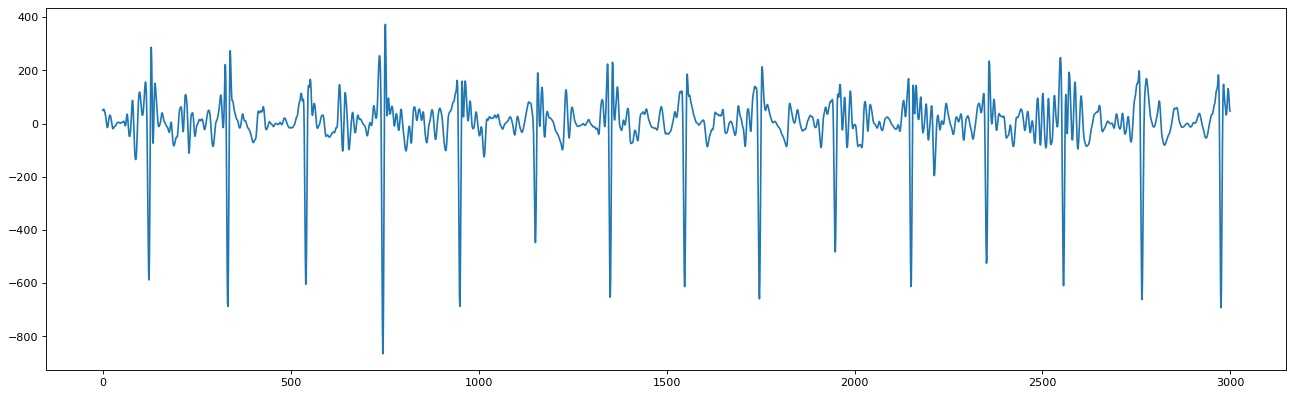

In [20]:
#trainX3.iloc[629].plot()
#trainX.iloc[3605].plot(figsize=(30,5))
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)
plt.plot(trainX3.iloc[628][0])

In [31]:
features[np.where(np.isnan(features))[0][0]][np.where(np.isnan(features))[1][:]] = 0
np.isnan(features).sum()

0

In [32]:
tsfresh_features = pd.read_csv("X_train_features.csv")

In [33]:
features = np.append(features, tsfresh_features[trainy["y"] != 3], axis=1)

In [34]:
features[np.isfinite(features) == False] = 0

In [79]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=10, contamination= 0.05)
outlier_detection = np.array(clf.fit_predict(features))

inliers = np.where(outlier_detection == 1)[0]

In [85]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators =1000, eval_metric = 'auc', n_jobs=-1)
model.fit(features[inliers], trainy3["y"].iloc[inliers])
# feature importants
#print(np.where(model.feature_importances_[model.feature_importances_> 0]))
print([model.feature_importances_])
# plot
#plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
#plt.show()

[array([0.00942236, 0.0013644 , 0.00718196, ..., 0.0026283 , 0.0016058 ,
       0.00168496], dtype=float32)]


In [92]:
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

classifier = XGBClassifier(eval_metric = 'mlogloss')
scores = cross_validate(classifier, features[inliers][:,model.feature_importances_>0.001], trainy3["y"].iloc[inliers], scoring = 'f1_micro', cv = 5, return_estimator=True, verbose=1, n_jobs=-1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished


In [93]:
print(scores["test_score"])
print(np.mean(scores["test_score"]))
model1 = scores["estimator"][1]

[0.81702128 0.80425532 0.84042553 0.82340426 0.81682641]
0.8203865588108672


# Hiscore : 0.82

# Bayesian Opt

In [97]:
from skopt import gp_minimize
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier 

def objective(params):
    xgb = XGBClassifier(n_jobs = -1, 
                       n_estimators = 300, 
                       max_depth = params[0], 
                       learning_rate = params[1], 
                       scale_pos_weight = params[2],  
                       min_child_weight = params[3], 
                       subsample = params[4], 
                       max_delta_step = params[5])

    return -np.mean(cross_val_score(xgb, features[inliers][:,model.feature_importances_>0.001], trainy3["y"].iloc[inliers], cv=5, n_jobs=-1, scoring="f1_micro"))
    
space = [
    (1, 10),
    (1e-3, 1),
    (1, 100),
    (1, 4),
    (0.8, 1.0),
    (0, 4)
    
]



In [ ]:
r = gp_minimize(objective, space, n_calls=25, random_state=42, verbose=True)
print(r.x)
best_params = r.x
print(r.fun)
result = r.fun

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 266.3462
Function value obtained: -0.8240
Current minimum: -0.8240
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 197.3613
Function value obtained: -0.8155
Current minimum: -0.8240
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 664.8110
Function value obtained: -0.8008
Current minimum: -0.8240
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 74.0362
Function value obtained: -0.8134
Current minimum: -0.8240
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 126.2662
Function value obtained: -0.8125
Current minimum: -0.8240
Iteration No: 6 